## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [331]:
my_data = np.genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [332]:
print(my_data.shape)
my_data

(13, 2)


array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [333]:
x = my_data[:,0:-1]
y = my_data[:,-1:]

In [334]:
my_data.shape[0]

13

In [335]:
inputs = np.atleast_2d(np.ones((my_data.shape[0]))).T
inputs = np.append(inputs, x, axis=1)

#### Explore your data

In [336]:
x

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

In [337]:
y

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

#### Plot the original data (scatter plot of X,y)

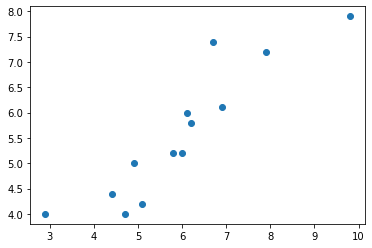

In [338]:
plt.scatter(x,y);

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

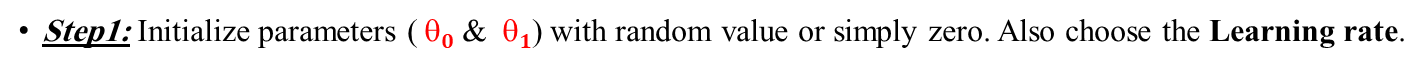

In [339]:
theta0 = 0
theta1 = 0
learn_rate = .01

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.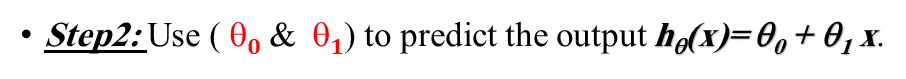
#### Note: you will need to iterate through all data points

In [340]:
def get_outputs(theta0, theta1, x):
    return theta0 + theta1 * x
outputs = get_outputs(theta0, theta1, x)
outputs

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).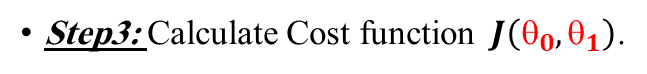
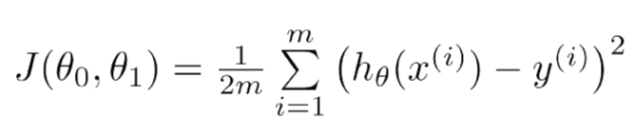

In [341]:
def cost_fun(outputs,targets):
    return np.mean((outputs - targets)**2) / 2

In [342]:
loss = cost_fun(outputs,y)
loss

16.305384479692318

### Step4: Calculate the gradient.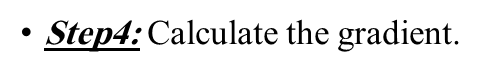
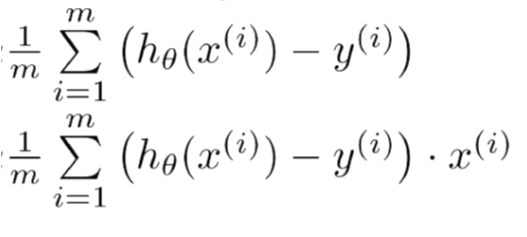

In [343]:
def grad(outputs, targets, inputs):
    grad0 = np.mean((outputs-targets))
    grad1 = np.mean((outputs-targets) * x )
    return grad0, grad1

In [344]:
grad0, grad1 = grad(outputs, y, inputs)
print(grad0)
print(grad1)

-5.56923073976923
-35.043846043215375


### Step5: Update the parameters (simultaneously).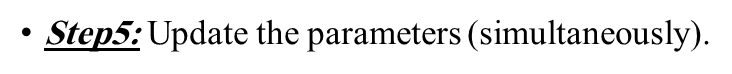
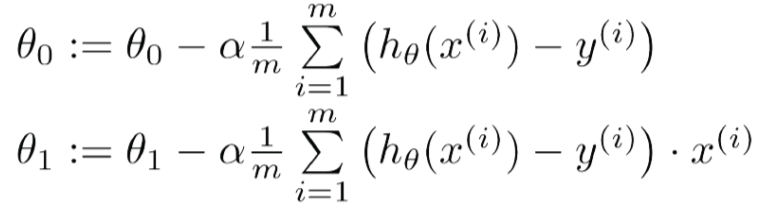

In [345]:
theta0 -= learn_rate * grad0
theta0

0.0556923073976923

In [346]:
theta1 -= learn_rate * grad1
theta1

0.35043846043215376

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.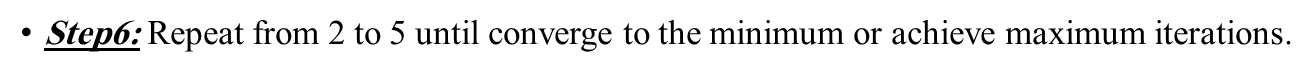

In [347]:
last_loss = None
losses = []
for i in range(10000):
    outputs = get_outputs(theta0, theta1, x)
    loss = cost_fun(outputs,y)
    print(loss)
    losses.append(loss)
    grads = grad(outputs, y, inputs)
    theta0 -= learn_rate * grads[0]
    theta1 -= learn_rate * grads[1]
    #if last_loss and last_loss < loss:
     #   break
    #else:
     #   last_loss = loss
    jac = np.linalg.norm(grads, 2)   
    print(jac)    
    if jac < .00000001 and jac > -.00000001:
        break

6.175608808043304
21.611905283072655
2.417830065479564
13.16322311395278
1.023798104945009
8.017563750807536
0.5066182835290438
4.883736076041686
0.3147143277319524
2.975373894448822
0.24347430554386096
1.813614045450556
0.21699567226372102
1.1069344107425094
0.20712173024297786
0.6779957411760922
0.20340751178872749
0.41911304132597027
0.20197836678314676
0.26511892784087143
0.2013969605568195
0.17661789422687213
0.2011301014330744
0.12916832984353818
0.20097999730449673
0.10627776991892687
0.20087327540003713
0.09637736855228249
0.20078271736477762
0.09239718200546827
0.20069822621899533
0.09083747884013231
0.20061605630353424
0.090212922983903
0.20053481803601236
0.0899409556883029
0.20045399584099605
0.08980067040064671
0.20037339836353338
0.08970940187454875
0.20029295452116636
0.08963637119118266
0.20021263784768245
0.08957013992451997
0.20013243842778117
0.08950646016142838
0.20005235248600087
0.0894437547449633
0.19997237852463973
0.08938143815629375
0.1998925158910853
0.089319

0.07591870664714727
0.1838918462973127
0.07586598615213604
0.1838343098033386
0.07581330226800394
0.1837768531921586
0.07576065496932718
0.18371947635286487
0.0757080442306995
0.18366217917470334
0.07565547002673263
0.18360496154707354
0.07560293233205537
0.18354782335952902
0.07555043112131465
0.183490764501776
0.07549796636917469
0.18343378486367443
0.0754455380503174
0.183376884335237
0.07539314613944247
0.1833200628066287
0.0753407906112667
0.183263320168168
0.07528847144052503
0.18320665631032448
0.07523618860196939
0.18315007112372056
0.07518394207036963
0.18309356449913
0.07513173182051289
0.18303713632747903
0.07507955782720402
0.1829807864998443
0.07502742006526521
0.18292451490745415
0.07497531850953604
0.1828683214416884
0.07492325313487387
0.18281220599407697
0.07487122391615339
0.18275616845630044
0.07481923082826654
0.1827002087201904
0.07476727384612303
0.18264432667772784
0.07471535294464973
0.1825885222210444
0.07466346809879104
0.1825327952424209
0.07461161928350875
0

0.06570472031516147
0.17349105671064538
0.06565909275467514
0.17344796051495057
0.06561349687949633
0.17340492415335934
0.06556793266762187
0.17336194754279893
0.06552240009706367
0.17331903060031173
0.06547689914584884
0.1732761732430557
0.06543142979201998
0.17323337538830344
0.06538599201363471
0.17319063695344264
0.06534058578876613
0.1731479578559757
0.06529521109550215
0.1731053380135194
0.06524986791194638
0.17306277734380496
0.06520455621621735
0.17302027576467777
0.0651592759864489
0.1729778331940974
0.06511402720078992
0.17293544955013765
0.06506880983740472
0.17289312475098512
0.06502362387447248
0.17285085871494116
0.06497846929018782
0.17280865136041937
0.06493334606276016
0.17276650260594748
0.06488825417041431
0.1727244123701661
0.06484319359139021
0.17268238057182891
0.06479816430394289
0.17264040712980194
0.06475316628634223
0.1725984919630645
0.06470819951687366
0.17255663499070767
0.0646632639738371
0.17251483613193563
0.06461835963554821
0.172473095306064
0.06457348

0.050812435102470764
0.16101471797141395
0.050777149244088306
0.16098894373491562
0.05074188788938891
0.16096320528297595
0.05070665102135627
0.16093750256591186
0.05067143862298612
0.16091183553410993
0.05063625067728583
0.16088620413802476
0.050601087167274655
0.1608606083281809
0.0505659480759837
0.16083504805517032
0.05053083338645571
0.1608095232696549
0.05049574308174535
0.16078403392236373
0.050460677144919
0.1607585799640952
0.05042563555905468
0.16073316134571577
0.050390618307242285
0.16070777801816002
0.05035562537258363
0.16068242993243054
0.050320656738191805
0.1606571170395984
0.05028571238719198
0.16063183929080221
0.05025079230272104
0.1606065966372484
0.050215896467927394
0.16058138903021144
0.05018102486597121
0.16055621642103327
0.05014617748002462
0.16053107876112316
0.050111354293271
0.16050597600195815
0.05007655528890558
0.1604809080950828
0.05004178045013548
0.16045587499210867
0.05000702976017929
0.1604308766447143
0.04997230320226704
0.160405913004646
0.049937

0.03937753496257128
0.15359945498603383
0.039350189882192126
0.15358397598803053
0.0393228637911535
0.15356851848083306
0.0392955566762686
0.1535530824346036
0.03926826852435968
0.15353766781954634
0.03924099932225829
0.15352227460590656
0.03921374905680501
0.15350690276397067
0.03918651771484956
0.15349155226406663
0.03915930528325088
0.1534762230765636
0.039132111748877034
0.15346091517187152
0.03910493709860506
0.15344562852044194
0.03907778131932127
0.15343036309276695
0.03905064439792093
0.1534151188593798
0.039023526321308594
0.15339989579085475
0.0389964270763978
0.15338469385780684
0.03896934665011112
0.153369513030892
0.038942285029380415
0.15335435328080646
0.038915242201146234
0.15333921457828775
0.038888218152358565
0.1533240968941136
0.03886121286997633
0.15330900019910262
0.03883422634096756
0.15329392446411372
0.03880725855230925
0.1532788696600461
0.038780309490987395
0.15326383575784003
0.0387533791439973
0.1532488227284751
0.0387264674983428
0.15323383054297238
0.0386

0.03259777197629961
0.15009085403928257
0.03257513499062442
0.15008024632954
0.0325525137248309
0.15006965334738026
0.03252990816800267
0.15005907507235638
0.032507318309231016
0.1500485114840486
0.032484744137614596
0.15003796256206653
0.03246218564225973
0.15002742828604748
0.03243964281228028
0.15001690863565714
0.03241711563679771
0.15000640359058987
0.03239460410494096
0.14999591313056732
0.03237210820584665
0.14998543723534033
0.032349627928658864
0.14997497588468695
0.032327163262529136
0.14996452905841398
0.03230471419661666
0.14995409673635599
0.032282280720088145
0.14994367889837562
0.03225986282211785
0.14993327552436306
0.03223746049188738
0.14992288659423697
0.03221507371858612
0.14991251208794368
0.03219270249141068
0.14990215198545734
0.032170346799565375
0.14989180626677995
0.032148006632261965
0.1498814749119413
0.03212568197871969
0.14987115790099853
0.032103372828165194
0.1498608552140373
0.032081079169832785
0.1498505668311701
0.03205880099296402
0.14984029273253735

0.02512192343861215
0.14698829207798106
0.025104477932783427
0.14698199191813932
0.02508704454169887
0.14697570050534373
0.025069623256945513
0.14696941782745007
0.025052214070116305
0.1469631438723309
0.025034816972810126
0.14695687862787576
0.025017431956631468
0.14695062208199078
0.025000059013190856
0.14694437422259918
0.024982698134104545
0.1469381350376406
0.02496534931099479
0.1469319045150718
0.024948012535489405
0.14692568264286573
0.024930687799222095
0.1469194694090126
0.024913375093832388
0.14691326480151898
0.02489607441096578
0.14690706880840818
0.02487878574227335
0.14690088141771993
0.02486150907941196
0.14689470261751114
0.024844244414044488
0.1468885323958546
0.024826991737839515
0.14688237074083996
0.02480975104247111
0.14687621764057382
0.024792522319619727
0.14687007308317832
0.024775305560970955
0.1468639370567933
0.024758100758216647
0.14685780954957395
0.02474090790305407
0.1468516905496925
0.024723726987186563
0.1468455800453376
0.024706558002322927
0.146839478

0.021397434684861574
0.14574252651922956
0.021382575588884095
0.14573795596136702
0.021367726811561037
0.14573339174919744
0.021352888345726656
0.14572883387391083
0.02133806018422044
0.14572428232670892
0.02132324231988675
0.14571973709880615
0.02130843474557475
0.1457151981814286
0.02129363745413872
0.14571066556581505
0.021278850438437927
0.1457061392432163
0.021264073691336614
0.14570161920489497
0.02124930720570387
0.14569710544212622
0.0212345509744138
0.14569259794619704
0.02121980499034539
0.1456880967084069
0.021205069246382723
0.14568360172006692
0.021190343735414584
0.1456791129725004
0.02117562845033492
0.14567463045704268
0.021160923384042594
0.1456701541650415
0.021146228529441306
0.14566568408785613
0.02113154387943956
0.1456612202168581
0.021116869426951165
0.14565676254343068
0.021102205164894496
0.14565231105896936
0.021087551086192997
0.14564786575488148
0.021072907183775025
0.14564342662258617
0.021058273450573817
0.14563899365351476
0.021043649879527504
0.145634566

0.14456979735800946
0.01715628310380478
0.14456685499950117
0.017144369205666473
0.14456391672611865
0.017132463580938406
0.14456098253219032
0.0171205662238754
0.14455805241205225
0.01710867712873584
0.14455512636004852
0.017096796289782612
0.14455220437053085
0.017084923701282166
0.14454928643785916
0.017073059357505305
0.14454637255640082
0.01706120325272641
0.14454346272053137
0.017049355381224214
0.14454055692463363
0.017037515737281104
0.14453765516309888
0.017025684315183705
0.1445347574303256
0.017013861109222414
0.1445318637207208
0.017002046113691775
0.1445289740286982
0.016990239322890052
0.14452608834868014
0.01697844073111971
0.14452320667509647
0.01696665033268699
0.1445203290023846
0.016954868121902292
0.14451745532498977
0.0169430940930797
0.14451458563736502
0.01693132824053743
0.14451171993397105
0.016919570558597618
0.1445088582092761
0.016907821041586318
0.14450600045775622
0.016896079683833522
0.14450314667389522
0.01688434647967319
0.14450029685218416
0.0168726214

0.014694187360312309
0.14400301390164041
0.014683983223998142
0.1440008584566739
0.014673786173778272
0.14399870600429426
0.014663596204731951
0.14399655654034677
0.014653413311941766
0.14399441006068248
0.014643237490493665
0.143992266561158
0.014633068735477229
0.14399012603763553
0.014622907041984998
0.1439879884859836
0.014612752405113515
0.14398585390207574
0.014602604819962308
0.1439837222817918
0.014592464281634392
0.14398159362101712
0.014582330785236223
0.14397946791564284
0.014572204325877648
0.14397734516156552
0.014562084898671982
0.14397522535468762
0.014551972498735835
0.14397310849091755
0.014541867121189139
0.14397099456616871
0.014531768761155448
0.14396888357636112
0.014521677413761444
0.14396677551741963
0.014511593074137437
0.14396467038527533
0.014501515737416953
0.1439625681758643
0.014491445398736862
0.14396046888512895
0.014481382053237565
0.14395837250901689
0.014471325696062678
0.14395627904348168
0.014461276322359431
0.1439541884844823
0.01445123392727815
0.1

0.01271725393393772
0.143613377202994
0.012708422646469994
0.1436117627237013
0.012699597491744334
0.14361015048592723
0.012690778465502
0.14360854048655963
0.012681965563487052
0.14360693272249062
0.012673158781446791
0.14360532719061683
0.012664358115131124
0.14360372388783904
0.012655563560293223
0.1436021228110625
0.012646775112689128
0.14360052395719677
0.012637992768077581
0.14359892732315546
0.01262921652222056
0.1435973329058563
0.012620446370882926
0.14359574070222225
0.012611682309832322
0.14359415070917925
0.012602924334839609
0.14359256292365857
0.01259417244167821
0.1435909773425953
0.012585426626124916
0.14358939396292864
0.012576686883959146
0.14358781278160224
0.0125679532109632
0.14358623379556404
0.012559225602922754
0.14358465700176595
0.01255050405562581
0.14358308239716447
0.01254178856486373
0.14358150997871996
0.012533079126430573
0.14357993974339747
0.012524375736123507
0.14357837168816587
0.01251567838974245
0.1435768058099983
0.01250698708309022
0.143575242105

0.010801781578686725
0.14328946199761255
0.01079428045943711
0.14328829723727093
0.010786784549216274
0.14328713409406496
0.010779293844406746
0.1432859725657493
0.010771808341393737
0.14328481265008203
0.010764328036565067
0.14328365434482382
0.010756852926310732
0.1432824976477391
0.010749383007023603
0.1432813425565952
0.010741918275098758
0.1432801890691621
0.010734458726934248
0.14327903718321358
0.01072700435892986
0.14327788689652604
0.010719555167488543
0.1432767382068789
0.010712111149015482
0.14327559111205507
0.010704672299918432
0.1432744456098403
0.010697238616607594
0.1432733016980234
0.010689810095495607
0.1432721593743963
0.01068238673299776
0.14327101863675396
0.010674968525531625
0.14326987948289446
0.0106675554695175
0.14326874191061886
0.010660147561378005
0.14326760591773138
0.010652744797538234
0.1432664715020391
0.010645347174425897
0.1432653386613524
0.010637954688471054
0.1432642073934845
0.010630567336106228
0.14326307769625155
0.01062318511376652
0.1432619495

0.14298093685536128
0.008582916186714223
0.14298020044664084
0.008576955921978572
0.14297946506033915
0.008570999796250582
0.14297873069503658
0.008565047806656031
0.14297799734931577
0.008559099950322531
0.14297726502176092
0.00855315622437994
0.14297653371095836
0.00854721662595974
0.14297580341549682
0.008541281152195945
0.14297507413396635
0.008535349800224043
0.14297434586495922
0.00852942256718182
0.1429736186070698
0.008523499450208954
0.14297289235889418
0.008517580446447053
0.14297216711903038
0.008511665553039777
0.14297144288607863
0.00850575476713279
0.14297071965864097
0.00849984808587376
0.14296999743532146
0.008493945506412096
0.1429692762147255
0.008488047025899585
0.14296855599546143
0.008482152641489576
0.142967836776139
0.008476262350337806
0.14296711855536953
0.00847037614960164
0.1429664013317668
0.008464494036440515
0.14296568510394664
0.008458616008016132
0.1429649698705261
0.008452742061491622
0.14296425563012505
0.008446872194032576
0.14296354238136422
0.008441

0.007012002923510822
0.14280405506053714
0.0070071335536087635
0.14280356423181387
0.007002267565160433
0.14280307408454976
0.006997404955817639
0.14280258461779874
0.006992545723233752
0.14280209583061584
0.006987689865063901
0.14280160772205772
0.006982837378964781
0.142801120291182
0.0069779882625946015
0.14280063353704803
0.006973142513613493
0.142800147458716
0.006968300129682891
0.1427996620552478
0.006963461108465988
0.1427991773257064
0.006958625447627668
0.14279869326915615
0.006953793144834271
0.14279820988466274
0.006948964197754025
0.14279772717129272
0.0069441386040565226
0.14279724512811484
0.006939316361412995
0.14279676375419834
0.006934497467496463
0.14279628304861414
0.006929681919981415
0.1427958030104342
0.006924869716544038
0.14279532363873199
0.006920060854861977
0.14279484493258213
0.006915255332614752
0.14279436689106073
0.006910453147483288
0.14279388951324487
0.006905654297150069
0.14279341279821314
0.006900858779299432
0.14279293674504512
0.006896066591617175

0.0059393287240875
0.14270416593793314
0.005935204255110115
0.14270381379375055
0.005931082650302279
0.14270346213847948
0.0059269639076750405
0.14270311097144134
0.005922848025240683
0.142702760291958
0.005918735001013101
0.14270241009935292
0.005914624833007393
0.14270206039294997
0.005910517519240153
0.14270171117207384
0.00590641305772927
0.14270136243605086
0.005902311446494138
0.1427010141842075
0.005898212683555313
0.14270066641587184
0.005894116766934799
0.14270031913037257
0.005890023694656214
0.1426999723270391
0.005885933464744199
0.14269962600520203
0.005881846075224988
0.14269928016419295
0.005877761524125945
0.14269893480334445
0.005873679809476222
0.14269858992198947
0.0058696009293060115
0.14269824551946275
0.005865524881646939
0.14269790159509907
0.005861451664531918
0.14269755814823487
0.005857381275995521
0.14269721517820713
0.005853313714073289
0.14269687268435363
0.0058492489768024476
0.1426965306660134
0.005845187062221435
0.1426961891225264
0.005841127968370118
0

0.005069338184425092
0.14263530305499067
0.005065817866044237
0.14263504651898867
0.005062299992290504
0.14263479033915746
0.00505878456146609
0.14263453451500233
0.005055271571874874
0.14263427904602943
0.005051761021821273
0.142634023931746
0.005048252909611443
0.14263376917165932
0.0050447472335521425
0.1426335147652777
0.0050412439919520205
0.14263326071210994
0.005037743183120156
0.1426330070116658
0.0050342448053674604
0.14263275366345554
0.005030748857005431
0.1426325006669901
0.00502725533634724
0.14263224802178104
0.005023764241706838
0.1426319957273407
0.0050202755713996215
0.1426317437831822
0.005016789323741986
0.14263149218881913
0.00501330549705171
0.1426312409437659
0.0050098240896473585
0.14263099004753746
0.005006345099849039
0.1426307394996495
0.005002868525977874
0.14263048929961844
0.004999394366356232
0.14263023944696135
0.004995922619307376
0.14262998994119577
0.004992453283156165
0.14262974078184038
0.004988986356228224
0.14262949196841387
0.004985521836850562
0.

0.004384270501379602
0.14258873725789936
0.004381225916964247
0.14258854537314272
0.00437818344681032
0.14258835375479595
0.0043751430894496
0.14258816240248923
0.004372104843415089
0.14258797131585307
0.004369068707240405
0.1425877804945188
0.004366034679460466
0.1425875899381181
0.004363002758611124
0.14258739964628286
0.004359972943229291
0.14258720961864574
0.004356945231852864
0.14258701985484046
0.004353919623020637
0.14258683035449995
0.0043508961152726585
0.14258664111725922
0.004347874707149749
0.14258645214275228
0.004344855397194001
0.14258626343061495
0.00434183818394834
0.1425860749804826
0.004338823065956675
0.14258588679199147
0.0043358100417639715
0.14258569886477834
0.004332799109916369
0.14258551119848056
0.004329790268960666
0.14258532379273592
0.004326783517445088
0.14258513664718248
0.004323778853918593
0.1425849497614592
0.004320776276931061
0.14258476313520502
0.0043177757850337145
0.14258457676806013
0.004314777376778492
0.14258439065966433
0.004311781050718552


0.003430832905295058
0.1425351621639977
0.003428450419909652
0.14253504466208777
0.0034260695890019643
0.14253492732331569
0.0034236904114230584
0.14253481014745487
0.003421312886024788
0.14253469313427933
0.0034189370116599004
0.142534576283563
0.0034165627871817527
0.1425344595950805
0.0034141902114447685
0.1425343430686064
0.003411819283303862
0.14253422670391605
0.0034094500016149886
0.14253411050078474
0.003407082365234714
0.1425339944589878
0.00340471637302051
0.14253387857830174
0.003402352023830617
0.14253376285850258
0.0033999893165240318
0.14253364729936713
0.0033976282499607034
0.142533531900672
0.0033952688230010717
0.14253341666219496
0.0033929110345066347
0.14253330158371308
0.0033905548833395604
0.14253318666500447
0.003388200368362871
0.14253307190584733
0.0033858474884403003
0.14253295730601984
0.003383496242436378
0.1425328428653012
0.003381146629216606
0.14253272858347027
0.0033787986476470615
0.14253261446030652
0.0033764522965943956
0.1425325004955896
0.00337410757

0.002859933221567282
0.14250933960484025
0.002857947188061087
0.14250925795457908
0.0028559625337232397
0.14250917641768
0.002853979257595955
0.14250909499398537
0.002851997358722043
0.14250901368333832
0.0028500168361451214
0.14250893248558183
0.00284803768890956
0.14250885140055883
0.002846059916060144
0.14250877042811308
0.002844083516642466
0.14250868956808826
0.002842108489702818
0.1425086088203284
0.002840134834288062
0.14250852818467735
0.0028381625494459384
0.14250844766097964
0.002836191634224353
0.14250836724907986
0.0028342220876724465
0.14250828694882278
0.0028322539088396757
0.14250820676005327
0.0028302870967762974
0.14250812668261653
0.0028283216505330874
0.14250804671635825
0.0028263575691616586
0.14250796686112396
0.002824394851714286
0.14250788711675932
0.0028224334972435667
0.14250780748311062
0.002820473504803171
0.14250772796002403
0.0028185148734472284
0.14250764854734616
0.002816557602230705
0.14250756924492353
0.0028146016902087416
0.1425074900526033
0.002812647

0.0022756148533712404
0.14248776353810297
0.002274034590128898
0.14248771184372505
0.002272455424274219
0.14248766022111908
0.0022708773550452655
0.14248760867018498
0.0022693003816805523
0.14248755719082348
0.0022677245034190513
0.142487505782935
0.0022661497195000653
0.1424874544464207
0.0022645760291639676
0.14248740318118108
0.0022630034316511957
0.14248735198711746
0.002261431926202849
0.14248730086413083
0.0022598615120604745
0.14248724981212246
0.0022582921884664285
0.14248719883099398
0.002256723954663302
0.14248714792064698
0.002255156809894291
0.14248709708098325
0.0022535907534031617
0.1424870463119044
0.0022520257844341157
0.1424869956133126
0.002250461902232004
0.14248694498510986
0.0022488991060420982
0.1424868944271986
0.0022473373951102343
0.14248684393948122
0.002245776768682911
0.14248679352186022
0.0022442172260067734
0.14248674317423826
0.0022426587663293904
0.14248669289651816
0.002241101388898607
0.14248664268860287
0.0022395450929630642
0.14248659255039547
0.0022

0.1424771690307545
0.0019234856646277749
0.1424771320456299
0.0019221499316988797
0.14247709511185458
0.0019208151263476318
0.1424770582293579
0.001919481247930192
0.14247702139806806
0.0019181482958025137
0.14247698461791436
0.0019168162693214814
0.1424769478888256
0.0019154851678443395
0.1424769112107311
0.0019141549907285677
0.14247687458355973
0.0019128257373324728
0.14247683800724106
0.001911497407014426
0.14247680148170427
0.0019101699991335415
0.14247676500687914
0.0019088435130491911
0.142476728582695
0.0019075179481212376
0.1424766922090817
0.0019061933037099763
0.14247665588596908
0.001904869579176264
0.1424766196132867
0.001903546773881217
0.14247658339096486
0.001902224887186525
0.1424765472189336
0.0019009039184542664
0.14247651109712298
0.0018995838670469395
0.14247647502546334
0.001898264732327606
0.142476439003885
0.0018969465136596303
0.14247640303231857
0.0018956292104069074
0.14247636711069445
0.0018943128219337084
0.14247633123894332
0.001892997347604806
0.142476295

0.0016417342396534416
0.14246990953179062
0.0016405941643595076
0.14246988262564406
0.001639454880772151
0.1424698557568535
0.00163831638834147
0.14246982892536725
0.0016371786865181032
0.1424698021311333
0.0016360417747530698
0.1424697753741002
0.0016349056524976912
0.14246974865421608
0.0016337703192036864
0.14246972197142946
0.0016326357743231097
0.1424696953256888
0.0016315020173085966
0.14246966871694272
0.001630369047612884
0.14246964214513974
0.0016292368646893798
0.14246961561022872
0.001628105467991667
0.14246958911215832
0.0016269748569737567
0.1424695626508775
0.001625845031090018
0.14246953622633493
0.0016247159897952873
0.14246950983848006
0.001623587732544558
0.14246948348726152
0.0016224602587936144
0.14246945717262874
0.0016213335679981288
0.1424694308945307
0.001620207659614604
0.14246940465291677
0.0016190825330995823
0.14246937844773636
0.0016179581879100938
0.14246935227893875
0.0016168346235036462
0.14246932614647356
0.0016157118393379962
0.14246930005029024
0.0016

0.001421845210473361
0.14246506592757466
0.0014208578334929352
0.1424650457462146
0.0014198711421802475
0.142465025592874
0.0014188851360590676
0.14246500546751392
0.0014178998146535163
0.1424649853700957
0.001416915177488297
0.14246496530058034
0.0014159312240880314
0.1424649452589293
0.0014149479539780148
0.14246492524510374
0.0014139653666837637
0.14246490525906513
0.0014129834617310538
0.14246488530077459
0.0014120022386460444
0.14246486537019415
0.0014110216969553265
0.1424648454672848
0.0014100418361855502
0.14246482559200846
0.0014090626558639155
0.14246480574432657
0.0014080841555179538
0.14246478592420092
0.0014071063346753876
0.1424647661315933
0.001406129192864445
0.14246474636646544
0.0014051527296135792
0.14246472662877904
0.001404176944451408
0.14246470691849633
0.0014032018369072652
0.14246468723557906
0.001402227406510504
0.1424646675799891
0.001401253652790817
0.14246464795168878
0.0014002805752784035
0.14246462835064008
0.0013993081735036912
0.14246460877680514
0.0013

0.0010694439308216455
0.14245875348339337
0.0010687012731037664
0.14245874206613487
0.0010679591311123912
0.1424587306647279
0.0010672175044892408
0.1424587192791505
0.0010664763928765336
0.14245870790938073
0.0010657357959165796
0.1424586965553966
0.0010649957132518814
0.14245868521717595
0.0010642561445254274
0.14245867389469724
0.0010635170893803702
0.1424586625879386
0.001062778547459812
0.1424586512968779
0.0010620405184076998
0.1424586400214938
0.0010613030018676564
0.14245862876176404
0.001060565997483749
0.14245861751766714
0.0010598295049004918
0.14245860628918142
0.001059093523762294
0.14245859507628517
0.001058358053714156
0.14245858387895674
0.0010576230944010368
0.1424585726971745
0.0010568886454683296
0.14245856153091682
0.0010561547065614776
0.1424585503801622
0.0010554212773264667
0.14245853924488924
0.0010546883574093107
0.14245852812507634
0.0010539559464563183
0.14245851702070184
0.001053224044114049
0.14245850593174453
0.0010524926500293124
0.14245849485818313
0.001

0.0009287829993330798
0.14245673253959673
0.0009281380212815616
0.14245672392818587
0.0009274934911244875
0.142456715328731
0.0009268494085507933
0.14245670674121552
0.0009262057732495996
0.14245669816562284
0.0009255625849102888
0.14245668960193636
0.0009249198432226441
0.1424566810501396
0.0009242775478762376
0.14245667251021585
0.0009236356985612806
0.142456663982149
0.000922994294968044
0.14245665546592237
0.000922353336786975
0.1424566469615194
0.0009217128237087316
0.14245663846892392
0.0009210727554242767
0.14245662998811942
0.0009204331316246635
0.1424566215190896
0.0009197939520012078
0.14245661306181787
0.0009191552162455591
0.14245660461628826
0.0009185169240494888
0.1424565961824842
0.0009178790751048448
0.14245658776038955
0.0009172416691039381
0.142456579349988
0.0009166047057391104
0.1424565709512634
0.0009159681847029369
0.14245656256419925
0.0009153321056884073
0.1424565541887798
0.0009146964683883802
0.14245654582498857
0.0009140612724962774
0.14245653747280945
0.0009

0.0007227746887726883
0.1424542862130535
0.0007222727697982931
0.14245428099808535
0.0007217711993732815
0.1424542757903574
0.0007212699772556364
0.14245427058986004
0.0007207691032034225
0.1424542653965828
0.0007202685769749829
0.14245426021051596
0.0007197683983286562
0.14245425503164927
0.0007192685670231691
0.142454249859973
0.0007187690828173171
0.14245424469547682
0.0007182699454700325
0.14245423953815112
0.0007177711547404535
0.14245423438798543
0.0007172727103878296
0.14245422924497045
0.0007167746121717853
0.1424542241090958
0.0007162768598517403
0.14245421898035188
0.0007157794531876531
0.14245421385872856
0.0007152823919394719
0.14245420874421597
0.0007147856758671578
0.1424542036368044
0.0007142893047312165
0.14245419853648383
0.0007137932782920291
0.14245419344324436
0.0007132975963101923
0.14245418835707643
0.0007128022585465772
0.14245418327797
0.000712307264762146
0.14245417820591535
0.0007118126147179522
0.1424541731409026
0.0007113183081753293
0.14245416808292213
0.00

0.1424526520944372
0.0005428817588058884
0.1424526491482544
0.0005425047635129996
0.14245264620616213
0.0005421280300181135
0.1424526432681546
0.0005417515581395701
0.14245264033422605
0.0005413753476958368
0.14245263740437117
0.0005409993985051876
0.14245263447858394
0.0005406237103863776
0.1424526315568587
0.0005402482831578217
0.1424526286391901
0.0005398731166385978
0.14245262572557224
0.0005394982106475896
0.1424526228159997
0.0005391235650038769
0.1424526199104667
0.0005387491795266545
0.1424526170089677
0.0005383750540352462
0.14245261411149723
0.0005380011883491166
0.14245261121804942
0.0005376275822878471
0.14245260832861872
0.0005372542356711124
0.1424526054431998
0.0005368811483188891
0.14245260256178707
0.0005365083200509457
0.14245259968437463
0.0005361357506874978
0.1424525968109573
0.0005357634400486492
0.14245259394152934
0.0005353913879548855
0.14245259107608524
0.0005350195942264566
0.1424525882146195
0.000534648058684122
0.14245258535712652
0.0005342767811485772
0.14

0.00045003679990443225
0.14245198630949546
0.000449724279263457
0.14245198428767844
0.00044941197564727536
0.1424519822686684
0.0004490998889052216
0.14245198025246164
0.00044878801888655675
0.14245197823905423
0.0004484763654410359
0.14245197622844202
0.00044816492841803584
0.14245197422062136
0.00044785370766735376
0.14245197221558828
0.0004475427030388016
0.1424519702133391
0.00044723191438229875
0.14245196821386974
0.0004469213415478452
0.14245196621717635
0.0004466109843856
0.14245196422325532
0.00044630084274573925
0.14245196223210252
0.00044599091647872966
0.14245196024371407
0.0004456812054347567
0.14245195825808651
0.000445371709464641
0.1424519562752156
0.0004450624284188449
0.14245195429509774
0.00044475336214818583
0.14245195231772897
0.0004444445105034845
0.14245195034310562
0.00044413587333573757
0.1424519483712237
0.00044382745049592555
0.14245194640207967
0.000443519241835327
0.14245194443566955
0.0004432112472052704
0.14245194247198942
0.00044290346645686654
0.14245194

0.14245162690716834
0.000390302091253364
0.14245162538434014
0.0003900310523966463
0.14245162386362603
0.0003897602017583485
0.14245162234502334
0.00038948953920781953
0.1424516208285291
0.00038921906461448054
0.14245161931414035
0.0003889487778478109
0.14245161780185403
0.0003886786787772944
0.14245161629166747
0.0003884087672724984
0.14245161478357765
0.00038813904320339243
0.14245161327758146
0.00038786950643977515
0.1424516117736762
0.0003876001568514683
0.14245161027185918
0.0003873309943085769
0.14245160877212715
0.00038706201868117713
0.14245160727447714
0.00038679322983940426
0.1424516057789065
0.0003865246276536658
0.1424516042854125
0.00038625621199430945
0.1424516027939919
0.0003859879827318074
0.142451601304642
0.000385719939736601
0.14245159981735986
0.00038545208287947156
0.14245159833214266
0.000385184412031172
0.14245159684898742
0.0003849169270624438
0.1424515953678916
0.0003846496278443099
0.14245159388885192
0.0003843825142475974
0.14245159241186567
0.000384115586143

0.00029458799602794606
0.1424511540460543
0.00029438342424764657
0.14245115317973933
0.000294178994528889
0.14245115231462713
0.00029397470677294937
0.14245115145071577
0.0002937705608812777
0.14245115058800398
0.000293566556755404
0.1424511497264901
0.000293362694296827
0.1424511488661722
0.00029315897340704666
0.1424511480070487
0.0002929553939880728
0.14245114714911805
0.00029275195594139603
0.14245114629237854
0.0002925486591688817
0.14245114543682857
0.00029234550357246666
0.14245114458246633
0.0002921424890541445
0.14245114372929032
0.0002919396155158554
0.14245114287729885
0.00029173688285982964
0.1424511420264903
0.00029153429098809324
0.142451141176863
0.00029133183980301357
0.14245114032841524
0.0002911295292067402
0.1424511394811456
0.0002909273591017688
0.14245113863505215
0.00029072532939052146
0.14245113779013346
0.00029052343997548275
0.1424511369463879
0.00029032169075916895
0.1424511361038137
0.00029012008164429673
0.14245113526240932
0.00028991861253351584
0.142451134

0.00024986976437249786
0.14245097898692974
0.000249696246431484
0.1424509783636641
0.00024952284898703943
0.1424509777412637
0.00024934957195560343
0.14245097711972746
0.0002491764152536423
0.14245097649905417
0.00024900337879747074
0.1424509758792426
0.0002488304625035121
0.14245097526029157
0.00024865766628851476
0.14245097464220008
0.0002484849900690159
0.1424509740249665
0.0002483124337617065
0.14245097340859
0.000248139997283228
0.14245097279306915
0.00024796768055029763
0.14245097217840288
0.00024779548348000493
0.14245097156459008
0.00024762340598925045
0.14245097095162945
0.0002474514479947032
0.14245097033951987
0.00024727960941359927
0.1424509697282602
0.0002471078901629861
0.14245096911784916
0.0002469362901599026
0.14245096850828542
0.00024676480932166455
0.14245096789956815
0.00024659344756550357
0.14245096729169604
0.0002464222048086415
0.14245096668466786
0.0002462510809685797
0.1424509660784825
0.00024608007596255225
0.14245096547313874
0.0002459091897081257
0.142450964

0.00019553114010132134
0.14245080496832885
0.000195395356722627
0.14245080458666795
0.00019525966763651853
0.1424508042055369
0.00019512407277726425
0.14245080382493513
0.00019498857207976003
0.14245080344486172
0.0001948531654784973
0.14245080306531593
0.00019471785290804176
0.14245080268629715
0.0001945826343032811
0.14245080230780463
0.0001944475095988095
0.14245080192983758
0.0001943124787294162
0.14245080155239526
0.00019417754162998925
0.142450801175477
0.00019404269823546522
0.14245080079908212
0.00019390794848063412
0.1424508004232097
0.00019377329230055938
0.14245080004785915
0.00019363872963036336
0.1424507996730298
0.00019350426040485596
0.1424507992987209
0.000193369884559384
0.1424507989249315
0.00019323560202896828
0.14245079855166115
0.00019310141274885568
0.14245079817890913
0.00019296731665429477
0.14245079780667472
0.0001928333136805162
0.14245079743495684
0.0001926994037629007
0.14245079706375516
0.00019256558683679559
0.1424507966930688
0.00019243186283774577
0.1424

0.0001494378400894091
0.14245069064001828
0.00014933406544350998
0.14245069041708913
0.00014923036286217738
0.1424506901944693
0.00014912673229536307
0.1424506899721587
0.000149023173693111
0.1424506897501568
0.00014891968700539917
0.14245068952846313
0.00014881627218237616
0.1424506893070771
0.00014871292917396936
0.1424506890859985
0.00014860965793045544
0.14245068886522702
0.00014850645840196937
0.14245068864476182
0.0001484033305387043
0.14245068842460287
0.00014830027429085652
0.14245068820474954
0.0001481972896087835
0.14245068798520136
0.00014809437644264204
0.14245068776595818
0.00014799153474291693
0.14245068754701923
0.00014788876445992404
0.14245068732838434
0.0001477860655439646
0.1424506871100529
0.0001476834379456433
0.1424506868920246
0.00014758088161536743
0.14245068667429905
0.00014747839650366593
0.14245068645687578
0.0001473759825610141
0.1424506862397545
0.00014727363973810598
0.14245068602293448
0.0001471713679853582
0.1424506858064155
0.0001470691672535987
0.14245

0.1424506478609341
0.00012790315499161835
0.14245064769739865
0.00012781433475287274
0.14245064753409042
0.00012772557619389967
0.1424506473710087
0.00012763687927190703
0.14245064720815354
0.00012754824394404515
0.14245064704552451
0.00012745967016754742
0.14245064688312134
0.00012737115789955412
0.14245064672094346
0.00012728270709744282
0.1424506465589909
0.00012719431771861725
0.1424506463972631
0.00012710598972027326
0.14245064623575968
0.00012701772305992708
0.14245064607448069
0.00012692951769483493
0.14245064591342577
0.00012684137358252544
0.1424506457525943
0.00012675329068044118
0.1424506455919861
0.00012666526894612224
0.14245064543160096
0.0001265773083370099
0.14245064527143844
0.0001264894088106741
0.14245064511149821
0.00012640157032470662
0.14245064495178017
0.0001263137928368053
0.14245064479228386
0.00012622607630450742
0.14245064463300888
0.00012613842068547645
0.1424506444739552
0.00012605082593755067
0.14245064431512217
0.0001259632920182381
0.14245064415650982
0.

0.00010449330707844407
0.14245060858053346
0.00010442074342301417
0.14245060847153443
0.00010434823015819084
0.14245060836268675
0.0001042757672488902
0.14245060825399
0.00010420335466042933
0.1424506081454445
0.00010413099235761231
0.14245060803704943
0.0001040586803055605
0.14245060792880487
0.000103986418469547
0.14245060782071076
0.00010391420681446725
0.14245060771276655
0.0001038420453055508
0.14245060760497233
0.00010376993390814383
0.14245060749732763
0.00010369787258720222
0.14245060738983265
0.00010362586130803135
0.14245060728248662
0.0001035539000359796
0.14245060717528973
0.00010348198873624031
0.14245060706824175
0.00010341012737416533
0.1424506069613423
0.00010333831591493182
0.14245060685459124
0.00010326655432401228
0.14245060674798857
0.00010319484256680398
0.14245060664153378
0.00010312318060850357
0.1424506065352268
0.00010305156841481112
0.14245060642906746
0.00010298000595102761
0.14245060632305548
0.000102908493182513
0.1424506062171907
0.00010283703007490186
0.1

0.14245058758415852
8.937323051746967e-05
0.1424505875043106
8.931116675002682e-05
0.14245058742457345
8.924914608178447e-05
0.14245058734494698
8.918716848271777e-05
0.14245058726543106
8.912523392305542e-05
0.14245058718602552
8.906334237271712e-05
0.14245058710673042
8.900149380203226e-05
0.14245058702754518
8.893968818095922e-05
0.14245058694847001
8.887792547987417e-05
0.14245058686950446
8.881620566883812e-05
0.14245058679064873
8.87545287181888e-05
0.1424505867119024
8.869289459799686e-05
0.1424505866332655
8.863130327869823e-05
0.1424505865547376
8.856975473031741e-05
0.14245058647631884
8.850824892344666e-05
0.14245058639800898
8.844678582817602e-05
0.14245058631980784
8.83853654149983e-05
0.1424505862417152
8.832398765425963e-05
0.142450586163731
8.826265251619493e-05
0.14245058608585515
8.820135997136628e-05
0.14245058600808733
8.814010999013079e-05
0.1424505859304275
8.807890254292946e-05
0.14245058585287557
8.801773760022885e-05
0.14245058577543115
8.795661513247773e-05
0.

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [348]:
outputs = get_outputs(theta0, theta1, x)
outputs

array([[3.44756556],
       [6.0875149 ],
       [4.83701269],
       [6.92118337],
       [8.24115821],
       [6.22645981],
       [5.67068083],
       [5.74015312],
       [5.60120854],
       [4.97595727],
       [4.69806778],
       [4.4896509 ],
       [5.46226396]])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

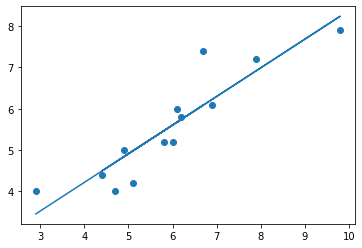

In [349]:
plt.scatter(x, y);
plt.plot(x, outputs);

#### Use R2 score to evaluate LR equation output
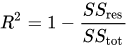
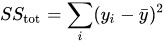
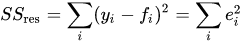
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [350]:
SSres = sum((y-outputs)**2)
SStot = sum((y-np.mean(outputs))**2)
R2 = 1 - (SSres / SStot)
print(R2)

[0.82131561]


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [351]:
thetas = thetas = np.atleast_2d(np.zeros((my_data.shape[1]))).T
learn_rate = .01

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [352]:
def get_outputs(thetas, inputs):
    return inputs.dot(thetas)
outputs = get_outputs(thetas, inputs)
outputs

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [353]:
def cost_fun(outputs,targets):
    return np.mean((outputs - targets)**2) / 2
loss = cost_fun(outputs,y)
loss

16.305384479692318

In [354]:
def grad(outputs, targets, inputs):
    return inputs.transpose().dot(outputs-targets) / len(targets)

grads = grad(outputs, y, inputs)
grads

array([[ -5.56923074],
       [-35.04384604]])

In [355]:
def update_parameters(thetas, learn_rate, grads):
    return thetas - learn_rate * grads

thetas = update_parameters(thetas, learn_rate, grads)
thetas

array([[0.05569231],
       [0.35043846]])

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [356]:
losses = []
for i in range(10000):
    outputs = get_outputs(thetas, inputs)
    loss = cost_fun(outputs,y)
    print("loss: " + str(loss))
    losses.append(loss)
    grads = grad(outputs, y, inputs)
    thetas = thetas - learn_rate * grads
    jac = np.linalg.norm(grads, 2)   
    print("jac: " + str(jac))    
    if jac < .00000001 and jac > -.00000001:
        break

loss: 6.175608808043303
jac: 21.611905283072655
loss: 2.417830065479564
jac: 13.163223113952775
loss: 1.023798104945009
jac: 8.017563750807534
loss: 0.5066182835290438
jac: 4.883736076041686
loss: 0.3147143277319524
jac: 2.9753738944488224
loss: 0.24347430554386096
jac: 1.8136140454505563
loss: 0.21699567226372102
jac: 1.1069344107425092
loss: 0.20712173024297786
jac: 0.6779957411760918
loss: 0.20340751178872749
jac: 0.41911304132597016
loss: 0.20197836678314676
jac: 0.26511892784087143
loss: 0.2013969605568195
jac: 0.17661789422687207
loss: 0.2011301014330744
jac: 0.12916832984353813
loss: 0.20097999730449673
jac: 0.10627776991892682
loss: 0.20087327540003713
jac: 0.09637736855228249
loss: 0.20078271736477762
jac: 0.09239718200546827
loss: 0.20069822621899533
jac: 0.0908374788401323
loss: 0.20061605630353413
jac: 0.09021292298390284
loss: 0.20053481803601234
jac: 0.08994095568830286
loss: 0.20045399584099605
jac: 0.0898006704006467
loss: 0.20037339836353346
jac: 0.08970940187454865
lo

jac: 0.07865659912331172
loss: 0.18693477965815336
jac: 0.07860197734397924
loss: 0.18687301840172157
jac: 0.07854739349584157
loss: 0.18681134289368004
jac: 0.0784928475525579
loss: 0.18674975301497712
jac: 0.07843833948780594
loss: 0.18668824864672612
jac: 0.0783838692752814
loss: 0.18662682967020583
jac: 0.07832943688869848
loss: 0.1865654959668597
jac: 0.0782750423017897
loss: 0.18650424741829555
jac: 0.07822068548830552
loss: 0.18644308390628606
jac: 0.07816636642201501
loss: 0.18638200531276744
jac: 0.07811208507670502
loss: 0.1863210115198402
jac: 0.07805784142618094
loss: 0.18626010240976887
jac: 0.07800363544426633
loss: 0.18619927786498072
jac: 0.0779494671048028
loss: 0.18613853776806646
jac: 0.07789533638165001
loss: 0.18607788200178038
jac: 0.07784124324868621
loss: 0.18601731044903877
jac: 0.07778718767980733
loss: 0.185956822992921
jac: 0.07773316964892762
loss: 0.18589641951666847
jac: 0.07767918912997947
loss: 0.18583609990368494
jac: 0.07762524609691342
loss: 0.185775

jac: 0.06936312597434312
loss: 0.1770439304509971
jac: 0.06931495789432186
loss: 0.17699590149936753
jac: 0.06926682326383009
loss: 0.17694793923040494
jac: 0.06921872205963943
loss: 0.17690004355152805
jac: 0.06917065425853751
loss: 0.17685221437028414
jac: 0.06912261983732804
loss: 0.17680445159434893
jac: 0.06907461877283105
loss: 0.17675675513152664
jac: 0.06902665104188253
loss: 0.17670912488974871
jac: 0.06897871662133437
loss: 0.17666156077707498
jac: 0.06893081548805481
loss: 0.17661406270169272
jac: 0.06888294761892808
loss: 0.17656663057191693
jac: 0.06883511299085429
loss: 0.1765192642961895
jac: 0.06878731158074997
loss: 0.17647196378308
jac: 0.06873954336554725
loss: 0.1764247289412843
jac: 0.06869180832219464
loss: 0.1763775596796256
jac: 0.06864410642765634
loss: 0.17633045590705324
jac: 0.06859643765891282
loss: 0.17628341753264326
jac: 0.06854880199296041
loss: 0.17623644446559783
jac: 0.0685011994068113
loss: 0.17618953661524525
jac: 0.06845362987749389
loss: 0.176142

loss: 0.16924036745820853
jac: 0.06099796912832327
loss: 0.16920317285490627
jac: 0.0609556100936512
loss: 0.16916602989202603
jac: 0.06091328047451281
loss: 0.1691289384978716
jac: 0.06087098025048109
loss: 0.16909189860084523
jac: 0.06082870940114302
loss: 0.16905491012944912
jac: 0.06078646790609978
loss: 0.16901797301228505
jac: 0.060744255744966766
loss: 0.16898108717805338
jac: 0.06070207289737371
loss: 0.16894425255555368
jac: 0.060659919342964004
loss: 0.1689074690736844
jac: 0.06061779506139578
loss: 0.16887073666144256
jac: 0.060575700032340855
loss: 0.16883405524792394
jac: 0.06053363423548531
loss: 0.16879742476232268
jac: 0.06049159765052925
loss: 0.16876084513393122
jac: 0.0604495902571871
loss: 0.1687243162921401
jac: 0.06040761203518705
loss: 0.16868783816643826
jac: 0.06036566296427167
loss: 0.16865141068641204
jac: 0.060323743024197636
loss: 0.16861503378174575
jac: 0.060281852194735135
loss: 0.1685787073822211
jac: 0.06023999045566891
loss: 0.16854243141771807
jac: 0

loss: 0.1634290090125422
jac: 0.053978067884960075
loss: 0.16339988281103437
jac: 0.05394058370504813
loss: 0.16337079704790217
jac: 0.05390312555540725
loss: 0.16334175166700174
jac: 0.05386569341796136
loss: 0.163312746612267
jac: 0.05382828727464654
loss: 0.1632837818277098
jac: 0.053790907107411676
loss: 0.16325485725741934
jac: 0.053753552898218045
loss: 0.16322597284556292
jac: 0.05371622462903951
loss: 0.16319712853638524
jac: 0.05367892228186256
loss: 0.16316832427420833
jac: 0.05364164583868604
loss: 0.16313956000343144
jac: 0.053604395281521285
loss: 0.1631108356685313
jac: 0.05356717059239222
loss: 0.16308215121406142
jac: 0.05352997175333523
loss: 0.16305350658465226
jac: 0.05349279874639918
loss: 0.1630249017250115
jac: 0.05345565155364528
loss: 0.16299633657992352
jac: 0.05341853015714738
loss: 0.1629678110942489
jac: 0.053381434538991655
loss: 0.1629393252129254
jac: 0.05334436468127679
loss: 0.16291087888096695
jac: 0.05330732056611384
loss: 0.1628824720434636
jac: 0.05

jac: 0.04419057293768675
loss: 0.15649143839104276
jac: 0.04415988552238425
loss: 0.1564719442072078
jac: 0.044129219417451855
loss: 0.15645247708880144
jac: 0.04409857460809059
loss: 0.15643303699824657
jac: 0.044067951079512446
loss: 0.15641362389801808
jac: 0.044037348816939104
loss: 0.1563942377506432
jac: 0.04400676780560288
loss: 0.1563748785187008
jac: 0.04397620803074605
loss: 0.15635554616482195
jac: 0.04394566947762145
loss: 0.15633624065168975
jac: 0.043915152131491844
loss: 0.15631696194203842
jac: 0.04388465597763048
loss: 0.15629770999865508
jac: 0.043854181001320755
loss: 0.15627848478437728
jac: 0.04382372718785619
loss: 0.15625928626209515
jac: 0.04379329452254068
loss: 0.15624011439474955
jac: 0.04376288299068816
loss: 0.15622096914533354
jac: 0.043732492577622906
loss: 0.15620185047689084
jac: 0.04370212326867923
loss: 0.15618275835251708
jac: 0.043671775049201854
loss: 0.15616369273535874
jac: 0.04364144790454551
loss: 0.15614465358861368
jac: 0.04361114182007507
lo

jac: 0.03655672911284187
loss: 0.15205936207130097
jac: 0.03653134289461009
loss: 0.15204602131490727
jac: 0.03650597430541925
loss: 0.15203269908061706
jac: 0.03648062333302721
loss: 0.15201939534271466
jac: 0.0364552899652003
loss: 0.15200611007551992
jac: 0.03642997418971332
loss: 0.15199284325338833
jac: 0.036404675994349475
loss: 0.15197959485071091
jac: 0.036379395366900664
loss: 0.15196636484191497
jac: 0.03635413229516701
loss: 0.1519531532014619
jac: 0.03632888676695727
loss: 0.15193995990384973
jac: 0.03630365877008873
loss: 0.15192678492361164
jac: 0.0362784482923869
loss: 0.15191362823531607
jac: 0.0362532553216859
loss: 0.15190048981356674
jac: 0.036228079845828445
loss: 0.15188736963300242
jac: 0.03620292185266536
loss: 0.15187426766829767
jac: 0.03617778133005613
loss: 0.1518611838941616
jac: 0.03615265826586862
loss: 0.1518481182853389
jac: 0.03612755264797912
loss: 0.15183507081660885
jac: 0.03610246446427232
loss: 0.1518220414627864
jac: 0.03607739370264135
loss: 0.15

jac: 0.031925456440964874
loss: 0.14977894700099775
jac: 0.031903286333736174
loss: 0.14976877233824953
jac: 0.0318811316221733
loss: 0.14975861180184824
jac: 0.031858992295584726
loss: 0.14974846537218142
jac: 0.031836868343286855
loss: 0.1497383330296635
jac: 0.03181475975460301
loss: 0.14972821475473605
jac: 0.03179266651886441
loss: 0.14971811052786785
jac: 0.03177058862540935
loss: 0.14970802032955455
jac: 0.031748526063583665
loss: 0.14969794414031962
jac: 0.031726478822740496
loss: 0.1496878819407125
jac: 0.031704446892240515
loss: 0.14967783371131052
jac: 0.03168243026145168
loss: 0.14966779943271785
jac: 0.031660428919749385
loss: 0.14965777908556485
jac: 0.03163844285651633
loss: 0.14964777265050977
jac: 0.03161647206114259
loss: 0.14963778010823725
jac: 0.03159451652302583
loss: 0.14962780143945842
jac: 0.03157257623157066
loss: 0.1496178366249119
jac: 0.03155065117618943
loss: 0.14960788564536232
jac: 0.031528741346301674
loss: 0.14959794848160185
jac: 0.031506846731334304


loss: 0.14742406583312057
jac: 0.026282275266545203
loss: 0.14741716065161614
jac: 0.026264023973507373
loss: 0.147410265057161
jac: 0.026245785354779172
loss: 0.14740337903644435
jac: 0.026227559401559363
loss: 0.14739650257617432
jac: 0.0262093461050524
loss: 0.14738963566307722
jac: 0.0261911454564692
loss: 0.14738277828389806
jac: 0.026172957447026416
loss: 0.14737593042539984
jac: 0.026154782067947233
loss: 0.1473690920743645
jac: 0.026136619310460546
loss: 0.14736226321759177
jac: 0.026118469165801562
loss: 0.1473554438419002
jac: 0.02610033162521154
loss: 0.1473486339341261
jac: 0.026082206679937707
loss: 0.14734183348112453
jac: 0.02606409432123351
loss: 0.14733504246976867
jac: 0.02604599454035837
loss: 0.14732826088694984
jac: 0.02602790732857792
loss: 0.1473214887195776
jac: 0.02600983267716373
loss: 0.14731472595457953
jac: 0.025991770577393325
loss: 0.14730797257890182
jac: 0.025973721020550518
loss: 0.14730122857950825
jac: 0.025955683997925076
loss: 0.14729449394338096
j

jac: 0.02072448811038448
loss: 0.1455387168831381
jac: 0.020710096331068305
loss: 0.1455344292914786
jac: 0.020695714545886163
loss: 0.14553014765264607
jac: 0.02068134274789785
loss: 0.1455258719583758
jac: 0.020666980930167726
loss: 0.14552160220041463
jac: 0.02065262908576542
loss: 0.1455173383705206
jac: 0.020638287207765015
loss: 0.14551308046046305
jac: 0.02062395528924544
loss: 0.1455088284620233
jac: 0.020609633323290546
loss: 0.14550458236699348
jac: 0.020595321302988964
loss: 0.14550034216717767
jac: 0.02058101922143409
loss: 0.1454961078543907
jac: 0.020566727071724123
loss: 0.14549187942045944
jac: 0.020552444846962014
loss: 0.14548765685722148
jac: 0.020538172540255507
loss: 0.14548344015652626
jac: 0.020523910144717317
loss: 0.14547922931023421
jac: 0.0205096576534648
loss: 0.14547502431021725
jac: 0.020495415059619902
loss: 0.14547082514835846
jac: 0.02048118235630973
loss: 0.14546663181655212
jac: 0.0204669595366659
loss: 0.14546244430670396
jac: 0.020452746593824678
lo

jac: 0.017998654882278104
loss: 0.14477977971893136
jac: 0.017986156012936988
loss: 0.14477654582410257
jac: 0.01797366582322973
loss: 0.14477331641916436
jac: 0.017961184307128907
loss: 0.14477009149788284
jac: 0.017948711458611426
loss: 0.14476687105403305
jac: 0.017936247271657983
loss: 0.14476365508139863
jac: 0.017923791740253846
loss: 0.14476044357377169
jac: 0.017911344858388203
loss: 0.14475723652495323
jac: 0.017898906620054722
loss: 0.14475403392875263
jac: 0.01788647701925086
loss: 0.14475083577898792
jac: 0.017874056049978444
loss: 0.14474764206948595
jac: 0.017861643706243574
loss: 0.14474445279408144
jac: 0.0178492399820563
loss: 0.14474126794661854
jac: 0.01783684487143088
loss: 0.14473808752094963
jac: 0.01782445836838582
loss: 0.1447349115109353
jac: 0.0178120804669437
loss: 0.14473173991044497
jac: 0.017799711161131458
loss: 0.14472857271335668
jac: 0.01778735044497967
loss: 0.14472540991355667
jac: 0.017774998312523608
loss: 0.14472225150493984
jac: 0.017762654757802

jac: 0.015351550941712883
loss: 0.14414502571051518
jac: 0.015340890310090206
loss: 0.14414267309851017
jac: 0.015330237081567425
loss: 0.14414032375283592
jac: 0.015319591251003843
loss: 0.1441379776689575
jac: 0.015308952813261731
loss: 0.14413563484234643
jac: 0.015298321763207456
loss: 0.1441332952684802
jac: 0.01528769809571083
loss: 0.14413095894284259
jac: 0.01527708180564495
loss: 0.14412862586092426
jac: 0.015266472887886866
loss: 0.1441262960182213
jac: 0.015255871337316974
loss: 0.14412396941023653
jac: 0.01524527714881909
loss: 0.14412164603247904
jac: 0.015234690317280926
loss: 0.1441193258804638
jac: 0.01522411083759344
loss: 0.14411700894971252
jac: 0.015213538704651431
loss: 0.14411469523575263
jac: 0.015202973913352865
loss: 0.14411238473411803
jac: 0.015192416458599582
loss: 0.14411007744034884
jac: 0.015181866335296768
loss: 0.1441077733499913
jac: 0.015171323538353357
loss: 0.14410547245859798
jac: 0.015160788062681556
loss: 0.14410317476172693
jac: 0.01515025990319

loss: 0.1438035113581058
jac: 0.013708067421890941
loss: 0.14380163289944037
jac: 0.013698548080320908
loss: 0.14379975704879813
jac: 0.013689035349300766
loss: 0.14379788380255867
jac: 0.01367952922424
loss: 0.14379601315710572
jac: 0.013670029700551112
loss: 0.1437941451088286
jac: 0.013660536773649878
loss: 0.14379227965412125
jac: 0.013651050438955453
loss: 0.14379041678938292
jac: 0.013641570691889796
loss: 0.14378855651101766
jac: 0.013632097527878398
loss: 0.14378669881543457
jac: 0.013622630942349534
loss: 0.14378484369904793
jac: 0.013613170930735123
loss: 0.1437829911582767
jac: 0.013603717488469932
loss: 0.14378114118954485
jac: 0.013594270610991789
loss: 0.14377929378928156
jac: 0.013584830293742238
loss: 0.14377744895392083
jac: 0.013575396532165497
loss: 0.14377560667990125
jac: 0.01356596932170886
loss: 0.1437737669636671
jac: 0.013556548657823318
loss: 0.14377192980166692
jac: 0.013547134535962678
loss: 0.1437700951903547
jac: 0.013537726951583744
loss: 0.14376826312618

jac: 0.011395300546429126
loss: 0.14338418739384542
jac: 0.011387387267711001
loss: 0.14338289111820263
jac: 0.011379479484239093
loss: 0.14338159664228914
jac: 0.011371577192197096
loss: 0.14338030396360638
jac: 0.011363680387771536
loss: 0.143379013079659
jac: 0.011355789067151721
loss: 0.14337772398795542
jac: 0.011347903226529532
loss: 0.14337643668600708
jac: 0.011340022862099477
loss: 0.14337515117132918
jac: 0.011332147970058588
loss: 0.14337386744144043
jac: 0.011324278546606713
loss: 0.14337258549386273
jac: 0.011316414587946322
loss: 0.14337130532612155
jac: 0.011308556090282518
loss: 0.1433700269357458
jac: 0.01130070304982289
loss: 0.1433687503202678
jac: 0.011292855462777824
loss: 0.1433674754772235
jac: 0.01128501332536033
loss: 0.14336620240415182
jac: 0.011277176633785824
loss: 0.14336493109859522
jac: 0.01126934538427284
loss: 0.14336366155810032
jac: 0.011261519573042025
loss: 0.14336239378021604
jac: 0.011253699196316826
loss: 0.1433611277624953
jac: 0.01124588425032

loss: 0.14307803750628414
jac: 0.00933554710303791
loss: 0.1430771662844949
jac: 0.009329064186162564
loss: 0.14307629627229676
jac: 0.009322585771242163
loss: 0.1430754274680103
jac: 0.009316111855150154
loss: 0.1430745598699585
jac: 0.009309642434762531
loss: 0.1430736934764667
jac: 0.009303177506957458
loss: 0.14307282828586249
jac: 0.009296717068614787
loss: 0.14307196429647578
jac: 0.00929026111661715
loss: 0.14307110150663882
jac: 0.00928380964784897
loss: 0.14307023991468612
jac: 0.009277362659197047
loss: 0.14306937951895446
jac: 0.009270920147550194
loss: 0.14306852031778342
jac: 0.009264482109799336
loss: 0.1430676623095141
jac: 0.009258048542837719
loss: 0.1430668054924905
jac: 0.00925161944356077
loss: 0.1430659498650585
jac: 0.009245194808865806
loss: 0.14306509542556672
jac: 0.00923877463565255
loss: 0.14306424217236585
jac: 0.00923235892082286
loss: 0.14306339010380853
jac: 0.009225947661280584
loss: 0.1430625392182505
jac: 0.00921954085393187
loss: 0.14306168951404885
j

jac: 0.007605717980847171
loss: 0.14286645636492865
jac: 0.007600436315305371
loss: 0.14286587889918215
jac: 0.007595158317529399
loss: 0.14286530223518043
jac: 0.0075898839849719195
loss: 0.14286472637181022
jac: 0.007584613315087863
loss: 0.14286415130795996
jac: 0.007579346305333566
loss: 0.14286357704251967
jac: 0.0075740829531674965
loss: 0.1428630035743808
jac: 0.007568823256049571
loss: 0.14286243090243633
jac: 0.007563567211441699
loss: 0.14286185902558093
jac: 0.007558314816807338
loss: 0.1428612879427106
jac: 0.0075530660696118985
loss: 0.14286071765272315
jac: 0.00754782096732263
loss: 0.14286014815451756
jac: 0.00754257950740809
loss: 0.14285957944699482
jac: 0.007537341687338989
loss: 0.14285901152905675
jac: 0.007532107504587819
loss: 0.14285844439960743
jac: 0.0075268769566285455
loss: 0.14285787805755187
jac: 0.007521650040937223
loss: 0.1428573125017972
jac: 0.007516426754991285
loss: 0.14285674773125143
jac: 0.007511207096270273
loss: 0.1428561837448246
jac: 0.0075059

jac: 0.0067867601027136685
loss: 0.14278170765794998
jac: 0.006782047148977562
loss: 0.14278124785602106
jac: 0.0067773374680743905
loss: 0.14278078869247418
jac: 0.006772631057731688
loss: 0.14278033016642294
jac: 0.006767927915677994
loss: 0.14277987227698227
jac: 0.006763228039643812
loss: 0.14277941502326844
jac: 0.006758531427361146
loss: 0.14277895840439864
jac: 0.006753838076563526
loss: 0.1427785024194917
jac: 0.006749147984985968
loss: 0.1427780470676671
jac: 0.006744461150365246
loss: 0.14277759234804613
jac: 0.006739777570439673
loss: 0.14277713825975108
jac: 0.006735097242948994
loss: 0.1427766848019051
jac: 0.006730420165634609
loss: 0.14277623197363326
jac: 0.00672574633623943
loss: 0.14277577977406117
jac: 0.006721075752508216
loss: 0.14277532820231614
jac: 0.006716408412186822
loss: 0.14277487725752655
jac: 0.0067117443130230575
loss: 0.14277442693882203
jac: 0.006707083452766115
loss: 0.14277397724533272
jac: 0.00670242582916673
loss: 0.14277352817619132
jac: 0.0066977

jac: 0.0054264676610819955
loss: 0.1426622542126592
jac: 0.005422699340020098
loss: 0.1426619602580794
jac: 0.0054189336358065054
loss: 0.14266166671162156
jac: 0.005415170546624344
loss: 0.1426613735727191
jac: 0.005411410070657415
loss: 0.14266108084080623
jac: 0.0054076522060909704
loss: 0.142660788515318
jac: 0.00540389695111167
loss: 0.14266049659569002
jac: 0.0054001443039074885
loss: 0.14266020508135877
jac: 0.0053963942626672114
loss: 0.14265991397176173
jac: 0.005392646825581338
loss: 0.14265962326633666
jac: 0.005388901990841356
loss: 0.14265933296452274
jac: 0.005385159756640239
loss: 0.1426590430657593
jac: 0.005381420121171931
loss: 0.14265875356948693
jac: 0.005377683082631801
loss: 0.14265846447514688
jac: 0.005373948639216645
loss: 0.14265817578218096
jac: 0.005370216789124146
loss: 0.14265788749003191
jac: 0.00536648753055342
loss: 0.14265759959814336
jac: 0.00536276086170495
loss: 0.1426573121059596
jac: 0.005359036780780175
loss: 0.14265702501292546
jac: 0.0053553152

jac: 0.004596343669756929
loss: 0.14260243117524615
jac: 0.004593151814623862
loss: 0.14260222027806274
jac: 0.004589962176021834
loss: 0.1426020096736857
jac: 0.0045867747524120156
loss: 0.1426017993617086
jac: 0.004583589542255833
loss: 0.14260158934172548
jac: 0.004580406544016431
loss: 0.14260137961333097
jac: 0.004577225756157784
loss: 0.14260117017612
jac: 0.004574047177144735
loss: 0.14260096102968864
jac: 0.004570870805443559
loss: 0.14260075217363286
jac: 0.004567696639521361
loss: 0.14260054360754978
jac: 0.004564524677846393
loss: 0.1426003353310367
jac: 0.004561354918887992
loss: 0.14260012734369146
jac: 0.004558187361116415
loss: 0.14259991964511276
jac: 0.004555022003003203
loss: 0.1425997122348996
jac: 0.004551858843020717
loss: 0.1425995051126517
jac: 0.00454869787964267
loss: 0.142599298277969
jac: 0.0045455391113435
loss: 0.14259909173045254
jac: 0.004542382536598879
loss: 0.1425988854697035
jac: 0.004539228153885672
loss: 0.14259867949532384
jac: 0.004536075961681509

jac: 0.004078694962811295
loss: 0.14257014307521684
jac: 0.00407586258029404
loss: 0.142569977006341
jac: 0.004073032164678232
loss: 0.14256981116803275
jac: 0.004070203714597754
loss: 0.1425696455599718
jac: 0.004067377228687929
loss: 0.1425694801818386
jac: 0.004064552705584648
loss: 0.14256931503331388
jac: 0.004061730143924988
loss: 0.14256915011407895
jac: 0.004058909542346694
loss: 0.14256898542381527
jac: 0.004056090899488764
loss: 0.14256882096220508
jac: 0.0040532742139907756
loss: 0.14256865672893085
jac: 0.004050459484493821
loss: 0.14256849272367572
jac: 0.004047646709639205
loss: 0.14256832894612287
jac: 0.0040448358880698825
loss: 0.14256816539595635
jac: 0.0040420270184291646
loss: 0.14256800207286036
jac: 0.004039220099361807
loss: 0.14256783897651973
jac: 0.004036415129513098
loss: 0.14256767610661955
jac: 0.004033612107529498
loss: 0.14256751346284552
jac: 0.004030811032058405
loss: 0.14256735104488358
jac: 0.0040280119017479235
loss: 0.1425671888524204
jac: 0.0040252

jac: 0.003609301698578066
loss: 0.14254419614533162
jac: 0.0036067952784795965
loss: 0.1425440661007792
jac: 0.0036042905989231776
loss: 0.14254393623677863
jac: 0.0036017876587003395
loss: 0.14254380655307922
jac: 0.003599286456602942
loss: 0.14254367704943066
jac: 0.0035967869914242303
loss: 0.142543547725583
jac: 0.0035942892619578635
loss: 0.14254341858128675
jac: 0.003591793266998652
loss: 0.1425432896162924
jac: 0.0035892990053419333
loss: 0.14254316083035104
jac: 0.0035868064757841227
loss: 0.14254303222321416
jac: 0.0035843156771225345
loss: 0.14254290379463355
jac: 0.003581826608154933
loss: 0.14254277554436107
jac: 0.003579339267680253
loss: 0.14254264747214945
jac: 0.003576853654498273
loss: 0.14254251957775127
jac: 0.003574369767409345
loss: 0.14254239186091974
jac: 0.003571887605214875
loss: 0.1425422643214083
jac: 0.0035694071667170656
loss: 0.14254213695897075
jac: 0.0035669284507189253
loss: 0.14254200977336146
jac: 0.003564451456024275
loss: 0.1425418827643346
jac: 0.0

jac: 0.0028979311788255506
loss: 0.14251091270951546
jac: 0.0028959187582640535
loss: 0.14251082887517977
jac: 0.0028939077351949924
loss: 0.14251074515723827
jac: 0.0028918981086476095
loss: 0.14251066155552972
jac: 0.0028898898776523437
loss: 0.14251057806989223
jac: 0.002887883041240008
loss: 0.14251049470016505
jac: 0.0028858775984420748
loss: 0.14251041144618723
jac: 0.0028838735482909954
loss: 0.14251032830779772
jac: 0.0028818708898194047
loss: 0.14251024528483658
jac: 0.002879869622061154
loss: 0.142510162377143
jac: 0.002877869744050104
loss: 0.1425100795845573
jac: 0.0028758712548215015
loss: 0.1425099969069197
jac: 0.0028738741534108706
loss: 0.1425099143440703
jac: 0.002871878438854303
loss: 0.14250983189584998
jac: 0.0028698841101888572
loss: 0.14250974956209952
jac: 0.002867891166452118
loss: 0.14250966734265996
jac: 0.002865899606682383
loss: 0.14250958523737262
jac: 0.002863909429918435
loss: 0.1425095032460791
jac: 0.0028619206352000406
loss: 0.14250942136862094
jac: 0

jac: 0.002464867067171924
loss: 0.14249421412755348
jac: 0.002463155380847765
loss: 0.1424941534772754
jac: 0.002461444883175948
loss: 0.14249409291120316
jac: 0.002459735573331092
loss: 0.14249403242921982
jac: 0.0024580274504881834
loss: 0.14249397203120887
jac: 0.002456320513823138
loss: 0.14249391171705358
jac: 0.002454614762512102
loss: 0.14249385148663749
jac: 0.002452910195732051
loss: 0.14249379133984438
jac: 0.002451206812660099
loss: 0.14249373127655837
jac: 0.002449504612474619
loss: 0.14249367129666296
jac: 0.0024478035943539624
loss: 0.142493611400043
jac: 0.0024461037574773723
loss: 0.1424935515865825
jac: 0.002444405101024426
loss: 0.1424934918561661
jac: 0.002442707624175576
loss: 0.14249343220867852
jac: 0.0024410113261113912
loss: 0.14249337264400463
jac: 0.0024393162060135395
loss: 0.14249331316202946
jac: 0.0024376222630639777
loss: 0.14249325376263816
jac: 0.0024359294964450546
loss: 0.14249319444571606
jac: 0.002434237905340132
loss: 0.1424931352111486
jac: 0.0024

jac: 0.001991469340161877
loss: 0.14247904571697972
jac: 0.0019900863970895763
loss: 0.14247900612629236
jac: 0.0019887044143793555
loss: 0.14247896659057208
jac: 0.001987323391364293
loss: 0.14247892710974266
jac: 0.0019859433273778536
loss: 0.14247888768372785
jac: 0.0019845642217540655
loss: 0.14247884831245133
jac: 0.001983186073827459
loss: 0.14247880899583756
jac: 0.0019818088829331552
loss: 0.14247876973381016
jac: 0.0019804326484062313
loss: 0.14247873052629373
jac: 0.0019790573695827006
loss: 0.1424786913732122
jac: 0.001977683045798927
loss: 0.14247865227449055
jac: 0.0019763096763916197
loss: 0.14247861323005262
jac: 0.001974937260698086
loss: 0.14247857423982355
jac: 0.0019735657980559655
loss: 0.14247853530372792
jac: 0.0019721952878036238
loss: 0.1424784964216907
jac: 0.001970825729279494
loss: 0.14247845759363648
jac: 0.0019694571218226396
loss: 0.1424784188194907
jac: 0.0019680894647727243
loss: 0.1424783800991783
jac: 0.001966722757469666
loss: 0.14247834143262456
jac:

jac: 0.0016508834095392364
loss: 0.1424701261320302
jac: 0.001649736980755132
loss: 0.1424700989251591
jac: 0.0016485913480895203
loss: 0.1424700717560616
jac: 0.0016474465109896843
loss: 0.14247004462468532
jac: 0.0016463024689030207
loss: 0.1424700175309778
jac: 0.001645159221277672
loss: 0.1424699904748868
jac: 0.0016440167675617547
loss: 0.14246996345636007
jac: 0.0016428751072039786
loss: 0.14246993647534537
jac: 0.001641734239653424
loss: 0.14246990953179062
jac: 0.00164059416435951
loss: 0.14246988262564406
jac: 0.0016394548807721486
loss: 0.1424698557568535
jac: 0.0016383163883414722
loss: 0.14246982892536725
jac: 0.0016371786865181012
loss: 0.1424698021311333
jac: 0.0016360417747530677
loss: 0.1424697753741002
jac: 0.0016349056524976606
loss: 0.14246974865421608
jac: 0.0016337703192036857
loss: 0.14246972197142946
jac: 0.0016326357743231424
loss: 0.1424696953256888
jac: 0.0016315020173086167
loss: 0.14246966871694272
jac: 0.0016303690476128607
loss: 0.14246964214513974
jac: 0.

jac: 0.0014772209462288121
loss: 0.14246622021396366
jac: 0.0014761951144810447
loss: 0.14246619843000996
jac: 0.001475169995105181
loss: 0.14246617667630057
jac: 0.001474145587606682
loss: 0.14246615495279386
jac: 0.001473121891491134
loss: 0.14246613325944782
jac: 0.0014720989062644836
loss: 0.1424661115962203
jac: 0.001471076631432842
loss: 0.14246608996306978
jac: 0.001470055066503325
loss: 0.14246606835995432
jac: 0.0014690342109826523
loss: 0.1424660467868324
jac: 0.0014680140643784445
loss: 0.14246602524366225
jac: 0.0014669946261980941
loss: 0.14246600373040222
jac: 0.0014659758959497914
loss: 0.14246598224701087
jac: 0.0014649578731418778
loss: 0.14246596079344676
jac: 0.0014639405572832217
loss: 0.1424659393696686
jac: 0.0014629239478828279
loss: 0.1424659179756347
jac: 0.0014619080444500394
loss: 0.1424658966113041
jac: 0.001460892846494626
loss: 0.14246587527663532
jac: 0.0014598783535267814
loss: 0.14246585397158726
jac: 0.0014588645650567692
loss: 0.14246583269611876
jac:

jac: 0.0013236644281227853
loss: 0.1424631277864349
jac: 0.0013227452311690517
loss: 0.14246311029596062
jac: 0.0013218266725365413
loss: 0.14246309282976968
jac: 0.0013209087517819273
loss: 0.1424630753878286
jac: 0.001319991468462256
loss: 0.14246305797010372
jac: 0.0013190748221348903
loss: 0.1424630405765612
jac: 0.0013181588123574693
loss: 0.1424630232071678
jac: 0.0013172434386878695
loss: 0.14246300586188965
jac: 0.0013163287006845274
loss: 0.14246298854069342
jac: 0.0013154145979058646
loss: 0.1424629712435458
jac: 0.0013145011299108872
loss: 0.14246295397041323
jac: 0.0013135882962585876
loss: 0.14246293672126237
jac: 0.00131267609650866
loss: 0.14246291949605994
jac: 0.0013117645302208093
loss: 0.14246290229477274
jac: 0.0013108535969551126
loss: 0.1424628851173676
jac: 0.0013099432962720393
loss: 0.14246286796381125
jac: 0.0013090336277321842
loss: 0.1424628508340707
jac: 0.0013081245908968407
loss: 0.14246283372811275
jac: 0.001307216185327096
loss: 0.14246281664590466
jac:

jac: 0.0010889352306483596
loss: 0.14245905596883712
jac: 0.0010881790375185134
loss: 0.1424590441316124
jac: 0.001087423369514493
loss: 0.14245903231082246
jac: 0.001086668226271706
loss: 0.14245902050644424
jac: 0.0010859136074256384
loss: 0.1424590087184549
jac: 0.0010851595126122066
loss: 0.14245899694683187
jac: 0.001084405941467562
loss: 0.14245898519155267
jac: 0.0010836528936279612
loss: 0.14245897345259412
jac: 0.0010829003687300096
loss: 0.1424589617299336
jac: 0.0010821483664105488
loss: 0.14245895002354886
jac: 0.0010813968863067041
loss: 0.14245893833341705
jac: 0.0010806459280559093
loss: 0.14245892665951557
jac: 0.001079895491295631
loss: 0.14245891500182198
jac: 0.0010791455756638398
loss: 0.1424589033603139
jac: 0.0010783961807985768
loss: 0.14245889173496853
jac: 0.001077647306338263
loss: 0.14245888012576363
jac: 0.0010768989519213549
loss: 0.14245886853267692
jac: 0.0010761511171870494
loss: 0.14245885695568578
jac: 0.0010754038017741214
loss: 0.14245884539476777
ja

jac: 0.0008658511192604423
loss: 0.14245592048998051
jac: 0.0008652498432162576
loss: 0.14245591300600705
jac: 0.0008646489847183196
loss: 0.14245590553242418
jac: 0.0008640485434766509
loss: 0.14245589806921763
jac: 0.0008634485192015012
loss: 0.14245589061637295
jac: 0.0008628489116033383
loss: 0.14245588317387536
jac: 0.0008622497203927622
loss: 0.14245587574171112
jac: 0.0008616509452806625
loss: 0.14245586831986554
jac: 0.0008610525859780838
loss: 0.14245586090832424
jac: 0.000860454642196352
loss: 0.14245585350707293
jac: 0.0008598571136466573
loss: 0.14245584611609768
jac: 0.0008592600000409642
loss: 0.1424558387353838
jac: 0.0008586633010908743
loss: 0.14245583136491707
jac: 0.0008580670165085904
loss: 0.14245582400468357
jac: 0.0008574711460063572
loss: 0.14245581665466892
jac: 0.0008568756892964513
loss: 0.1424558093148588
jac: 0.000856280646091745
loss: 0.14245580198523916
jac: 0.0008556860161048976
loss: 0.14245579466579592
jac: 0.0008550917990491563
loss: 0.142455787356514

jac: 0.0007318691091913395
loss: 0.14245438133213006
jac: 0.0007313608747466396
loss: 0.14245437598510005
jac: 0.0007308529932368305
loss: 0.14245437064549368
jac: 0.0007303454644170922
loss: 0.14245436531330083
jac: 0.0007298382880423787
loss: 0.14245435998851108
jac: 0.0007293314638678534
loss: 0.14245435467111417
jac: 0.000728824991649075
loss: 0.14245434936109969
jac: 0.0007283188711416444
loss: 0.14245434405845778
jac: 0.0007278131021011731
loss: 0.14245433876317798
jac: 0.0007273076842836734
loss: 0.1424543334752499
jac: 0.0007268026174452533
loss: 0.14245432819466372
jac: 0.0007262979013422482
loss: 0.14245432292140886
jac: 0.0007257935357309767
loss: 0.14245431765547537
jac: 0.0007252895203681509
loss: 0.14245431239685297
jac: 0.0007247858550104148
loss: 0.1424543071455316
jac: 0.0007242825394148246
loss: 0.1424543019015011
jac: 0.0007237795733384442
loss: 0.14245429666475137
jac: 0.000723276956538557
loss: 0.14245429143527213
jac: 0.0007227746887727076
loss: 0.1424542862130534

loss: 0.14245293473803172
jac: 0.0005779066027845734
loss: 0.14245293139943088
jac: 0.0005775052850657018
loss: 0.14245292806546542
jac: 0.0005771042460353516
loss: 0.1424529247361286
jac: 0.0005767034854999782
loss: 0.14245292141141433
jac: 0.0005763030032660723
loss: 0.14245291809131613
jac: 0.0005759027991405124
loss: 0.14245291477582728
jac: 0.0005755028729300988
loss: 0.14245291146494177
jac: 0.0005751032244418389
loss: 0.142452908158653
jac: 0.00057470385348292
loss: 0.14245290485695464
jac: 0.0005743047598605666
loss: 0.14245290155984017
jac: 0.0005739059433821349
loss: 0.1424528982673035
jac: 0.0005735074038553546
loss: 0.14245289497933813
jac: 0.0005731091410877399
loss: 0.14245289169593772
jac: 0.0005727111548870749
loss: 0.1424528884170959
jac: 0.0005723134450614369
loss: 0.1424528851428063
jac: 0.0005719160114188302
loss: 0.14245288187306288
jac: 0.0005715188537675202
loss: 0.1424528786078589
jac: 0.0005711219719156565
loss: 0.1424528753471885
jac: 0.000570725365671976
loss

jac: 0.000505394868242243
loss: 0.14245236660089045
jac: 0.0005050439051027852
loss: 0.1424523640510826
jac: 0.0005046931856838061
loss: 0.14245236150481488
jac: 0.0005043427098162972
loss: 0.14245235896208236
jac: 0.0005039924773308132
loss: 0.14245235642288004
jac: 0.0005036424880586163
loss: 0.14245235388720331
jac: 0.0005032927418307542
loss: 0.1424523513550469
jac: 0.0005029432384783417
loss: 0.14245234882640628
jac: 0.0005025939778326942
loss: 0.1424523463012764
jac: 0.0005022449597254718
loss: 0.14245234377965207
jac: 0.000501896183988084
loss: 0.1424523412615291
jac: 0.0005015476504521861
loss: 0.142452338746902
jac: 0.000501199358949733
loss: 0.14245233623576614
jac: 0.000500851309312521
loss: 0.14245233372811694
jac: 0.0005005035013727275
loss: 0.1424523312239491
jac: 0.0005001559349624223
loss: 0.14245232872325814
jac: 0.0004998086099137712
loss: 0.14245232622603896
jac: 0.000499461526059407
loss: 0.14245232373228714
jac: 0.0004991146832315982
loss: 0.14245232124199744
jac: 

jac: 0.0004131804250692541
loss: 0.14245175755551853
jac: 0.0004128934987305218
loss: 0.14245175585130007
jac: 0.000412606771643102
loss: 0.14245175414944777
jac: 0.00041232024366851845
loss: 0.14245175244995822
jac: 0.00041203391466854426
loss: 0.14245175075282826
jac: 0.0004117477845051197
loss: 0.14245174905805455
jac: 0.0004114618530401121
loss: 0.14245174736563382
jac: 0.0004111761201353213
loss: 0.14245174567556268
jac: 0.0004108905856531848
loss: 0.14245174398783828
jac: 0.00041060524945569636
loss: 0.14245174230245694
jac: 0.00041032011140529877
loss: 0.14245174061941565
jac: 0.00041003517136424164
loss: 0.14245173893871096
jac: 0.00040975042919511463
loss: 0.14245173726033983
jac: 0.0004094658847605087
loss: 0.1424517355842988
jac: 0.00040918153792311886
loss: 0.14245173391058485
jac: 0.000408897388545702
loss: 0.14245173223919458
jac: 0.0004086134364910716
loss: 0.14245173057012495
jac: 0.0004083296816223547
loss: 0.1424517289033726
jac: 0.0004080461238025301
loss: 0.14245172

loss: 0.1424513689287379
jac: 0.0003413296768599908
loss: 0.1424513677640829
jac: 0.0003410926460895135
loss: 0.1424513666010449
jac: 0.00034085577992126645
loss: 0.14245136543962172
jac: 0.0003406190782406603
loss: 0.14245136427981098
jac: 0.00034038254093382125
loss: 0.1424513631216106
jac: 0.0003401461678863444
loss: 0.14245136196501818
jac: 0.0003399099589842061
loss: 0.14245136081003146
jac: 0.0003396739141135194
loss: 0.14245135965664857
jac: 0.00033943803316020935
loss: 0.14245135850486676
jac: 0.00033920231601059983
loss: 0.14245135735468417
jac: 0.0003389667625508481
loss: 0.14245135620609847
jac: 0.00033873137266738317
loss: 0.14245135505910736
jac: 0.0003384961462464531
loss: 0.14245135391370883
jac: 0.00033826108317465414
loss: 0.14245135276990042
jac: 0.00033802618333857756
loss: 0.14245135162768024
jac: 0.0003377914466247656
loss: 0.14245135048704574
jac: 0.0003375568729200778
loss: 0.14245134934799497
jac: 0.00033732246211115444
loss: 0.1424513482105257
jac: 0.0003370882

jac: 0.00030100072516096025
loss: 0.1424511815076205
jac: 0.0003007917001667181
loss: 0.14245118060317827
jac: 0.00030058282032625325
loss: 0.14245117969999155
jac: 0.0003003740855390198
loss: 0.14245117879805902
jac: 0.00030016549570427485
loss: 0.14245117789737857
jac: 0.00029995705072114197
loss: 0.14245117699794865
jac: 0.000299748750489369
loss: 0.1424511760997674
jac: 0.0002995405949081999
loss: 0.14245117520283337
jac: 0.00029933258387720567
loss: 0.1424511743071444
jac: 0.0002991247172960706
loss: 0.14245117341269917
jac: 0.00029891699506437035
loss: 0.14245117251949566
jac: 0.00029870941708209
loss: 0.14245117162753232
jac: 0.00029850198324886607
loss: 0.1424511707368074
jac: 0.0002982946934646392
loss: 0.14245116984731904
jac: 0.00029808754762940183
loss: 0.14245116895906576
jac: 0.00029788054564315104
loss: 0.1424511680720456
jac: 0.00029767368740604683
loss: 0.14245116718625705
jac: 0.0002974669728181857
loss: 0.14245116630169824
jac: 0.00029726040177993445
loss: 0.14245116

jac: 0.0002648841389899959
loss: 0.14245103455724165
jac: 0.00026470019456390203
loss: 0.14245103385682298
jac: 0.00026451637787493643
loss: 0.14245103315737673
jac: 0.00026433268883444856
loss: 0.14245103245890176
jac: 0.0002641491273538008
loss: 0.14245103176139645
jac: 0.0002639656933443732
loss: 0.14245103106485937
jac: 0.0002637823867176099
loss: 0.14245103036928952
jac: 0.00026359920738521316
loss: 0.1424510296746854
jac: 0.00026341615525863243
loss: 0.14245102898104564
jac: 0.0002632332302496327
loss: 0.14245102828836895
jac: 0.00026305043226986435
loss: 0.14245102759665376
jac: 0.0002628677612310854
loss: 0.14245102690589914
jac: 0.0002626852170452073
loss: 0.1424510262161036
jac: 0.0002625027996242676
loss: 0.14245102552726546
jac: 0.000262320508879957
loss: 0.14245102483938402
jac: 0.0002621383447245064
loss: 0.14245102415245744
jac: 0.0002619563070700131
loss: 0.14245102346648472
jac: 0.0002617743958284738
loss: 0.14245102278146424
jac: 0.0002615926109121957
loss: 0.14245102

loss: 0.1424509356896878
jac: 0.00023734954019580362
loss: 0.1424509351265354
jac: 0.00023718471671815115
loss: 0.14245093456416474
jac: 0.00023702000769943013
loss: 0.14245093400257514
jac: 0.0002368554130601544
loss: 0.14245093344176504
jac: 0.0002366909327209166
loss: 0.14245093288173355
jac: 0.0002365265666023014
loss: 0.14245093232247952
jac: 0.00023636231462511012
loss: 0.1424509317640021
jac: 0.00023619817671001028
loss: 0.14245093120629992
jac: 0.00023603415277771074
loss: 0.1424509306493723
jac: 0.0002358702427491984
loss: 0.1424509300932178
jac: 0.00023570644654522725
loss: 0.14245092953783528
jac: 0.00023554276408694868
loss: 0.14245092898322403
jac: 0.0002353791952951486
loss: 0.14245092842938284
jac: 0.00023521574009103177
loss: 0.14245092787631045
jac: 0.00023505239839569078
loss: 0.14245092732400594
jac: 0.00023488917013026522
loss: 0.1424509267724683
jac: 0.0002347260552160953
loss: 0.1424509262216964
jac: 0.00023456305357432542
loss: 0.1424509256716892
jac: 0.000234400

jac: 0.00019458263430326362
loss: 0.14245080230780463
jac: 0.0001944475095987678
loss: 0.14245080192983758
jac: 0.00019431247872940796
loss: 0.14245080155239537
jac: 0.00019417754163001652
loss: 0.142450801175477
jac: 0.0001940426982354429
loss: 0.14245080079908212
jac: 0.00019390794848063756
loss: 0.1424508004232097
jac: 0.00019377329230055933
loss: 0.14245080004785915
jac: 0.00019363872963036054
loss: 0.1424507996730298
jac: 0.0001935042604048549
loss: 0.1424507992987209
jac: 0.00019336988455940173
loss: 0.1424507989249315
jac: 0.00019323560202898825
loss: 0.14245079855166115
jac: 0.00019310141274883117
loss: 0.14245079817890913
jac: 0.0001929673166542946
loss: 0.14245079780667472
jac: 0.00019283331368053795
loss: 0.14245079743495684
jac: 0.00019269940376290506
loss: 0.14245079706375516
jac: 0.0001925655868368319
loss: 0.1424507966930688
jac: 0.00019243186283774517
loss: 0.14245079632289712
jac: 0.00019229823170105196
loss: 0.1424507959532394
jac: 0.00019216469336227196
loss: 0.14245

jac: 0.00017266837891273423
loss: 0.14245074444151173
jac: 0.00017254847220191992
loss: 0.14245074414388542
jac: 0.00017242864875821476
loss: 0.14245074384667225
jac: 0.00017230890852397535
loss: 0.14245074354987183
jac: 0.00017218925144141142
loss: 0.14245074325348325
jac: 0.00017206967745265597
loss: 0.14245074295750634
jac: 0.00017195018650015408
loss: 0.14245074266194047
jac: 0.00017183077852615114
loss: 0.1424507423667848
jac: 0.00017171145347301766
loss: 0.14245074207203884
jac: 0.0001715922112832484
loss: 0.14245074177770223
jac: 0.00017147305189928552
loss: 0.1424507414837743
jac: 0.00017135397526344163
loss: 0.14245074119025428
jac: 0.00017123498131855577
loss: 0.14245074089714196
jac: 0.00017111607000708514
loss: 0.14245074060443658
jac: 0.00017099724127152605
loss: 0.14245074031213759
jac: 0.00017087849505459878
loss: 0.14245074002024433
jac: 0.00017075983129902385
loss: 0.14245073972875646
jac: 0.00017064124994757912
loss: 0.1424507394376732
jac: 0.0001705227509431085
loss:

jac: 0.00015418310428373173
loss: 0.14245070099926227
jac: 0.00015407603436729404
loss: 0.1424507007619504
jac: 0.0001539690388037574
loss: 0.142450700524968
jac: 0.00015386211754149327
loss: 0.14245070028831483
jac: 0.00015375527052896083
loss: 0.14245070005199006
jac: 0.00015364849771457145
loss: 0.14245069981599345
jac: 0.00015354179904685688
loss: 0.1424506995803244
jac: 0.00015343517447422077
loss: 0.1424506993449827
jac: 0.00015332862394535395
loss: 0.14245069910996758
jac: 0.00015322214740861353
loss: 0.14245069887527886
jac: 0.0001531157448127496
loss: 0.14245069864091595
jac: 0.00015300941610650763
loss: 0.14245069840687843
jac: 0.00015290316123846423
loss: 0.1424506981731658
jac: 0.0001527969801572974
loss: 0.14245069793977777
jac: 0.00015269087281194086
loss: 0.14245069770671373
jac: 0.0001525848391509756
loss: 0.1424506974739731
jac: 0.00015247887912340257
loss: 0.14245069724155582
jac: 0.00015237299267794547
loss: 0.14245069700946114
jac: 0.00015226717976370052
loss: 0.142

loss: 0.14245066392119426
jac: 0.00013634432033360458
loss: 0.1424506637353611
jac: 0.00013624963826672006
loss: 0.1424506635497859
jac: 0.00013615502195019527
loss: 0.14245066336446846
jac: 0.00013606047133850685
loss: 0.1424506631794082
jac: 0.0001359659863857912
loss: 0.14245066299460482
jac: 0.0001358715670467179
loss: 0.14245066281005808
jac: 0.00013577721327554944
loss: 0.14245066262576758
jac: 0.00013568292502690746
loss: 0.14245066244173302
jac: 0.0001355887022551337
loss: 0.14245066225795386
jac: 0.00013549454491474278
loss: 0.1424506620744299
jac: 0.00013540045296036164
loss: 0.1424506618911608
jac: 0.0001353064263466207
loss: 0.142450661708146
jac: 0.00013521246502814225
loss: 0.1424506615253854
jac: 0.00013511856895955042
loss: 0.14245066134287848
jac: 0.00013502473809547008
loss: 0.142450661160625
jac: 0.00013493097239073348
loss: 0.14245066097862458
jac: 0.00013483727180013715
loss: 0.14245066079687682
jac: 0.00013474363627823135
loss: 0.14245066061538128
jac: 0.000134650

loss: 0.1424506225665
jac: 0.00011334088607697707
loss: 0.14245062243808299
jac: 0.00011326217836599182
loss: 0.14245062230984434
jac: 0.00011318352531224981
loss: 0.14245062218178364
jac: 0.00011310492687785724
loss: 0.14245062205390083
jac: 0.00011302638302489014
loss: 0.14245062192619568
jac: 0.00011294789371542701
loss: 0.14245062179866763
jac: 0.00011286945891153377
loss: 0.14245062167131667
jac: 0.00011279107857541664
loss: 0.1424506215441426
jac: 0.00011271275266924528
loss: 0.14245062141714498
jac: 0.00011263448115513533
loss: 0.1424506212903238
jac: 0.00011255626399541107
loss: 0.14245062116367863
jac: 0.00011247810115237184
loss: 0.14245062103720935
jac: 0.0001123999925881986
loss: 0.14245062091091573
jac: 0.00011232193826527015
loss: 0.1424506207847973
jac: 0.00011224393814583581
loss: 0.142450620658854
jac: 0.0001121659921922765
loss: 0.1424506205330856
jac: 0.00011208810036695988
loss: 0.14245062040749185
jac: 0.00011201026263243662
loss: 0.14245062028207245
jac: 0.0001119

loss: 0.14245060260307987
jac: 0.00010036684127030604
loss: 0.1424506025023798
jac: 0.0001002971431709785
loss: 0.14245060240181961
jac: 0.0001002274934724309
loss: 0.14245060230139897
jac: 0.00010015789214081112
loss: 0.1424506022011178
jac: 0.0001000883391428878
loss: 0.1424506021009758
jac: 0.00010001883444478053
loss: 0.14245060200097284
jac: 9.99493780130488e-05
loss: 0.14245060190110875
jac: 9.987996981424975e-05
loss: 0.1424506018013833
jac: 9.981060981477162e-05
loss: 0.14245060170179624
jac: 9.974129798128912e-05
loss: 0.14245060160234768
jac: 9.967203428014627e-05
loss: 0.14245060150303693
jac: 9.960281867821136e-05
loss: 0.1424506014038642
jac: 9.953365114175474e-05
loss: 0.14245060130482912
jac: 9.94645316376266e-05
loss: 0.14245060120593153
jac: 9.939546013244638e-05
loss: 0.14245060110717112
jac: 9.932643659273612e-05
loss: 0.14245060100854812
jac: 9.925746098531564e-05
loss: 0.14245060091006187
jac: 9.9188533276877e-05
loss: 0.14245060081171237
jac: 9.911965343418721e-05

jac: 8.881620566885568e-05
loss: 0.14245058679064873
jac: 8.875452871819206e-05
loss: 0.1424505867119024
jac: 8.869289459799461e-05
loss: 0.1424505866332655
jac: 8.863130327867348e-05
loss: 0.1424505865547376
jac: 8.856975473033702e-05
loss: 0.14245058647631884
jac: 8.85082489234641e-05
loss: 0.14245058639800898
jac: 8.844678582817585e-05
loss: 0.14245058631980784
jac: 8.838536541502046e-05
loss: 0.1424505862417152
jac: 8.832398765425917e-05
loss: 0.142450586163731
jac: 8.826265251620549e-05
loss: 0.14245058608585515
jac: 8.820135997134236e-05
loss: 0.14245058600808733
jac: 8.814010999015296e-05
loss: 0.1424505859304275
jac: 8.807890254292747e-05
loss: 0.14245058585287557
jac: 8.801773760022681e-05
loss: 0.14245058577543115
jac: 8.79566151324945e-05
loss: 0.14245058569809438
jac: 8.789553511027603e-05
loss: 0.14245058562086496
jac: 8.783449750401962e-05
loss: 0.14245058554374268
jac: 8.777350228438466e-05
loss: 0.14245058546672765
jac: 8.771254942196756e-05
loss: 0.14245058538981942
ja

### Plot loss vs. iterations

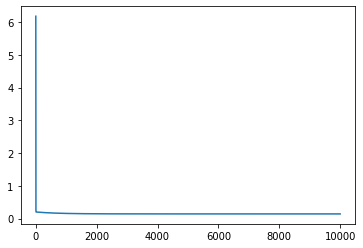

In [357]:
plt.plot(losses);

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [368]:
mv_data = np.genfromtxt('MultipleLR.csv', delimiter=',')
print(mv_data.shape)
mv_data

(25, 4)


array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [369]:
x = mv_data[:,0:-1]
y = mv_data[:,-1:]

In [370]:
inputs = np.atleast_2d(np.ones((mv_data.shape[0]))).T
inputs = np.append(inputs, x, axis=1)
inputs

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [371]:
thetas = np.atleast_2d(np.zeros((mv_data.shape[1]))).T
learn_rate = .00001

In [372]:
def get_outputs(thetas, inputs):
    return inputs.dot(thetas)
outputs = get_outputs(thetas, inputs)
outputs

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [373]:
def cost_fun(outputs,targets):
    return np.mean((outputs - targets)**2) / 2
loss = cost_fun(outputs,y)
loss

13405.98

In [374]:
def grad(outputs, targets, inputs):
    return inputs.transpose().dot(outputs-targets) / len(targets)

grads = grad(outputs, y, inputs)
grads

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

In [375]:
def update_parameters(thetas, learn_rate, grads):
    return thetas - learn_rate * grads

thetas = update_parameters(thetas, learn_rate, grads)
thetas

array([[0.0016204],
       [0.130758 ],
       [0.131472 ],
       [0.1346708]])

### Repeat your implementation but for more than one variable

In [376]:
losses = []
last_loss = None
for i in range(100000):
    outputs = get_outputs(thetas, inputs)
    loss = cost_fun(outputs,y)
    print("loss: " + str(loss))
    losses.append(loss)
    grads = grad(outputs, y, inputs)
    thetas = update_parameters(thetas, learn_rate, grads)  
    #if last_loss and last_loss < loss:
     #   break
    #else:
     #   last_loss = loss
    jac = np.linalg.norm(grads, 2)   
    print("jac: " + str(jac))    
    if jac < .00000001 and jac > -.00000001:
        break

loss: 8668.481648916411
jac: 18426.307898413055
loss: 5605.887123892013
jac: 14815.235171712453
loss: 3626.04772762138
jac: 11911.838498552845
loss: 2346.164144154076
jac: 9577.431973509338
loss: 1518.7726587864306
jac: 7700.508517388835
loss: 983.8983511273208
jac: 6191.4135432873345
loss: 638.1241396672503
jac: 4978.0624457996955
loss: 414.59521540367524
jac: 4002.4973516375585
loss: 270.09274619078127
jac: 3218.1186587246098
loss: 176.67756834060296
jac: 2587.459123309481
loss: 116.28818345470302
jac: 2080.3941704069002
loss: 77.24858977294615
jac: 1672.7029398596587
loss: 52.01074149671201
jac: 1344.9113338226953
loss: 35.695143354522216
jac: 1081.361801766652
loss: 25.14740615216882
jac: 869.4654296129172
loss: 18.328349475478397
jac: 699.1006076815391
loss: 13.919728648346966
jac: 562.1295537092523
loss: 11.069353735031035
jac: 452.00959671052277
loss: 9.226319657149944
jac: 363.4806537958912
loss: 8.034489369807979
jac: 292.31397140404374
loss: 7.263635199060097
jac: 235.1101285

jac: 9.957514438398661
loss: 5.609454801774593
jac: 9.955484861747813
loss: 5.608463785991672
jac: 9.953455727782018
loss: 5.607473174145238
jac: 9.951427036402858
loss: 5.606482966064841
jac: 9.949398787511745
loss: 5.60549316158016
jac: 9.947370981010218
loss: 5.604503760520893
jac: 9.945343616799786
loss: 5.603514762716869
jac: 9.943316694782032
loss: 5.60252616799797
jac: 9.941290214858519
loss: 5.601537976194123
jac: 9.939264176930859
loss: 5.600550187135351
jac: 9.937238580900685
loss: 5.599562800651799
jac: 9.93521342666963
loss: 5.598575816573567
jac: 9.93318871413932
loss: 5.597589234730942
jac: 9.931164443211498
loss: 5.596603054954239
jac: 9.929140613787844
loss: 5.595617277073839
jac: 9.927117225770097
loss: 5.594631900920208
jac: 9.92509427906002
loss: 5.59364692632386
jac: 9.923071773559355
loss: 5.592662353115452
jac: 9.92104970916995
loss: 5.591678181125621
jac: 9.919028085793581
loss: 5.59069441018515
jac: 9.917006903332101
loss: 5.5897110401248336
jac: 9.9149861616873

jac: 9.603133231107565
loss: 5.439262634372859
jac: 9.60118092027874
loss: 5.438340901324584
jac: 9.599229034936839
loss: 5.4374195430068175
jac: 9.597277574987205
loss: 5.436498559261769
jac: 9.595326540335117
loss: 5.435577949931635
jac: 9.593375930885893
loss: 5.434657714858707
jac: 9.591425746544889
loss: 5.433737853885397
jac: 9.5894759872175
loss: 5.432818366854132
jac: 9.587526652809116
loss: 5.4318992536074004
jac: 9.585577743225151
loss: 5.4309805139877945
jac: 9.583629258371035
loss: 5.430062147837954
jac: 9.581681198152227
loss: 5.42914415500058
jac: 9.57973356247419
loss: 5.428226535318467
jac: 9.577786351242457
loss: 5.427309288634459
jac: 9.575839564362541
loss: 5.426392414791447
jac: 9.573893201739983
loss: 5.425475913632446
jac: 9.57194726328034
loss: 5.424559785000485
jac: 9.570001748889176
loss: 5.423644028738682
jac: 9.568056658472145
loss: 5.42272864469023
jac: 9.566111991934834
loss: 5.4218136326983775
jac: 9.56416774918292
loss: 5.420898992606422
jac: 9.5622239301

jac: 9.265995235865764
loss: 5.282670079000922
jac: 9.264116370820483
loss: 5.281811927491093
jac: 9.262237914913127
loss: 5.280954123954084
jac: 9.260359868052582
loss: 5.28009666824356
jac: 9.258482230147802
loss: 5.279239560213295
jac: 9.256605001107785
loss: 5.278382799717066
jac: 9.254728180841461
loss: 5.27752638660877
jac: 9.25285176925785
loss: 5.276670320742344
jac: 9.250975766265997
loss: 5.275814601971795
jac: 9.249100171774948
loss: 5.274959230151146
jac: 9.247224985693725
loss: 5.274104205134599
jac: 9.24535020793147
loss: 5.273249526776241
jac: 9.243475838397211
loss: 5.272395194930412
jac: 9.241601877000162
loss: 5.27154120945138
jac: 9.239728323649427
loss: 5.270687570193533
jac: 9.23785517825416
loss: 5.269834277011288
jac: 9.235982440723541
loss: 5.2689813297591845
jac: 9.234110110966816
loss: 5.268128728291782
jac: 9.232238188893147
loss: 5.2672764724636885
jac: 9.230366674411856
loss: 5.266424562129567
jac: 9.228495567432157
loss: 5.26557299714424
jac: 9.22662486786

jac: 8.71500719483607
loss: 5.03792042565652
jac: 8.713248222892398
loss: 5.037161295326012
jac: 8.711489633395828
loss: 5.03640247139299
jac: 8.709731426261325
loss: 5.035643953729045
jac: 8.70797360140369
loss: 5.034885742205716
jac: 8.706216158737774
loss: 5.034127836694736
jac: 8.704459098178583
loss: 5.033370237067802
jac: 8.702702419640998
loss: 5.032612943196667
jac: 8.70094612303997
loss: 5.031855954953218
jac: 8.699190208290496
loss: 5.031099272209287
jac: 8.697434675307495
loss: 5.030342894836848
jac: 8.69567952400604
loss: 5.029586822707873
jac: 8.693924754301113
loss: 5.028831055694429
jac: 8.692170366107776
loss: 5.028075593668634
jac: 8.69041635934111
loss: 5.027320436502617
jac: 8.688662733916145
loss: 5.026565584068607
jac: 8.686909489748015
loss: 5.025811036238888
jac: 8.685156626751825
loss: 5.025056792885775
jac: 8.683404144842724
loss: 5.024302853881648
jac: 8.681652043935891
loss: 5.023549219098946
jac: 8.679900323946454
loss: 5.022795888410157
jac: 8.6781489847896

jac: 8.179413131492772
loss: 4.813306121814698
jac: 8.177770515477711
loss: 4.812637429659044
jac: 8.176128256003365
loss: 4.811969006048775
jac: 8.174486352990314
loss: 4.811300850871695
jac: 8.172844806359214
loss: 4.8106329640156416
jac: 8.17120361603068
loss: 4.809965345368505
jac: 8.169562781925439
loss: 4.80929799481825
jac: 8.167922303964156
loss: 4.808630912252824
jac: 8.166282182067524
loss: 4.807964097560279
jac: 8.164642416156198
loss: 4.807297550628702
jac: 8.163003006151015
loss: 4.806631271346209
jac: 8.16136395197266
loss: 4.805965259600982
jac: 8.15972525354192
loss: 4.805299515281264
jac: 8.158086910779597
loss: 4.804634038275303
jac: 8.156448923606483
loss: 4.803968828471439
jac: 8.154811291943403
loss: 4.803303885758037
jac: 8.153174015711201
loss: 4.802639210023503
jac: 8.151537094830731
loss: 4.801974801156314
jac: 8.149900529222885
loss: 4.801310659044981
jac: 8.148264318808543
loss: 4.800646783578058
jac: 8.146628463508586
loss: 4.799983174644193
jac: 8.144992963

loss: 4.586204948090721
jac: 7.601400182370047
loss: 4.585627192911078
jac: 7.5998828977140835
loss: 4.5850496683541655
jac: 7.598365941690408
loss: 4.584472374324028
jac: 7.596849314225885
loss: 4.583895310724717
jac: 7.595333015247334
loss: 4.5833184774603435
jac: 7.593817044681592
loss: 4.582741874435055
jac: 7.592301402455531
loss: 4.582165501553043
jac: 7.590786088496019
loss: 4.581589358718546
jac: 7.589271102730018
loss: 4.581013445835821
jac: 7.587756445084337
loss: 4.58043776280918
jac: 7.586242115485983
loss: 4.579862309542982
jac: 7.58472811386188
loss: 4.57928708594164
jac: 7.583214440139001
loss: 4.578712091909568
jac: 7.581701094244306
loss: 4.578137327351236
jac: 7.580188076104787
loss: 4.57756279217118
jac: 7.578675385647499
loss: 4.576988486273959
jac: 7.5771630227994375
loss: 4.57641440956413
jac: 7.575650987487588
loss: 4.575840561946406
jac: 7.574139279639141
loss: 4.575266943325399
jac: 7.572627899181065
loss: 4.574693553605877
jac: 7.571116846040489
loss: 4.574120

jac: 7.318935195130381
loss: 4.479930815795597
jac: 7.317479054722582
loss: 4.479395414063544
jac: 7.316023229330399
loss: 4.4788602253475815
jac: 7.3145677188835725
loss: 4.4783252495593135
jac: 7.313112523312065
loss: 4.477790486610295
jac: 7.311657642545661
loss: 4.477255936412136
jac: 7.310203076514294
loss: 4.476721598876551
jac: 7.308748825147884
loss: 4.476187473915164
jac: 7.30729488837632
loss: 4.475653561439783
jac: 7.305841266129577
loss: 4.47511986136213
jac: 7.304387958337582
loss: 4.474586373594047
jac: 7.302934964930324
loss: 4.474053098047364
jac: 7.3014822858377295
loss: 4.473520034633963
jac: 7.300029920989871
loss: 4.472987183265789
jac: 7.29857787031675
loss: 4.472454543854798
jac: 7.297126133748384
loss: 4.47192211631297
jac: 7.295674711214792
loss: 4.47138990055236
jac: 7.294223602646089
loss: 4.47085789648504
jac: 7.292772807972325
loss: 4.4703261040231235
jac: 7.291322327123587
loss: 4.469794523078749
jac: 7.289872160029982
loss: 4.4692631535641185
jac: 7.288422

jac: 6.8523890431701675
loss: 4.313365458933921
jac: 6.851033725747962
loss: 4.312896138719622
jac: 6.849678700886236
loss: 4.312427004134185
jac: 6.848323968519936
loss: 4.3119580551008285
jac: 6.8469695285838545
loss: 4.311489291542826
jac: 6.845615381012866
loss: 4.311020713383451
jac: 6.844261525741853
loss: 4.310552320546014
jac: 6.842907962705721
loss: 4.310084112953905
jac: 6.841554691839375
loss: 4.3096160905305085
jac: 6.840201713077741
loss: 4.309148253199209
jac: 6.838849026355762
loss: 4.308680600883478
jac: 6.837496631608399
loss: 4.308213133506804
jac: 6.836144528770588
loss: 4.307745850992707
jac: 6.83479271777732
loss: 4.307278753264739
jac: 6.833441198563636
loss: 4.306811840246475
jac: 6.832089971064512
loss: 4.306345111861528
jac: 6.83073903521499
loss: 4.30587856803356
jac: 6.829388390950108
loss: 4.305412208686248
jac: 6.828038038204918
loss: 4.304946033743287
jac: 6.826687976914475
loss: 4.3044800431284465
jac: 6.825338207013878
loss: 4.3040142367654735
jac: 6.823

jac: 6.397957616968733
loss: 4.160734352906924
jac: 6.396700275332683
loss: 4.16032521536852
jac: 6.3954432044342475
loss: 4.159916238619863
jac: 6.394186404213107
loss: 4.159507422594763
jac: 6.392929874608991
loss: 4.15909876722701
jac: 6.391673615561582
loss: 4.158690272450468
jac: 6.390417627010614
loss: 4.158281938198993
jac: 6.389161908895876
loss: 4.157873764406495
jac: 6.387906461157136
loss: 4.157465751006898
jac: 6.386651283734112
loss: 4.157057897934151
jac: 6.3853963765666135
loss: 4.156650205122266
jac: 6.384141739594477
loss: 4.156242672505219
jac: 6.382887372757451
loss: 4.155835300017061
jac: 6.381633275995439
loss: 4.155428087591877
jac: 6.380379449248236
loss: 4.155021035163735
jac: 6.379125892455691
loss: 4.154614142666788
jac: 6.377872605557686
loss: 4.154207410035166
jac: 6.376619588494129
loss: 4.153800837203038
jac: 6.375366841204844
loss: 4.153394424104664
jac: 6.374114363629832
loss: 4.152988170674217
jac: 6.372862155708969
loss: 4.1525820768460004
jac: 6.37161

jac: 6.156618720475187
loss: 4.083535912289609
jac: 6.155413307371753
loss: 4.083157058251063
jac: 6.154208153438766
loss: 4.082778352547138
jac: 6.153003258618513
loss: 4.082399795116952
jac: 6.151798622853274
loss: 4.082021385899584
jac: 6.150594246085354
loss: 4.0816431248341525
jac: 6.1493901282570755
loss: 4.081265011859834
jac: 6.148186269310723
loss: 4.080887046915777
jac: 6.1469826691886365
loss: 4.080509229941196
jac: 6.145779327833183
loss: 4.080131560875309
jac: 6.144576245186708
loss: 4.0797540396573755
jac: 6.143373421191591
loss: 4.079376666226673
jac: 6.1421708557902015
loss: 4.078999440522506
jac: 6.140968548924924
loss: 4.0786223624842055
jac: 6.139766500538199
loss: 4.0782454320511174
jac: 6.138564710572452
loss: 4.077868649162644
jac: 6.1373631789700855
loss: 4.077492013758159
jac: 6.1361619056735615
loss: 4.0771155257771206
jac: 6.13496089062536
loss: 4.076739185158996
jac: 6.133760133767939
loss: 4.076362991843222
jac: 6.132559635043767
loss: 4.075986945769386
jac:

jac: 5.910235110152338
loss: 4.007490201847838
jac: 5.909082627882605
loss: 4.0071410633162285
jac: 5.907930392992587
loss: 4.006792060930434
jac: 5.906778405427179
loss: 4.006443194634661
jac: 5.905626665131278
loss: 4.006094464373198
jac: 5.904475172049807
loss: 4.005745870090301
jac: 5.903323926127682
loss: 4.005397411730298
jac: 5.9021729273099
loss: 4.005049089237489
jac: 5.9010221755413275
loss: 4.004700902556269
jac: 5.899871670767013
loss: 4.004352851631003
jac: 5.898721412931919
loss: 4.004004936406069
jac: 5.8975714019810175
loss: 4.003657156825904
jac: 5.896421637859295
loss: 4.003309512834941
jac: 5.895272120511789
loss: 4.0029620043776815
jac: 5.894122849883554
loss: 4.002614631398581
jac: 5.892973825919586
loss: 4.002267393842191
jac: 5.891825048564952
loss: 4.001920291653049
jac: 5.890676517764754
loss: 4.001573324775694
jac: 5.889528233463995
loss: 4.001226493154741
jac: 5.888380195607858
loss: 4.000879796734794
jac: 5.887232404141358
loss: 4.000533235460486
jac: 5.8860

loss: 3.901806431077945
jac: 5.550546580619088
loss: 3.9014983752493237
jac: 5.549471203385389
loss: 3.9011904387755867
jac: 5.5483960563553785
loss: 3.900882621608091
jac: 5.547321139477651
loss: 3.900574923698156
jac: 5.546246452700966
loss: 3.9002673449971716
jac: 5.545171995974144
loss: 3.89995988545655
jac: 5.544097769245906
loss: 3.8996525450276702
jac: 5.5430237724649505
loss: 3.899345323661972
jac: 5.5419500055801105
loss: 3.8990382213109167
jac: 5.5408764685401986
loss: 3.8987312379259946
jac: 5.539803161293944
loss: 3.898424373458677
jac: 5.538730083790223
loss: 3.8981176278604988
jac: 5.537657235977831
loss: 3.8978110010829528
jac: 5.536584617805576
loss: 3.8975044930776597
jac: 5.535512229222319
loss: 3.8971981037961676
jac: 5.534440070176965
loss: 3.896891833190054
jac: 5.533368140618315
loss: 3.8965856812109707
jac: 5.532296440495274
loss: 3.8962796478105286
jac: 5.5312249697567575
loss: 3.8959737329403965
jac: 5.530153728351603
loss: 3.8956679365522713
jac: 5.52908271622

jac: 5.224938735351047
loss: 3.810701337119517
jac: 5.223932964766433
loss: 3.8104284686282193
jac: 5.222927408879793
loss: 3.8101557051752986
jac: 5.22192206764339
loss: 3.8098830467180975
jac: 5.22091694100939
loss: 3.8096104932139947
jac: 5.219912028929962
loss: 3.8093380446204
jac: 5.218907331357295
loss: 3.809065700894724
jac: 5.217902848243639
loss: 3.808793461994416
jac: 5.216898579541217
loss: 3.8085213278768943
jac: 5.215894525202278
loss: 3.8082492984996743
jac: 5.214890685179061
loss: 3.8079773738202336
jac: 5.213887059423833
loss: 3.807705553796047
jac: 5.212883647888819
loss: 3.8074338383846764
jac: 5.211880450526362
loss: 3.807162227543651
jac: 5.21087746728872
loss: 3.8068907212305487
jac: 5.209874698128219
loss: 3.8066193194029028
jac: 5.208872142997149
loss: 3.806348022018355
jac: 5.207869801847831
loss: 3.806076829034503
jac: 5.206867674632647
loss: 3.8058057404089816
jac: 5.2058657613038894
loss: 3.8055347560994335
jac: 5.204864061813911
loss: 3.805263876063537
jac: 

loss: 3.7553888174391004
jac: 5.016443295359084
loss: 3.7551371945176015
jac: 5.015481987595628
loss: 3.754885668024024
jac: 5.01452088462602
loss: 3.754634237919348
jac: 5.0135599864046725
loss: 3.7543829041645767
jac: 5.0125992928859775
loss: 3.754131666720733
jac: 5.01163880402433
loss: 3.7538805255488263
jac: 5.010678519774131
loss: 3.7536294806099106
jac: 5.009718440089812
loss: 3.753378531865078
jac: 5.008758564925801
loss: 3.753127679275384
jac: 5.007798894236573
loss: 3.7528769228019336
jac: 5.00683942797654
loss: 3.752626262405828
jac: 5.0058801661002015
loss: 3.7523756980482323
jac: 5.004921108562041
loss: 3.752125229690252
jac: 5.0039622553164795
loss: 3.75187485729308
jac: 5.003003606318077
loss: 3.7516245808178765
jac: 5.002045161521293
loss: 3.7513744002258353
jac: 5.001086920880674
loss: 3.7511243154781755
jac: 5.000128884350705
loss: 3.7508743265361266
jac: 4.999171051885986
loss: 3.75062443336095
jac: 4.998213423441044
loss: 3.750374635913861
jac: 4.99725599897036
loss

jac: 4.842040067039319
loss: 3.7102056027547916
jac: 4.841115880197309
loss: 3.7099712610909763
jac: 4.840191889880835
loss: 3.709737008872491
jac: 4.839268096046173
loss: 3.709502846063242
jac: 4.838344498649562
loss: 3.7092687726271403
jac: 4.837421097647203
loss: 3.709034788528146
jac: 4.836497892995408
loss: 3.708800893730216
jac: 4.835574884650408
loss: 3.7085670881973245
jac: 4.834652072568477
loss: 3.7083333718934552
jac: 4.833729456705913
loss: 3.7080997447826003
jac: 4.832807037019031
loss: 3.707866206828799
jac: 4.831884813464127
loss: 3.707632757996058
jac: 4.830962785997484
loss: 3.7073993982484468
jac: 4.830040954575451
loss: 3.707166127550033
jac: 4.829119319154358
loss: 3.7069329458648697
jac: 4.828197879690554
loss: 3.706699853157066
jac: 4.827276636140386
loss: 3.7064668493907362
jac: 4.826355588460266
loss: 3.7062339345299797
jac: 4.825434736606483
loss: 3.7060011085389677
jac: 4.824514080535471
loss: 3.7057683713818155
jac: 4.823593620203599
loss: 3.7055357230227317


jac: 4.679700728833355
loss: 3.6696500944482016
jac: 4.678811031818058
loss: 3.6694312025308
jac: 4.677921523646664
loss: 3.6692123938339423
jac: 4.677032204277049
loss: 3.668993668324126
jac: 4.676143073667185
loss: 3.6687750259678813
jac: 4.675254131775009
loss: 3.668556466731754
jac: 4.674365378558525
loss: 3.6683379905823355
jac: 4.673476813975724
loss: 3.6681195974861662
jac: 4.672588437984515
loss: 3.667901287409849
jac: 4.671700250542964
loss: 3.6676830603199706
jac: 4.670812251609059
loss: 3.6674649161831576
jac: 4.669924441140799
loss: 3.667246854966065
jac: 4.669036819096269
loss: 3.6670288766352974
jac: 4.668149385433454
loss: 3.6668109811575227
jac: 4.6672621401104
loss: 3.666593168499434
jac: 4.6663750830851844
loss: 3.6663754386277048
jac: 4.665488214315873
loss: 3.6661577915090318
jac: 4.6646015337604645
loss: 3.6659402271101293
jac: 4.663715041377144
loss: 3.665722745397724
jac: 4.6628287371239425
loss: 3.665505346338555
jac: 4.661942620958997
loss: 3.6652880298993917
j

jac: 4.404412697967807
loss: 3.6036769588265485
jac: 4.403581334240501
loss: 3.603483061841996
jac: 4.402750146366486
loss: 3.603289238047273
jac: 4.401919134306614
loss: 3.603095487413106
jac: 4.401088298021774
loss: 3.602901809910195
jac: 4.400257637472776
loss: 3.6027082055092707
jac: 4.399427152620503
loss: 3.6025146741810916
jac: 4.398596843425876
loss: 3.6023212158963935
jac: 4.397766709849737
loss: 3.6021278306259616
jac: 4.396936751852988
loss: 3.6019345183405687
jac: 4.396106969396489
loss: 3.6017412790110273
jac: 4.3952773624412504
loss: 3.6015481126081004
jac: 4.394447930948123
loss: 3.6013550191026633
jac: 4.393618674878055
loss: 3.601161998465467
jac: 4.392789594191962
loss: 3.600969050667406
jac: 4.391960688850833
loss: 3.600776175679345
jac: 4.391131958815617
loss: 3.600583373472123
jac: 4.390303404047267
loss: 3.6003906440166027
jac: 4.389475024506721
loss: 3.6001979872837193
jac: 4.3886468201550075
loss: 3.6000054032443445
jac: 4.387818790953133
loss: 3.599812891869388

loss: 3.5392335458082376
jac: 4.119273074015885
loss: 3.5390638775850634
jac: 4.118501903672412
loss: 3.538894272882838
jac: 4.11773089578073
loss: 3.538724731676304
jac: 4.116960050304744
loss: 3.5385552539401943
jac: 4.116189367208272
loss: 3.538385839649263
jac: 4.115418846455194
loss: 3.5382164887782763
jac: 4.1146484880093555
loss: 3.538047201302008
jac: 4.113878291834621
loss: 3.5378779771952313
jac: 4.113108257894888
loss: 3.5377088164327315
jac: 4.112338386153998
loss: 3.5375397189893403
jac: 4.111568676575908
loss: 3.5373706848398405
jac: 4.110799129124477
loss: 3.5372017139590795
jac: 4.11002974376362
loss: 3.537032806321887
jac: 4.10926052045726
loss: 3.536863961903084
jac: 4.108491459169347
loss: 3.536695180677567
jac: 4.107722559863758
loss: 3.536526462620166
jac: 4.106953822504498
loss: 3.536357807705782
jac: 4.106185247055504
loss: 3.5361892159092814
jac: 4.105416833480705
loss: 3.53602068720557
jac: 4.104648581744104
loss: 3.5358522215695647
jac: 4.103880491809628
loss:

jac: 3.9682248199197825
loss: 3.5063739925258766
jac: 3.967485430820418
loss: 3.506216597784018
jac: 3.966746197099019
loss: 3.5060592616888693
jac: 3.966007118721018
loss: 3.5059019842171772
jac: 3.9652681956518654
loss: 3.50574476534568
jac: 3.964529427856955
loss: 3.505587605051178
jac: 3.9637908153017665
loss: 3.505430503310456
jac: 3.9630523579517085
loss: 3.505273460100274
jac: 3.9623140557722896
loss: 3.505116475397447
jac: 3.961575908728939
loss: 3.50495954917877
jac: 3.9608379167871277
loss: 3.5048026814210984
jac: 3.9601000799123676
loss: 3.504645872101229
jac: 3.9593623980701524
loss: 3.5044891211960003
jac: 3.958624871225941
loss: 3.5043324286822677
jac: 3.957887499345275
loss: 3.504175794536891
jac: 3.9571502823936338
loss: 3.5040192187367363
jac: 3.9564132203365365
loss: 3.50386270125867
jac: 3.955676313139597
loss: 3.5037062420795775
jac: 3.954939560768212
loss: 3.503549841176362
jac: 3.9542029631880293
loss: 3.503393498525935
jac: 3.953466520364566
loss: 3.5032372141052

jac: 3.8433063369049734
loss: 3.480145515431505
jac: 3.8425931706728016
loss: 3.4799978739079984
jac: 3.8418801539832397
loss: 3.479850287170666
jac: 3.84116728680297
loss: 3.479702755197843
jac: 3.8404545690988106
loss: 3.4795552779678802
jac: 3.839742000837432
loss: 3.4794078554591383
jac: 3.8390295819855456
loss: 3.479260487650028
jac: 3.838317312510029
loss: 3.4791131745189228
jac: 3.837605192377556
loss: 3.478965916044191
jac: 3.83689322155493
loss: 3.478818712204264
jac: 3.836181400008916
loss: 3.4786715629775147
jac: 3.8354697277062884
loss: 3.4785244683423997
jac: 3.8347582046138506
loss: 3.4783774282773496
jac: 3.834046830698428
loss: 3.478230442760774
jac: 3.8333356059268024
loss: 3.4780835117711404
jac: 3.832624530265797
loss: 3.477936635286883
jac: 3.831913603682224
loss: 3.477789813286498
jac: 3.8312028261429
loss: 3.477643045748459
jac: 3.8304921976147277
loss: 3.4774963326512114
jac: 3.829781718064504
loss: 3.4773496739732495
jac: 3.829071387459058
loss: 3.47720306969312

jac: 3.629226306386502
loss: 3.4368974528793332
jac: 3.628557940724545
loss: 3.436765800675618
jac: 3.627889714639146
loss: 3.436634196956594
jac: 3.627221628099205
loss: 3.436502641703236
jac: 3.6265536810737475
loss: 3.4363711348964854
jac: 3.6258858735316846
loss: 3.4362396765173213
jac: 3.625218205442042
loss: 3.436108266546711
jac: 3.624550676773844
loss: 3.4359769049656377
jac: 3.6238832874959885
loss: 3.4358455917550805
jac: 3.623216037577543
loss: 3.4357143268960306
jac: 3.622548926987481
loss: 3.435583110369497
jac: 3.62188195569483
loss: 3.435451942156503
jac: 3.6212151236686236
loss: 3.4353208222380447
jac: 3.620548430877866
loss: 3.4351897505951747
jac: 3.6198818772916113
loss: 3.4350587272088884
jac: 3.619215462878906
loss: 3.4349277520602666
jac: 3.6185491876087466
loss: 3.4347968251303356
jac: 3.617883051450252
loss: 3.434665946400175
jac: 3.6172170543724715
loss: 3.4345351158508244
jac: 3.616551196344476
loss: 3.4344043334633847
jac: 3.6158854773353015
loss: 3.434273599

jac: 3.5047083629924716
loss: 3.41273304663506
jac: 3.5040659672699115
loss: 3.412610273104749
jac: 3.5034237053491957
loss: 3.4124875445764604
jac: 3.502781577200609
loss: 3.412364861032572
jac: 3.5021395827943818
loss: 3.4122422224555065
jac: 3.5014977221008037
loss: 3.4121196288276225
jac: 3.5008559950901077
loss: 3.411997080131355
jac: 3.5002144017326273
loss: 3.411874576349061
jac: 3.499572941998614
loss: 3.4117521174632084
jac: 3.4989316158583783
loss: 3.4116297034562115
jac: 3.498290423282223
loss: 3.4115073343104596
jac: 3.497649364240406
loss: 3.4113850100084475
jac: 3.4970084387032823
loss: 3.4112627305325924
jac: 3.4963676466411835
loss: 3.411140495865355
jac: 3.4957269880244453
loss: 3.411018305989174
jac: 3.4950864628233203
loss: 3.4108961608865433
jac: 3.494446071008237
loss: 3.4107740605399277
jac: 3.493805812549508
loss: 3.4106520049317997
jac: 3.4931656874174952
loss: 3.4105299940446474
jac: 3.4925256955825206
loss: 3.4104080278609974
jac: 3.4918858370149843
loss: 3.41

jac: 3.2944139680802738
loss: 3.3735814398491475
jac: 3.2938152691159375
loss: 3.3734729575169013
jac: 3.293216694242258
loss: 3.3733645146091584
jac: 3.2926182434316145
loss: 3.3732561111105612
jac: 3.2920199166564563
loss: 3.3731477470057754
jac: 3.2914217138892634
loss: 3.3730394222795077
jac: 3.2908236351024307
loss: 3.3729311369164225
jac: 3.2902256802684597
loss: 3.372822890901205
jac: 3.289627849359783
loss: 3.3727146842185527
jac: 3.2890301423488775
loss: 3.3726065168531885
jac: 3.2884325592082577
loss: 3.3724983887898072
jac: 3.287835099910332
loss: 3.3723903000131377
jac: 3.2872377644276742
loss: 3.3722822505078893
jac: 3.286640552732719
loss: 3.372174240258783
jac: 3.286043464797976
loss: 3.3720662692505585
jac: 3.285446500595951
loss: 3.371958337468004
jac: 3.2848496600992276
loss: 3.37185044489579
jac: 3.2842529432801966
loss: 3.371742591518717
jac: 3.283656350111477
loss: 3.3716347773215087
jac: 3.283059880565556
loss: 3.371527002288991
jac: 3.2824635346150264
loss: 3.371

jac: 3.1491002258663445
loss: 3.347748588374237
jac: 3.14853158982397
loss: 3.3476494648125823
jac: 3.1479630711956843
loss: 3.347550377044192
jac: 3.147394669955411
loss: 3.347451325055222
jac: 3.146826386077095
loss: 3.347352308831855
jac: 3.1462582195346553
loss: 3.347253328360214
jac: 3.145690170302068
loss: 3.34715438362649
jac: 3.145122238353267
loss: 3.3470554746168433
jac: 3.144554423662226
loss: 3.3469566013174457
jac: 3.1439867262029657
loss: 3.34685776371447
jac: 3.1434191459493785
loss: 3.346758961794133
jac: 3.1428516828754662
loss: 3.346660195542608
jac: 3.1422843369552114
loss: 3.3465614649460873
jac: 3.14171710816264
loss: 3.346462769990804
jac: 3.1411499964717375
loss: 3.3463641106629263
jac: 3.140583001856469
loss: 3.346265486948708
jac: 3.140016124290901
loss: 3.3461668988343423
jac: 3.139449363748969
loss: 3.3460683463060605
jac: 3.1388827202047764
loss: 3.345969829350112
jac: 3.138316193632317
loss: 3.3458713479527193
jac: 3.1377497840056168
loss: 3.345772902100135

jac: 2.9607742358031177
loss: 3.3157593476027425
jac: 2.9602443822164823
loss: 3.3156717249756475
jac: 2.9597146374381187
loss: 3.3155841337062038
jac: 2.959185001443901
loss: 3.315496573782375
jac: 2.958655474209698
loss: 3.315409045192094
jac: 2.9581260557113924
loss: 3.3153215479233733
jac: 2.9575967459248753
loss: 3.3152340819641135
jac: 2.957067544826059
loss: 3.3151466473023334
jac: 2.9565384523908067
loss: 3.3150592439259965
jac: 2.9560094685950205
loss: 3.314971871823055
jac: 2.9554805934145953
loss: 3.3148845309815163
jac: 2.95495182682547
loss: 3.314797221389386
jac: 2.9544231688035905
loss: 3.3147099430346225
jac: 2.953894619324821
loss: 3.3146226959052636
jac: 2.9533661783651164
loss: 3.3145354799892544
jac: 2.952837845900397
loss: 3.3144482952746706
jac: 2.952309621906607
loss: 3.3143611417494903
jac: 2.9517815063597257
loss: 3.314274019401735
jac: 2.951253499235665
loss: 3.3141869282194314
jac: 2.9507256005103772
loss: 3.3140998681906075
jac: 2.950197810159847
loss: 3.314

jac: 2.8569374577380895
loss: 3.2988433244541677
jac: 2.8564288926554817
loss: 3.2987617398559377
jac: 2.8559204316614433
loss: 3.298680184299993
jac: 2.8554120747329352
loss: 3.2985986577752335
jac: 2.8549038218469063
loss: 3.2985171602705567
jac: 2.854395672980296
loss: 3.298435691774825
jac: 2.8538876281100385
loss: 3.298354252276973
jac: 2.853379687213085
loss: 3.2982728417658804
jac: 2.852871850266374
loss: 3.2981914602304663
jac: 2.852364117246944
loss: 3.29811010765967
jac: 2.851856488131698
loss: 3.2980287840423648
jac: 2.851348962897629
loss: 3.297947489367514
jac: 2.850841541521732
loss: 3.297866223624025
jac: 2.8503342239809317
loss: 3.297784986800828
jac: 2.8498270102522563
loss: 3.2977037788868686
jac: 2.849319900312737
loss: 3.297622599871089
jac: 2.848812894139314
loss: 3.297541449742429
jac: 2.8483059917090445
loss: 3.297460328489844
jac: 2.8477991929988837
loss: 3.2973792361022785
jac: 2.847292497985869
loss: 3.2972981725687065
jac: 2.8467859066470274
loss: 3.297217137

jac: 2.695578169393518
loss: 3.2735783667636293
jac: 2.6951025380319096
loss: 3.273505737394841
jac: 2.694627003464778
loss: 3.2734331336536364
jac: 2.6941515656706314
loss: 3.2733605555303074
jac: 2.6936762246281094
loss: 3.2732880030150824
jac: 2.693200980315812
loss: 3.273215476098266
jac: 2.6927258327122745
loss: 3.2731429747701286
jac: 2.692250781796131
loss: 3.273070499020913
jac: 2.6917758275460066
loss: 3.2729980488409605
jac: 2.6913009699404613
loss: 3.272925624220506
jac: 2.6908262089580943
loss: 3.2728532251498823
jac: 2.69035154457754
loss: 3.272780851619367
jac: 2.6898769767774615
loss: 3.272708503619256
jac: 2.689402505536426
loss: 3.2726361811398528
jac: 2.6889281308330983
loss: 3.2725638841714635
jac: 2.688453852646081
loss: 3.272491612704402
jac: 2.6879796709540758
loss: 3.272419366728994
jac: 2.687505585735635
loss: 3.2723471462355356
jac: 2.687031596969489
loss: 3.2722749512143725
jac: 2.6865577046342484
loss: 3.2722027816558095
jac: 2.6860839087085995
loss: 3.272130

jac: 2.5482026621841123
loss: 3.2515939612222717
jac: 2.547756937311926
loss: 3.2515290562450527
jac: 2.547311302619894
loss: 3.251464173971063
jac: 2.546865758087991
loss: 3.251399314391769
jac: 2.5464203036963506
loss: 3.2513344774986024
jac: 2.545974939425088
loss: 3.251269663283005
jac: 2.5455296652541866
loss: 3.2512048717364177
jac: 2.5450844811638174
loss: 3.25114010285031
jac: 2.5446393871340494
loss: 3.2510753566161115
jac: 2.544194383144968
loss: 3.2510106330253064
jac: 2.543749469176674
loss: 3.25094593206932
jac: 2.5433046452093047
loss: 3.2508812537396583
jac: 2.5428599112229886
loss: 3.250816598027744
jac: 2.542415267197737
loss: 3.2507519649250765
jac: 2.5419707131137583
loss: 3.25068735442312
jac: 2.5415262489511687
loss: 3.2506227665133762
jac: 2.5410818746900645
loss: 3.2505582011872813
jac: 2.540637590310623
loss: 3.2504936584363513
jac: 2.5401933957929517
loss: 3.2504291382520756
jac: 2.5397492911172166
loss: 3.250364640625927
jac: 2.539305276263514
loss: 3.25030016

loss: 3.233279174794353
jac: 2.4192818048418623
loss: 3.2332206506269134
jac: 2.4188620910579566
loss: 3.2331621467639087
jac: 2.4184424617102995
loss: 3.2331036631977685
jac: 2.4180229167801697
loss: 3.2330451999208667
jac: 2.417603456249011
loss: 3.2329867569256265
jac: 2.417184080098185
loss: 3.232928334204396
jac: 2.41676478830905
loss: 3.232869931749658
jac: 2.4163455808630325
loss: 3.232811549553755
jac: 2.415926457741503
loss: 3.232753187609141
jac: 2.4155074189258525
loss: 3.2326948459081986
jac: 2.4150884643974546
loss: 3.232636524443358
jac: 2.4146695941377945
loss: 3.232578223207056
jac: 2.4142508081282417
loss: 3.2325199421917103
jac: 2.4138321063501436
loss: 3.232461681389734
jac: 2.413413488785029
loss: 3.232403440793545
jac: 2.4129949554141854
loss: 3.2323452203956173
jac: 2.4125765062191697
loss: 3.2322870201883616
jac: 2.4121581411813175
loss: 3.2322288401642107
jac: 2.4117398602821
loss: 3.2321706803156127
jac: 2.4113216635029513
loss: 3.2321125406350206
jac: 2.410903

loss: 3.216599668616155
jac: 2.297073010978107
loss: 3.216546907711027
jac: 2.2966778109735615
loss: 3.216494164958702
jac: 2.296282690001223
loss: 3.21644144035247
jac: 2.2958876480436583
loss: 3.216388733885517
jac: 2.29549268508348
loss: 3.2163360455511376
jac: 2.2950978011032652
loss: 3.2162833753425843
jac: 2.294702996085613
loss: 3.216230723253103
jac: 2.294308270013163
loss: 3.2161780892759806
jac: 2.293913622868521
loss: 3.216125473404452
jac: 2.2935190546342996
loss: 3.2160728756317756
jac: 2.293124565293101
loss: 3.216020295951253
jac: 2.2927301548275967
loss: 3.215967734356137
jac: 2.292335823220386
loss: 3.215915190839701
jac: 2.2919415704540915
loss: 3.2158626653952234
jac: 2.2915473965113757
loss: 3.2158101580159855
jac: 2.2911533013748837
loss: 3.215757668695275
jac: 2.2907592850272023
loss: 3.215705197426365
jac: 2.2903653474510715
loss: 3.215652744202562
jac: 2.289971488629058
loss: 3.2156003090171312
jac: 2.2895777085438667
loss: 3.215547891863374
jac: 2.2891840071781

jac: 2.18086480588471
loss: 3.201366002170746
jac: 2.180492774063651
loss: 3.201318460738666
jac: 2.180120816177263
loss: 3.201270935524713
jac: 2.1797489322093586
loss: 3.2012234265229234
jac: 2.179377122143608
loss: 3.2011759337273293
jac: 2.179005385963819
loss: 3.2011284571319116
jac: 2.1786337236537716
loss: 3.2010809967306892
jac: 2.1782621351972122
loss: 3.201033552517698
jac: 2.1778906205778905
loss: 3.20098612448696
jac: 2.1775191797795856
loss: 3.2009387126324986
jac: 2.1771478127860884
loss: 3.2008913169483457
jac: 2.176776519581178
loss: 3.20084393742853
jac: 2.176405300148622
loss: 3.200796574067056
jac: 2.176034154472232
loss: 3.2007492268579925
jac: 2.175663082535755
loss: 3.2007018957953846
jac: 2.175292084323059
loss: 3.200654580873228
jac: 2.174921159817851
loss: 3.2006072820856013
jac: 2.174550309004001
loss: 3.2005599994265315
jac: 2.17417953186529
loss: 3.2005127328900778
jac: 2.1738088283855292
loss: 3.2004654824702667
jac: 2.1734381985485443
loss: 3.2004182481611

jac: 2.1179492036179908
loss: 3.1934224709826236
jac: 2.1175896526407145
loss: 3.193377632929442
jac: 2.1172301728567793
loss: 3.193332810098172
jac: 2.116870764250482
loss: 3.193288002483226
jac: 2.1165114268062672
loss: 3.1932432100790096
jac: 2.1161521605084506
loss: 3.1931984328799343
jac: 2.1157929653414547
loss: 3.1931536708804007
jac: 2.115433841289705
loss: 3.1931089240748185
jac: 2.1150747883375427
loss: 3.193064192457614
jac: 2.114715806469317
loss: 3.193019476023167
jac: 2.114356895669516
loss: 3.192974774765973
jac: 2.1139980559224987
loss: 3.1929300886803684
jac: 2.113639287212692
loss: 3.1928854177608263
jac: 2.1132805895244706
loss: 3.1928407620017456
jac: 2.112921962842257
loss: 3.1927961213975573
jac: 2.112563407150477
loss: 3.1927514959427072
jac: 2.1122049224335333
loss: 3.1927068856315923
jac: 2.1118465086758738
loss: 3.192662290458689
jac: 2.1114881658618962
loss: 3.1926177104184
jac: 2.1111298939760608
loss: 3.192573145505192
jac: 2.1107716930027562
loss: 3.192528

jac: 2.020680686143745
loss: 3.181524277129053
jac: 2.0203403375981783
loss: 3.181483462815685
jac: 2.0200000560355016
loss: 3.1814426622496152
jac: 2.0196598414410545
loss: 3.181401875425804
jac: 2.019319693800148
loss: 3.18136110233922
jac: 2.0189796130981215
loss: 3.181320342984872
jac: 2.018639599320367
loss: 3.181279597357721
jac: 2.018299652452156
loss: 3.181238865452784
jac: 2.0179597724788847
loss: 3.1811981472650257
jac: 2.017619959385906
loss: 3.181157442789417
jac: 2.017280213158511
loss: 3.1811167520210097
jac: 2.016940533782113
loss: 3.1810760749547615
jac: 2.016600921242101
loss: 3.1810354115856665
jac: 2.016261375523761
loss: 3.1809947619087313
jac: 2.0159218966125048
loss: 3.1809541259189786
jac: 2.0155824844937067
loss: 3.1809135036113783
jac: 2.015243139152686
loss: 3.1808728949809324
jac: 2.014903860574895
loss: 3.18083230002269
jac: 2.01456464874569
loss: 3.1807917187316157
jac: 2.014225503650379
loss: 3.1807511511027586
jac: 2.01388642527447
loss: 3.180710597131092

loss: 3.1707270839716775
jac: 1.9285916707104491
loss: 3.1706898924211053
jac: 1.9282693902148016
loss: 3.1706527132993405
jac: 1.9279471727497155
loss: 3.1706155466018187
jac: 1.9276250183013843
loss: 3.1705783923240913
jac: 1.9273029268561008
loss: 3.1705412504616493
jac: 1.9269808984000483
loss: 3.1705041210099263
jac: 1.9266589329194885
loss: 3.1704670039644913
jac: 1.9263370304006453
loss: 3.170429899320821
jac: 1.9260151908297922
loss: 3.17039280707443
jac: 1.9256934141931152
loss: 3.1703557272208123
jac: 1.925371700476981
loss: 3.1703186597554636
jac: 1.925050049667544
loss: 3.170281604673909
jac: 1.9247284617510942
loss: 3.170244561971659
jac: 1.924406936713909
loss: 3.170207531644225
jac: 1.9240854745422302
loss: 3.1701705136871015
jac: 1.923764075222286
loss: 3.1701335080958417
jac: 1.9234427387404358
loss: 3.170096514865938
jac: 1.9231214650829296
loss: 3.1700595339928923
jac: 1.9228002542359983
loss: 3.170022565472254
jac: 1.922479106185959
loss: 3.169985609299535
jac: 1.92

jac: 1.837717120068827
loss: 3.1604109544915224
jac: 1.8374125538096417
loss: 3.160377196440145
jac: 1.8371080467162964
loss: 3.1603434495769305
jac: 1.8368035987759472
loss: 3.1603097138978398
jac: 1.836499209975657
loss: 3.160275989398895
jac: 1.8361948803025594
loss: 3.160242276076041
jac: 1.8358906097437895
loss: 3.1602085739252472
jac: 1.8355863982864096
loss: 3.160174882942487
jac: 1.8352822459176108
loss: 3.160141203123773
jac: 1.8349781526245186
loss: 3.160107534465057
jac: 1.8346741183942272
loss: 3.160073876962363
jac: 1.8343701432138824
loss: 3.1600402306116213
jac: 1.834066227070596
loss: 3.1600065954088636
jac: 1.833762369951618
loss: 3.159972971350058
jac: 1.8334585718439462
loss: 3.1599393584311923
jac: 1.833154832734813
loss: 3.159905756648264
jac: 1.8328511526113558
loss: 3.1598721659972817
jac: 1.832547531460712
loss: 3.159838586474208
jac: 1.8322439692700376
loss: 3.159805018075053
jac: 1.8319404660264922
loss: 3.1597714607958305
jac: 1.8316370217172215
loss: 3.15973

jac: 1.7847188635265288
loss: 3.1546064478018123
jac: 1.7844245715038283
loss: 3.154574608716514
jac: 1.784130336410743
loss: 3.1545427801302304
jac: 1.783836158234927
loss: 3.1545109620391583
jac: 1.7835420369639965
loss: 3.154479154439593
jac: 1.7832479725855865
loss: 3.154447357327736
jac: 1.7829539650872865
loss: 3.1544155706998227
jac: 1.7826600144567577
loss: 3.1543837945521416
jac: 1.7823661206816406
loss: 3.1543520288809166
jac: 1.7820722837495406
loss: 3.154320273682365
jac: 1.7817785036481504
loss: 3.1542885289527764
jac: 1.7814847803650655
loss: 3.1542567946883833
jac: 1.781191113887971
loss: 3.1542250708854325
jac: 1.7808975042044972
loss: 3.1541933575401844
jac: 1.7806039513022756
loss: 3.1541616546488815
jac: 1.780310455168984
loss: 3.1541299622078096
jac: 1.7800170157923005
loss: 3.154098280213189
jac: 1.779723633159824
loss: 3.1540666086613065
jac: 1.779430307259268
loss: 3.154034947548396
jac: 1.7791370380783165
loss: 3.154003296870741
jac: 1.7788438256045744
loss: 3.1

loss: 3.145567042490404
jac: 1.699208132329285
loss: 3.145538171767941
jac: 1.698930323023317
loss: 3.145509310484977
jac: 1.698652567068703
loss: 3.1454804586381537
jac: 1.6983748644539647
loss: 3.1454516162241357
jac: 1.698097215167513
loss: 3.1454227832395434
jac: 1.6978196191977812
loss: 3.145393959681053
jac: 1.6975420765332259
loss: 3.1453651455453087
jac: 1.697264587162302
loss: 3.145336340828953
jac: 1.696987151073462
loss: 3.145307545528636
jac: 1.6967097682551429
loss: 3.1452787596410094
jac: 1.696432438695813
loss: 3.145249983162746
jac: 1.6961551623839284
loss: 3.14522121609048
jac: 1.6958779393079482
loss: 3.1451924584208673
jac: 1.69560076945632
loss: 3.1451637101506034
jac: 1.6953236528175755
loss: 3.145134971276284
jac: 1.695046589380095
loss: 3.1451062417946347
jac: 1.6947695791324084
loss: 3.145077521702288
jac: 1.6944926220629966
loss: 3.145048810995891
jac: 1.6942157181603303
loss: 3.1450201096721435
jac: 1.693938867412844
loss: 3.1449914177276868
jac: 1.69366206980

loss: 3.1373670445798574
jac: 1.6187322758672018
loss: 3.1373408437619394
jac: 1.618469864978091
loss: 3.13731465143802
jac: 1.6182075041093218
loss: 3.137288467605138
jac: 1.6179451932500746
loss: 3.1372622922602873
jac: 1.617682932389504
loss: 3.1372361254004835
jac: 1.617420721516914
loss: 3.137209967022703
jac: 1.6171585606214394
loss: 3.1371838171240034
jac: 1.616896449692281
loss: 3.1371576757013546
jac: 1.6166343887187236
loss: 3.1371315427517805
jac: 1.61637237768991
loss: 3.1371054182722897
jac: 1.6161104165950948
loss: 3.1370793022599117
jac: 1.615848505423485
loss: 3.1370531947116445
jac: 1.615586644164282
loss: 3.137027095624498
jac: 1.6153248328067666
loss: 3.137001004995514
jac: 1.6150630713401333
loss: 3.136974922821685
jac: 1.6148013597535857
loss: 3.1369488491000395
jac: 1.6145396980363753
loss: 3.136922783827611
jac: 1.614278086177751
loss: 3.1368967270014037
jac: 1.6140165241669355
loss: 3.1368706786184375
jac: 1.613755011993186
loss: 3.1368446386757443
jac: 1.613493

loss: 3.1294478673135684
jac: 1.5377504656566838
loss: 3.1294242224480273
jac: 1.5375034297476915
loss: 3.1294005851788063
jac: 1.5372564405460962
loss: 3.1293769555032505
jac: 1.5370094980419486
loss: 3.129353333418706
jac: 1.536762602225084
loss: 3.1293297189224996
jac: 1.5365157530855638
loss: 3.129306112012003
jac: 1.5362689506133411
loss: 3.1292825126845374
jac: 1.536022194798375
loss: 3.1292589209374837
jac: 1.5357754856305699
loss: 3.1292353367681796
jac: 1.5355288231
loss: 3.1292117601739524
jac: 1.5352822071965446
loss: 3.1291881911521613
jac: 1.535035637910264
loss: 3.1291646297001923
jac: 1.534789115231114
loss: 3.1291410758153644
jac: 1.534542639149057
loss: 3.1291175294950397
jac: 1.5342962096540387
loss: 3.12909399073659
jac: 1.5340498267361249
loss: 3.129070459537357
jac: 1.533803490385267
loss: 3.129046935894702
jac: 1.5335572005914262
loss: 3.1290234198059825
jac: 1.533310957344647
loss: 3.1289999112685645
jac: 1.5330647606349066
loss: 3.128976410279778
jac: 1.53281861

loss: 3.121935820396544
jac: 1.4575452906045412
loss: 3.1219145777041017
jac: 1.4573133538937229
loss: 3.121893341771708
jac: 1.4570814606516946
loss: 3.1218721125970115
jac: 1.456849610869177
loss: 3.121850890177674
jac: 1.4566178045368146
loss: 3.1218296745113427
jac: 1.4563860416453618
loss: 3.121808465595716
jac: 1.4561543221854938
loss: 3.1217872634283963
jac: 1.4559226461479566
loss: 3.121766068007082
jac: 1.4556910135234356
loss: 3.121744879329439
jac: 1.4554594243025922
loss: 3.12172369739313
jac: 1.4552278784762636
loss: 3.1217025221957915
jac: 1.4549963760350686
loss: 3.121681353735133
jac: 1.4547649169697487
loss: 3.121660192008782
jac: 1.4545335012710234
loss: 3.121639037014425
jac: 1.454302128929643
loss: 3.1216178887497303
jac: 1.4540707999362987
loss: 3.121596747212349
jac: 1.453839514281716
loss: 3.1215756123999756
jac: 1.4536082719566543
loss: 3.1215544843102636
jac: 1.4533770729518385
loss: 3.1215333629409012
jac: 1.4531459172579768
loss: 3.121512248289544
jac: 1.4529

loss: 3.1182589821873177
jac: 1.4169368102916107
loss: 3.1182389066774836
jac: 1.4167124664679789
loss: 3.118218837524225
jac: 1.4164881644908704
loss: 3.1181987747253412
jac: 1.4162639043512784
loss: 3.1181787182786422
jac: 1.4160396860403335
loss: 3.1181586681819606
jac: 1.4158155095490388
loss: 3.1181386244330596
jac: 1.4155913748685478
loss: 3.1181185870297874
jac: 1.4153672819899097
loss: 3.118098555969941
jac: 1.4151432309041585
loss: 3.1180785312513324
jac: 1.4149192216024613
loss: 3.118058512871789
jac: 1.4146952540758606
loss: 3.1180385008291274
jac: 1.4144713283154544
loss: 3.1180184951211345
jac: 1.414247444312309
loss: 3.1179984957456552
jac: 1.414023602057523
loss: 3.1179785027004887
jac: 1.4137998015422202
loss: 3.1179585159834575
jac: 1.4135760427574804
loss: 3.1179385355923936
jac: 1.4133523256944012
loss: 3.117918561525096
jac: 1.4131286503440548
loss: 3.1178985937793997
jac: 1.4129050166975847
loss: 3.117878632353114
jac: 1.4126814247461068
loss: 3.1178586772440764
ja

jac: 1.3291970152354664
loss: 3.110589878393764
jac: 1.3289889491783502
loss: 3.1105722176598407
jac: 1.3287809215060107
loss: 3.110554562454338
jac: 1.328572932210302
loss: 3.110536912775368
jac: 1.3283649812830676
loss: 3.110519268621066
jac: 1.3281570687161894
loss: 3.1105016299895305
jac: 1.3279491945015385
loss: 3.110483996878889
jac: 1.3277413586310027
loss: 3.1104663692872494
jac: 1.3275335610964463
loss: 3.110448747212729
jac: 1.3273258018897236
loss: 3.110431130653469
jac: 1.3271180810027008
loss: 3.1104135196075675
jac: 1.3269103984273396
loss: 3.11039591407315
jac: 1.326702754155431
loss: 3.11037831404832
jac: 1.3264951481789795
loss: 3.11036071953125
jac: 1.3262875804896836
loss: 3.110343130520014
jac: 1.3260800510795976
loss: 3.1103255470127538
jac: 1.3258725599405503
loss: 3.110307969007597
jac: 1.325665107064432
loss: 3.1102903965026685
jac: 1.3254576924431432
loss: 3.110272829496065
jac: 1.3252503160685498
loss: 3.1102552679859423
jac: 1.3250429779325805
loss: 3.1102377

loss: 3.1055797158021945
jac: 1.2688570452954175
loss: 3.1055636170698806
jac: 1.2686600659232772
loss: 3.1055475233355243
jac: 1.2684631225925194
loss: 3.1055314345974465
jac: 1.2682662152955155
loss: 3.1055153508539557
jac: 1.26806934402465
loss: 3.105499272103351
jac: 1.2678725087723932
loss: 3.105483198343951
jac: 1.2676757095310933
loss: 3.105467129574087
jac: 1.2674789462932001
loss: 3.105451065792023
jac: 1.2672822190511024
loss: 3.105435006996135
jac: 1.2670855277972077
loss: 3.105418953184686
jac: 1.2668888725239558
loss: 3.1054029043560125
jac: 1.2666922532237515
loss: 3.1053868605084234
jac: 1.266495669889018
loss: 3.1053708216402622
jac: 1.2662991225121678
loss: 3.1053547877497953
jac: 1.2661026110856353
loss: 3.1053387588353867
jac: 1.26590613560182
loss: 3.105322734895319
jac: 1.2657096960531793
loss: 3.1053067159279384
jac: 1.2655132924321255
loss: 3.1052907019315397
jac: 1.2653169247310432
loss: 3.1052746929044486
jac: 1.265120592942441
loss: 3.1052586888450047
jac: 1.2

jac: 1.2356912727065292
loss: 3.102882846862146
jac: 1.2355003473955024
loss: 3.1028675834303088
jac: 1.2353094568517267
loss: 3.1028523247145894
jac: 1.2351186010678807
loss: 3.1028370707134565
jac: 1.2349277800366811
loss: 3.1028218214252696
jac: 1.2347369937508221
loss: 3.102806576848488
jac: 1.2345462422030347
loss: 3.1027913369815012
jac: 1.234355525385992
loss: 3.1027761018227227
jac: 1.2341648432923593
loss: 3.1027608713705876
jac: 1.233974195914894
loss: 3.1027456456234734
jac: 1.2337835832462603
loss: 3.102730424579845
jac: 1.2335930052792106
loss: 3.1027152082380876
jac: 1.233402462006465
loss: 3.1026999965966398
jac: 1.2332119534206982
loss: 3.1026847896538947
jac: 1.2330214795146195
loss: 3.1026695874082857
jac: 1.2328310402809746
loss: 3.10265438985824
jac: 1.2326406357124526
loss: 3.1026391970021696
jac: 1.232450265801787
loss: 3.102624008838498
jac: 1.232259930541696
loss: 3.1026088253656434
jac: 1.2320696299249148
loss: 3.102593646582016
jac: 1.2318793639441197
loss: 3.

jac: 1.2020627217644893
loss: 3.100224357128175
jac: 1.2018779049761072
loss: 3.100209913133621
jac: 1.2016931216737432
loss: 3.1001954735801185
jac: 1.2015083718503767
loss: 3.10018103846614
jac: 1.2013236554990139
loss: 3.100166607790216
jac: 1.201138972612629
loss: 3.1001521815508455
jac: 1.2009543231841837
loss: 3.100137759746572
jac: 1.2007697072067092
loss: 3.100123342375891
jac: 1.2005851246732382
loss: 3.1001089294373174
jac: 1.2004005755766904
loss: 3.100094520929362
jac: 1.2002160599101397
loss: 3.100080116850567
jac: 1.200031577666548
loss: 3.10006571719942
jac: 1.1998471288389168
loss: 3.100051321974436
jac: 1.199662713420265
loss: 3.1000369311741816
jac: 1.1994783314035897
loss: 3.100022544797126
jac: 1.1992939827819056
loss: 3.10000816284179
jac: 1.1991096675482393
loss: 3.099993785306736
jac: 1.1989253856955584
loss: 3.0999794121904363
jac: 1.1987411372169243
loss: 3.0999650434914248
jac: 1.1985569221053018
loss: 3.099950679208254
jac: 1.198372740353753
loss: 3.099936319

loss: 3.096044371175336
jac: 1.1473886976352239
loss: 3.0960312071707925
jac: 1.147213745019643
loss: 3.096018047180395
jac: 1.1470388238310785
loss: 3.096004891202801
jac: 1.1468639340629807
loss: 3.09599173923666
jac: 1.1466890757088495
loss: 3.0959785912806734
jac: 1.146514248762096
loss: 3.095965447333473
jac: 1.1463394532162003
loss: 3.0959523073937594
jac: 1.1461646890646606
loss: 3.095939171460177
jac: 1.1459899563009086
loss: 3.095926039531419
jac: 1.1458152549184364
loss: 3.095912911606145
jac: 1.1456405849106877
loss: 3.0958997876830203
jac: 1.145465946271152
loss: 3.095886667760713
jac: 1.1452913389933597
loss: 3.095873551837916
jac: 1.1451167630706742
loss: 3.0958604399132956
jac: 1.1449422184966842
loss: 3.0958473319854893
jac: 1.144767705264788
loss: 3.0958342280532065
jac: 1.1445932233684792
loss: 3.095821128115123
jac: 1.144418772801296
loss: 3.0958080321698973
jac: 1.1442443535566695
loss: 3.095794940216203
jac: 1.144069965628092
loss: 3.095781852252735
jac: 1.14389560

jac: 1.1172447813049724
loss: 3.0937881516837233
jac: 1.1170752301643792
loss: 3.0937756740598727
jac: 1.1169057093290153
loss: 3.0937632002227535
jac: 1.1167362187926015
loss: 3.093750730171156
jac: 1.116566758548842
loss: 3.0937382639037856
jac: 1.1163973285914472
loss: 3.0937258014194366
jac: 1.1162279289141517
loss: 3.093713342716818
jac: 1.1160585595106771
loss: 3.093700887794715
jac: 1.1158892203747641
loss: 3.0936884366518256
jac: 1.115719911500123
loss: 3.0936759892869805
jac: 1.1155506328804714
loss: 3.09366354569887
jac: 1.1153813845095772
loss: 3.0936511058862535
jac: 1.1152121663811096
loss: 3.0936386698479077
jac: 1.115042978488886
loss: 3.0936262375825554
jac: 1.1148738208265765
loss: 3.093613809088979
jac: 1.114704693387898
loss: 3.0936013843659373
jac: 1.114535596166678
loss: 3.0935889634121283
jac: 1.1143665291565794
loss: 3.0935765462263665
jac: 1.1141974923513702
loss: 3.0935641328073875
jac: 1.1140284857447782
loss: 3.0935517231539524
jac: 1.1138595093305301
loss: 3

jac: 1.0669077213613687
loss: 3.0901523257651906
jac: 1.0667471287098635
loss: 3.0901409471272157
jac: 1.0665865645127726
loss: 3.090129571914362
jac: 1.0664260287643097
loss: 3.090118200125461
jac: 1.066265521458564
loss: 3.0901068317594014
jac: 1.0661050425897287
loss: 3.090095466815076
jac: 1.0659445921518913
loss: 3.0900841052913592
jac: 1.06578417013924
loss: 3.0900727471871137
jac: 1.0656237765459513
loss: 3.090061392501237
jac: 1.0654634113661103
loss: 3.090050041232595
jac: 1.065303074593891
loss: 3.090038693380068
jac: 1.0651427662234176
loss: 3.0900273489425616
jac: 1.0649824862489246
loss: 3.090016007918931
jac: 1.0648222346644916
loss: 3.0900046703080846
jac: 1.0646620114643468
loss: 3.0899933361088636
jac: 1.0645018166425733
loss: 3.0899820053201745
jac: 1.0643416501933531
loss: 3.0899706779408986
jac: 1.0641815121108866
loss: 3.0899593539699257
jac: 1.0640214023893106
loss: 3.0899480334061473
jac: 1.0638613210227645
loss: 3.0899367162484053
jac: 1.0637012680054385
loss: 3

jac: 1.020589968314101
loss: 3.086929108723471
jac: 1.0204375480642416
loss: 3.086918696573115
jac: 1.0202851545921245
loss: 3.0869082875324385
jac: 1.020132787892277
loss: 3.0868978816004415
jac: 1.0199804479592318
loss: 3.0868874787760716
jac: 1.0198281347874818
loss: 3.086877079058368
jac: 1.0196758483716009
loss: 3.086866682446299
jac: 1.0195235887060923
loss: 3.0868562889388365
jac: 1.0193713557854847
loss: 3.0868458985350133
jac: 1.0192191496043366
loss: 3.0868355112337884
jac: 1.0190669701571773
loss: 3.0868251270341536
jac: 1.0189148174385032
loss: 3.0868147459351296
jac: 1.018762691442891
loss: 3.086804367935696
jac: 1.0186105921648916
loss: 3.0867939930348247
jac: 1.0184585195990183
loss: 3.0867836212315303
jac: 1.0183064737397718
loss: 3.0867732525248006
jac: 1.0181544545817787
loss: 3.086762886913633
jac: 1.0180024621195307
loss: 3.086752524397019
jac: 1.0178504963475887
loss: 3.086742164973947
jac: 1.017698557260462
loss: 3.086731808643417
jac: 1.017546644852737
loss: 3.08

loss: 3.085153453211093
jac: 0.9941715398217386
loss: 3.0851435701752314
jac: 0.9940237492561717
loss: 3.085133690077521
jac: 0.993875984523879
loss: 3.085123812916969
jac: 0.9937282456196145
loss: 3.0851139386926305
jac: 0.9935805325380923
loss: 3.085104067403586
jac: 0.9934328452741064
loss: 3.085094199048876
jac: 0.9932851838223616
loss: 3.085084333627538
jac: 0.9931375481775683
loss: 3.085074471138629
jac: 0.9929899383345714
loss: 3.0850646115812124
jac: 0.992842354288041
loss: 3.0850547549543226
jac: 0.992694796032758
loss: 3.0850449012570085
jac: 0.9925472635634632
loss: 3.0850350504883592
jac: 0.9923997568749332
loss: 3.085025202647391
jac: 0.9922522759618947
loss: 3.085015357733155
jac: 0.9921048208190923
loss: 3.0850055157447347
jac: 0.9919573914413155
loss: 3.0849956766811757
jac: 0.9918099878233124
loss: 3.08498584054151
jac: 0.9916626099598108
loss: 3.0849760073248036
jac: 0.9915152578455939
loss: 3.0849661770301298
jac: 0.9913679314754656
loss: 3.084956349656525
jac: 0.991

jac: 0.9556125751722317
loss: 3.082606974122545
jac: 0.9554714990687239
loss: 3.0825978455385523
jac: 0.9553304474363065
loss: 3.0825887196495456
jac: 0.9551894202699673
loss: 3.0825795964546887
jac: 0.9550484175647863
loss: 3.082570475953103
jac: 0.9549074393158349
loss: 3.082561358143918
jac: 0.9547664855181509
loss: 3.082552243026275
jac: 0.9546255561667945
loss: 3.0825431305993165
jac: 0.9544846512568417
loss: 3.082534020862165
jac: 0.9543437707833109
loss: 3.0825249138139674
jac: 0.9542029147413054
loss: 3.0825158094538487
jac: 0.9540620831258728
loss: 3.0825067077809813
jac: 0.9539212759320715
loss: 3.082497608794449
jac: 0.9537804931549503
loss: 3.0824885124934265
jac: 0.9536397347895809
loss: 3.0824794188770386
jac: 0.9534990008310541
loss: 3.0824703279444248
jac: 0.9533582912744403
loss: 3.082461239694731
jac: 0.9532176061147706
loss: 3.0824521541271044
jac: 0.9530769453471316
loss: 3.0824430712406468
jac: 0.9529363089666049
loss: 3.0824339910345344
jac: 0.9527956969682855
los

loss: 3.081101827683059
jac: 0.9319772219424272
loss: 3.081093142505992
jac: 0.931840235746633
loss: 3.0810844598818727
jac: 0.9317032731968353
loss: 3.08107577980992
jac: 0.9315663342882512
loss: 3.0810671022892864
jac: 0.9314294190161325
loss: 3.0810584273191974
jac: 0.93129252737573
loss: 3.08104975489882
jac: 0.9311556593622768
loss: 3.081041085027312
jac: 0.931018814971004
loss: 3.0810324177038937
jac: 0.9308819941971849
loss: 3.0810237529277464
jac: 0.9307451970360301
loss: 3.0810150906980307
jac: 0.9306084234828369
loss: 3.0810064310139413
jac: 0.930471673532838
loss: 3.0809977738747083
jac: 0.9303349471812429
loss: 3.080989119279472
jac: 0.9301982444233611
loss: 3.0809804672274153
jac: 0.9300615652543731
loss: 3.080971817717765
jac: 0.9299249096696338
loss: 3.080963170749685
jac: 0.9297882776643346
loss: 3.0809545263223583
jac: 0.9296516692337412
loss: 3.0809458844349753
jac: 0.9295150843730818
loss: 3.0809372450867545
jac: 0.9293785230776548
loss: 3.080928608276844
jac: 0.9292

loss: 3.078591325077055
jac: 0.8916608556055138
loss: 3.0785833750660654
jac: 0.891530799019131
loss: 3.0785754273740666
jac: 0.8914007646895273
loss: 3.078567482000315
jac: 0.8912707526122852
loss: 3.0785595389440434
jac: 0.891140762782924
loss: 3.0785515982045406
jac: 0.8910107951970414
loss: 3.078543659781094
jac: 0.8908808498501593
loss: 3.078535723672946
jac: 0.8907509267378371
loss: 3.0785277898793613
jac: 0.8906210258557
loss: 3.0785198583995963
jac: 0.8904911471992283
loss: 3.0785119292329637
jac: 0.8903612907640641
loss: 3.078504002378683
jac: 0.8902314565456882
loss: 3.0784960778360384
jac: 0.8901016445397578
loss: 3.0784881556042967
jac: 0.8899718547417623
loss: 3.0784802356827288
jac: 0.8898420871472887
loss: 3.0784723180705957
jac: 0.8897123417519579
loss: 3.078464402767161
jac: 0.8895826185512842
loss: 3.078456489771711
jac: 0.8894529175408407
loss: 3.078448579083511
jac: 0.8893232387162123
loss: 3.0784406707018253
jac: 0.8891935820730006
loss: 3.0784327646259033
jac: 0.8

jac: 0.8447786212744068
loss: 3.075780745737906
jac: 0.8446565460134439
loss: 3.0757736118065666
jac: 0.8445344914241051
loss: 3.0757664799368065
jac: 0.8444124575023232
loss: 3.075759350127966
jac: 0.844290444243974
loss: 3.0757522223794105
jac: 0.8441684516449669
loss: 3.075745096690497
jac: 0.8440464797012337
loss: 3.0757379730605656
jac: 0.8439245284087112
loss: 3.07573085148896
jac: 0.8438025977633195
loss: 3.0757237319750654
jac: 0.8436806877609833
loss: 3.075716614518216
jac: 0.8435587983976018
loss: 3.0757094991177865
jac: 0.8434369296690962
loss: 3.075702385773099
jac: 0.8433150815714378
loss: 3.075695274483526
jac: 0.8431932541005127
loss: 3.075688165248433
jac: 0.843071447252246
loss: 3.075681058067156
jac: 0.8429496610225701
loss: 3.0756739529390575
jac: 0.8428278954074293
loss: 3.075666849863505
jac: 0.8427061504027427
loss: 3.0756597488398394
jac: 0.8425844260044569
loss: 3.0756526498674135
jac: 0.842462722208461
loss: 3.0756455529456033
jac: 0.8423410390107364
loss: 3.07

jac: 0.818412981599186
loss: 3.0742598322600823
jac: 0.8182953573200259
loss: 3.0742531366683377
jac: 0.8181777528360236
loss: 3.0742464430010075
jac: 0.8180601681432608
loss: 3.0742397512575126
jac: 0.817942603237902
loss: 3.0742330614372158
jac: 0.8178250581160083
loss: 3.0742263735395245
jac: 0.817707532773757
loss: 3.0742196875638523
jac: 0.8175900272072089
loss: 3.074213003509619
jac: 0.817472541412558
loss: 3.07420632137619
jac: 0.8173550753858686
loss: 3.0741996411629775
jac: 0.8172376291232514
loss: 3.0741929628693883
jac: 0.8171202026208862
loss: 3.074186286494819
jac: 0.8170027958748309
loss: 3.0741796120386526
jac: 0.8168854088812311
loss: 3.0741729395003246
jac: 0.8167680416362221
loss: 3.074166268879208
jac: 0.8166506941359363
loss: 3.0741596001747418
jac: 0.8165333663764971
loss: 3.0741529333862836
jac: 0.8164160583540159
loss: 3.074146268513269
jac: 0.8162987700646099
loss: 3.074139605555082
jac: 0.8161815015044517
loss: 3.074132944511112
jac: 0.8160642526696319
loss: 3.

jac: 0.7908551586092529
loss: 3.0727129956690953
jac: 0.7907421568198206
loss: 3.072706743384204
jac: 0.7906291739215201
loss: 3.07270049288586
jac: 0.7905162099106204
loss: 3.072694244173501
jac: 0.7904032647834919
loss: 3.07268799724659
jac: 0.7902903385364752
loss: 3.072681752104553
jac: 0.790177431165851
loss: 3.0726755087468303
jac: 0.7900645426679284
loss: 3.0726692671728837
jac: 0.7899516730390711
loss: 3.072663027382168
jac: 0.7898388222755435
loss: 3.0726567893741357
jac: 0.7897259903737384
loss: 3.0726505531481774
jac: 0.7896131773299583
loss: 3.072644318703794
jac: 0.7895003831405298
loss: 3.0726380860404374
jac: 0.7893876078017873
loss: 3.072631855157533
jac: 0.789274851310015
loss: 3.0726256260545233
jac: 0.7891621136615545
loss: 3.0726193987308688
jac: 0.7890493948528119
loss: 3.0726131731860424
jac: 0.7889366948800416
loss: 3.0726069494194466
jac: 0.7888240137395622
loss: 3.0726007274305447
jac: 0.7887113514277705
loss: 3.072594507218816
jac: 0.7885987079409441
loss: 3.0

jac: 0.7705963871313763
loss: 3.0716039666899895
jac: 0.7704867637067768
loss: 3.0715980306137034
jac: 0.7703771585168511
loss: 3.071592096226153
jac: 0.7702675715580338
loss: 3.0715861635268293
jac: 0.7701580028267928
loss: 3.0715802325151804
jac: 0.770048452319588
loss: 3.0715743031907334
jac: 0.7699389200329222
loss: 3.0715683755529186
jac: 0.7698294059632471
loss: 3.071562449601247
jac: 0.7697199101070051
loss: 3.0715565253351724
jac: 0.7696104324607158
loss: 3.071550602754216
jac: 0.7695009730208215
loss: 3.071544681857808
jac: 0.7693915317837833
loss: 3.0715387626454715
jac: 0.7692821087461421
loss: 3.07153284511666
jac: 0.7691727039042938
loss: 3.0715269292708602
jac: 0.7690633172547522
loss: 3.0715210151075705
jac: 0.7689539487939886
loss: 3.0715151026262366
jac: 0.7688445985184772
loss: 3.0715091918263817
jac: 0.7687352664247105
loss: 3.071503282707442
jac: 0.7686259525091503
loss: 3.0714973752689385
jac: 0.7685166567682452
loss: 3.0714914695103226
jac: 0.7684073791985496
loss

loss: 3.070573473168078
jac: 0.7512610019323653
loss: 3.0705678296368832
jac: 0.7511545869615079
loss: 3.070562187704344
jac: 0.7510481896053542
loss: 3.07055654737001
jac: 0.7509418098604795
loss: 3.070550908633339
jac: 0.7508354477235192
loss: 3.07054527149389
jac: 0.7507291031910668
loss: 3.070539635951144
jac: 0.7506227762597514
loss: 3.0705340020046084
jac: 0.7505164669261448
loss: 3.0705283696538164
jac: 0.7504101751868787
loss: 3.0705227388982475
jac: 0.7503039010385569
loss: 3.070517109737441
jac: 0.7501976444778188
loss: 3.070511482170888
jac: 0.750091405501235
loss: 3.070505856198104
jac: 0.7499851841054596
loss: 3.0705002318186043
jac: 0.7498789802870565
loss: 3.0704946090318854
jac: 0.7497727940426737
loss: 3.070488987837472
jac: 0.7496666253689229
loss: 3.0704833682348593
jac: 0.7495604742624458
loss: 3.070477750223588
jac: 0.7494543407197928
loss: 3.070472133803154
jac: 0.7493482247376442
loss: 3.070466518973052
jac: 0.749242126312563
loss: 3.0704609057328316
jac: 0.74913

jac: 0.7228525006673204
loss: 3.0690853092855277
jac: 0.7227507710132612
loss: 3.069080085966324
jac: 0.7226490580750534
loss: 3.069074864117177
jac: 0.7225473618494901
loss: 3.0690696437376026
jac: 0.7224456823334133
loss: 3.0690644248272054
jac: 0.722344019523565
loss: 3.0690592073854814
jac: 0.7222423734168146
loss: 3.0690539914120514
jac: 0.7221407440099482
loss: 3.069048776906391
jac: 0.7220391312997948
loss: 3.069043563868107
jac: 0.7219375352831411
loss: 3.0690383522967317
jac: 0.7218359559568153
loss: 3.069033142191835
jac: 0.7217343933176262
loss: 3.069027933552931
jac: 0.7216328473624183
loss: 3.069022726379601
jac: 0.7215313180879311
loss: 3.069017520671381
jac: 0.7214298054910364
loss: 3.0690123164278624
jac: 0.7213283095685303
loss: 3.0690071136485604
jac: 0.7212268303172691
loss: 3.0690019123330377
jac: 0.7211253677339942
loss: 3.068996712480869
jac: 0.7210239218156034
loss: 3.0689915140915787
jac: 0.7209224925588844
loss: 3.0689863171647236
jac: 0.7208210799606317
loss: 

jac: 0.6905562148012296
loss: 3.067457884450277
jac: 0.6904597693961076
loss: 3.0674531174362607
jac: 0.6903633397029567
loss: 3.067448351753659
jac: 0.6902669257187739
loss: 3.067443587402075
jac: 0.6901705274406033
loss: 3.0674388243810897
jac: 0.6900741448654639
loss: 3.0674340626903547
jac: 0.6899777779904055
loss: 3.067429302329417
jac: 0.689881426812476
loss: 3.067424543297897
jac: 0.6897850913286782
loss: 3.067419785595374
jac: 0.6896887715360883
loss: 3.067415029221453
jac: 0.6895924674317065
loss: 3.0674102741757383
jac: 0.6894961790125761
loss: 3.067405520457825
jac: 0.6893999062757411
loss: 3.0674007680673196
jac: 0.6893036492182512
loss: 3.0673960170038224
jac: 0.689207407837103
loss: 3.0673912672669013
jac: 0.6891111821293598
loss: 3.067386518856208
jac: 0.68901497209211
loss: 3.0673817717712724
jac: 0.6889187777223239
loss: 3.0673770260117545
jac: 0.6888225990170459
loss: 3.0673722815772226
jac: 0.6887264359733716
loss: 3.0673675384672823
jac: 0.6886302885883159
loss: 3.0

jac: 0.6707362383778025
loss: 3.0664899242344905
jac: 0.6706430132239742
loss: 3.0664854269265422
jac: 0.6705498031757775
loss: 3.0664809308686203
jac: 0.6704566082303784
loss: 3.066476436060342
jac: 0.6703634283849934
loss: 3.0664719425013582
jac: 0.6702702636367228
loss: 3.0664674501912765
jac: 0.6701771139827741
loss: 3.066462959129727
jac: 0.6700839794202925
loss: 3.066458469316321
jac: 0.6699908599464992
loss: 3.0664539807506896
jac: 0.6698977555584884
loss: 3.0664494934324624
jac: 0.6698046662534622
loss: 3.0664450073612586
jac: 0.6697115920286225
loss: 3.066440522536707
jac: 0.6696185328811224
loss: 3.0664360389584546
jac: 0.6695254888080908
loss: 3.066431556626066
jac: 0.6694324598067518
loss: 3.0664270755392122
jac: 0.6693394458742722
loss: 3.066422595697531
jac: 0.6692464470078291
loss: 3.066418117100597
jac: 0.6691534632045721
loss: 3.066413639748084
jac: 0.669060494461681
loss: 3.0664091636395843
jac: 0.6689675407763788
loss: 3.0664046887747443
jac: 0.668874602145779
loss: 

jac: 0.6424575493523892
loss: 3.0651496969705336
jac: 0.6423688885105767
loss: 3.065145570877368
jac: 0.6422802419226609
loss: 3.0651414459228987
jac: 0.6421916095859747
loss: 3.06513732210682
jac: 0.6421029914978635
loss: 3.065133199428765
jac: 0.64201438765565
loss: 3.0651290778884164
jac: 0.6419257980567773
loss: 3.0651249574854136
jac: 0.6418372226985511
loss: 3.0651208382194137
jac: 0.6417486615783203
loss: 3.0651167200900926
jac: 0.6416601146934485
loss: 3.065112603097102
jac: 0.6415715820413089
loss: 3.0651084872401038
jac: 0.6414830636192594
loss: 3.0651043725187646
jac: 0.641394559424671
loss: 3.065100258932743
jac: 0.6413060694548535
loss: 3.065096146481699
jac: 0.6412175937072456
loss: 3.065092035165298
jac: 0.641129132179106
loss: 3.0650879249831804
jac: 0.6410406848678672
loss: 3.06508381593504
jac: 0.6409522517709156
loss: 3.0650797080205234
jac: 0.6408638328855365
loss: 3.0650756012392697
jac: 0.6407754282091724
loss: 3.0650714955909546
jac: 0.6406870377391332
loss: 3.06

jac: 0.6147152999043337
loss: 3.0638818941478307
jac: 0.6146310818112621
loss: 3.063878116692946
jac: 0.6145468771520567
loss: 3.063874340273005
jac: 0.6144626859242792
loss: 3.063870564887699
jac: 0.6143785081254932
loss: 3.063866790536725
jac: 0.6142943437532334
loss: 3.0638630172197914
jac: 0.6142101928049801
loss: 3.0638592449365647
jac: 0.6141260552782967
loss: 3.063855473686761
jac: 0.614041931170759
loss: 3.0638517034700805
jac: 0.6139578204798769
loss: 3.0638479342861893
jac: 0.6138737232031615
loss: 3.063844166134786
jac: 0.6137896393381982
loss: 3.06384039901559
jac: 0.6137055688825083
loss: 3.0638366329282594
jac: 0.6136215118336077
loss: 3.0638328678725246
jac: 0.6135374681891034
loss: 3.063829103848058
jac: 0.6134534379464582
loss: 3.0638253408545584
jac: 0.6133694211032579
loss: 3.063821578891716
jac: 0.6132854176570441
loss: 3.063817817959221
jac: 0.6132014276053308
loss: 3.0638140580568005
jac: 0.6131174509457002
loss: 3.0638102991841105
jac: 0.6130334876756944
loss: 3.

jac: 0.5969948751894445
loss: 3.0630966203305383
jac: 0.5969134766276216
loss: 3.0630930575164514
jac: 0.5968320909842967
loss: 3.0630894956738355
jac: 0.5967507182571083
loss: 3.063085934802395
jac: 0.5966693584436683
loss: 3.0630823749018488
jac: 0.5965880115416478
loss: 3.0630788159718945
jac: 0.5965066775487292
loss: 3.0630752580122858
jac: 0.5964253564624754
loss: 3.0630717010227158
jac: 0.5963440482806185
loss: 3.063068145002867
jac: 0.5962627530007714
loss: 3.0630645899524898
jac: 0.5961814706206164
loss: 3.0630610358712858
jac: 0.5961002011377574
loss: 3.06305748275897
jac: 0.5960189445498744
loss: 3.0630539306152618
jac: 0.5959377008546475
loss: 3.063050379439878
jac: 0.5958564700496759
loss: 3.0630468292325204
jac: 0.5957752521326538
loss: 3.0630432799929137
jac: 0.5956940471011939
loss: 3.063039731720762
jac: 0.595612854952996
loss: 3.0630361844157936
jac: 0.5955316756857042
loss: 3.063032638077719
jac: 0.5954505092969627
loss: 3.063029092706242
jac: 0.5953693557843989
loss:

loss: 3.0619947954501354
jac: 0.5712847297280897
loss: 3.0619915320086126
jac: 0.5712073964933663
loss: 3.0619882694505445
jac: 0.5711300754411672
loss: 3.0619850077756983
jac: 0.5710527665693108
loss: 3.0619817469837676
jac: 0.5709754698755577
loss: 3.061978487074537
jac: 0.5708981853577482
loss: 3.0619752280477353
jac: 0.5708209130137006
loss: 3.061971969903094
jac: 0.570743652841185
loss: 3.061968712640369
jac: 0.57066640483806
loss: 3.0619654562592973
jac: 0.5705891690021078
loss: 3.0619622007596066
jac: 0.5705119453311642
loss: 3.061958946141057
jac: 0.5704347338229888
loss: 3.0619556924033873
jac: 0.570357534475434
loss: 3.0619524395463475
jac: 0.5702803472863337
loss: 3.0619491875696703
jac: 0.5702031722534378
loss: 3.0619459364730743
jac: 0.5701260093746273
loss: 3.061942686256343
jac: 0.5700488586476593
loss: 3.0619394369191983
jac: 0.5699717200703868
loss: 3.0619361884613725
jac: 0.56989459364059
loss: 3.06193294088263
jac: 0.569817479356133
loss: 3.0619296941827128
jac: 0.56

jac: 0.555907798349076
loss: 3.0613500805184346
jac: 0.5558328821146489
loss: 3.061346991224674
jac: 0.55575797762936
loss: 3.061343902763495
jac: 0.5556830848912003
loss: 3.0613408151346313
jac: 0.5556082038980191
loss: 3.061337728337863
jac: 0.5555333346477517
loss: 3.061334642372935
jac: 0.5554584771382801
loss: 3.0613315572396043
jac: 0.5553836313675055
loss: 3.0613284729376424
jac: 0.5553087973333716
loss: 3.0613253894667753
jac: 0.5552339750337146
loss: 3.0613223068267974
jac: 0.5551591644664873
loss: 3.061319225017449
jac: 0.5550843656296026
loss: 3.0613161440384893
jac: 0.5550095785209174
loss: 3.0613130638896546
jac: 0.55493480313836
loss: 3.0613099845707614
jac: 0.554860039479896
loss: 3.0613069060815117
jac: 0.5547852875433527
loss: 3.06130382842168
jac: 0.5547105473266729
loss: 3.0613007515910344
jac: 0.5546358188277534
loss: 3.0612976755893158
jac: 0.5545611020444831
loss: 3.061294600416307
jac: 0.5544863969748373
loss: 3.061291526071744
jac: 0.5544117036166312
loss: 3.061

loss: 3.0608366677092893
jac: 0.5432661940512017
loss: 3.0608337165258472
jac: 0.5431932567957207
loss: 3.0608307661347687
jac: 0.5431203309370832
loss: 3.060827816535845
jac: 0.543047416473305
loss: 3.0608248677288277
jac: 0.5429745134023627
loss: 3.060821919713499
jac: 0.5429016217221949
loss: 3.060818972489629
jac: 0.5428287414307944
loss: 3.060816026056967
jac: 0.5427558725261655
loss: 3.0608130804153215
jac: 0.5426830150062516
loss: 3.0608101355644424
jac: 0.5426101688690751
loss: 3.0608071915040993
jac: 0.5425373341126182
loss: 3.060804248234057
jac: 0.5424645107347945
loss: 3.060801305754087
jac: 0.5423916987336368
loss: 3.0607983640639644
jac: 0.5423188981071233
loss: 3.060795423163484
jac: 0.5422461088532456
loss: 3.0607924830523774
jac: 0.5421733309699374
loss: 3.0607895437304182
jac: 0.5421005644552396
loss: 3.0607866051974075
jac: 0.5420278093071291
loss: 3.060783667453086
jac: 0.5419550655235477
loss: 3.0607807304972443
jac: 0.5418823331025279
loss: 3.060777794329651
jac: 

jac: 0.521608935117388
loss: 3.0599722384306403
jac: 0.5215393713422593
loss: 3.059969518578851
jac: 0.5214698183687568
loss: 3.0599667994524555
jac: 0.5214002761949329
loss: 3.0599640810512487
jac: 0.5213307448189205
loss: 3.059961363375015
jac: 0.5212612242388104
loss: 3.059958646423532
jac: 0.5211917144527337
loss: 3.05995593019662
jac: 0.5211222154587425
loss: 3.059953214694038
jac: 0.521052727255024
loss: 3.059950499915617
jac: 0.5209832498396048
loss: 3.059947785861097
jac: 0.5209137832106497
loss: 3.059945072530307
jac: 0.5208443273662583
loss: 3.059942359923029
jac: 0.5207748823045213
loss: 3.0599396480390366
jac: 0.5207054480235491
loss: 3.0599369368781577
jac: 0.5206360245214608
loss: 3.0599342264401574
jac: 0.5205666117963648
loss: 3.059931516724824
jac: 0.5204972098464012
loss: 3.0599288077319517
jac: 0.5204278186695828
loss: 3.0599260994613457
jac: 0.5203584382641313
loss: 3.0599233919127915
jac: 0.5202890686280921
loss: 3.0599206850860825
jac: 0.5202197097596252
loss: 3.0

jac: 0.5093273350851044
loss: 3.0594967470440646
jac: 0.5092596749840582
loss: 3.059494153762157
jac: 0.5091920253517473
loss: 3.059491561169171
jac: 0.5091243861863979
loss: 3.0594889692649305
jac: 0.5090567574861503
loss: 3.0594863780492205
jac: 0.5089891392492042
loss: 3.0594837875218404
jac: 0.5089215314737708
loss: 3.059481197682589
jac: 0.5088539341579124
loss: 3.0594786085312804
jac: 0.5087863472999213
loss: 3.0594760200677324
jac: 0.5087187708979313
loss: 3.0594734322917048
jac: 0.5086512049501147
loss: 3.0594708452030455
jac: 0.5085836494546796
loss: 3.0594682588015143
jac: 0.5085161044097889
loss: 3.0594656730869487
jac: 0.5084485698136116
loss: 3.0594630880591325
jac: 0.5083810456643052
loss: 3.0594605037178626
jac: 0.5083135319601257
loss: 3.05945792006296
jac: 0.5082460286992019
loss: 3.0594553370942146
jac: 0.5081785358797294
loss: 3.0594527548114563
jac: 0.50811105349986
loss: 3.0594501732144415
jac: 0.5080435815578461
loss: 3.0594475923029876
jac: 0.5079761200517621
los

jac: 0.4962637822657753
loss: 3.0590013880221085
jac: 0.4961981396604123
loss: 3.058998926058997
jac: 0.4961325071736355
loss: 3.058996464747145
jac: 0.49606688480366307
loss: 3.058994004086336
jac: 0.49600127254876675
loss: 3.05899154407641
jac: 0.49593567040719194
loss: 3.0589890847171692
jac: 0.4958700783771725
loss: 3.058986626008418
jac: 0.4958044964569906
loss: 3.0589841679499856
jac: 0.4957389246448741
loss: 3.058981710541693
jac: 0.4956733629390668
loss: 3.05897925378332
jac: 0.49560781133783643
loss: 3.0589767976747084
jac: 0.49554226983945476
loss: 3.0589743422156728
jac: 0.4954767384421721
loss: 3.0589718874060026
jac: 0.4954112171442032
loss: 3.058969433245537
jac: 0.495345705943843
loss: 3.058966979734088
jac: 0.49528020483933033
loss: 3.058964526871452
jac: 0.4952147138289273
loss: 3.058962074657475
jac: 0.49514923291088364
loss: 3.0589596230919254
jac: 0.49508376208342936
loss: 3.0589571721746567
jac: 0.4950183013448663
loss: 3.058954721905469
jac: 0.49495285069345707
lo

loss: 3.0583322421637664
jac: 0.4780842420773472
loss: 3.058329956668589
jac: 0.47802139456932674
loss: 3.058327671774237
jac: 0.47795855669918885
loss: 3.0583253874805605
jac: 0.47789572846525
loss: 3.058323103787395
jac: 0.4778329098658636
loss: 3.0583208206945587
jac: 0.4777701008993835
loss: 3.0583185382018696
jac: 0.47770730156420765
loss: 3.0583162563091886
jac: 0.4776445118586009
loss: 3.0583139750163326
jac: 0.47758173178097085
loss: 3.0583116943231254
jac: 0.47751896132966876
loss: 3.05830941422939
jac: 0.47745620050304605
loss: 3.0583071347349624
jac: 0.47739344929945426
loss: 3.058304855839667
jac: 0.47733070771725744
loss: 3.0583025775433477
jac: 0.4772679757547584
loss: 3.058300299845806
jac: 0.4772052534103818
loss: 3.0582980227469134
jac: 0.47714254068248196
loss: 3.058295746246455
jac: 0.47707983756932804
loss: 3.0582934703442897
jac: 0.47701714406939794
loss: 3.058291195040247
jac: 0.4769544601809807
loss: 3.0582889203341406
jac: 0.4768917859024298
loss: 3.058286646225

jac: 0.46037607449072715
loss: 3.0576960721584703
jac: 0.4603159359029003
loss: 3.0576939533892515
jac: 0.46025580649221304
loss: 3.0576918351735367
jac: 0.4601956862570522
loss: 3.057689717511148
jac: 0.46013557519592285
loss: 3.0576876004019486
jac: 0.4600754733072619
loss: 3.057685483845779
jac: 0.4600153805895234
loss: 3.0576833678424746
jac: 0.459955297041137
loss: 3.0576812523918675
jac: 0.45989522266056193
loss: 3.0576791374938432
jac: 0.4598351574462656
loss: 3.057677023148197
jac: 0.459775101396659
loss: 3.0576749093548
jac: 0.4597150545102235
loss: 3.057672796113474
jac: 0.459655016785421
loss: 3.0576706834241127
jac: 0.4595949882206744
loss: 3.0576685712865066
jac: 0.4595349688144249
loss: 3.0576664597005117
jac: 0.4594749585651531
loss: 3.0576643486659685
jac: 0.45941495747132083
loss: 3.0576622381827554
jac: 0.45935496553133814
loss: 3.0576601282506806
jac: 0.45929498274367914
loss: 3.057658018869585
jac: 0.45923500910683923
loss: 3.0576559100393443
jac: 0.4591750446191783

jac: 0.44969750218867344
loss: 3.057323462656624
jac: 0.44963899078623837
loss: 3.0573214410359304
jac: 0.4495804882867394
loss: 3.057319419941272
jac: 0.4495219946886572
loss: 3.057317399372487
jac: 0.4494635099904538
loss: 3.0573153793294265
jac: 0.4494050341906871
loss: 3.0573133598119524
jac: 0.44934656728785916
loss: 3.0573113408199215
jac: 0.44928810928046314
loss: 3.0573093223531704
jac: 0.44922966016700866
loss: 3.057307304411558
jac: 0.449171219945996
loss: 3.0573052869949504
jac: 0.44911278861594217
loss: 3.057303270103174
jac: 0.4490543661753459
loss: 3.0573012537360933
jac: 0.44899595262270303
loss: 3.057299237893555
jac: 0.44893754795657914
loss: 3.0572972225754103
jac: 0.4488791521753917
loss: 3.0572952077815243
jac: 0.4488207652777318
loss: 3.0572931935117453
jac: 0.44876238726208056
loss: 3.057291179765913
jac: 0.44870401812692096
loss: 3.0572891665438817
jac: 0.44864565787078947
loss: 3.0572871538455115
jac: 0.448587306492219
loss: 3.0572851416706612
jac: 0.44852896398

jac: 0.43069637582874376
loss: 3.0566784572856203
jac: 0.4306407483100298
loss: 3.0566766028908354
jac: 0.430585129213106
loss: 3.0566747489750252
jac: 0.43052951853656224
loss: 3.0566728955380555
jac: 0.43047391627898574
loss: 3.0566710425797856
jac: 0.4304183224390401
loss: 3.0566691901000955
jac: 0.4303627370152624
loss: 3.056667338098836
jac: 0.43030716000631075
loss: 3.0566654865758824
jac: 0.4302515914107772
loss: 3.0566636355310792
jac: 0.43019603122725963
loss: 3.056661784964309
jac: 0.43014047945437717
loss: 3.0566599348754506
jac: 0.4300849360907207
loss: 3.0566580852643543
jac: 0.4300294011348843
loss: 3.0566562361308884
jac: 0.4299738745855124
loss: 3.056654387474917
jac: 0.42991835644121074
loss: 3.0566525392963007
jac: 0.42986284670052927
loss: 3.05665069159493
jac: 0.4298073453621568
loss: 3.0566488443706463
jac: 0.4297518524246555
loss: 3.0566469976233206
jac: 0.42969636788661114
loss: 3.056645151352835
jac: 0.42964089174668163
loss: 3.0566433055590205
jac: 0.4295854240

jac: 0.4165127937601592
loss: 3.056212059917864
jac: 0.41645930973044504
loss: 3.0562103256456394
jac: 0.41640583376907897
loss: 3.0562085918187796
jac: 0.41635236587475255
loss: 3.056206858437153
jac: 0.4162989060461828
loss: 3.0562051255006186
jac: 0.41624545428198195
loss: 3.056203393009059
jac: 0.41619201058084904
loss: 3.0562016609623726
jac: 0.4161385749415019
loss: 3.0561999293604076
jac: 0.41608514736255164
loss: 3.056198198203051
jac: 0.4160317278427514
loss: 3.056196467490164
jac: 0.41597831638070404
loss: 3.056194737221635
jac: 0.4159249129751301
loss: 3.0561930073973294
jac: 0.4158715176246966
loss: 3.0561912780171587
jac: 0.4158181303281119
loss: 3.0561895490809685
jac: 0.4157647510840431
loss: 3.0561878205886295
jac: 0.41571137989112816
loss: 3.0561860925400377
jac: 0.4156580167480652
loss: 3.0561843649350764
jac: 0.4156046616535693
loss: 3.0561826377735666
jac: 0.41555131460630984
loss: 3.0561809110554425
jac: 0.4154979756049337
loss: 3.0561791847805573
jac: 0.4154446446

jac: 0.40623442638442425
loss: 3.0558821514615304
jac: 0.4061824909793072
loss: 3.0558805017248294
jac: 0.4061305633895288
loss: 3.05587885240992
jac: 0.40607864361384294
loss: 3.055877203516674
jac: 0.40602673165090364
loss: 3.0558755550450014
jac: 0.4059748274994802
loss: 3.0558739069947176
jac: 0.4059229311583315
loss: 3.055872259365781
jac: 0.40587104262615364
loss: 3.0558706121580403
jac: 0.40581916190167827
loss: 3.0558689653713715
jac: 0.4057672889836612
loss: 3.0558673190056544
jac: 0.40571542387078996
loss: 3.0558656730608225
jac: 0.4056635665618277
loss: 3.055864027536689
jac: 0.4056117170554653
loss: 3.0558623824331748
jac: 0.4055598753504636
loss: 3.055860737750149
jac: 0.4055080414455717
loss: 3.055859093487523
jac: 0.40545621533950493
loss: 3.0558574496451394
jac: 0.4054043970309816
loss: 3.055855806222907
jac: 0.40535258651872635
loss: 3.0558541632207237
jac: 0.40530078380147944
loss: 3.055852520638432
jac: 0.40524898887801686
loss: 3.0558508784759213
jac: 0.405197201747

loss: 3.0555966124935185
jac: 0.39711187405955667
loss: 3.0555950356154966
jac: 0.3970613099824747
loss: 3.0555934591390312
jac: 0.39701075349833986
loss: 3.05559188306399
jac: 0.39696020460589726
loss: 3.0555903073902555
jac: 0.39690966330397004
loss: 3.0555887321177395
jac: 0.3968591295912457
loss: 3.055587157246312
jac: 0.3968086034665501
loss: 3.055585582775874
jac: 0.3967580849286685
loss: 3.055584008706298
jac: 0.39670757397635903
loss: 3.0555824350374854
jac: 0.3966570706083641
loss: 3.0555808617693083
jac: 0.39660657482350814
loss: 3.0555792889016726
jac: 0.3965560866205521
loss: 3.0555777164344757
jac: 0.39650560599826995
loss: 3.055576144367576
jac: 0.39645513295541096
loss: 3.0555745727008867
jac: 0.3964046674907826
loss: 3.055573001434305
jac: 0.3963542096031627
loss: 3.05557143056769
jac: 0.3963037592912986
loss: 3.055569860100934
jac: 0.3962533165539996
loss: 3.055568290033957
jac: 0.3962028813899997
loss: 3.0555667203666235
jac: 0.396152453798126
loss: 3.0555651510988393

jac: 0.38198787545573304
loss: 3.055130851225422
jac: 0.3819395787032634
loss: 3.055129392539234
jac: 0.38189128917953996
loss: 3.055127934221854
jac: 0.3818430068833767
loss: 3.0551264762732013
jac: 0.38179473181363477
loss: 3.055125018693185
jac: 0.3817464639691329
loss: 3.055123561481663
jac: 0.3816982033487696
loss: 3.0551221046385693
jac: 0.3816499499513005
loss: 3.0551206481638
jac: 0.3816017037756716
loss: 3.055119192057237
jac: 0.38155346482066865
loss: 3.0551177363187896
jac: 0.38150523308519024
loss: 3.05511628094834
jac: 0.3814570085680341
loss: 3.0551148259458243
jac: 0.38140879126805133
loss: 3.05511337131109
jac: 0.3813605811841346
loss: 3.055111917044089
jac: 0.38131237831509746
loss: 3.0551104631446746
jac: 0.3812641826597738
loss: 3.055109009612776
jac: 0.38121599421704444
loss: 3.0551075564482577
jac: 0.38116781298576075
loss: 3.05510610365107
jac: 0.3811196389647528
loss: 3.055104651221062
jac: 0.381071472152865
loss: 3.055103199158144
jac: 0.38102331254899263
loss: 

loss: 3.0546595269867582
jac: 0.3660680301351437
loss: 3.054658187012768
jac: 0.36602211240376686
loss: 3.0546568473749307
jac: 0.36597620152382776
loss: 3.0546555080731315
jac: 0.36593029749426176
loss: 3.05465416910728
jac: 0.36588440031392294
loss: 3.0546528304772944
jac: 0.3658385099818036
loss: 3.0546514921830568
jac: 0.3657926264967838
loss: 3.0546501542245084
jac: 0.36574674985778505
loss: 3.0546488166015435
jac: 0.36570088006376383
loss: 3.0546474793140708
jac: 0.36565501711362186
loss: 3.054646142362001
jac: 0.3656091610062666
loss: 3.0546448057452364
jac: 0.3655633117406549
loss: 3.0546434694636675
jac: 0.3655174693156415
loss: 3.054642133517238
jac: 0.36547163373024094
loss: 3.054640797905831
jac: 0.36542580498331995
loss: 3.054639462629366
jac: 0.36537998307380803
loss: 3.054638127687747
jac: 0.3653341680006324
loss: 3.0546367930808778
jac: 0.36528835976273144
loss: 3.0546354588086633
jac: 0.3652425583590064
loss: 3.0546341248710416
jac: 0.36519676378836957
loss: 3.05463279

jac: 0.3576887506394962
loss: 3.054415978915229
jac: 0.35764408227264893
loss: 3.054414699902212
jac: 0.3575994205611874
loss: 3.054413421208583
jac: 0.3575547655040354
loss: 3.0544121428343125
jac: 0.35751011710015074
loss: 3.054410864779266
jac: 0.3574654753484507
loss: 3.054409587043386
jac: 0.35742084024793835
loss: 3.0544083096265724
jac: 0.3573762117975794
loss: 3.054407032528728
jac: 0.35733158999635223
loss: 3.054405755749796
jac: 0.35728697484315614
loss: 3.054404479289661
jac: 0.3572423663369821
loss: 3.05440320314825
jac: 0.3571977644768231
loss: 3.054401927325464
jac: 0.3571531692615897
loss: 3.0544006518212314
jac: 0.3571085806902724
loss: 3.05439937663545
jac: 0.3570639987618137
loss: 3.0543981017680353
jac: 0.3570194234752025
loss: 3.0543968272189144
jac: 0.3569748548293706
loss: 3.054395552987984
jac: 0.35693029282333
loss: 3.0543942790751686
jac: 0.3568857374559822
loss: 3.054393005480353
jac: 0.356841188726314
loss: 3.0543917322034897
jac: 0.3567966466332934
loss: 3.0

jac: 0.3465110429193489
loss: 3.054099940329421
jac: 0.3464680385123406
loss: 3.0540987400028907
jac: 0.34642504050173045
loss: 3.0540975399742663
jac: 0.3463820488866235
loss: 3.0540963402434693
jac: 0.346339063665949
loss: 3.0540951408104298
jac: 0.34629608483878443
loss: 3.0540939416750637
jac: 0.3462531124041149
loss: 3.054092742837268
jac: 0.34621014636092734
loss: 3.054091544296972
jac: 0.34616718670827384
loss: 3.0540903460541085
jac: 0.3461242334451231
loss: 3.054089148108582
jac: 0.34608128657050896
loss: 3.0540879504603216
jac: 0.34603834608345674
loss: 3.0540867531092335
jac: 0.34599541198296746
loss: 3.05408555605526
jac: 0.34595248426802655
loss: 3.0540843592982783
jac: 0.345909562937682
loss: 3.054083162838234
jac: 0.3458666479909267
loss: 3.0540819666750707
jac: 0.3458237394267645
loss: 3.0540807708086675
jac: 0.3457808372442509
loss: 3.0540795752389545
jac: 0.34573794144234576
loss: 3.054078379965866
jac: 0.3456950520201125
loss: 3.0540771849892816
jac: 0.34565216897650

jac: 0.3387467703061546
loss: 3.053885161051993
jac: 0.3387049201516563
loss: 3.053884013912618
jac: 0.3386630762155883
loss: 3.0538828670566716
jac: 0.33862123849696457
loss: 3.0538817204840614
jac: 0.33857940699482614
loss: 3.053880574194737
jac: 0.33853758170824383
loss: 3.0538794281885684
jac: 0.3384957626362214
loss: 3.0538782824655213
jac: 0.33845394977785587
loss: 3.053877137025512
jac: 0.3384121431321699
loss: 3.053875991868468
jac: 0.33837034269818683
loss: 3.053874846994276
jac: 0.3383285484750003
loss: 3.053873702402891
jac: 0.3382867604616027
loss: 3.053872558094248
jac: 0.3382449786570661
loss: 3.0538714140682446
jac: 0.3382032030604486
loss: 3.0538702703248153
jac: 0.338161433670767
loss: 3.053869126863885
jac: 0.3381196704870924
loss: 3.0538679836853606
jac: 0.33807791350846345
loss: 3.0538668407891834
jac: 0.33803616273395376
loss: 3.0538656981752563
jac: 0.33799441816255704
loss: 3.0538645558435213
jac: 0.337952679793336
loss: 3.053863413793904
jac: 0.3379109476253812


jac: 0.3262263509349876
loss: 3.053547005198958
jac: 0.3261863598723161
loss: 3.053545941288759
jac: 0.32614637474399616
loss: 3.053544877639362
jac: 0.326106395549151
loss: 3.053543814250743
jac: 0.3260664222868908
loss: 3.0535427511227846
jac: 0.32602645495625976
loss: 3.053541688255426
jac: 0.32598649355641207
loss: 3.0535406256486173
jac: 0.32594653808642393
loss: 3.0535395633022677
jac: 0.32590658854541343
loss: 3.0535385012163156
jac: 0.3258666449324276
loss: 3.0535374393906753
jac: 0.32582670724666574
loss: 3.053536377825304
jac: 0.3257867754871086
loss: 3.053535316520114
jac: 0.3257468496529421
loss: 3.0535342554750247
jac: 0.32570692974326515
loss: 3.0535331946900004
jac: 0.32566701575711754
loss: 3.0535321341649353
jac: 0.32562710769362346
loss: 3.0535310738997548
jac: 0.32558720555194826
loss: 3.053530013894419
jac: 0.3255473093311185
loss: 3.0535289541488533
jac: 0.3255074190302485
loss: 3.053527894662962
jac: 0.32546753464843475
loss: 3.0535268354366965
jac: 0.325427656184

jac: 0.3178795766874019
loss: 3.0533271806829783
jac: 0.3178408238199971
loss: 3.0533261705166717
jac: 0.31780207669968863
loss: 3.0533251605966387
jac: 0.3177633353255991
loss: 3.0533241509228084
jac: 0.31772459969687544
loss: 3.053323141495125
jac: 0.31768586981263414
loss: 3.0533221323135176
jac: 0.3176471456720213
loss: 3.0533211233779203
jac: 0.317608427274186
loss: 3.0533201146882702
jac: 0.31756971461825
loss: 3.0533191062444995
jac: 0.31753100770334924
loss: 3.053318098046536
jac: 0.3174923065286336
loss: 3.05331709009431
jac: 0.3174536110932125
loss: 3.053316082387765
jac: 0.31741492139624966
loss: 3.0533150749268376
jac: 0.3173762374368503
loss: 3.053314067711459
jac: 0.31733755921417095
loss: 3.053313060741554
jac: 0.31729888672733775
loss: 3.053312054017072
jac: 0.31726021997549725
loss: 3.0533110475379055
jac: 0.3172215589577702
loss: 3.053310041304056
jac: 0.31718290367329005
loss: 3.0533090353154053
jac: 0.317144254121247
loss: 3.0533080295719093
jac: 0.31710561030074635

loss: 3.0531444233407665
jac: 0.3107695164437313
loss: 3.053143457622411
jac: 0.3107318178129818
loss: 3.0531424921383463
jac: 0.31069412477107605
loss: 3.053141526888512
jac: 0.31065643731720183
loss: 3.053140561872817
jac: 0.3106187554505033
loss: 3.0531395970912234
jac: 0.31058107917016914
loss: 3.0531386325436487
jac: 0.31054340847535994
loss: 3.0531376682300477
jac: 0.3105057433652109
loss: 3.053136704150343
jac: 0.3104680838389362
loss: 3.053135740304485
jac: 0.3104304298956363
loss: 3.0531347766924117
jac: 0.3103927815345275
loss: 3.053133813314031
jac: 0.31035513875476073
loss: 3.0531328501693236
jac: 0.31031750155551574
loss: 3.053131887258193
jac: 0.3102798699359201
loss: 3.0531309245805884
jac: 0.31024224389518057
loss: 3.053129962136451
jac: 0.31020462343246746
loss: 3.053128999925714
jac: 0.31016700854688267
loss: 3.0531280379483063
jac: 0.31012939923769456
loss: 3.053127076204179
jac: 0.3100917955039616
loss: 3.053126114693259
jac: 0.3100541973448904
loss: 3.0531251534154

jac: 0.3039262159108995
loss: 3.052969688193453
jac: 0.3038895317168928
loss: 3.052968764760724
jac: 0.303852852960577
loss: 3.052967841550855
jac: 0.30381617964109603
loss: 3.052966918563852
jac: 0.30377951175766377
loss: 3.0529659957996222
jac: 0.3037428493095104
loss: 3.0529650732581115
jac: 0.30370619229580204
loss: 3.052964150939249
jac: 0.3036695407157009
loss: 3.05296322884299
jac: 0.30363289456846937
loss: 3.0529623069692686
jac: 0.30359625385323674
loss: 3.0529613853180324
jac: 0.3035596185692337
loss: 3.0529604638892054
jac: 0.30352298871562367
loss: 3.0529595426827347
jac: 0.30348636429162945
loss: 3.0529586216985725
jac: 0.3034497452964219
loss: 3.052957700936649
jac: 0.30341313172921536
loss: 3.052956780396896
jac: 0.30337652358920303
loss: 3.052955860079271
jac: 0.3033399208755604
loss: 3.052954939983708
jac: 0.3033033235875154
loss: 3.052954020110128
jac: 0.3032667317242095
loss: 3.0529531004585073
jac: 0.3032301452848844
loss: 3.052952181028763
jac: 0.30319356426870847


jac: 0.29755282239786984
loss: 3.0528105437578663
jac: 0.29751708293123774
loss: 3.0528096586468703
jac: 0.29748134876242377
loss: 3.0528087737484926
jac: 0.29744561989064444
loss: 3.0528078890626564
jac: 0.29740989631515996
loss: 3.05280700458931
jac: 0.297374178035167
loss: 3.0528061203283836
jac: 0.29733846504986144
loss: 3.052805236279843
jac: 0.2973027573584706
loss: 3.052804352443628
jac: 0.29726705496023315
loss: 3.05280346881966
jac: 0.2972313578543783
loss: 3.05280258540791
jac: 0.29719566604011927
loss: 3.052801702208291
jac: 0.29715997951664297
loss: 3.052800819220766
jac: 0.2971242982831871
loss: 3.0527999364452993
jac: 0.29708862233898525
loss: 3.0527990538817824
jac: 0.29705295168323964
loss: 3.0527981715301893
jac: 0.2970172863151652
loss: 3.0527972893904733
jac: 0.2969816262340155
loss: 3.0527964074625613
jac: 0.29694597143897494
loss: 3.052795525746388
jac: 0.2969103219292867
loss: 3.0527946442419083
jac: 0.2968746777041321
loss: 3.052793762949075
jac: 0.29683903876282

jac: 0.2914480581815768
loss: 3.052660534864559
jac: 0.29141322373316775
loss: 3.0526596856986403
jac: 0.2913783944494888
loss: 3.0526588367356844
jac: 0.29134357032978
loss: 3.0526579879756457
jac: 0.2913087513733317
loss: 3.0526571394184656
jac: 0.2912739375793316
loss: 3.052656291064095
jac: 0.2912391289470785
loss: 3.0526554429124735
jac: 0.2912043254757796
loss: 3.052654594963552
jac: 0.2911695271646591
loss: 3.052653747217267
jac: 0.2911347340130044
loss: 3.0526528996735816
jac: 0.2910999460200222
loss: 3.0526520523324256
jac: 0.2910651631850064
loss: 3.052651205193754
jac: 0.2910303855071541
loss: 3.052650358257492
jac: 0.2909956129857202
loss: 3.052649511523604
jac: 0.2909608456199692
loss: 3.052648664992043
jac: 0.2909260834091257
loss: 3.0526478186627464
jac: 0.290891326352439
loss: 3.0526469725356495
jac: 0.29085657444912455
loss: 3.052646126610717
jac: 0.2908218276984983
loss: 3.0526452808878686
jac: 0.2907870860997571
loss: 3.0526444353670907
jac: 0.29075234965214614
loss:

jac: 0.27916961779514476
loss: 3.052365983306258
jac: 0.27913660458680306
loss: 3.052365204179894
jac: 0.27910359627801506
loss: 3.0523644252377773
jac: 0.2790705928680513
loss: 3.052363646479861
jac: 0.2790375943562178
loss: 3.0523628679060977
jac: 0.2790046007417731
loss: 3.0523620895164454
jac: 0.27897161202409054
loss: 3.0523613113108565
jac: 0.2789386282023745
loss: 3.052360533289264
jac: 0.27890564927594563
loss: 3.0523597554516373
jac: 0.27887267524407294
loss: 3.052358977797914
jac: 0.2788397061061081
loss: 3.0523582003280665
jac: 0.27880674186131665
loss: 3.05235742304202
jac: 0.2787737825089524
loss: 3.0523566459397413
jac: 0.27874082804834827
loss: 3.0523558690211625
jac: 0.2787078784788036
loss: 3.052355092286255
jac: 0.2786749337995643
loss: 3.052354315734969
jac: 0.2786419940099782
loss: 3.0523535393672434
jac: 0.2786090591092873
loss: 3.052352763183042
jac: 0.27857612909686397
loss: 3.052351987182321
jac: 0.2785432039719242
loss: 3.052351211364986
jac: 0.2785102837337518

jac: 0.2731448346224338
loss: 3.0522249305504534
jac: 0.27311271589832303
loss: 3.052224184688752
jac: 0.27308060194480643
loss: 3.0522234390024368
jac: 0.2730484927611838
loss: 3.0522226934914896
jac: 0.2730163883467402
loss: 3.0522219481558093
jac: 0.2729842887008628
loss: 3.0522212029953892
jac: 0.2729521938227849
loss: 3.052220458010203
jac: 0.27292010371188474
loss: 3.052219713200143
jac: 0.27288801836745763
loss: 3.052218968565212
jac: 0.272855937788794
loss: 3.052218224105331
jac: 0.27282386197523395
loss: 3.052217479820496
jac: 0.2727917909260935
loss: 3.0522167357106276
jac: 0.2727597246406703
loss: 3.052215991775676
jac: 0.2727276631183023
loss: 3.052215248015616
jac: 0.2726956063582799
loss: 3.0522145044303755
jac: 0.272663554359968
loss: 3.05221376101992
jac: 0.2726315071226304
loss: 3.0522130177842297
jac: 0.27259946464558865
loss: 3.0522122747232094
jac: 0.272567426928201
loss: 3.0522115318368437
jac: 0.27253539396973603
loss: 3.0522107891250734
jac: 0.27250336576953915
l

jac: 0.267220869213182
loss: 3.05208845524378
jac: 0.267189630796344
loss: 3.0520877413825214
jac: 0.267158397023998
loss: 3.052087027688144
jac: 0.2671271678955078
loss: 3.052086314160621
jac: 0.2670959434101958
loss: 3.0520856007998822
jac: 0.26706472356737837
loss: 3.052084887605895
jac: 0.2670335083664098
loss: 3.0520841745786105
jac: 0.2670022978066226
loss: 3.052083461718013
jac: 0.2669710918873502
loss: 3.052082749024031
jac: 0.26693989060798373
loss: 3.052082036496604
jac: 0.26690869396778055
loss: 3.0520813241357216
jac: 0.2668775019661104
loss: 3.052080611941331
jac: 0.26684631460232805
loss: 3.052079899913387
jac: 0.26681513187574035
loss: 3.0520791880518368
jac: 0.2667839537857007
loss: 3.052078476356632
jac: 0.26675278033157074
loss: 3.0520777648277577
jac: 0.2667216115126825
loss: 3.0520770534651236
jac: 0.26669044732832653
loss: 3.0520763422687365
jac: 0.26665928777788317
loss: 3.052075631238519
jac: 0.2666281328607014
loss: 3.052074920374433
jac: 0.2665969825760893
loss

jac: 0.25766671593131346
loss: 3.0518729457644467
jac: 0.2576368994558145
loss: 3.0518722820351245
jac: 0.25760708742286936
loss: 3.051871618459404
jac: 0.2575772798319382
loss: 3.0518709550372263
jac: 0.2575474766823177
loss: 3.05187029176859
jac: 0.2575176779734352
loss: 3.0518696286534084
jac: 0.2574878837046586
loss: 3.051868965691647
jac: 0.25745809387531987
loss: 3.05186830288329
jac: 0.2574283084848401
loss: 3.0518676402282963
jac: 0.25739852753254056
loss: 3.051866977726587
jac: 0.25736875101785606
loss: 3.051866315378157
jac: 0.2573389789400951
loss: 3.051865653182958
jac: 0.257309211298708
loss: 3.051864991140944
jac: 0.25727944809300385
loss: 3.0518643292520893
jac: 0.2572496893223631
loss: 3.051863667516332
jac: 0.25721993498620394
loss: 3.051863005933643
jac: 0.2571901850838678
loss: 3.051862344503984
jac: 0.2571604396147283
loss: 3.0518616832273127
jac: 0.2571306985781477
loss: 3.0518610221035725
jac: 0.25710096197352905
loss: 3.0518603611327593
jac: 0.25707122980019526
l

jac: 0.2524287921402215
loss: 3.051757184395596
jac: 0.25239975666446485
loss: 3.0517565473758577
jac: 0.2523707255213791
loss: 3.051755910502661
jac: 0.2523416987102844
loss: 3.0517552737759455
jac: 0.2523126762306034
loss: 3.0517546371956943
jac: 0.2522836580817541
loss: 3.051754000761841
jac: 0.2522546442630762
loss: 3.0517533644743877
jac: 0.2522256347739827
loss: 3.051752728333252
jac: 0.25219662961389305
loss: 3.051752092338417
jac: 0.2521676287821688
loss: 3.0517514564898662
jac: 0.25213863227817623
loss: 3.0517508207875035
jac: 0.2521096401013876
loss: 3.051750185231347
jac: 0.25208065225113174
loss: 3.051749549821326
jac: 0.25205166872680573
loss: 3.051748914557397
jac: 0.25202268952783413
loss: 3.0517482794395465
jac: 0.2519937146536051
loss: 3.051747644467742
jac: 0.25196474410347036
loss: 3.051747009641902
jac: 0.25193577787687543
loss: 3.05174637496202
jac: 0.25190681597316256
loss: 3.051745740428055
jac: 0.25187785839178023
loss: 3.0517451060399674
jac: 0.2518489051320893

loss: 3.0516387385988093
jac: 0.24696094212775133
loss: 3.051638128736599
jac: 0.2469327232666396
loss: 3.0516375190137306
jac: 0.24690450862387148
loss: 3.0516369094302003
jac: 0.24687629819884993
loss: 3.0516362999859465
jac: 0.2468480919910105
loss: 3.0516356906809454
jac: 0.24681988999967883
loss: 3.051635081515167
jac: 0.24679169222438285
loss: 3.0516344724885727
jac: 0.24676349866448785
loss: 3.05163386360111
jac: 0.24673530931940055
loss: 3.0516332548527547
jac: 0.2467071241885103
loss: 3.0516326462434584
jac: 0.2466789432712821
loss: 3.0516320377731954
jac: 0.24665076656707147
loss: 3.0516314294419287
jac: 0.2466225940753343
loss: 3.0516308212496237
jac: 0.24659442579546956
loss: 3.051630213196255
jac: 0.24656626172687446
loss: 3.051629605281749
jac: 0.24653810186899808
loss: 3.0516289975060946
jac: 0.24650994622120748
loss: 3.051628389869266
jac: 0.2464817947829553
loss: 3.051627782371205
jac: 0.2464536475536275
loss: 3.051627175011877
jac: 0.24642550453265932
loss: 3.05162656

jac: 0.24211384633879526
loss: 3.0515341026020804
jac: 0.24208635269674308
loss: 3.051533516577312
jac: 0.24205886317214872
loss: 3.051532930685655
jac: 0.24203137776439168
loss: 3.0515323449270415
jac: 0.24200389647292767
loss: 3.0515317593014246
jac: 0.24197641929719724
loss: 3.0515311738087805
jac: 0.241948946236601
loss: 3.0515305884490846
jac: 0.2419214772905761
loss: 3.0515300032223074
jac: 0.24189401245856956
loss: 3.051529418128398
jac: 0.24186655173999938
loss: 3.0515288331673016
jac: 0.2418390951343065
loss: 3.051528248339025
jac: 0.24181164264087024
loss: 3.0515276636435003
jac: 0.24178419425916328
loss: 3.051527079080707
jac: 0.2417567499886383
loss: 3.0515264946506226
jac: 0.24172930982868593
loss: 3.051525910353175
jac: 0.24170187377873953
loss: 3.0515253261883846
jac: 0.24167444183826073
loss: 3.051524742156161
jac: 0.24164701400661673
loss: 3.0515241582565205
jac: 0.24161959028329533
loss: 3.051523574489368
jac: 0.241592170667701
loss: 3.051522990854717
jac: 0.241564755

loss: 3.0514335440148215
jac: 0.23733786722245653
loss: 3.0514329807539644
jac: 0.23731108953616317
loss: 3.0514324176201977
jac: 0.23728431586821255
loss: 3.0514318546134986
jac: 0.23725754621805464
loss: 3.0514312917338144
jac: 0.2372307805851511
loss: 3.051430728981126
jac: 0.2372040189689812
loss: 3.0514301663554124
jac: 0.23717726136891157
loss: 3.0514296038565907
jac: 0.23715050778444285
loss: 3.0514290414846768
jac: 0.23712375821497061
loss: 3.05142847923963
jac: 0.2370970126600219
loss: 3.051427917121402
jac: 0.2370702711189869
loss: 3.051427355129946
jac: 0.23704353359130015
loss: 3.0514267932652697
jac: 0.23701680007642179
loss: 3.05142623152732
jac: 0.23699007057382215
loss: 3.0514256699160414
jac: 0.23696334508293224
loss: 3.0514251084314306
jac: 0.23693662360319254
loss: 3.051424547073448
jac: 0.23690990613404908
loss: 3.051423985842048
jac: 0.23688319267498822
loss: 3.0514234247372163
jac: 0.23685648322535996
loss: 3.051422863758909
jac: 0.23682977778472067
loss: 3.051422

jac: 0.2327124682030419
loss: 3.0513363378229443
jac: 0.23268638536702113
loss: 3.0513357964237366
jac: 0.23266030645376118
loss: 3.0513352551459025
jac: 0.2326342314626604
loss: 3.051334713989371
jac: 0.23260816039318125
loss: 3.0513341729541197
jac: 0.23258209324481954
loss: 3.051333632040142
jac: 0.23255603001698197
loss: 3.0513330912473666
jac: 0.2325299707091961
loss: 3.0513325505757747
jac: 0.23250391532087153
loss: 3.0513320100253685
jac: 0.23247786385147517
loss: 3.051331469596062
jac: 0.23245181630051495
loss: 3.0513309292878694
jac: 0.23242577266739348
loss: 3.0513303891007326
jac: 0.23239973295161553
loss: 3.051329849034638
jac: 0.23237369715262018
loss: 3.0513293090895286
jac: 0.23234766526989112
loss: 3.05132876926538
jac: 0.2323216373028838
loss: 3.0513282295621864
jac: 0.23229561325102752
loss: 3.051327689979886
jac: 0.232269593113814
loss: 3.0513271505184507
jac: 0.23224357689071767
loss: 3.051326611177875
jac: 0.23221756458120676
loss: 3.051326071958103
jac: 0.23219155

jac: 0.22543557982210277
loss: 3.051186830762806
jac: 0.22541059350003384
loss: 3.0511863226916023
jac: 0.22538561095070012
loss: 3.0511858147330093
jac: 0.22536063217363989
loss: 3.051185306887001
jac: 0.22533565716832435
loss: 3.051184799153563
jac: 0.22531068593425674
loss: 3.051184291532637
jac: 0.22528571847087048
loss: 3.0511837840241998
jac: 0.22526075477774468
loss: 3.051183276628234
jac: 0.22523579485427106
loss: 3.0511827693447104
jac: 0.22521083869999534
loss: 3.051182262173597
jac: 0.22518588631438965
loss: 3.05118175511486
jac: 0.2251609376968966
loss: 3.051181248168462
jac: 0.22513599284706384
loss: 3.051180741334385
jac: 0.22511105176439056
loss: 3.051180234612592
jac: 0.22508611444828047
loss: 3.0511797280030573
jac: 0.22506118089830618
loss: 3.051179221505762
jac: 0.2250362511139027
loss: 3.051178715120672
jac: 0.22501132509457325
loss: 3.051178208847738
jac: 0.2249864028398165
loss: 3.051177702686962
jac: 0.22496148434910423
loss: 3.051177196638284
jac: 0.224936569621

loss: 3.0510445695419475
jac: 0.21834560144679463
loss: 3.0510440928200393
jac: 0.218321688030526
loss: 3.051043616202546
jac: 0.2182977782414621
loss: 3.0510431396894524
jac: 0.21827387207911197
loss: 3.0510426632807026
jac: 0.21824996954298903
loss: 3.0510421869762983
jac: 0.2182260706326191
loss: 3.051041710776177
jac: 0.21820217534751604
loss: 3.051041234680355
jac: 0.2181782836871601
loss: 3.051040758688781
jac: 0.21815439565107608
loss: 3.051040282801426
jac: 0.21813051123880023
loss: 3.05103980701828
jac: 0.21810663044979298
loss: 3.0510393313392914
jac: 0.21808275328361226
loss: 3.051038855764458
jac: 0.21805887973976898
loss: 3.05103838029373
jac: 0.2180350098176965
loss: 3.0510379049270795
jac: 0.2180111435170165
loss: 3.051037429664521
jac: 0.21798728083714
loss: 3.0510369545059812
jac: 0.2179634217776423
loss: 3.05103647945144
jac: 0.2179395663380172
loss: 3.0510360045008853
jac: 0.21791571451775685
loss: 3.051035529654287
jac: 0.21789186631640292
loss: 3.0510350549116096
j

jac: 0.21217988714895797
loss: 3.050922258585922
jac: 0.21215691103291473
loss: 3.050921808504742
jac: 0.21213393841779948
loss: 3.0509213585210273
jac: 0.21211096930319054
loss: 3.0509209086347444
jac: 0.21208800368855626
loss: 3.0509204588458814
jac: 0.21206504157345293
loss: 3.0509200091544
jac: 0.21204208295741683
loss: 3.050919559560291
jac: 0.2120191278400083
loss: 3.0509191100635222
jac: 0.21199617622069203
loss: 3.050918660664053
jac: 0.2119732280990362
loss: 3.050918211361884
jac: 0.21195028347453967
loss: 3.05091776215697
jac: 0.21192734234679067
loss: 3.0509173130492893
jac: 0.2119044047153145
loss: 3.050916864038825
jac: 0.21188147057954732
loss: 3.0509164151255423
jac: 0.21185853993914117
loss: 3.050915966309428
jac: 0.21183561279353963
loss: 3.050915517590425
jac: 0.211812689142318
loss: 3.0509150689685494
jac: 0.2117897689850059
loss: 3.0509146204437645
jac: 0.21176685232112089
loss: 3.0509141720160304
jac: 0.21174393915017842
loss: 3.050913723685324
jac: 0.2117210294717

loss: 3.050737798897235
jac: 0.2026169823657113
loss: 3.0507373883825966
jac: 0.2025954692436281
loss: 3.0507369779551525
jac: 0.2025739594269517
loss: 3.050736567614847
jac: 0.2025524529152123
loss: 3.050736157361653
jac: 0.202530949707976
loss: 3.0507357471955765
jac: 0.20250944980487906
loss: 3.05073533711657
jac: 0.20248795320537902
loss: 3.0507349271246254
jac: 0.20246645990907014
loss: 3.0507345172196993
jac: 0.2024449699155392
loss: 3.0507341074017944
jac: 0.20242348322432896
loss: 3.0507336976708657
jac: 0.20240199983499543
loss: 3.050733288026917
jac: 0.20238051974710797
loss: 3.050732878469905
jac: 0.20235904296023202
loss: 3.0507324689998057
jac: 0.20233756947392603
loss: 3.050732059616612
jac: 0.20231609928771332
loss: 3.050731650320279
jac: 0.20229463240123255
loss: 3.0507312411108147
jac: 0.20227316881394797
loss: 3.05073083198817
jac: 0.20225170852550772
loss: 3.0507304229523187
jac: 0.20223025153541613
loss: 3.050730014003268
jac: 0.2022087978432805
loss: 3.050729605140

loss: 3.0506042505441244
jac: 0.19555145307005375
loss: 3.0506038681603984
jac: 0.19553102938364095
loss: 3.050603485856515
jac: 0.19551060885811508
loss: 3.050603103632487
jac: 0.1954901914930402
loss: 3.050602721488299
jac: 0.19546977728804132
loss: 3.0506023394239064
jac: 0.19544936624267475
loss: 3.0506019574393117
jac: 0.1954289583565167
loss: 3.0506015755344738
jac: 0.19540855362916779
loss: 3.0506011937093676
jac: 0.19538815206020388
loss: 3.0506008119640016
jac: 0.1953677536491589
loss: 3.050600430298328
jac: 0.19534735839570985
loss: 3.0506000487123406
jac: 0.19532696629938262
loss: 3.0505996672060203
jac: 0.19530657735973578
loss: 3.05059928577933
jac: 0.19528619157641172
loss: 3.0505989044322717
jac: 0.1952658089489416
loss: 3.050598523164804
jac: 0.19524542947696105
loss: 3.050598141976928
jac: 0.19522505315998603
loss: 3.0505977608686066
jac: 0.1952046799976743
loss: 3.0505973798398056
jac: 0.19518430998955277
loss: 3.050596998890537
jac: 0.19516394313520138
loss: 3.050596

jac: 0.18981796815487703
loss: 3.0504973447855948
jac: 0.18979843472472596
loss: 3.0504969845696728
jac: 0.18977890433797057
loss: 3.0504966244278764
jac: 0.1897593769942196
loss: 3.050496264360198
jac: 0.1897398526930549
loss: 3.050495904366581
jac: 0.18972033143413183
loss: 3.0504955444470756
jac: 0.18970081321701504
loss: 3.050495184601583
jac: 0.1896812980412612
loss: 3.0504948248301478
jac: 0.189661785906485
loss: 3.050494465132732
jac: 0.18964227681234339
loss: 3.050494105509289
jac: 0.18962277075838757
loss: 3.0504937459598267
jac: 0.18960326774425174
loss: 3.0504933864843182
jac: 0.189583767769509
loss: 3.050493027082749
jac: 0.18956427083374652
loss: 3.050492667755108
jac: 0.18954477693657873
loss: 3.050492308501357
jac: 0.18952528607762176
loss: 3.050491949321484
jac: 0.18950579825644537
loss: 3.05049159021547
jac: 0.18948631347269468
loss: 3.0504912311832952
jac: 0.189466831725945
loss: 3.050490872224935
jac: 0.18944735301573565
loss: 3.0504905133404003
jac: 0.18942787734178

jac: 0.1849907475260683
loss: 3.050408865033147
jac: 0.18497196850856945
loss: 3.050408522904213
jac: 0.1849531924352918
loss: 3.05040818084475
jac: 0.18493441930579915
loss: 3.0504078388547042
jac: 0.1849156491197404
loss: 3.0504074969340955
jac: 0.18489688187674333
loss: 3.050407155082862
jac: 0.1848781175763817
loss: 3.050406813301025
jac: 0.18485935621829291
loss: 3.0504064715885386
jac: 0.1848405978021022
loss: 3.0504061299454186
jac: 0.18482184232740323
loss: 3.0504057883716102
jac: 0.1848030897938084
loss: 3.0504054468671113
jac: 0.18478434020091933
loss: 3.050405105431909
jac: 0.18476559354840216
loss: 3.0504047640659833
jac: 0.1847468498358404
loss: 3.050404422769297
jac: 0.1847281090628299
loss: 3.0504040815418723
jac: 0.18470937122898182
loss: 3.0504037403836533
jac: 0.18469063633396726
loss: 3.050403399294643
jac: 0.18467190437732925
loss: 3.0504030582748225
jac: 0.1846531753587158
loss: 3.0504027173241512
jac: 0.18463444927778264
loss: 3.050402376442646
jac: 0.184615726134

jac: 0.17929049953662515
loss: 3.0503057236361837
jac: 0.17927261779760603
loss: 3.0503054022655096
jac: 0.17925473888514412
loss: 3.0503050809589194
jac: 0.1792368627988293
loss: 3.0503047597164072
jac: 0.17921898953835222
loss: 3.050304438537952
jac: 0.1792011191033234
loss: 3.050304117423553
jac: 0.17918325149334313
loss: 3.05030379637318
jac: 0.17916538670808507
loss: 3.0503034753868197
jac: 0.17914752474710957
loss: 3.050303154464454
jac: 0.1791296656101587
loss: 3.0503028336060827
jac: 0.17911180929676934
loss: 3.050302512811678
jac: 0.17909395580659393
loss: 3.0503021920812023
jac: 0.17907610513928943
loss: 3.0503018714146726
jac: 0.17905825729442754
loss: 3.050301550812058
jac: 0.17904041227170825
loss: 3.0503012302733343
jac: 0.17902257007073114
loss: 3.050300909798506
jac: 0.17900473069113382
loss: 3.050300589387526
jac: 0.17898689413251692
loss: 3.050300269040402
jac: 0.1789690603945619
loss: 3.050299948757112
jac: 0.1789512294768575
loss: 3.05029962853764
jac: 0.17893340137

loss: 3.05022764005161
jac: 0.17490709673939828
loss: 3.0502273341416988
jac: 0.17488991024589193
loss: 3.0502270282919324
jac: 0.17487272648793425
loss: 3.050226722502241
jac: 0.17485554546519813
loss: 3.050226416772643
jac: 0.17483836717729834
loss: 3.0502261111031226
jac: 0.17482119162388873
loss: 3.0502258054936293
jac: 0.17480401880460855
loss: 3.050225499944196
jac: 0.17478684871912148
loss: 3.050225194454774
jac: 0.17476968136703985
loss: 3.0502248890253636
jac: 0.17475251674803732
loss: 3.05022458365593
jac: 0.1747353548617361
loss: 3.0502242783464744
jac: 0.17471819570774122
loss: 3.050223973096985
jac: 0.17470103928577665
loss: 3.0502236679074457
jac: 0.17468388559544104
loss: 3.0502233627778295
jac: 0.17466673463636542
loss: 3.050223057708124
jac: 0.17464958640821523
loss: 3.0502227526983217
jac: 0.17463244091062688
loss: 3.0502224477483884
jac: 0.17461529814322183
loss: 3.0502221428583236
jac: 0.1745981581056797
loss: 3.0502218380281256
jac: 0.17458102079761184
loss: 3.0502

jac: 0.16998700571316797
loss: 3.0501402280630425
jac: 0.16997060563018165
loss: 3.050139939176911
jac: 0.1699542081799358
loss: 3.0501396503465124
jac: 0.16993781336210118
loss: 3.0501393615718233
jac: 0.16992142117629655
loss: 3.050139072852872
jac: 0.16990503162218606
loss: 3.0501387841895884
jac: 0.1698886446994701
loss: 3.050138495581996
jac: 0.16987226040777184
loss: 3.050138207030054
jac: 0.16985587874671157
loss: 3.050137918533782
jac: 0.1698394997160172
loss: 3.0501376300931273
jac: 0.16982312331527477
loss: 3.050137341708086
jac: 0.16980674954421096
loss: 3.0501370533786782
jac: 0.1697903784024201
loss: 3.050136765104857
jac: 0.16977400988958904
loss: 3.050136476886603
jac: 0.16975764400537138
loss: 3.050136188723908
jac: 0.1697412807494227
loss: 3.0501359006167696
jac: 0.16972492012141066
loss: 3.050135612565165
jac: 0.16970856212095015
loss: 3.050135324569087
jac: 0.16969220674773536
loss: 3.050135036628509
jac: 0.1696758540014233
loss: 3.050134748743414
jac: 0.169659503881

loss: 3.0500905091266737
jac: 0.1671408295578362
loss: 3.0500902297794217
jac: 0.16712488757575708
loss: 3.050089950485465
jac: 0.1671089481665604
loss: 3.0500896712447747
jac: 0.16709301132982715
loss: 3.05008939205734
jac: 0.1670770770652309
loss: 3.0500891129231524
jac: 0.16706114537251698
loss: 3.050088833842208
jac: 0.16704521625129506
loss: 3.050088554814464
jac: 0.16702928970120154
loss: 3.050088275839913
jac: 0.16701336572196335
loss: 3.050087996918571
jac: 0.16699744431317773
loss: 3.0500877180503947
jac: 0.16698152547457365
loss: 3.0500874392353823
jac: 0.16696560920578168
loss: 3.0500871604735345
jac: 0.16694969550644811
loss: 3.050086881764798
jac: 0.16693378437626755
loss: 3.0500866031092086
jac: 0.1669178758148786
loss: 3.050086324506696
jac: 0.16690196982199645
loss: 3.0500860459572867
jac: 0.16688606639722295
loss: 3.0500857674609723
jac: 0.16687016554024683
loss: 3.050085489017716
jac: 0.16685426725073724
loss: 3.0500852106275134
jac: 0.16683837152834244
loss: 3.050084

jac: 0.16337244903890066
loss: 3.0500244295190253
jac: 0.16335711747835685
loss: 3.0500241626760585
jac: 0.16334178841078592
loss: 3.0500238958831813
jac: 0.163326461835888
loss: 3.05002362914037
jac: 0.16331113775329661
loss: 3.0500233624475976
jac: 0.1632958161627162
loss: 3.050023095804878
jac: 0.16328049706375924
loss: 3.0500228292121765
jac: 0.1632651804561627
loss: 3.050022562669476
jac: 0.16324986633961053
loss: 3.05002229617678
jac: 0.16323455471371975
loss: 3.050022029734075
jac: 0.1632192455781844
loss: 3.050021763341349
jac: 0.16320393893270307
loss: 3.0500214969985917
jac: 0.16318863477692838
loss: 3.050021230705762
jac: 0.16317333311051743
loss: 3.0500209644628784
jac: 0.16315803393318948
loss: 3.050020698269921
jac: 0.16314273724458223
loss: 3.050020432126871
jac: 0.16312744304437904
loss: 3.050020166033713
jac: 0.16311215133225565
loss: 3.050019899990445
jac: 0.16309686210793195
loss: 3.0500196339970413
jac: 0.1630815753709796
loss: 3.0500193680535106
jac: 0.163066291121

loss: 3.0499784832704693
jac: 0.16071219618595936
loss: 3.0499782249983345
jac: 0.16069729839811328
loss: 3.0499779667740796
jac: 0.16068240304641707
loss: 3.0499777085977007
jac: 0.16066751013053432
loss: 3.049977450469173
jac: 0.16065261965017213
loss: 3.0499771923884875
jac: 0.1606377316049933
loss: 3.04997693435563
jac: 0.16062284599467525
loss: 3.049976676370606
jac: 0.16060796281891396
loss: 3.0499764184333795
jac: 0.16059308207738468
loss: 3.049976160543954
jac: 0.16057820376976012
loss: 3.049975902702294
jac: 0.16056332789573752
loss: 3.0499756449084066
jac: 0.16054845445498325
loss: 3.0499753871622874
jac: 0.16053358344716911
loss: 3.049975129463907
jac: 0.1605187148719933
loss: 3.0499748718132627
jac: 0.16050384872913623
loss: 3.0499746142103232
jac: 0.16048898501827571
loss: 3.049974356655119
jac: 0.16047412373910902
loss: 3.049974099147604
jac: 0.16045926489129422
loss: 3.049973841687755
jac: 0.1604444084745179
loss: 3.049973584275593
jac: 0.16042955448846383
loss: 3.049973

loss: 3.049933753891062
jac: 0.15812741839768438
loss: 3.0499335038597013
jac: 0.1581129444875725
loss: 3.049933253874114
jac: 0.158098472958012
loss: 3.0499330039342705
jac: 0.15808400380870474
loss: 3.0499327540401873
jac: 0.15806953703923662
loss: 3.0499325041918404
jac: 0.15805507264941548
loss: 3.0499322543892005
jac: 0.15804061063886476
loss: 3.0499320046322964
jac: 0.1580261510072535
loss: 3.0499317549210643
jac: 0.15801169375431495
loss: 3.0499315052555227
jac: 0.15799723887972356
loss: 3.0499312556356712
jac: 0.15798278638313715
loss: 3.0499310060614717
jac: 0.15796833626429752
loss: 3.04993075653293
jac: 0.15795388852283704
loss: 3.0499305070500333
jac: 0.1579394431584651
loss: 3.049930257612768
jac: 0.15792500017087147
loss: 3.0499300082211223
jac: 0.15791055955978575
loss: 3.0499297588750762
jac: 0.1578961213248266
loss: 3.049929509574613
jac: 0.15788168546570633
loss: 3.049929260319753
jac: 0.15786725198211077
loss: 3.04992901111044
jac: 0.1578528208737436
loss: 3.04992876

loss: 3.0498911695962243
jac: 0.15565858566398244
loss: 3.0498909273112265
jac: 0.1556445189653354
loss: 3.0498906850700074
jac: 0.15563045459365976
loss: 3.0498904428725746
jac: 0.1556163925486968
loss: 3.049890200718888
jac: 0.15560233283011418
loss: 3.0498899586089565
jac: 0.15558827543757972
loss: 3.0498897165427787
jac: 0.15557422037081967
loss: 3.0498894745203433
jac: 0.15556016762953562
loss: 3.049889232541601
jac: 0.15554611721340325
loss: 3.0498889906065894
jac: 0.1555320691221103
loss: 3.049888748715264
jac: 0.1555180233553639
loss: 3.049888506867625
jac: 0.15550397991287024
loss: 3.0498882650636654
jac: 0.1554899387942655
loss: 3.049888023303376
jac: 0.15547589999932304
loss: 3.049887781586735
jac: 0.15546186352768682
loss: 3.04988753991373
jac: 0.15544782937906995
loss: 3.0498872982843612
jac: 0.15543379755316242
loss: 3.0498870566986125
jac: 0.15541976804963115
loss: 3.049886815156461
jac: 0.1554057408682026
loss: 3.049886573657917
jac: 0.155391716008583
loss: 3.0498863322

jac: 0.15170234960763662
loss: 3.0498229277095668
jac: 0.1516889405641397
loss: 3.0498226976243887
jac: 0.1516755337608496
loss: 3.0498224675798866
jac: 0.15166212919750896
loss: 3.0498222375760253
jac: 0.15164872687380704
loss: 3.049822007612828
jac: 0.15163532678948055
loss: 3.049821777690259
jac: 0.1516219289441987
loss: 3.0498215478083264
jac: 0.15160853333765795
loss: 3.049821317966996
jac: 0.1515951399695913
loss: 3.0498210881662846
jac: 0.15158174883968117
loss: 3.0498208584061586
jac: 0.15156835994764223
loss: 3.049820628686632
jac: 0.15155497329319761
loss: 3.049820399007674
jac: 0.15154158887600636
loss: 3.0498201693692835
jac: 0.15152820669582281
loss: 3.049819939771455
jac: 0.15151482675231334
loss: 3.0498197102141553
jac: 0.15150144904516225
loss: 3.0498194806973964
jac: 0.15148807357414557
loss: 3.04981925122116
jac: 0.15147470033891355
loss: 3.049819021785449
jac: 0.15146132933920275
loss: 3.0498187923902225
jac: 0.15144796057467266
loss: 3.049818563035503
jac: 0.1514345

jac: 0.14907770376392798
loss: 3.049777928706533
jac: 0.14906473473486886
loss: 3.049777706513242
jac: 0.14905176788773059
loss: 3.049777484358602
jac: 0.1490388032222536
loss: 3.049777262242612
jac: 0.14902584073813901
loss: 3.049777040165269
jac: 0.14901288043511635
loss: 3.0497768181265315
jac: 0.14899992231285195
loss: 3.0497765961264145
jac: 0.14898696637108788
loss: 3.049776374164896
jac: 0.14897401260953494
loss: 3.049776152241984
jac: 0.14896106102788664
loss: 3.0497759303576504
jac: 0.1489481116258723
loss: 3.0497757085118904
jac: 0.14893516440318738
loss: 3.0497754867047013
jac: 0.14892221935956504
loss: 3.0497752649360668
jac: 0.14890927649469127
loss: 3.0497750432059774
jac: 0.14889633580827313
loss: 3.0497748215144127
jac: 0.14888339730005062
loss: 3.0497745998613923
jac: 0.14887046096971135
loss: 3.049774378246875
jac: 0.14885752681696401
loss: 3.0497741566708694
jac: 0.14884459484155327
loss: 3.049773935133359
jac: 0.14883166504313497
loss: 3.049773713634333
jac: 0.14881

jac: 0.14675299439132866
loss: 3.049738116558629
jac: 0.14674041773618726
loss: 3.0497379012403525
jac: 0.14672784321081525
loss: 3.0497376859589855
jac: 0.14671527081488678
loss: 3.0497374707144895
jac: 0.14670270054815762
loss: 3.0497372555068822
jac: 0.14669013241032616
loss: 3.04973704033615
jac: 0.14667756640108323
loss: 3.0497368252022867
jac: 0.14666500252020942
loss: 3.0497366101052723
jac: 0.14665244076735276
loss: 3.0497363950451
jac: 0.1466398811422602
loss: 3.0497361800217617
jac: 0.14662732364463257
loss: 3.049735965035238
jac: 0.1466147682742155
loss: 3.049735750085534
jac: 0.1466022150306905
loss: 3.0497355351726445
jac: 0.146589663913814
loss: 3.0497353202965365
jac: 0.1465771149232692
loss: 3.0497351054572324
jac: 0.14656456805878695
loss: 3.0497348906546993
jac: 0.14655202332008205
loss: 3.0497346758889394
jac: 0.1465394807068619
loss: 3.0497344611599213
jac: 0.14652694021885124
loss: 3.049734246467661
jac: 0.14651440185577733
loss: 3.0497340318121444
jac: 0.146501865

jac: 0.14301453116661628
loss: 3.0496741119497317
jac: 0.1430025910657221
loss: 3.049673907460859
jac: 0.1429906530094371
loss: 3.04967370300613
jac: 0.1429787169974007
loss: 3.049673498585504
jac: 0.14296678302942234
loss: 3.04967329419904
jac: 0.14295485110515427
loss: 3.0496730898466677
jac: 0.14294292122436456
loss: 3.0496728855284116
jac: 0.142930993386773
loss: 3.0496726812442443
jac: 0.14291906759208312
loss: 3.0496724769941608
jac: 0.14290714384002712
loss: 3.049672272778165
jac: 0.14289522213037098
loss: 3.0496720685962337
jac: 0.14288330246278427
loss: 3.0496718644483654
jac: 0.14287138483703782
loss: 3.0496716603345506
jac: 0.14285946925281434
loss: 3.0496714562547917
jac: 0.14284755570988614
loss: 3.049671252209042
jac: 0.14283564420793568
loss: 3.0496710481973497
jac: 0.14282373474673118
loss: 3.0496708442196665
jac: 0.14281182732594616
loss: 3.049670640275979
jac: 0.1427999219453482
loss: 3.0496704363663087
jac: 0.14278801860462714
loss: 3.0496702324906204
jac: 0.14277611

jac: 0.13877881554845933
loss: 3.0496014805437777
jac: 0.13876760563950427
loss: 3.049601287987065
jac: 0.138756397676446
loss: 3.049601095461471
jac: 0.1387451916590461
loss: 3.0496009029669624
jac: 0.13873398758703015
loss: 3.0496007105035323
jac: 0.13872278546012345
loss: 3.0496005180711876
jac: 0.1387115852780608
loss: 3.04960032566993
jac: 0.1387003870406132
loss: 3.0496001332997174
jac: 0.1386891907474881
loss: 3.04959994096056
jac: 0.13867799639841266
loss: 3.0495997486524526
jac: 0.138666803993143
loss: 3.049599556375384
jac: 0.13865561353140682
loss: 3.049599364129357
jac: 0.13864442501291482
loss: 3.04959917191435
jac: 0.13863323843744008
loss: 3.0495989797303498
jac: 0.1386220538047245
loss: 3.0495987875773483
jac: 0.13861087111447337
loss: 3.049598595455361
jac: 0.13859969036642236
loss: 3.0495984033643797
jac: 0.13858851156031451
loss: 3.0495982113043643
jac: 0.13857733469588895
loss: 3.0495980192753267
jac: 0.1385661597729071
loss: 3.049597827277264
jac: 0.138554986791062

jac: 0.13661853454602543
loss: 3.049564324148355
jac: 0.13660770101500957
loss: 3.049564137539099
jac: 0.1365968693785728
loss: 3.049563950959469
jac: 0.13658603963648427
loss: 3.049563764409378
jac: 0.13657521178845813
loss: 3.049563577888893
jac: 0.13656438583424924
loss: 3.04956339139798
jac: 0.13655356177357858
loss: 3.0495632049366144
jac: 0.13654273960622146
loss: 3.049563018504802
jac: 0.13653191933184972
loss: 3.0495628321025277
jac: 0.13652110095028436
loss: 3.049562645729813
jac: 0.13651028446124353
loss: 3.0495624593866135
jac: 0.13649946986445702
loss: 3.049562273072943
jac: 0.13648865715966044
loss: 3.0495620867887783
jac: 0.13647784634659416
loss: 3.049561900534132
jac: 0.13646703742502272
loss: 3.0495617143089944
jac: 0.136456230394659
loss: 3.0495615281133293
jac: 0.13644542525525408
loss: 3.049561341947166
jac: 0.1364346220065531
loss: 3.049561155810462
jac: 0.13642382064832786
loss: 3.049560969703243
jac: 0.13641302118024054
loss: 3.0495607836254903
jac: 0.13640222360

jac: 0.13469877407088598
loss: 3.0495312040826836
jac: 0.1346882774139747
loss: 3.049531022680418
jac: 0.13467778260542707
loss: 3.0495308413064306
jac: 0.134667289644943
loss: 3.0495306599607073
jac: 0.13465679853228457
loss: 3.049530478643248
jac: 0.1346463092672177
loss: 3.049530297354027
jac: 0.1346358218494945
loss: 3.04953011609303
jac: 0.1346253362788078
loss: 3.049529934860273
jac: 0.13461485255492045
loss: 3.049529753655751
jac: 0.13460437067761896
loss: 3.0495295724794325
jac: 0.1345938906465977
loss: 3.0495293913313253
jac: 0.13458341246163627
loss: 3.0495292102114298
jac: 0.13457293612248036
loss: 3.0495290291197406
jac: 0.13456246162883576
loss: 3.049528848056223
jac: 0.1345519889804764
loss: 3.0495286670208865
jac: 0.1345415181771836
loss: 3.049528486013731
jac: 0.134531049218649
loss: 3.0495283050347193
jac: 0.1345205821046395
loss: 3.049528124083901
jac: 0.13451011683488062
loss: 3.049527943161227
jac: 0.1344996534091525
loss: 3.0495277622666914
jac: 0.1344891918271898


jac: 0.13286942516517536
loss: 3.0494995297297147
jac: 0.13285925172093657
loss: 3.0494993532206673
jac: 0.13284908008039967
loss: 3.049499176738633
jac: 0.13283891024324787
loss: 3.049499000283636
jac: 0.13282874220927537
loss: 3.0494988238556275
jac: 0.13281857597817204
loss: 3.049498647454638
jac: 0.13280841154977316
loss: 3.0494984710806547
jac: 0.13279824892375314
loss: 3.0494982947336435
jac: 0.1327880880998882
loss: 3.049498118413643
jac: 0.13277792907795438
loss: 3.049497942120593
jac: 0.13276777185765537
loss: 3.049497765854519
jac: 0.1327576164387845
loss: 3.049497589615419
jac: 0.13274746282104558
loss: 3.0494974134032606
jac: 0.13273731100425962
loss: 3.049497237218068
jac: 0.13272716098809068
loss: 3.0494970610598027
jac: 0.13271701277234743
loss: 3.0494968849284856
jac: 0.13270686635673934
loss: 3.049496708824085
jac: 0.13269672174105673
loss: 3.0494965327466206
jac: 0.132686578925034
loss: 3.0494963566960633
jac: 0.13267643790843328
loss: 3.049496180672429
jac: 0.1326662

jac: 0.131175520897508
loss: 3.04947007798591
jac: 0.13116564873872993
loss: 3.0494699059481154
jac: 0.13115577834162873
loss: 3.0494697339361965
jac: 0.13114590970602324
loss: 3.0494695619501653
jac: 0.13113604283164185
loss: 3.049469389990016
jac: 0.13112617771821822
loss: 3.0494692180557483
jac: 0.13111631436553617
loss: 3.0494690461473364
jac: 0.13110645277333177
loss: 3.049468874264777
jac: 0.13109659294137094
loss: 3.049468702408066
jac: 0.13108673486943392
loss: 3.049468530577205
jac: 0.13107687855720626
loss: 3.0494683587721942
jac: 0.13106702400448553
loss: 3.049468186993008
jac: 0.13105717121103308
loss: 3.0494680152396425
jac: 0.13104732017658186
loss: 3.0494678435120797
jac: 0.13103747090089712
loss: 3.049467671810353
jac: 0.13102762338372814
loss: 3.0494675001344227
jac: 0.13101777762483993
loss: 3.0494673284842846
jac: 0.131007933623953
loss: 3.049467156859947
jac: 0.13099809138086882
loss: 3.049466985261382
jac: 0.130988250895289
loss: 3.0494668136886283
jac: 0.130978412

jac: 0.12820766701168615
loss: 3.049418118966008
jac: 0.128198327624908
loss: 3.049417954623867
jac: 0.12818898992489178
loss: 3.04941779030568
jac: 0.12817965391143052
loss: 3.049417626011429
jac: 0.12817031958425867
loss: 3.0494174617410983
jac: 0.12816098694315117
loss: 3.0494172974946947
jac: 0.12815165598786618
loss: 3.0494171332722058
jac: 0.12814232671814818
loss: 3.049416969073622
jac: 0.12813299913377527
loss: 3.0494168048989483
jac: 0.1281236732345169
loss: 3.0494166407481624
jac: 0.12811434902010815
loss: 3.049416476621267
jac: 0.12810502649034605
loss: 3.049416312518259
jac: 0.1280957056449289
loss: 3.0494161484391333
jac: 0.12808638648369977
loss: 3.0494159843838817
jac: 0.12807706900636262
loss: 3.049415820352487
jac: 0.12806775321270097
loss: 3.0494156563449533
jac: 0.12805843910247006
loss: 3.049415492361281
jac: 0.12804912667543886
loss: 3.0494153284014582
jac: 0.1280398159313402
loss: 3.0494151644654726
jac: 0.12803050686998427
loss: 3.0494150005533176
jac: 0.12802119

jac: 0.1265535239014742
loss: 3.0493889173091215
jac: 0.12654448430649487
loss: 3.0493887571797766
jac: 0.12653544635564345
loss: 3.0493885970732926
jac: 0.1265264100486738
loss: 3.0493884369896955
jac: 0.12651737538537375
loss: 3.0493882769289478
jac: 0.12650834236549452
loss: 3.0493881168910506
jac: 0.12649931098880896
loss: 3.0493879568760103
jac: 0.12649028125506878
loss: 3.0493877968838117
jac: 0.12648125316405648
loss: 3.0493876369144477
jac: 0.12647222671552077
loss: 3.0493874769679006
jac: 0.12646320190924012
loss: 3.0493873170442005
jac: 0.12645417874498843
loss: 3.049387157143303
jac: 0.1264451572225148
loss: 3.0493869972652345
jac: 0.12643613734157289
loss: 3.049386837409983
jac: 0.1264271191019557
loss: 3.049386677577508
jac: 0.1264181025034199
loss: 3.049386517767822
jac: 0.1264090875457273
loss: 3.049386357980959
jac: 0.12640007422863125
loss: 3.0493861982168595
jac: 0.1263910625519127
loss: 3.0493860384755553
jac: 0.1263820525153247
loss: 3.049385878757018
jac: 0.1263730

jac: 0.1247780160014216
loss: 3.0493573390747666
jac: 0.12476930058695168
loss: 3.0493571834064146
jac: 0.1247605867700957
loss: 3.0493570277597954
jac: 0.1247518745505758
loss: 3.0493568721349322
jac: 0.12474316392819335
loss: 3.0493567165318063
jac: 0.12473445490270155
loss: 3.049356560950395
jac: 0.12472574747389051
loss: 3.049356405390699
jac: 0.12471704164151218
loss: 3.0493562498527185
jac: 0.12470833740533868
loss: 3.0493560943364377
jac: 0.12469963476513123
loss: 3.049355938841893
jac: 0.12469093372070177
loss: 3.0493557833690192
jac: 0.12468223427175211
loss: 3.0493556279178633
jac: 0.1246735364181153
loss: 3.04935547248836
jac: 0.12466484015951844
loss: 3.0493553170805594
jac: 0.12465614549574135
loss: 3.04935516169443
jac: 0.12464745242656267
loss: 3.0493550063299706
jac: 0.1246387609517671
loss: 3.049354850987182
jac: 0.12463007107108796
loss: 3.0493546956660573
jac: 0.12462138278432376
loss: 3.0493545403665805
jac: 0.12461269609122287
loss: 3.0493543850887455
jac: 0.124604

jac: 0.12309163447842872
loss: 3.049327085343634
jac: 0.12308322936611832
loss: 3.0493269338539757
jac: 0.12307482580642631
loss: 3.0493267823850227
jac: 0.12306642379910901
loss: 3.049326630936759
jac: 0.123058023343922
loss: 3.049326479509141
jac: 0.12304962444066792
loss: 3.0493263281022074
jac: 0.123041227089094
loss: 3.0493261767159425
jac: 0.12303283128899764
loss: 3.049326025350342
jac: 0.12302443704012386
loss: 3.049325874005382
jac: 0.12301604434225606
loss: 3.049325722681056
jac: 0.12300765319519563
loss: 3.0493255713774006
jac: 0.12299926359869912
loss: 3.049325420094371
jac: 0.12299087555253696
loss: 3.0493252688319643
jac: 0.12298248905647005
loss: 3.0493251175901976
jac: 0.12297410411027325
loss: 3.0493249663690487
jac: 0.12296572071378162
loss: 3.0493248151685255
jac: 0.1229573388666699
loss: 3.0493246639886022
jac: 0.12294895856878313
loss: 3.0493245128292865
jac: 0.12294057981987112
loss: 3.0493243616905783
jac: 0.12293220261973548
loss: 3.0493242105724567
jac: 0.12292

jac: 0.12166859983195559
loss: 3.0493013290008264
jac: 0.12166045845629694
loss: 3.049301180993102
jac: 0.121652318594639
loss: 3.049301033005199
jac: 0.12164418024675987
loss: 3.049300885037078
jac: 0.12163604341240623
loss: 3.0493007370887373
jac: 0.12162790809138803
loss: 3.0493005891602274
jac: 0.12161977428345619
loss: 3.0493004412514675
jac: 0.1216116419883987
loss: 3.049300293362505
jac: 0.12160351120600076
loss: 3.0493001454933126
jac: 0.12159538193602504
loss: 3.0492999976438644
jac: 0.12158725417824513
loss: 3.0492998498142128
jac: 0.12157912793248604
loss: 3.0492997020043138
jac: 0.12157100319845206
loss: 3.049299554214154
jac: 0.12156287997598246
loss: 3.0492994064437524
jac: 0.12155475826482036
loss: 3.0492992586930994
jac: 0.12154663806475643
loss: 3.0492991109621768
jac: 0.12153851937556767
loss: 3.049298963250982
jac: 0.12153040219702714
loss: 3.049298815559538
jac: 0.12152228652890118
loss: 3.0492986678878133
jac: 0.12151417237100082
loss: 3.0492985202357956
jac: 0.121

jac: 0.1202352045147284
loss: 3.0492751464632915
jac: 0.12022733061535125
loss: 3.0492750019219104
jac: 0.12021945819044058
loss: 3.0492748573994546
jac: 0.12021158723978725
loss: 3.0492747128959423
jac: 0.12020371776314473
loss: 3.049274568411323
jac: 0.12019584976033279
loss: 3.0492744239456275
jac: 0.12018798323107772
loss: 3.049274279498844
jac: 0.12018011817521258
loss: 3.0492741350709673
jac: 0.12017225459250187
loss: 3.0492739906619715
jac: 0.1201643924826985
loss: 3.0492738462718876
jac: 0.12015653184562734
loss: 3.049273701900694
jac: 0.12014867268105985
loss: 3.049273557548365
jac: 0.12014081498874911
loss: 3.0492734132149355
jac: 0.1201329587684998
loss: 3.0492732689003894
jac: 0.12012510402007487
loss: 3.049273124604698
jac: 0.1201172507432834
loss: 3.0492729803278764
jac: 0.12010939893790569
loss: 3.0492728360699077
jac: 0.12010154860367925
loss: 3.0492726918307995
jac: 0.12009369974044186
loss: 3.0492725476105496
jac: 0.12008585234791955
loss: 3.0492724034091276
jac: 0.12

jac: 0.11893290390200105
loss: 3.04925112535665
jac: 0.1189252746570201
loss: 3.0492509839289896
jac: 0.11891764685001655
loss: 3.049250842519434
jac: 0.11891002048074159
loss: 3.0492507011280474
jac: 0.11890239554903179
loss: 3.049250559754783
jac: 0.11889477205462695
loss: 3.0492504183996463
jac: 0.1188871499973127
loss: 3.0492502770626264
jac: 0.11887952937692381
loss: 3.049250135743746
jac: 0.11887191019317359
loss: 3.0492499944429468
jac: 0.11886429244590391
loss: 3.049249853160285
jac: 0.11885667613487089
loss: 3.049249711895712
jac: 0.1188490612598652
loss: 3.0492495706492435
jac: 0.11884144782066468
loss: 3.0492494294208763
jac: 0.11883383581709558
loss: 3.0492492882105995
jac: 0.11882622524887548
loss: 3.0492491470183944
jac: 0.1188186161158386
loss: 3.0492490058442625
jac: 0.11881100841775523
loss: 3.049248864688235
jac: 0.11880340215439053
loss: 3.049248723550266
jac: 0.11879579732555716
loss: 3.0492485824303817
jac: 0.11878819393103127
loss: 3.0492484413285337
jac: 0.118780

jac: 0.11655660203170547
loss: 3.0492066342706847
jac: 0.1165494234154068
loss: 3.0492064984371905
jac: 0.1165422461689408
loss: 3.0492063626204082
jac: 0.11653507029208672
loss: 3.0492062268203695
jac: 0.1165278957846326
loss: 3.0492060910370378
jac: 0.11652072264635252
loss: 3.04920595527043
jac: 0.11651355087709094
loss: 3.049205819520535
jac: 0.11650638047660004
loss: 3.049205683787344
jac: 0.11649921144463886
loss: 3.0492055480708573
jac: 0.11649204378106234
loss: 3.049205412371072
jac: 0.1164848774856178
loss: 3.049205276687969
jac: 0.11647771255814739
loss: 3.0492051410215715
jac: 0.11647054899837225
loss: 3.049205005371868
jac: 0.11646338680614342
loss: 3.04920486973883
jac: 0.11645622598122492
loss: 3.049204734122453
jac: 0.11644906652339902
loss: 3.04920459852278
jac: 0.11644190843248248
loss: 3.049204462939767
jac: 0.11643475170822518
loss: 3.049204327373406
jac: 0.11642759635045935
loss: 3.049204191823735
jac: 0.11642044235896687
loss: 3.049204056290696
jac: 0.1164132897335

jac: 0.11522394926908039
loss: 3.0491812543174244
jac: 0.11521702585634556
loss: 3.049181121571781
jac: 0.1152101037742705
loss: 3.0491809888421058
jac: 0.11520318302265425
loss: 3.049180856128342
jac: 0.11519626360127194
loss: 3.049180723430544
jac: 0.11518934550993491
loss: 3.0491805907486764
jac: 0.11518242874843447
loss: 3.04918045808273
jac: 0.11517551331658296
loss: 3.049180325432725
jac: 0.1151685992141365
loss: 3.049180192798647
jac: 0.11516168644091324
loss: 3.0491800601804835
jac: 0.11515477499670422
loss: 3.049179927578239
jac: 0.11514786488129933
loss: 3.049179794991909
jac: 0.11514095609450023
loss: 3.049179662421497
jac: 0.11513404863610012
loss: 3.049179529866976
jac: 0.11512714250590929
loss: 3.049179397328362
jac: 0.11512023770370605
loss: 3.049179264805652
jac: 0.11511333422928394
loss: 3.049179132298818
jac: 0.11510643208243257
loss: 3.0491789998078804
jac: 0.1150995312629513
loss: 3.049178867332834
jac: 0.11509263177063633
loss: 3.049178734873686
jac: 0.115085733605

jac: 0.11321876760032352
loss: 3.04914238467996
jac: 0.11321223172231644
loss: 3.049142256513562
jac: 0.11320569711459959
loss: 3.04914212836196
jac: 0.11319916377704535
loss: 3.0491420002251406
jac: 0.11319263170942924
loss: 3.049141872103125
jac: 0.11318610091154134
loss: 3.0491417439958894
jac: 0.11317957138320038
loss: 3.0491416159034186
jac: 0.11317304312417346
loss: 3.0491414878257497
jac: 0.11316651613430317
loss: 3.0491413597628347
jac: 0.11315999041337028
loss: 3.049141231714701
jac: 0.11315346596116012
loss: 3.0491411036813223
jac: 0.1131469427775036
loss: 3.0491409756627017
jac: 0.11314042086220037
loss: 3.0491408476588244
jac: 0.11313390021502553
loss: 3.0491407196697353
jac: 0.11312738083576872
loss: 3.049140591695378
jac: 0.11312086272428915
loss: 3.049140463735765
jac: 0.11311434588033976
loss: 3.0491403357908893
jac: 0.11310783030372143
loss: 3.0491402078607748
jac: 0.11310131599426422
loss: 3.0491400799453827
jac: 0.11309480295174332
loss: 3.0491399520447193
jac: 0.113

jac: 0.11131409630931748
loss: 3.0491045819935687
jac: 0.11130793267043075
loss: 3.049104458102432
jac: 0.11130177024287215
loss: 3.049104334225019
jac: 0.11129560902649824
loss: 3.0491042103613286
jac: 0.11128944902107993
loss: 3.0491040865113406
jac: 0.11128329022644885
loss: 3.0491039626750562
jac: 0.1112771326424011
loss: 3.049103838852472
jac: 0.1112709762687266
loss: 3.049103715043612
jac: 0.11126482110522708
loss: 3.0491035912484237
jac: 0.111258667151751
loss: 3.0491034674669337
jac: 0.11125251440807066
loss: 3.049103343699136
jac: 0.11124636287401117
loss: 3.0491032199450325
jac: 0.11124021254937012
loss: 3.0491030962046017
jac: 0.11123406343395434
loss: 3.049102972477854
jac: 0.11122791552754158
loss: 3.049102848764774
jac: 0.11122176882999249
loss: 3.049102725065379
jac: 0.11121562334108875
loss: 3.0491026013796447
jac: 0.11120947906063035
loss: 3.0491024777075846
jac: 0.11120333598842802
loss: 3.049102354049178
jac: 0.11119719412427907
loss: 3.0491022304044346
jac: 0.111191

jac: 0.10917198372690987
loss: 3.04906084154839
jac: 0.10916624380834285
loss: 3.04906072237883
jac: 0.10916050503267943
loss: 3.04906060322181
jac: 0.10915476739969693
loss: 3.0490604840773226
jac: 0.10914903090920487
loss: 3.049060364945326
jac: 0.10914329556102878
loss: 3.04906024582587
jac: 0.10913756135498676
loss: 3.0490601267189192
jac: 0.10913182829087696
loss: 3.049060007624486
jac: 0.10912609636853134
loss: 3.049059888542577
jac: 0.10912036558773873
loss: 3.0490597694731516
jac: 0.10911463594833541
loss: 3.0490596504162526
jac: 0.10910890745011602
loss: 3.0490595313718334
jac: 0.10910318009291424
loss: 3.0490594123399166
jac: 0.10909745387653551
loss: 3.0490592933204907
jac: 0.10909172880078172
loss: 3.0490591743135553
jac: 0.10908600486546645
loss: 3.0490590553191295
jac: 0.10908028207042528
loss: 3.0490589363371585
jac: 0.10907456041546347
loss: 3.0490588173676834
jac: 0.10906883990037702
loss: 3.0490586984106898
jac: 0.10906312052500106
loss: 3.0490585794661653
jac: 0.1090

jac: 0.10810171038778948
loss: 3.049038420775956
jac: 0.10809618428384982
loss: 3.0490383039310895
jac: 0.10809065928761363
loss: 3.049038187098168
jac: 0.10808513539893946
loss: 3.049038070277175
jac: 0.1080796126176485
loss: 3.049037953468148
jac: 0.10807409094353337
loss: 3.049037836671037
jac: 0.10806857037644291
loss: 3.0490377198858467
jac: 0.10806305091616045
loss: 3.0490376031126143
jac: 0.10805753256251945
loss: 3.0490374863512852
jac: 0.10805201531533375
loss: 3.049037369601889
jac: 0.10804649917440211
loss: 3.049037252864406
jac: 0.10804098413957842
loss: 3.0490371361388418
jac: 0.10803547021066986
loss: 3.049037019425194
jac: 0.10802995738747852
loss: 3.049036902723464
jac: 0.10802444566981814
loss: 3.0490367860336227
jac: 0.10801893505752075
loss: 3.0490366693557043
jac: 0.10801342555040482
loss: 3.0490365526896683
jac: 0.10800791714827883
loss: 3.049036436035536
jac: 0.10800240985095746
loss: 3.049036319393308
jac: 0.1079969036582674
loss: 3.0490362027629585
jac: 0.107991

loss: 3.0490003797966017
jac: 0.10632681247625966
loss: 3.049000266745422
jac: 0.10632164419652128
loss: 3.049000153705273
jac: 0.10631647696477078
loss: 3.0490000406760704
jac: 0.1063113107808397
loss: 3.04899992765787
jac: 0.10630614564457654
loss: 3.0489998146506383
jac: 0.10630098155576996
loss: 3.048999701654412
jac: 0.10629581851427486
loss: 3.0489995886691292
jac: 0.10629065651990191
loss: 3.0489994756948438
jac: 0.10628549557245122
loss: 3.0489993627315135
jac: 0.1062803356717938
loss: 3.048999249779165
jac: 0.10627517681769819
loss: 3.0489991368377685
jac: 0.10627001901003578
loss: 3.048999023907348
jac: 0.10626486224860755
loss: 3.0489989109878626
jac: 0.10625970653323451
loss: 3.048998798079366
jac: 0.10625455186374093
loss: 3.048998685181795
jac: 0.10624939823996009
loss: 3.048998572295184
jac: 0.10624424566171295
loss: 3.0489984594195385
jac: 0.106239094128819
loss: 3.0489983465548214
jac: 0.10623394364111893
loss: 3.048998233701042
jac: 0.10622879419839337
loss: 3.0489981

jac: 0.10467229951559708
loss: 3.0489634342899405
jac: 0.10466746858801176
loss: 3.048963324739678
jac: 0.10466263865095554
loss: 3.0489632151995214
jac: 0.10465780970430513
loss: 3.04896310566949
jac: 0.10465298174785535
loss: 3.0489629961495495
jac: 0.1046481547814539
loss: 3.048962886639702
jac: 0.10464332880492351
loss: 3.048962777139969
jac: 0.10463850381809825
loss: 3.048962667650324
jac: 0.10463367982081123
loss: 3.0489625581707775
jac: 0.1046288568128764
loss: 3.0489624487013276
jac: 0.10462403479414412
loss: 3.0489623392419696
jac: 0.10461921376442361
loss: 3.0489622297926844
jac: 0.10461439372356268
loss: 3.0489621203534902
jac: 0.10460957467139106
loss: 3.0489620109243747
jac: 0.10460475660771983
loss: 3.048961901505341
jac: 0.10459993953239231
loss: 3.0489617920963767
jac: 0.10459512344524058
loss: 3.048961682697515
jac: 0.10459030834607295
loss: 3.04896157330872
jac: 0.10458549423476723
loss: 3.048961463929966
jac: 0.10458068111109398
loss: 3.0489613545612944
jac: 0.104575

jac: 0.10381852834583169
loss: 3.0489438757125367
jac: 0.10381387299174959
loss: 3.048943767941751
jac: 0.10380921859783969
loss: 3.0489436601806146
jac: 0.10380456516396169
loss: 3.0489435524291637
jac: 0.10379991268994682
loss: 3.0489434446873633
jac: 0.10379526117564884
loss: 3.0489433369552073
jac: 0.10379061062085311
loss: 3.04894322923272
jac: 0.10378596102544232
loss: 3.048943121519864
jac: 0.10378131238920879
loss: 3.0489430138166704
jac: 0.10377666471201938
loss: 3.048942906123124
jac: 0.10377201799365664
loss: 3.0489427984392137
jac: 0.10376737223402929
loss: 3.0489426907649477
jac: 0.10376272743291859
loss: 3.0489425831003176
jac: 0.10375808359016685
loss: 3.0489424754453394
jac: 0.10375344070561383
loss: 3.0489423677999694
jac: 0.1037487987790948
loss: 3.0489422601642446
jac: 0.10374415781042505
loss: 3.048942152538172
jac: 0.10373951779944762
loss: 3.0489420449216857
jac: 0.10373487874601584
loss: 3.048941937314836
jac: 0.10373024064991229
loss: 3.0489418297176263
jac: 0.1

loss: 3.0489254792408103
jac: 0.1030272970270483
loss: 3.048925373096887
jac: 0.10302280531979947
loss: 3.048925266962213
jac: 0.1030183145441426
loss: 3.0489251608367978
jac: 0.10301382469992988
loss: 3.048925054720639
jac: 0.10300933578698444
loss: 3.0489249486137155
jac: 0.10300484780516088
loss: 3.0489248425160342
jac: 0.10300036075428921
loss: 3.048924736427604
jac: 0.10299587463420308
loss: 3.0489246303484014
jac: 0.10299138944473826
loss: 3.048924524278452
jac: 0.1029869051857464
loss: 3.0489244182177386
jac: 0.10298242185703738
loss: 3.0489243121662577
jac: 0.10297793945846197
loss: 3.048924206124002
jac: 0.10297345798986245
loss: 3.048924100090983
jac: 0.10296897745107214
loss: 3.048923994067178
jac: 0.10296449784190857
loss: 3.048923888052609
jac: 0.10296001916222583
loss: 3.0489237820472663
jac: 0.10295554141187765
loss: 3.0489236760511322
jac: 0.10295106459067194
loss: 3.0489235700642188
jac: 0.1029465886984474
loss: 3.048923464086514
jac: 0.10294211373506258
loss: 3.048923

jac: 0.10171240673881242
loss: 3.048893730592955
jac: 0.1017081890275684
loss: 3.048893627149555
jac: 0.10170397219940193
loss: 3.048893523714707
jac: 0.10169975625415956
loss: 3.0488934202884503
jac: 0.10169554119165077
loss: 3.0488933168707546
jac: 0.10169132701174961
loss: 3.0488932134616404
jac: 0.10168711371428457
loss: 3.048893110061089
jac: 0.10168290129908378
loss: 3.048893006669108
jac: 0.10167868976603028
loss: 3.048892903285694
jac: 0.1016744791149131
loss: 3.0488927999108255
jac: 0.10167026934563322
loss: 3.048892696544536
jac: 0.10166606045799725
loss: 3.048892593186787
jac: 0.10166185245184141
loss: 3.0488924898376184
jac: 0.10165764532701992
loss: 3.04889238649698
jac: 0.10165343908337764
loss: 3.0488922831649075
jac: 0.10164923372076683
loss: 3.0488921798413613
jac: 0.10164502923900176
loss: 3.048892076526393
jac: 0.10164082563794495
loss: 3.0488919732199484
jac: 0.10163662291744759
loss: 3.048891869922067
jac: 0.10163242107731833
loss: 3.048891766632698
jac: 0.10162822

jac: 0.10029295401088677
loss: 3.048858134903059
jac: 0.10028903504258697
loss: 3.048858034326115
jac: 0.10028511690345374
loss: 3.0488579337570276
jac: 0.10028119959333706
loss: 3.0488578331957967
jac: 0.10027728311207572
loss: 3.0488577326424378
jac: 0.10027336745950832
loss: 3.0488576320969223
jac: 0.10026945263549665
loss: 3.048857531559254
jac: 0.10026553863988596
loss: 3.0488574310294227
jac: 0.10026162547253736
loss: 3.0488573305074533
jac: 0.10025771313329353
loss: 3.048857229993325
jac: 0.10025380162199164
loss: 3.048857129487034
jac: 0.10024989093849125
loss: 3.0488570289886034
jac: 0.10024598108263437
loss: 3.048856928497982
jac: 0.10024207205428785
loss: 3.0488568280152193
jac: 0.10023816385327994
loss: 3.048856727540273
jac: 0.10023425647947623
loss: 3.0488566270731656
jac: 0.1002303499327178
loss: 3.0488565266139007
jac: 0.10022644421284577
loss: 3.0488564261624487
jac: 0.10022253931972636
loss: 3.0488563257188432
jac: 0.10021863525317984
loss: 3.0488562252830365
jac: 0.1

jac: 0.09963095982132526
loss: 3.0488409496091924
jac: 0.09962718126204642
loss: 3.048840850355321
jac: 0.09962340350618185
loss: 3.0488407511089877
jac: 0.09961962655363317
loss: 3.0488406518701585
jac: 0.09961585040423566
loss: 3.0488405526388713
jac: 0.09961207505785188
loss: 3.0488404534150906
jac: 0.0996083005143195
loss: 3.0488403541988345
jac: 0.09960452677349826
loss: 3.0488402549900893
jac: 0.09960075383523256
loss: 3.048840155788874
jac: 0.09959698169938691
loss: 3.0488400565951626
jac: 0.0995932103658131
loss: 3.048839957408968
jac: 0.09958943983433845
loss: 3.048839858230282
jac: 0.09958567010485879
loss: 3.048839759059112
jac: 0.09958190117718899
loss: 3.0488396598954255
jac: 0.0995781330512044
loss: 3.0488395607392538
jac: 0.09957436572673445
loss: 3.0488394615905774
jac: 0.0995705992036571
loss: 3.0488393624494163
jac: 0.0995668334818008
loss: 3.0488392633157546
jac: 0.09956306856103811
loss: 3.0488391641895745
jac: 0.09955930444120265
loss: 3.048839065070898
jac: 0.0995

jac: 0.09850798189160165
loss: 3.0488108233738105
jac: 0.09850444313854559
loss: 3.0488107263443056
jac: 0.0985009051444651
loss: 3.048810629321762
jac: 0.09849736790919852
loss: 3.048810532306186
jac: 0.09849383143260984
loss: 3.048810435297578
jac: 0.09849029571454455
loss: 3.0488103382959344
jac: 0.09848676075489016
loss: 3.048810241301252
jac: 0.09848322655348991
loss: 3.0488101443135434
jac: 0.09847969311020062
loss: 3.0488100473327813
jac: 0.09847616042486257
loss: 3.048809950358975
jac: 0.0984726284973633
loss: 3.0488098533921244
jac: 0.09846909732754422
loss: 3.04880975643223
jac: 0.09846556691527593
loss: 3.048809659479292
jac: 0.09846203726039544
loss: 3.048809562533296
jac: 0.09845850836278254
loss: 3.0488094655942546
jac: 0.09845498022229678
loss: 3.048809368662162
jac: 0.0984514528387847
loss: 3.0488092717370194
jac: 0.09844792621208819
loss: 3.0488091748188113
jac: 0.09844440034210303
loss: 3.0488090779075407
jac: 0.09844087522866361
loss: 3.0488089810032175
jac: 0.098437

jac: 0.09786268286815217
loss: 3.048792893976444
jac: 0.0978592828594485
loss: 3.0487927982137135
jac: 0.0978558835836362
loss: 3.0487927024576367
jac: 0.09785248504057954
loss: 3.0487926067082003
jac: 0.09784908723010195
loss: 3.048792510965437
jac: 0.09784569015210325
loss: 3.048792415229305
jac: 0.09784229380643839
loss: 3.0487923194998245
jac: 0.09783889819295082
loss: 3.0487922237769722
jac: 0.09783550331152799
loss: 3.048792128060777
jac: 0.09783210916200218
loss: 3.0487920323512316
jac: 0.09782871574426946
loss: 3.0487919366483154
jac: 0.0978253230581679
loss: 3.048791840952028
jac: 0.09782193110355993
loss: 3.048791745262386
jac: 0.097818539880321
loss: 3.0487916495793765
jac: 0.0978151493882941
loss: 3.0487915539029977
jac: 0.09781175962735472
loss: 3.048791458233269
jac: 0.09780837059735728
loss: 3.04879136257014
jac: 0.09780498229818621
loss: 3.048791266913658
jac: 0.09780159472966085
loss: 3.048791171263788
jac: 0.09779820789168067
loss: 3.048791075620553
jac: 0.09779482178

jac: 0.09724601207559606
loss: 3.048775289387816
jac: 0.09724274531349619
loss: 3.0487751948278916
jac: 0.09723947925898073
loss: 3.04877510027433
jac: 0.09723621391192348
loss: 3.0487750057270966
jac: 0.09723294927219665
loss: 3.0487749111862232
jac: 0.09722968533964796
loss: 3.0487748166516826
jac: 0.09722642211416764
loss: 3.048774722123509
jac: 0.09722315959559022
loss: 3.048774627601657
jac: 0.09721989778380499
loss: 3.0487745330861653
jac: 0.09721663667865958
loss: 3.0487744385770075
jac: 0.09721337628003963
loss: 3.048774344074188
jac: 0.09721011658779981
loss: 3.0487742495776984
jac: 0.09720685760177748
loss: 3.0487741550875533
jac: 0.09720359932188842
loss: 3.048774060603735
jac: 0.09720034174796063
loss: 3.048773966126254
jac: 0.0971970848798887
loss: 3.048773871655111
jac: 0.09719382871751546
loss: 3.048773777190285
jac: 0.0971905732607186
loss: 3.048773682731784
jac: 0.09718731850934856
loss: 3.0487735882796194
jac: 0.09718406446326582
loss: 3.0487734938337807
jac: 0.097180

loss: 3.048759304174537
jac: 0.09669757077382146
loss: 3.0487592106718715
jac: 0.09669442306413897
loss: 3.048759117175274
jac: 0.09669127603923264
loss: 3.0487590236847644
jac: 0.09668812969899483
loss: 3.0487589302003455
jac: 0.09668498404327835
loss: 3.0487588367219924
jac: 0.09668183907197676
loss: 3.0487587432497496
jac: 0.09667869478491997
loss: 3.0487586497835615
jac: 0.09667555118199743
loss: 3.0487585563234516
jac: 0.09667240826308364
loss: 3.048758462869441
jac: 0.09666926602803613
loss: 3.0487583694214875
jac: 0.0966661244767306
loss: 3.0487582759795977
jac: 0.09666298360904206
loss: 3.048758182543797
jac: 0.09665984342481694
loss: 3.0487580891140635
jac: 0.09665670392393753
loss: 3.048757995690397
jac: 0.09665356510626413
loss: 3.0487579022727918
jac: 0.09665042697166634
loss: 3.0487578088612746
jac: 0.096647289520034
loss: 3.048757715455787
jac: 0.0966441527511999
loss: 3.048757622056379
jac: 0.0966410166650724
loss: 3.048757528663037
jac: 0.09663788126150011
loss: 3.04875

jac: 0.09616915864995931
loss: 3.048743309974356
jac: 0.09616612614035733
loss: 3.0487432174965794
jac: 0.09616309429329262
loss: 3.048743125024631
jac: 0.09616006310863912
loss: 3.0487430325584963
jac: 0.09615703258627649
loss: 3.0487429400982147
jac: 0.09615400272605447
loss: 3.048742847643753
jac: 0.09615097352786152
loss: 3.0487427551951005
jac: 0.09614794499156808
loss: 3.0487426627522876
jac: 0.09614491711703331
loss: 3.04874257031529
jac: 0.09614188990414861
loss: 3.048742477884117
jac: 0.09613886335277315
loss: 3.0487423854587727
jac: 0.09613583746277583
loss: 3.048742293039223
jac: 0.09613281223403963
loss: 3.048742200625493
jac: 0.09612978766642505
loss: 3.048742108217583
jac: 0.09612676375981805
loss: 3.0487420158154883
jac: 0.09612374051406951
loss: 3.0487419234192226
jac: 0.09612071792906532
loss: 3.048741831028747
jac: 0.0961176960046711
loss: 3.048741738644084
jac: 0.09611467474077195
loss: 3.0487416462652233
jac: 0.09611165413722919
loss: 3.0487415538921834
jac: 0.09610

jac: 0.09529139427056224
loss: 3.048715912573325
jac: 0.095288554216336
loss: 3.0487158217756014
jac: 0.09528571478703081
loss: 3.048715730983274
jac: 0.09528287598254737
loss: 3.048715640196353
jac: 0.09528003780276792
loss: 3.0487155494148563
jac: 0.09527720024754693
loss: 3.0487154586387635
jac: 0.09527436331676543
loss: 3.0487153678680623
jac: 0.09527152701031803
loss: 3.0487152771027946
jac: 0.09526869132806826
loss: 3.0487151863428994
jac: 0.09526585626989224
loss: 3.048715095588413
jac: 0.09526302183568396
loss: 3.048715004839334
jac: 0.0952601880253047
loss: 3.0487149140956364
jac: 0.09525735483862315
loss: 3.0487148233573533
jac: 0.09525452227553996
loss: 3.0487147326244632
jac: 0.09525169033591951
loss: 3.048714641896986
jac: 0.0952488590196331
loss: 3.048714551174868
jac: 0.09524602832657209
loss: 3.0487144604581435
jac: 0.09524319825659391
loss: 3.0487143697468384
jac: 0.09524036880960676
loss: 3.048714279040899
jac: 0.0952375399854623
loss: 3.048714188340355
jac: 0.0952347

loss: 3.0486846324480688
jac: 0.09433731272409038
loss: 3.0486845434540317
jac: 0.09433468343434467
loss: 3.0486844544649374
jac: 0.09433205472774177
loss: 3.0486843654808053
jac: 0.09432942660415532
loss: 3.048684276501644
jac: 0.09432679906345372
loss: 3.0486841875274266
jac: 0.0943241721055423
loss: 3.04868409855818
jac: 0.09432154573029639
loss: 3.0486840095938788
jac: 0.0943189199375996
loss: 3.048683920634528
jac: 0.09431629472734275
loss: 3.0486838316801284
jac: 0.09431367009938364
loss: 3.048683742730684
jac: 0.09431104605364946
loss: 3.048683653786182
jac: 0.09430842258998115
loss: 3.048683564846635
jac: 0.09430579970829357
loss: 3.0486834759120267
jac: 0.09430317740844002
loss: 3.048683386982367
jac: 0.09430055569033408
loss: 3.04868329805767
jac: 0.09429793455382958
loss: 3.048683209137904
jac: 0.09429531399884443
loss: 3.048683120223066
jac: 0.09429269402523324
loss: 3.0486830313131787
jac: 0.094290074632903
loss: 3.048682942408241
jac: 0.09428745582172136
loss: 3.048682853

jac: 0.09349573353909109
loss: 3.04865526423493
jac: 0.09349329155143658
loss: 3.048655176826105
jac: 0.093490850109174
loss: 3.048655089421853
jac: 0.09348840921223656
loss: 3.0486550020221754
jac: 0.09348596886047268
loss: 3.0486549146270545
jac: 0.09348352905378866
loss: 3.048654827236502
jac: 0.09348108979205681
loss: 3.0486547398504884
jac: 0.09347865107520595
loss: 3.048654652469048
jac: 0.09347621290309001
loss: 3.0486545650921557
jac: 0.09347377527559751
loss: 3.048654477719832
jac: 0.09347133819264081
loss: 3.048654390352072
jac: 0.09346890165410113
loss: 3.0486543029888447
jac: 0.09346646565986265
loss: 3.048654215630181
jac: 0.09346403020982738
loss: 3.0486541282760737
jac: 0.09346159530386204
loss: 3.048654040926509
jac: 0.09345916094186967
loss: 3.0486539535814874
jac: 0.09345672712374327
loss: 3.04865386624103
jac: 0.0934542938493626
loss: 3.0486537789051273
jac: 0.09345186111862501
loss: 3.0486536915737577
jac: 0.09344942893142072
loss: 3.048653604246925
jac: 0.093446997

jac: 0.09271430172385384
loss: 3.048626488585129
jac: 0.09271203483912555
loss: 3.048626402630973
jac: 0.09270976846405278
loss: 3.0486263166810064
jac: 0.09270750259851922
loss: 3.0486262307352505
jac: 0.09270523724241095
loss: 3.048626144793684
jac: 0.09270297239563602
loss: 3.048626058856323
jac: 0.09270070805807738
loss: 3.0486259729231544
jac: 0.09269844422964098
loss: 3.048625886994188
jac: 0.09269618091021505
loss: 3.048625801069414
jac: 0.09269391809970227
loss: 3.048625715148842
jac: 0.09269165579799592
loss: 3.048625629232478
jac: 0.09268939400497624
loss: 3.0486255433202714
jac: 0.09268713272056837
loss: 3.048625457412279
jac: 0.09268487194463777
loss: 3.048625371508462
jac: 0.09268261167709274
loss: 3.0486252856088463
jac: 0.09268035191783561
loss: 3.048625199713426
jac: 0.09267809266675095
loss: 3.048625113822173
jac: 0.09267583392374426
loss: 3.0486250279351315
jac: 0.0926735756886915
loss: 3.0486249420522515
jac: 0.09267131796150618
loss: 3.0486248561735816
jac: 0.092669

jac: 0.09230131978045962
loss: 3.0486105723150496
jac: 0.09229914590392246
loss: 3.048610487124729
jac: 0.09229697251783701
loss: 3.048610401938435
jac: 0.09229479962208986
loss: 3.04861031675613
jac: 0.09229262721657311
loss: 3.0486102315778423
jac: 0.0922904553011964
loss: 3.048610146403556
jac: 0.0922882838758533
loss: 3.0486100612332785
jac: 0.09228611294045315
loss: 3.0486099760670298
jac: 0.09228394249486732
loss: 3.0486098909047583
jac: 0.09228177253903552
loss: 3.048609805746514
jac: 0.09227960307280753
loss: 3.048609720592265
jac: 0.09227743409613383
loss: 3.0486096354420074
jac: 0.09227526560886265
loss: 3.0486095502957737
jac: 0.09227309761093082
loss: 3.048609465153518
jac: 0.09227093010222061
loss: 3.04860938001527
jac: 0.09226876308263152
loss: 3.0486092948810244
jac: 0.09226659655207337
loss: 3.0486092097507838
jac: 0.09226443051042128
loss: 3.04860912462452
jac: 0.09226226495758465
loss: 3.0486090395022813
jac: 0.09226009989346885
loss: 3.0486089543839983
jac: 0.0922579

jac: 0.09162814689401654
loss: 3.0485834269137886
jac: 0.09162612532265142
loss: 3.0485833429612437
jac: 0.09162410420996037
loss: 3.048583259012407
jac: 0.0916220835558815
loss: 3.0485831750672725
jac: 0.09162006336029209
loss: 3.048583091125826
jac: 0.09161804362310456
loss: 3.04858300718809
jac: 0.09161602434423124
loss: 3.0485829232540556
jac: 0.09161400552357063
loss: 3.04858283932373
jac: 0.0916119871610166
loss: 3.0485827553970877
jac: 0.09160996925647354
loss: 3.048582671474136
jac: 0.091607951809866
loss: 3.0485825875549017
jac: 0.09160593482106662
loss: 3.0485825036393464
jac: 0.09160391829001158
loss: 3.0485824197274978
jac: 0.09160190221658839
loss: 3.0485823358193302
jac: 0.09159988660068931
loss: 3.048582251914873
jac: 0.09159787144223787
loss: 3.0485821680140828
jac: 0.09159585674113545
loss: 3.0485820841170166
jac: 0.09159384249728428
loss: 3.0485820002236057
jac: 0.09159182871057817
loss: 3.048581916333891
jac: 0.0915898153809179
loss: 3.048581832447866
jac: 0.09158780

loss: 3.048558403219381
jac: 0.09103993637388874
loss: 3.0485583203375426
jac: 0.09103804859858299
loss: 3.048558237459156
jac: 0.09103616125376443
loss: 3.0485581545841747
jac: 0.09103427433931469
loss: 3.04855807171263
jac: 0.09103238785517313
loss: 3.0485579888445544
jac: 0.09103050180122646
loss: 3.048557905979883
jac: 0.09102861617738035
loss: 3.0485578231186343
jac: 0.09102673098355424
loss: 3.0485577402608492
jac: 0.09102484621965709
loss: 3.048557657406475
jac: 0.09102296188559288
loss: 3.0485575745555504
jac: 0.0910210779812706
loss: 3.04855749170803
jac: 0.09101919450661418
loss: 3.048557408863947
jac: 0.09101731146150337
loss: 3.048557326023296
jac: 0.0910154288458592
loss: 3.048557243186072
jac: 0.091013546659609
loss: 3.048557160352274
jac: 0.0910116649026501
loss: 3.0485570775218935
jac: 0.0910097835748772
loss: 3.0485569946949522
jac: 0.09100790267621918
loss: 3.0485569118714277
jac: 0.09100602220656177
loss: 3.048556829051305
jac: 0.0910041421658341
loss: 3.048556746234

jac: 0.09068165841394922
loss: 3.0485423052434957
jac: 0.09067985246091252
loss: 3.0485422230159447
jac: 0.09067804692092152
loss: 3.048542140791686
jac: 0.09067624179390835
loss: 3.0485420585706953
jac: 0.09067443707978562
loss: 3.048541976352988
jac: 0.09067263277846459
loss: 3.048541894138542
jac: 0.09067082888985356
loss: 3.048541811927363
jac: 0.09066902541387574
loss: 3.048541729719462
jac: 0.09066722235042392
loss: 3.048541647514812
jac: 0.0906654196994272
loss: 3.04854156531346
jac: 0.09066361746078612
loss: 3.0485414831153492
jac: 0.09066181563440925
loss: 3.0485414009205236
jac: 0.0906600142202272
loss: 3.0485413187289665
jac: 0.0906582132181409
loss: 3.0485412365406495
jac: 0.09065641262806891
loss: 3.0485411543556267
jac: 0.0906546124499074
loss: 3.048541072173868
jac: 0.09065281268358612
loss: 3.0485409899953453
jac: 0.09065101332900027
loss: 3.0485409078200907
jac: 0.09064921438606867
loss: 3.0485408256481104
jac: 0.09064741585471581
loss: 3.048540743479401
jac: 0.0906456

loss: 3.048527801237916
jac: 0.09036662493106234
loss: 3.0485277195774256
jac: 0.09036489112907926
loss: 3.0485276379200696
jac: 0.09036315772472901
loss: 3.0485275562658614
jac: 0.09036142471789865
loss: 3.048527474614769
jac: 0.0903596921085115
loss: 3.0485273929668204
jac: 0.09035795989648852
loss: 3.0485273113219877
jac: 0.09035622808174221
loss: 3.0485272296802886
jac: 0.09035449666418428
loss: 3.048527148041728
jac: 0.09035276564373738
loss: 3.048527066406283
jac: 0.09035103502029224
loss: 3.048526984773957
jac: 0.0903493047938009
loss: 3.0485269031447784
jac: 0.09034757496415784
loss: 3.0485268215187284
jac: 0.09034584553127048
loss: 3.0485267398957796
jac: 0.09034411649506664
loss: 3.0485266582759696
jac: 0.09034238785545241
loss: 3.048526576659268
jac: 0.09034065961234897
loss: 3.048526495045723
jac: 0.09033893176566729
loss: 3.048526413435263
jac: 0.09033720431531296
loss: 3.0485263318279383
jac: 0.09033547726123078
loss: 3.0485262502237385
jac: 0.09033375060330065
loss: 3.04

loss: 3.0485129898776986
jac: 0.09005753841840312
loss: 3.048512908774841
jac: 0.09005587559156009
loss: 3.048512827674981
jac: 0.09005421314703686
loss: 3.0485127465781217
jac: 0.09005255108475062
loss: 3.0485126654842474
jac: 0.09005088940465006
loss: 3.0485125843933725
jac: 0.09004922810662734
loss: 3.0485125033054747
jac: 0.09004756719060097
loss: 3.048512422220591
jac: 0.09004590665648154
loss: 3.048512341138677
jac: 0.09004424650421472
loss: 3.048512260059766
jac: 0.09004258673368372
loss: 3.048512178983835
jac: 0.09004092734483592
loss: 3.0485120979108973
jac: 0.09003926833757873
loss: 3.048512016840947
jac: 0.09003760971180677
loss: 3.048511935773993
jac: 0.09003595146747884
loss: 3.048511854710009
jac: 0.09003429360448538
loss: 3.0485117736490133
jac: 0.09003263612273936
loss: 3.048511692590992
jac: 0.09003097902218352
loss: 3.048511611535984
jac: 0.0900293223027142
loss: 3.0485115304839234
jac: 0.09002766596425466
loss: 3.0485114494348657
jac: 0.09002601000672728
loss: 3.0485

loss: 3.04848870984787
jac: 0.08957392315955012
loss: 3.048488629613678
jac: 0.08957237175301165
loss: 3.048488549382274
jac: 0.08957082070461853
loss: 3.0484884691536656
jac: 0.08956927001430291
loss: 3.0484883889278147
jac: 0.08956771968198929
loss: 3.0484883087047416
jac: 0.08956616970757697
loss: 3.048488228484443
jac: 0.08956462009100678
loss: 3.048488148266928
jac: 0.08956307083219024
loss: 3.0484880680521877
jac: 0.08956152193106134
loss: 3.0484879878402102
jac: 0.08955997338753639
loss: 3.048487907631028
jac: 0.08955842520153377
loss: 3.0484878274246103
jac: 0.08955687737297645
loss: 3.0484877472209537
jac: 0.08955532990179603
loss: 3.0484876670200625
jac: 0.08955378278790091
loss: 3.048487586821979
jac: 0.08955223603121909
loss: 3.0484875066266337
jac: 0.08955068963167656
loss: 3.0484874264340713
jac: 0.08954914358917873
loss: 3.048487346244266
jac: 0.08954759790367331
loss: 3.0484872660572386
jac: 0.08954605257506534
loss: 3.048487185872968
jac: 0.08954450760329151
loss: 3.04

jac: 0.08913871357272704
loss: 3.0484654762121273
jac: 0.08913726281566384
loss: 3.0484653967582567
jac: 0.08913581239470413
loss: 3.0484653173069685
jac: 0.0891343623097837
loss: 3.048465237858266
jac: 0.08913291256082526
loss: 3.0484651584121445
jac: 0.08913146314775731
loss: 3.048465078968633
jac: 0.08913001407049914
loss: 3.0484649995276696
jac: 0.0891285653289863
loss: 3.04846492008932
jac: 0.08912711692313911
loss: 3.0484648406535357
jac: 0.08912566885288914
loss: 3.048464761220323
jac: 0.08912422111816644
loss: 3.0484646817896977
jac: 0.08912277371888085
loss: 3.0484646023616633
jac: 0.0891213266549719
loss: 3.048464522936198
jac: 0.08911987992636294
loss: 3.048464443513303
jac: 0.08911843353295984
loss: 3.0484643640930047
jac: 0.08911698747473044
loss: 3.0484642846752634
jac: 0.08911554175157423
loss: 3.048464205260127
jac: 0.08911409636342288
loss: 3.0484641258475347
jac: 0.08911265131020225
loss: 3.0484640464375183
jac: 0.08911120659182892
loss: 3.048463967030109
jac: 0.08910

loss: 3.048450267742051
jac: 0.08886485852599268
loss: 3.0484501887730233
jac: 0.08886347128551657
loss: 3.0484501098064785
jac: 0.08886208436715688
loss: 3.048450030842389
jac: 0.0888606977708439
loss: 3.048449951880775
jac: 0.08885931149648187
loss: 3.0484498729216187
jac: 0.08885792554400535
loss: 3.0484497939649176
jac: 0.08885653991336782
loss: 3.0484497150106966
jac: 0.08885515460448104
loss: 3.0484496360589333
jac: 0.08885376961726178
loss: 3.0484495571096057
jac: 0.08885238495165591
loss: 3.0484494781627745
jac: 0.08885100060759134
loss: 3.048449399218376
jac: 0.08884961658498267
loss: 3.048449320276443
jac: 0.08884823288377669
loss: 3.0484492413369675
jac: 0.08884684950389855
loss: 3.048449162399972
jac: 0.0888454664452539
loss: 3.048449083465403
jac: 0.08884408370780628
loss: 3.048449004533314
jac: 0.08884270129146918
loss: 3.048448925603667
jac: 0.08884131919616818
loss: 3.0484488466764956
jac: 0.08883993742184579
loss: 3.0484487677517595
jac: 0.08883855596840508
loss: 3.048

jac: 0.08861097061759915
loss: 3.048435464245421
jac: 0.08860964238728065
loss: 3.0484353857293174
jac: 0.08860831446599442
loss: 3.04843530721557
jac: 0.08860698685366572
loss: 3.048435228704176
jac: 0.08860565955022902
loss: 3.048435150195129
jac: 0.08860433255560973
loss: 3.0484350716884516
jac: 0.08860300586975123
loss: 3.048434993184101
jac: 0.08860167949256285
loss: 3.0484349146821295
jac: 0.08860035342400285
loss: 3.048434836182492
jac: 0.0885990276639807
loss: 3.048434757685178
jac: 0.08859770221244777
loss: 3.0484346791902595
jac: 0.08859637706931305
loss: 3.048434600697651
jac: 0.08859505223452573
loss: 3.048434522207409
jac: 0.08859372770801899
loss: 3.0484344437195103
jac: 0.08859240348970229
loss: 3.0484343652339594
jac: 0.08859107957953043
loss: 3.048434286750748
jac: 0.08858975597742877
loss: 3.048434208269901
jac: 0.08858843268331854
loss: 3.048434129791377
jac: 0.08858710969714538
loss: 3.04843405131519
jac: 0.08858578701882933
loss: 3.0484339728413796
jac: 0.088584464

jac: 0.0883742554269418
loss: 3.0484212125049743
jac: 0.08837298232188637
loss: 3.048421134407694
jac: 0.0883717095135725
loss: 3.0484210563126752
jac: 0.08837043700194733
loss: 3.048420978219884
jac: 0.08836916478694005
loss: 3.0484209001293694
jac: 0.08836789286847654
loss: 3.048420822041064
jac: 0.08836662124650627
loss: 3.048420743955032
jac: 0.0883653499209465
loss: 3.0484206658712645
jac: 0.08836407889174466
loss: 3.048420587789701
jac: 0.08836280815883354
loss: 3.0484205097104056
jac: 0.08836153772213351
loss: 3.04842043163335
jac: 0.08836026758159894
loss: 3.0484203535585395
jac: 0.08835899773714734
loss: 3.048420275485982
jac: 0.0883577281887199
loss: 3.048420197415682
jac: 0.08835645893623889
loss: 3.048420119347591
jac: 0.0883551899796561
loss: 3.048420041281746
jac: 0.08835392131890676
loss: 3.048419963218155
jac: 0.08835265295389824
loss: 3.048419885156801
jac: 0.08835138488459325
loss: 3.048419807097698
jac: 0.08835011711091066
loss: 3.0484197290408206
jac: 0.088348849632

loss: 3.048407967838382
jac: 0.08816081393019948
loss: 3.0484078901156386
jac: 0.08815959061718162
loss: 3.0484078123950424
jac: 0.08815836758976602
loss: 3.0484077346766028
jac: 0.08815714484790158
loss: 3.0484076569603213
jac: 0.08815592239151482
loss: 3.0484075792461915
jac: 0.08815470022055205
loss: 3.0484075015342125
jac: 0.08815347833494354
loss: 3.048407423824396
jac: 0.08815225673462738
loss: 3.0484073461167367
jac: 0.08815103541952612
loss: 3.0484072684112236
jac: 0.08814981438960837
loss: 3.0484071907078683
jac: 0.08814859364477286
loss: 3.0484071130066583
jac: 0.08814737318497932
loss: 3.048407035307603
jac: 0.08814615301015706
loss: 3.0484069576106845
jac: 0.08814493312024382
loss: 3.0484068799159383
jac: 0.08814371351516569
loss: 3.048406802223334
jac: 0.08814249419486567
loss: 3.0484067245328896
jac: 0.08814127515928584
loss: 3.048406646844587
jac: 0.08814005640835951
loss: 3.048406569158404
jac: 0.08813883794202086
loss: 3.0484064914744007
jac: 0.08813761976020025
loss: 

jac: 0.08777905144855465
loss: 3.0483828185364774
jac: 0.08777791739370397
loss: 3.048382741487347
jac: 0.08777678360438369
loss: 3.048382664440206
jac: 0.08777565008051806
loss: 3.048382587395053
jac: 0.08777451682206018
loss: 3.0483825103518907
jac: 0.08777338382893178
loss: 3.0483824333107123
jac: 0.08777225110109203
loss: 3.048382356271543
jac: 0.08777111863848298
loss: 3.0483822792343425
jac: 0.08776998644102957
loss: 3.0483822021991336
jac: 0.08776885450867344
loss: 3.0483821251659116
jac: 0.08776772284136157
loss: 3.048382048134676
jac: 0.08776659143902818
loss: 3.048381971105428
jac: 0.0877654603016336
loss: 3.0483818940781697
jac: 0.08776432942909478
loss: 3.048381817052876
jac: 0.08776319882135096
loss: 3.04838174002958
jac: 0.08776206847835291
loss: 3.048381663008271
jac: 0.08776093840005013
loss: 3.0483815859889485
jac: 0.0877598085863553
loss: 3.0483815089715978
jac: 0.08775867903723293
loss: 3.0483814319562397
jac: 0.08775754975260225
loss: 3.0483813549428613
jac: 0.08775

jac: 0.08755744635866035
loss: 3.0483674476794618
jac: 0.08755636423028247
loss: 3.0483673710187573
jac: 0.08755528235566291
loss: 3.0483672943599687
jac: 0.08755420073475453
loss: 3.0483672177030683
jac: 0.08755311936749507
loss: 3.0483671410480415
jac: 0.087552038253828
loss: 3.0483670643949297
jac: 0.08755095739369903
loss: 3.0483669877436825
jac: 0.08754987678703298
loss: 3.0483669110943463
jac: 0.0875487964337917
loss: 3.048366834446912
jac: 0.08754771633390987
loss: 3.048366757801359
jac: 0.08754663648732573
loss: 3.048366681157701
jac: 0.08754555689399376
loss: 3.0483666045159135
jac: 0.08754447755385826
loss: 3.0483665278760372
jac: 0.0875433984668411
loss: 3.0483664512380466
jac: 0.08754231963290143
loss: 3.0483663746019376
jac: 0.08754124105198736
loss: 3.0483662979677124
jac: 0.08754016272401799
loss: 3.0483662213353715
jac: 0.08753908464895477
loss: 3.048366144704945
jac: 0.08753800682673586
loss: 3.0483660680763838
jac: 0.08753692925730164
loss: 3.0483659914497205
jac: 0.0

jac: 0.08736462234043695
loss: 3.0483535261780452
jac: 0.08736358546004493
loss: 3.048353449854554
jac: 0.08736254882314133
loss: 3.0483533735328443
jac: 0.08736151242965125
loss: 3.048353297212958
jac: 0.08736047627952517
loss: 3.0483532208948776
jac: 0.08735944037269969
loss: 3.0483531445786225
jac: 0.0873584047091384
loss: 3.0483530682641686
jac: 0.08735736928877304
loss: 3.0483529919515133
jac: 0.08735633411153854
loss: 3.048352915640685
jac: 0.08735529917740385
loss: 3.0483528393316575
jac: 0.08735426448629005
loss: 3.048352763024433
jac: 0.08735323003816334
loss: 3.048352686719002
jac: 0.08735219583295052
loss: 3.0483526104154
jac: 0.08735116187060157
loss: 3.048352534113599
jac: 0.08735012815106231
loss: 3.048352457813586
jac: 0.08734909467427875
loss: 3.0483523815154028
jac: 0.0873480614401925
loss: 3.048352305219022
jac: 0.0873470284487531
loss: 3.048352228924428
jac: 0.08734599569989836
loss: 3.0483521526316535
jac: 0.0873449631935773
loss: 3.048352076340684
jac: 0.0873439309

jac: 0.08719479618265884
loss: 3.048340804919663
jac: 0.08719379920226696
loss: 3.048340728892508
jac: 0.08719280245626075
loss: 3.0483406528671075
jac: 0.08719180594456477
loss: 3.048340576843422
jac: 0.08719080966712242
loss: 3.048340500821493
jac: 0.08718981362390037
loss: 3.0483404248012884
jac: 0.0871888178148261
loss: 3.0483403487828244
jac: 0.0871878222398359
loss: 3.0483402727660835
jac: 0.08718682689891408
loss: 3.048340196751099
jac: 0.08718583179197888
loss: 3.048340120737839
jac: 0.08718483691898124
loss: 3.048340044726313
jac: 0.08718384227986528
loss: 3.0483399687165242
jac: 0.08718284787458354
loss: 3.048339892708471
jac: 0.08718185370308687
loss: 3.0483398167021374
jac: 0.08718085976531427
loss: 3.0483397406975574
jac: 0.08717986606120677
loss: 3.048339664694704
jac: 0.08717887259071772
loss: 3.048339588693574
jac: 0.08717787935379485
loss: 3.0483395126941866
jac: 0.0871768863503874
loss: 3.048339436696513
jac: 0.0871758935804445
loss: 3.048339360700582
jac: 0.087174901

jac: 0.08692927524775251
loss: 3.0483199614911047
jac: 0.08692834073749255
loss: 3.048319885926144
jac: 0.08692740644728031
loss: 3.048319810362809
jac: 0.08692647237704794
loss: 3.0483197348011104
jac: 0.08692553852678644
loss: 3.0483196592410193
jac: 0.0869246048964036
loss: 3.048319583682558
jac: 0.08692367148587027
loss: 3.0483195081257115
jac: 0.0869227382951238
loss: 3.0483194325704948
jac: 0.08692180532411722
loss: 3.0483193570168963
jac: 0.08692087257281006
loss: 3.048319281464921
jac: 0.08691994004114593
loss: 3.048319205914565
jac: 0.08691900772906655
loss: 3.0483191303658317
jac: 0.08691807563652215
loss: 3.048319054818716
jac: 0.08691714376347828
loss: 3.0483189792732204
jac: 0.08691621210987599
loss: 3.048318903729358
jac: 0.08691528067564469
loss: 3.048318828187084
jac: 0.0869143494607682
loss: 3.048318752646452
jac: 0.08691341846517209
loss: 3.048318677107443
jac: 0.086912487688813
loss: 3.048318601570033
jac: 0.08691155713165258
loss: 3.0483185260342522
jac: 0.086910626

loss: 3.048306611432905
jac: 0.08676635247884718
loss: 3.048306536149297
jac: 0.0867654563496092
loss: 3.048306460867244
jac: 0.08676456043157899
loss: 3.0483063855867325
jac: 0.08676366472469632
loss: 3.0483063103077925
jac: 0.08676276922893059
loss: 3.048306235030395
jac: 0.08676187394422762
loss: 3.048306159754547
jac: 0.08676097887053197
loss: 3.048306084480268
jac: 0.08676008400780391
loss: 3.048306009207549
jac: 0.08675918935599201
loss: 3.0483059339363456
jac: 0.08675829491504791
loss: 3.04830585866672
jac: 0.0867574006849199
loss: 3.0483057833986447
jac: 0.08675650666556158
loss: 3.0483057081321077
jac: 0.08675561285692354
loss: 3.04830563286715
jac: 0.0867547192589534
loss: 3.048305557603722
jac: 0.08675382587161465
loss: 3.0483054823418367
jac: 0.08675293269484417
loss: 3.0483054070815188
jac: 0.08675203972860521
loss: 3.0483053318227427
jac: 0.08675114697284245
loss: 3.048305256565519
jac: 0.08675025442750396
loss: 3.048305181309843
jac: 0.08674936209255393
loss: 3.048305106

jac: 0.08660154020786938
loss: 3.048292410037448
jac: 0.08660068294041985
loss: 3.048292335041042
jac: 0.08659982587519859
loss: 3.0482922600461126
jac: 0.08659896901216442
loss: 3.0482921850526723
jac: 0.08659811235125997
loss: 3.0482921100607148
jac: 0.08659725589244009
loss: 3.0482920350702294
jac: 0.08659639963565892
loss: 3.048291960081234
jac: 0.0865955435808749
loss: 3.0482918850937235
jac: 0.08659468772804402
loss: 3.0482918101076972
jac: 0.08659383207711517
loss: 3.0482917351231533
jac: 0.08659297662803252
loss: 3.0482916601400785
jac: 0.0865921213807547
loss: 3.0482915851584873
jac: 0.08659126633524065
loss: 3.048291510178376
jac: 0.0865904114914445
loss: 3.0482914351997725
jac: 0.0865895568493112
loss: 3.0482913602226334
jac: 0.08658870240879904
loss: 3.048291285246969
jac: 0.08658784816986732
loss: 3.048291210272782
jac: 0.08658699413245016
loss: 3.0482911353000723
jac: 0.08658614029651249
loss: 3.048291060328856
jac: 0.0865852866620247
loss: 3.048290985359092
jac: 0.086584

jac: 0.08645537938158412
loss: 3.048279382691282
jac: 0.08645455660588007
loss: 3.0482793079477286
jac: 0.0864537340244156
loss: 3.048279233205607
jac: 0.08645291163713714
loss: 3.048279158464893
jac: 0.08645208944400064
loss: 3.048279083725619
jac: 0.0864512674449615
loss: 3.048279008987764
jac: 0.08645044563996966
loss: 3.048278934251319
jac: 0.08644962402898414
loss: 3.048278859516295
jac: 0.08644880261195922
loss: 3.048278784782691
jac: 0.08644798138885847
loss: 3.048278710050507
jac: 0.08644716035962806
loss: 3.048278635319765
jac: 0.08644633952422635
loss: 3.04827856059042
jac: 0.08644551888260546
loss: 3.0482784858624914
jac: 0.08644469843472603
loss: 3.0482784111359855
jac: 0.0864438781805331
loss: 3.0482783364109083
jac: 0.08644305811998582
loss: 3.0482782616872397
jac: 0.08644223825304755
loss: 3.048278186964974
jac: 0.08644141857965953
loss: 3.0482781122441507
jac: 0.08644059909978641
loss: 3.0482780375247285
jac: 0.0864397798133812
loss: 3.0482779628067322
jac: 0.0864389607

loss: 3.0482669199686576
jac: 0.08631984306491504
loss: 3.0482668454578405
jac: 0.08631905229519267
loss: 3.04826677094839
jac: 0.08631826171225512
loss: 3.048266696440324
jac: 0.0863174713160693
loss: 3.048266621933601
jac: 0.08631668110658998
loss: 3.048266547428245
jac: 0.08631589108376705
loss: 3.048266472924249
jac: 0.0863151012475685
loss: 3.048266398421638
jac: 0.08631431159793557
loss: 3.0482663239203696
jac: 0.08631352213483673
loss: 3.048266249420467
jac: 0.08631273285821982
loss: 3.048266174921923
jac: 0.08631194376805762
loss: 3.0482661004247547
jac: 0.08631115486429095
loss: 3.048266025928935
jac: 0.08631036614687614
loss: 3.0482659514344856
jac: 0.08630957761579472
loss: 3.048265876941396
jac: 0.08630878927095716
loss: 3.0482658024496594
jac: 0.08630800111236195
loss: 3.048265727959284
jac: 0.08630721313995168
loss: 3.0482656534702732
jac: 0.08630642535366721
loss: 3.0482655789826394
jac: 0.08630563775349333
loss: 3.0482655044963365
jac: 0.08630485033937338
loss: 3.048265

jac: 0.08609891364199454
loss: 3.0482453677138506
jac: 0.08609817508216766
loss: 3.048245293585202
jac: 0.08609743669695803
loss: 3.0482452194578364
jac: 0.08609669848630931
loss: 3.0482451453317356
jac: 0.08609596045019806
loss: 3.0482450712069005
jac: 0.08609522258855463
loss: 3.048244997083354
jac: 0.08609448490137313
loss: 3.0482449229610724
jac: 0.0860937473885854
loss: 3.04824484884006
jac: 0.08609301005015563
loss: 3.0482447747203003
jac: 0.08609227288605922
loss: 3.048244700601831
jac: 0.08609153589623814
loss: 3.048244626484618
jac: 0.08609079908066307
loss: 3.0482445523686756
jac: 0.08609006243928577
loss: 3.04824447825401
jac: 0.08608932597206898
loss: 3.0482444041406094
jac: 0.08608858967896743
loss: 3.0482443300284814
jac: 0.08608785355994539
loss: 3.0482442559176017
jac: 0.08608711761496315
loss: 3.0482441818079917
jac: 0.08608638184397624
loss: 3.0482441076996576
jac: 0.08608564624694377
loss: 3.048244033592596
jac: 0.08608491082382384
loss: 3.0482439594867934
jac: 0.086

jac: 0.085968039367134
loss: 3.048231970841592
jac: 0.08596733175468348
loss: 3.0482318969380695
jac: 0.08596662430957741
loss: 3.0482318230357697
jac: 0.08596591703180137
loss: 3.0482317491346866
jac: 0.08596520992130761
loss: 3.0482316752348266
jac: 0.08596450297805364
loss: 3.0482316013361594
jac: 0.08596379620200438
loss: 3.048231527438728
jac: 0.0859630895931218
loss: 3.0482314535424915
jac: 0.08596238315135861
loss: 3.0482313796474987
jac: 0.08596167687667636
loss: 3.0482313057536903
jac: 0.08596097076904455
loss: 3.048231231861112
jac: 0.08596026482842276
loss: 3.048231157969755
jac: 0.08595955905476349
loss: 3.0482310840795956
jac: 0.08595885344803944
loss: 3.0482310101906402
jac: 0.08595814800819328
loss: 3.048230936302934
jac: 0.08595744273520342
loss: 3.0482308624163954
jac: 0.08595673762902627
loss: 3.0482307885311086
jac: 0.08595603268961803
loss: 3.0482307146469947
jac: 0.08595532791694385
loss: 3.0482306407641295
jac: 0.08595462331096186
loss: 3.04823056688246
jac: 0.085

jac: 0.08584197206748781
loss: 3.048218540143638
jac: 0.085841294276401
loss: 3.0482184664566545
jac: 0.08584061664567619
loss: 3.0482183927708295
jac: 0.08583993917525701
loss: 3.048218319086167
jac: 0.08583926186513101
loss: 3.048218245402664
jac: 0.08583858471524244
loss: 3.0482181717203383
jac: 0.08583790772555626
loss: 3.048218098039161
jac: 0.0858372308960455
loss: 3.0482180243591506
jac: 0.08583655422665783
loss: 3.0482179506802987
jac: 0.08583587771736657
loss: 3.04821787700262
jac: 0.08583520136812611
loss: 3.0482178033260836
jac: 0.08583452517891042
loss: 3.048217729650714
jac: 0.08583384914966498
loss: 3.0482176559765195
jac: 0.08583317328036608
loss: 3.0482175823034607
jac: 0.08583249757097533
loss: 3.048217508631576
jac: 0.08583182202143827
loss: 3.048217434960855
jac: 0.08583114663174221
loss: 3.0482173612912855
jac: 0.08583047140183243
loss: 3.048217287622878
jac: 0.08582979633167621
loss: 3.04821721395563
jac: 0.08582912142124134
loss: 3.048217140289541
jac: 0.085828446

jac: 0.0857212184130295
loss: 3.0482051479947234
jac: 0.08572056919378292
loss: 3.048205074514842
jac: 0.08571992012816507
loss: 3.0482050010360835
jac: 0.08571927121614392
loss: 3.048204927558429
jac: 0.08571862245767387
loss: 3.048204854081871
jac: 0.08571797385273243
loss: 3.048204780606442
jac: 0.08571732540126568
loss: 3.048204707132112
jac: 0.08571667710325696
loss: 3.0482046336589117
jac: 0.08571602895864579
loss: 3.0482045601868184
jac: 0.08571538096741553
loss: 3.048204486715827
jac: 0.08571473312952264
loss: 3.0482044132459594
jac: 0.08571408544493958
loss: 3.0482043397771705
jac: 0.08571343791361868
loss: 3.0482042663095212
jac: 0.08571279053552275
loss: 3.0482041928429764
jac: 0.0857121433106284
loss: 3.04820411937753
jac: 0.08571149623888881
loss: 3.04820404591321
jac: 0.08571084932027463
loss: 3.0482039724499845
jac: 0.08571020255474163
loss: 3.0482038989878792
jac: 0.08570955594226305
loss: 3.048203825526878
jac: 0.08570890948279845
loss: 3.048203752066984
jac: 0.0857082

jac: 0.08553318414314395
loss: 3.0481831527461454
jac: 0.08553257942329721
loss: 3.0481830795881937
jac: 0.08553197484656345
loss: 3.048183006431269
jac: 0.08553137041291062
loss: 3.048182933275368
jac: 0.0855307661223164
loss: 3.048182860120511
jac: 0.08553016197472219
loss: 3.0481827869666756
jac: 0.08552955797011999
loss: 3.0481827138138886
jac: 0.08552895410846272
loss: 3.0481826406621173
jac: 0.08552835038971658
loss: 3.048182567511387
jac: 0.08552774681384952
loss: 3.0481824943616918
jac: 0.08552714338082965
loss: 3.048182421213038
jac: 0.08552654009062047
loss: 3.048182348065396
jac: 0.08552593694319179
loss: 3.0481822749188034
jac: 0.08552533393850376
loss: 3.0481822017732245
jac: 0.08552473107652694
loss: 3.0481821286286923
jac: 0.0855241283572255
loss: 3.048182055485181
jac: 0.08552352578057042
loss: 3.048181982342704
jac: 0.08552292334652249
loss: 3.048181909201255
jac: 0.08552232105504838
loss: 3.04818183606084
jac: 0.0855217189061215
loss: 3.0481817629214576
jac: 0.0855211

jac: 0.08540698193987097
loss: 3.0481675201108542
jac: 0.08540640708694246
loss: 3.0481674471685527
jac: 0.08540583237005872
loss: 3.048167374227241
jac: 0.08540525778917138
loss: 3.0481673012869006
jac: 0.08540468334426196
loss: 3.04816722834754
jac: 0.08540410903528847
loss: 3.0481671554091685
jac: 0.08540353486222768
loss: 3.048167082471782
jac: 0.08540296082503723
loss: 3.0481670095353604
jac: 0.08540238692369476
loss: 3.048166936599922
jac: 0.08540181315816286
loss: 3.0481668636654846
jac: 0.08540123952840825
loss: 3.048166790732009
jac: 0.08540066603440677
loss: 3.048166717799511
jac: 0.08540009267611066
loss: 3.0481666448680067
jac: 0.08539951945350745
loss: 3.0481665719374713
jac: 0.08539894636655088
loss: 3.0481664990079134
jac: 0.0853983734152068
loss: 3.0481664260793377
jac: 0.08539780059945869
loss: 3.048166353151743
jac: 0.08539722791925745
loss: 3.0481662802251295
jac: 0.08539665537458226
loss: 3.0481662072994804
jac: 0.08539608296538982
loss: 3.0481661343748145
jac: 0.08

loss: 3.048154260547476
jac: 0.08530401717185002
loss: 3.0481541877799496
jac: 0.08530346668334103
loss: 3.0481541150133697
jac: 0.08530291632507551
loss: 3.0481540422477273
jac: 0.08530236609702561
loss: 3.0481539694830344
jac: 0.08530181599916137
loss: 3.0481538967192567
jac: 0.08530126603145552
loss: 3.04815382395643
jac: 0.0853007161938786
loss: 3.04815375119454
jac: 0.08530016648639178
loss: 3.0481536784335987
jac: 0.0852996169089634
loss: 3.048153605673593
jac: 0.08529906746157469
loss: 3.0481535329145064
jac: 0.08529851814418504
loss: 3.048153460156381
jac: 0.08529796895676083
loss: 3.0481533873991777
jac: 0.08529741989927342
loss: 3.04815331464292
jac: 0.08529687097170517
loss: 3.0481532418875905
jac: 0.08529632217400498
loss: 3.0481531691331862
jac: 0.08529577350615662
loss: 3.048153096379744
jac: 0.08529522496811963
loss: 3.048153023627218
jac: 0.08529467655987238
loss: 3.048152950875628
jac: 0.08529412828136894
loss: 3.0481528781249763
jac: 0.08529358013260109
loss: 3.048152

loss: 3.048131456551593
jac: 0.08513740874462068
loss: 3.048131384068035
jac: 0.08513689766702161
loss: 3.0481313115853346
jac: 0.08513638671027525
loss: 3.0481312391035043
jac: 0.08513587587436132
loss: 3.0481311666225497
jac: 0.08513536515925678
loss: 3.048131094142463
jac: 0.08513485456491071
loss: 3.048131021663247
jac: 0.08513434409131433
loss: 3.0481309491849022
jac: 0.08513383373842867
loss: 3.0481308767074227
jac: 0.08513332350622935
loss: 3.0481308042308126
jac: 0.08513281339468587
loss: 3.0481307317550637
jac: 0.08513230340377126
loss: 3.0481306592801896
jac: 0.08513179353345637
loss: 3.0481305868061925
jac: 0.08513128378371213
loss: 3.0481305143330433
jac: 0.08513077415450329
loss: 3.0481304418607764
jac: 0.08513026464581222
loss: 3.0481303693893778
jac: 0.08512975525759817
loss: 3.0481302969188353
jac: 0.08512924598983955
loss: 3.048130224449165
jac: 0.08512873684250921
loss: 3.048130151980374
jac: 0.08512822781558241
loss: 3.0481300795124455
jac: 0.08512771890901343
loss: 

jac: 0.08498557403937547
loss: 3.048109099530001
jac: 0.08498509885336213
loss: 3.0481090273055202
jac: 0.08498462377962077
loss: 3.048108955081867
jac: 0.08498414881813453
loss: 3.0481088828590193
jac: 0.08498367396886977
loss: 3.0481088106369594
jac: 0.08498319923180088
loss: 3.0481087384157166
jac: 0.08498272460690041
loss: 3.0481086661952927
jac: 0.084982250094141
loss: 3.048108593975673
jac: 0.08498177569350518
loss: 3.04810852175685
jac: 0.08498130140495104
loss: 3.0481084495388404
jac: 0.08498082722846402
loss: 3.048108377321636
jac: 0.08498035316400937
loss: 3.0481083051052282
jac: 0.08497987921155797
loss: 3.048108232889623
jac: 0.08497940537109686
loss: 3.048108160674833
jac: 0.08497893164258924
loss: 3.0481080884608307
jac: 0.08497845802600505
loss: 3.048108016247678
jac: 0.08497798452132274
loss: 3.0481079440352774
jac: 0.08497751112852309
loss: 3.0481078718237065
jac: 0.08497703784756624
loss: 3.0481077996129584
jac: 0.08497656467842536
loss: 3.0481077274029644
jac: 0.0849

loss: 3.0480952470130287
jac: 0.08489591203456087
loss: 3.0480951749400527
jac: 0.08489545802706035
loss: 3.0480951028678662
jac: 0.08489500412676367
loss: 3.048095030796434
jac: 0.08489455033364635
loss: 3.0480949587257844
jac: 0.08489409664767036
loss: 3.0480948866558975
jac: 0.08489364306882312
loss: 3.0480948145867846
jac: 0.08489318959707386
loss: 3.0480947425184497
jac: 0.0848927362323949
loss: 3.048094670450861
jac: 0.08489228297476127
loss: 3.0480945983840684
jac: 0.08489182982415328
loss: 3.0480945263180157
jac: 0.08489137678053725
loss: 3.048094454252758
jac: 0.08489092384388927
loss: 3.0480943821882676
jac: 0.08489047101418544
loss: 3.0480943101245224
jac: 0.08489001829140347
loss: 3.048094238061576
jac: 0.08488956567551059
loss: 3.048094165999385
jac: 0.08488911316648567
loss: 3.0480940939379533
jac: 0.08488866076429853
loss: 3.0480940218773105
jac: 0.08488820846892847
loss: 3.048093949817418
jac: 0.08488775628035121
loss: 3.0480938777582987
jac: 0.0848873041985386
loss: 3.

jac: 0.08481850623013112
loss: 3.048082645818015
jac: 0.08481807049351194
loss: 3.04808257387715
jac: 0.08481763485970162
loss: 3.048082501937023
jac: 0.0848171993286782
loss: 3.048082429997622
jac: 0.08481676390041785
loss: 3.0480823580589687
jac: 0.0848163285748978
loss: 3.048082286121067
jac: 0.084815893352096
loss: 3.048082214183899
jac: 0.0848154582319831
loss: 3.0480821422474595
jac: 0.08481502321453338
loss: 3.048082070311759
jac: 0.08481458829972904
loss: 3.0480819983768095
jac: 0.08481415348753127
loss: 3.048081926442581
jac: 0.08481371877793399
loss: 3.048081854509097
jac: 0.0848132841709014
loss: 3.048081782576353
jac: 0.08481284966640511
loss: 3.048081710644339
jac: 0.08481241526443248
loss: 3.048081638713069
jac: 0.08481198096494759
loss: 3.0480815667825265
jac: 0.08481154676793505
loss: 3.0480814948527253
jac: 0.08481111267336272
loss: 3.0480814229236723
jac: 0.08481067868120948
loss: 3.048081350995332
jac: 0.0848102447914532
loss: 3.048081279067738
jac: 0.084809811004066

loss: 3.0480701390770886
jac: 0.08474379617690708
loss: 3.048070067262147
jac: 0.08474337806142695
loss: 3.0480699954479284
jac: 0.08474296004452417
loss: 3.0480699236344173
jac: 0.08474254212616861
loss: 3.0480698518216047
jac: 0.08474212430634537
loss: 3.0480697800095085
jac: 0.08474170658502407
loss: 3.048069708198125
jac: 0.0847412889621861
loss: 3.0480696363874413
jac: 0.08474087143779963
loss: 3.048069564577464
jac: 0.08474045401185404
loss: 3.0480694927681857
jac: 0.08474003668431154
loss: 3.048069420959626
jac: 0.08473961945515603
loss: 3.048069349151768
jac: 0.08473920232436082
loss: 3.0480692773446316
jac: 0.08473878529191185
loss: 3.048069205538184
jac: 0.08473836835777311
loss: 3.0480691337324517
jac: 0.08473795152192214
loss: 3.0480690619274178
jac: 0.08473753478433975
loss: 3.048068990123097
jac: 0.08473711814500559
loss: 3.0480689183195024
jac: 0.08473670160388574
loss: 3.0480688465165633
jac: 0.08473628516096438
loss: 3.048068774714379
jac: 0.08473586881621803
loss: 3.0

jac: 0.08462931569090926
loss: 3.0480497714792625
jac: 0.08462892454574164
loss: 3.048049699858887
jac: 0.08462853349265116
loss: 3.0480496282391734
jac: 0.08462814253160685
loss: 3.0480495566201085
jac: 0.08462775166259927
loss: 3.0480494850017035
jac: 0.08462736088560416
loss: 3.048049413383968
jac: 0.08462697020059035
loss: 3.0480493417668906
jac: 0.08462657960754563
loss: 3.0480492701504702
jac: 0.0846261891064389
loss: 3.0480491985347236
jac: 0.08462579869725681
loss: 3.048049126919634
jac: 0.0846254083799698
loss: 3.048049055305199
jac: 0.08462501815455618
loss: 3.0480489836914257
jac: 0.08462462802099908
loss: 3.048048912078309
jac: 0.08462423797927683
loss: 3.048048840465869
jac: 0.08462384802935796
loss: 3.0480487688540756
jac: 0.08462345817123278
loss: 3.048048697242927
jac: 0.08462306840487059
loss: 3.048048625632471
jac: 0.08462267873025191
loss: 3.0480485540226594
jac: 0.08462228914734793
loss: 3.048048482413502
jac: 0.08462189965615605
loss: 3.0480484108050003
jac: 0.0846

loss: 3.0480375338849797
jac: 0.08456337445477162
loss: 3.048037462375477
jac: 0.08456299882418752
loss: 3.0480373908666287
jac: 0.08456262328193775
loss: 3.048037319358414
jac: 0.08456224782798664
loss: 3.0480372478508366
jac: 0.0845618724623303
loss: 3.048037176343889
jac: 0.08456149718494227
loss: 3.0480371048375843
jac: 0.08456112199578827
loss: 3.0480370333319073
jac: 0.08456074689486402
loss: 3.048036961826872
jac: 0.08456037188213983
loss: 3.0480368903224644
jac: 0.08455999695759284
loss: 3.0480368188186913
jac: 0.0845596221212066
loss: 3.0480367473155536
jac: 0.0845592473729601
loss: 3.0480366758130457
jac: 0.08455887271283076
loss: 3.0480366043111764
jac: 0.08455849814079869
loss: 3.0480365328099372
jac: 0.0845581236568377
loss: 3.048036461309337
jac: 0.08455774926092777
loss: 3.048036389809361
jac: 0.08455737495304665
loss: 3.0480363183100145
jac: 0.08455700073318084
loss: 3.048036246811324
jac: 0.08455662660130259
loss: 3.048036175313237
jac: 0.08455625255738901
loss: 3.0480

loss: 3.0480240297117422
jac: 0.08449392615869325
loss: 3.0480239583196713
jac: 0.08449356684870996
loss: 3.0480238869281813
jac: 0.08449320762310603
loss: 3.0480238155373005
jac: 0.08449284848186972
loss: 3.048023744147043
jac: 0.08449248942497188
loss: 3.048023672757398
jac: 0.0844921304523937
loss: 3.048023601368352
jac: 0.0844917715641267
loss: 3.048023529979913
jac: 0.08449141276013233
loss: 3.04802345859206
jac: 0.08449105404039572
loss: 3.0480233872048434
jac: 0.0844906954049067
loss: 3.0480233158182166
jac: 0.08449033685363636
loss: 3.048023244432203
jac: 0.08448997838656701
loss: 3.048023173046783
jac: 0.08448962000367438
loss: 3.0480231016619745
jac: 0.08448926170494485
loss: 3.048023030277761
jac: 0.08448890349034804
loss: 3.0480229588941756
jac: 0.08448854535987411
loss: 3.048022887511185
jac: 0.08448818731349424
loss: 3.0480228161287948
jac: 0.08448782935119148
loss: 3.0480227447470183
jac: 0.08448747147294933
loss: 3.048022673365838
jac: 0.08448711367873911
loss: 3.048022

jac: 0.0843864829763626
loss: 3.0480018553343853
jac: 0.08438614887035402
loss: 3.0480017841242892
jac: 0.08438581484261785
loss: 3.0480017129147865
jac: 0.08438548089314579
loss: 3.048001641705815
jac: 0.08438514702190947
loss: 3.048001570497448
jac: 0.08438481322889457
loss: 3.048001499289611
jac: 0.08438447951408572
loss: 3.0480014280823484
jac: 0.08438414587745689
loss: 3.048001356875655
jac: 0.08438381231898694
loss: 3.0480012856695087
jac: 0.08438347883866748
loss: 3.048001214463935
jac: 0.08438314543646468
loss: 3.048001143258926
jac: 0.08438281211238162
loss: 3.0480010720544795
jac: 0.08438247886637557
loss: 3.048001000850598
jac: 0.08438214569844757
loss: 3.0480009296472783
jac: 0.08438181260856371
loss: 3.0480008584445017
jac: 0.08438147959670632
loss: 3.0480007872423114
jac: 0.08438114666287191
loss: 3.048000716040669
jac: 0.08438081380702256
loss: 3.0480006448395853
jac: 0.08438048102914965
loss: 3.0480005736390727
jac: 0.08438014832923373
loss: 3.0480005024391232
jac: 0.08

jac: 0.0843288690048319
loss: 3.047989330922738
jac: 0.08432854838723604
loss: 3.047989259809845
jac: 0.08432822784463913
loss: 3.0479891886974637
jac: 0.08432790737703044
loss: 3.0479891175856553
jac: 0.08432758698439137
loss: 3.047989046474354
jac: 0.08432726666669618
loss: 3.047988975363627
jac: 0.0843269464239372
loss: 3.0479889042533976
jac: 0.08432662625608868
loss: 3.0479888331437373
jac: 0.08432630616313568
loss: 3.047988762034623
jac: 0.08432598614506112
loss: 3.047988690926045
jac: 0.0843256662018404
loss: 3.047988619817998
jac: 0.08432534633346606
loss: 3.047988548710488
jac: 0.08432502653991282
loss: 3.0479884776035244
jac: 0.08432470682115992
loss: 3.047988406497095
jac: 0.08432438717719251
loss: 3.047988335391197
jac: 0.08432406760799586
loss: 3.0479882642858733
jac: 0.0843237481135484
loss: 3.0479881931810597
jac: 0.0843234286938285
loss: 3.047988122076792
jac: 0.084323109348824
loss: 3.047988050973051
jac: 0.08432279007851491
loss: 3.047987979869851
jac: 0.0843224708828

jac: 0.08426713276920739
loss: 3.0479753319575233
jac: 0.08426682658111113
loss: 3.0479752609486894
jac: 0.08426652046451384
loss: 3.0479751899403467
jac: 0.08426621441939515
loss: 3.0479751189325333
jac: 0.08426590844574211
loss: 3.047975047925217
jac: 0.08426560254353004
loss: 3.0479749769184417
jac: 0.0842652967127491
loss: 3.0479749059121635
jac: 0.08426499095337668
loss: 3.0479748349063964
jac: 0.08426468526540327
loss: 3.0479747639011547
jac: 0.08426437964880254
loss: 3.047974692896428
jac: 0.08426407410356064
loss: 3.0479746218922146
jac: 0.08426376862966165
loss: 3.047974550888518
jac: 0.08426346322708543
loss: 3.047974479885338
jac: 0.08426315789581901
loss: 3.047974408882676
jac: 0.0842628526358364
loss: 3.0479743378805075
jac: 0.08426254744713124
loss: 3.047974266878881
jac: 0.08426224232967758
loss: 3.0479741958777384
jac: 0.08426193728346008
loss: 3.047974124877152
jac: 0.08426163230847006
loss: 3.047974053877033
jac: 0.08426132740467798
loss: 3.047973982877458
jac: 0.0842

loss: 3.0479618494022644
jac: 0.08420992851680947
loss: 3.0479617784892694
jac: 0.08420963567400107
loss: 3.047961707576757
jac: 0.08420934289944987
loss: 3.0479616366647466
jac: 0.08420905019313016
loss: 3.047961565753219
jac: 0.08420875755502685
loss: 3.0479614948422147
jac: 0.08420846498512737
loss: 3.047961423931669
jac: 0.08420817248340955
loss: 3.0479613530216425
jac: 0.08420788004985874
loss: 3.0479612821120936
jac: 0.08420758768446801
loss: 3.0479612112030305
jac: 0.08420729538720687
loss: 3.0479611402944657
jac: 0.08420700315805782
loss: 3.047961069386401
jac: 0.08420671099702083
loss: 3.0479609984788087
jac: 0.08420641890406393
loss: 3.0479609275717325
jac: 0.08420612687917244
loss: 3.0479608566651337
jac: 0.08420583492233567
loss: 3.0479607857590305
jac: 0.08420554303353311
loss: 3.04796071485342
jac: 0.08420525121274806
loss: 3.0479606439483042
jac: 0.08420495945996828
loss: 3.0479605730436634
jac: 0.0842046677751768
loss: 3.0479605021395373
jac: 0.08420437615834836
loss: 3

loss: 3.047939606371474
jac: 0.08412124642672669
loss: 3.0479395356077505
jac: 0.08412097421803194
loss: 3.0479394648444793
jac: 0.08412070207256642
loss: 3.0479393940816624
jac: 0.0841204299903064
loss: 3.047939323319306
jac: 0.08412015797123777
loss: 3.047939252557413
jac: 0.0841198860153441
loss: 3.0479391817959858
jac: 0.08411961412261598
loss: 3.0479391110350007
jac: 0.08411934229303089
loss: 3.04793904027448
jac: 0.08411907052657526
loss: 3.0479389695144166
jac: 0.08411879882323885
loss: 3.0479388987548037
jac: 0.08411852718300075
loss: 3.0479388279956576
jac: 0.08411825560584779
loss: 3.0479387572369445
jac: 0.08411798409175822
loss: 3.04793868647871
jac: 0.08411771264072679
loss: 3.0479386157209336
jac: 0.08411744125273092
loss: 3.047938544963612
jac: 0.0841171699277628
loss: 3.047938474206747
jac: 0.08411689866580338
loss: 3.047938403450335
jac: 0.0841166274668302
loss: 3.047938332694365
jac: 0.08411635633083342
loss: 3.0479382619388833
jac: 0.08411608525780223
loss: 3.0479381

jac: 0.0840395620134688
loss: 3.047917549776008
jac: 0.08403930874174602
loss: 3.0479174791500543
jac: 0.08403905552862198
loss: 3.047917408524543
jac: 0.08403880237408254
loss: 3.0479173378994284
jac: 0.08403854927811982
loss: 3.047917267274762
jac: 0.08403829624070895
loss: 3.0479171966505247
jac: 0.08403804326184605
loss: 3.0479171260267015
jac: 0.08403779034151465
loss: 3.047917055403306
jac: 0.08403753747969174
loss: 3.0479169847803274
jac: 0.08403728467637032
loss: 3.047916914157793
jac: 0.08403703193153322
loss: 3.0479168435356674
jac: 0.08403677924517278
loss: 3.047916772913951
jac: 0.08403652661726686
loss: 3.0479167022926994
jac: 0.08403627404780187
loss: 3.047916631671857
jac: 0.08403602153677141
loss: 3.0479165610514167
jac: 0.08403576908414687
loss: 3.0479164904314224
jac: 0.08403551668993137
loss: 3.0479164198118527
jac: 0.08403526435409855
loss: 3.0479163491926977
jac: 0.08403501207663419
loss: 3.0479162785739864
jac: 0.0840347598575325
loss: 3.047916207955672
jac: 0.084

jac: 0.08399199189949616
loss: 3.047903997282834
jac: 0.08399174962046009
loss: 3.0479039267368044
jac: 0.08399150739733728
loss: 3.0479038561911573
jac: 0.08399126523011664
loss: 3.047903785645951
jac: 0.0839910231187857
loss: 3.0479037151011306
jac: 0.08399078106332108
loss: 3.0479036445567114
jac: 0.08399053906371902
loss: 3.047903574012717
jac: 0.08399029711996156
loss: 3.047903503469121
jac: 0.08399005523203476
loss: 3.0479034329259247
jac: 0.08398981339992521
loss: 3.0479033623831358
jac: 0.08398957162361545
loss: 3.0479032918407616
jac: 0.08398932990309929
loss: 3.047903221298784
jac: 0.08398908823836358
loss: 3.0479031507572127
jac: 0.08398884662938683
loss: 3.047903080216057
jac: 0.08398860507616275
loss: 3.047903009675289
jac: 0.08398836357867193
loss: 3.047902939134945
jac: 0.08398812213690639
loss: 3.0479028685950014
jac: 0.08398788075084818
loss: 3.047902798055454
jac: 0.08398763942048218
loss: 3.047902727516323
jac: 0.08398739814580132
loss: 3.0479026569775924
jac: 0.0839

jac: 0.08394602032306454
loss: 3.047890318855876
jac: 0.08394578863910504
loss: 3.0478902483870134
jac: 0.08394555700847171
loss: 3.0478901779185548
jac: 0.08394532543114343
loss: 3.04789010745047
jac: 0.08394509390711527
loss: 3.047890036982789
jac: 0.08394486243636774
loss: 3.0478899665154677
jac: 0.08394463101888669
loss: 3.047889896048559
jac: 0.08394439965466033
loss: 3.04788982558204
jac: 0.08394416834367587
loss: 3.047889755115893
jac: 0.08394393708592288
loss: 3.0478896846501518
jac: 0.08394370588138925
loss: 3.047889614184779
jac: 0.08394347473005741
loss: 3.047889543719829
jac: 0.08394324363191294
loss: 3.0478894732552395
jac: 0.08394301258694813
loss: 3.047889402791047
jac: 0.08394278159514948
loss: 3.0478893323272227
jac: 0.08394255065650333
loss: 3.047889261863803
jac: 0.08394231977099399
loss: 3.0478891914007824
jac: 0.0839420889386065
loss: 3.0478891209381254
jac: 0.08394185815933825
loss: 3.0478890504758738
jac: 0.08394162743316305
loss: 3.047888980013996
jac: 0.0839413

jac: 0.08387539524188053
loss: 3.047868069588156
jac: 0.08387517977374408
loss: 3.0478679992378046
jac: 0.08387496435495857
loss: 3.0478679288877983
jac: 0.08387474898550933
loss: 3.04786785853813
jac: 0.08387453366538565
loss: 3.0478677881888676
jac: 0.08387431839457107
loss: 3.0478677178399356
jac: 0.08387410317305909
loss: 3.0478676474913815
jac: 0.08387388800083319
loss: 3.0478675771431774
jac: 0.08387367287788454
loss: 3.047867506795335
jac: 0.08387345780420243
loss: 3.047867436447859
jac: 0.08387324277976871
loss: 3.0478673661007423
jac: 0.08387302780457247
loss: 3.047867295753989
jac: 0.08387281287860875
loss: 3.0478672254075923
jac: 0.08387259800185969
loss: 3.047867155061549
jac: 0.0838723831743115
loss: 3.047867084715873
jac: 0.08387216839595514
loss: 3.0478670143705444
jac: 0.08387195366678177
loss: 3.0478669440255914
jac: 0.0838717389867731
loss: 3.0478668736809977
jac: 0.08387152435591769
loss: 3.047866803336765
jac: 0.0838713097742087
loss: 3.0478667329928815
jac: 0.08387

jac: 0.08381795990293028
loss: 3.0478487365686675
jac: 0.08381775755966847
loss: 3.0478486663145823
jac: 0.0838175552625312
loss: 3.047848596060851
jac: 0.0838173530115154
loss: 3.047848525807438
jac: 0.08381715080660528
loss: 3.047848455554381
jac: 0.08381694864779116
loss: 3.047848385301646
jac: 0.08381674653506034
loss: 3.0478483150492757
jac: 0.08381654446840252
loss: 3.0478482447972173
jac: 0.08381634244780561
loss: 3.0478481745455257
jac: 0.08381614047325718
loss: 3.0478481042941414
jac: 0.08381593854474394
loss: 3.047848034043112
jac: 0.08381573666226505
loss: 3.0478479637924214
jac: 0.08381553482580094
loss: 3.047847893542069
jac: 0.08381533303533151
loss: 3.047847823292053
jac: 0.08381513129086206
loss: 3.0478477530423707
jac: 0.083814929592378
loss: 3.047847682793024
jac: 0.08381472793986113
loss: 3.0478476125440297
jac: 0.08381452633330509
loss: 3.0478475422953757
jac: 0.08381432477269651
loss: 3.047847472047033
jac: 0.0838141232580255
loss: 3.04784740179904
jac: 0.083813921

jac: 0.08378479942466638
loss: 3.047837008778639
jac: 0.08378460463006382
loss: 3.04783693858012
jac: 0.08378440987973866
loss: 3.0478368683819226
jac: 0.08378421517367901
loss: 3.0478367981840613
jac: 0.08378402051186692
loss: 3.0478367279865246
jac: 0.0837838258943005
loss: 3.0478366577892984
jac: 0.08378363132097046
loss: 3.0478365875924154
jac: 0.08378343679185699
loss: 3.0478365173958473
jac: 0.0837832423069584
loss: 3.047836447199634
jac: 0.08378304786625457
loss: 3.047836377003717
jac: 0.08378285346974085
loss: 3.0478363068081324
jac: 0.08378265911740357
loss: 3.0478362366128637
jac: 0.0837824648092352
loss: 3.0478361664179454
jac: 0.08378227054522294
loss: 3.0478360962233313
jac: 0.08378207632535731
loss: 3.0478360260290485
jac: 0.083781882149621
loss: 3.04783595583509
jac: 0.08378168801801628
loss: 3.0478358856414616
jac: 0.08378149393051769
loss: 3.047835815448157
jac: 0.08378129988712459
loss: 3.0478357452551705
jac: 0.08378110588781697
loss: 3.0478356750625206
jac: 0.083780

jac: 0.08374503361689803
loss: 3.047822344270345
jac: 0.08374484784340436
loss: 3.0478222741384293
jac: 0.08374466211196195
loss: 3.047822204006819
jac: 0.08374447642257254
loss: 3.047822133875527
jac: 0.08374429077522057
loss: 3.047822063744547
jac: 0.08374410516990108
loss: 3.0478219936138675
jac: 0.08374391960659278
loss: 3.0478219234834953
jac: 0.08374373408529386
loss: 3.0478218533534527
jac: 0.08374354860599037
loss: 3.047821783223725
jac: 0.08374336316867464
loss: 3.0478217130942875
jac: 0.08374317777333602
loss: 3.047821642965163
jac: 0.08374299241996284
loss: 3.047821572836358
jac: 0.08374280710854647
loss: 3.04782150270784
jac: 0.08374262183907365
loss: 3.0478214325796684
jac: 0.08374243661153358
loss: 3.047821362451785
jac: 0.08374225142592306
loss: 3.047821292324219
jac: 0.08374206628222308
loss: 3.047821222196969
jac: 0.08374188118043199
loss: 3.0478211520700054
jac: 0.0837416961205301
loss: 3.0478210819433587
jac: 0.08374151110251025
loss: 3.0478210118170264
jac: 0.083741

loss: 3.047808884564193
jac: 0.08370994654239076
loss: 3.047808814490709
jac: 0.08370976869762221
loss: 3.0478087444175457
jac: 0.08370959089296393
loss: 3.0478086743446626
jac: 0.08370941312840226
loss: 3.04780860427207
jac: 0.08370923540393552
loss: 3.0478085341997763
jac: 0.08370905771954348
loss: 3.047808464127795
jac: 0.08370888007522641
loss: 3.0478083940561165
jac: 0.08370870247096607
loss: 3.0478083239847136
jac: 0.08370852490675468
loss: 3.047808253913615
jac: 0.08370834738258301
loss: 3.047808183842826
jac: 0.08370816989844335
loss: 3.0478081137723216
jac: 0.0837079924543268
loss: 3.047808043702115
jac: 0.08370781505021586
loss: 3.0478079736322017
jac: 0.08370763768611039
loss: 3.04780790356258
jac: 0.08370746036199195
loss: 3.0478078334932763
jac: 0.0837072830778557
loss: 3.047807763424256
jac: 0.083707105833691
loss: 3.047807693355531
jac: 0.08370692862948756
loss: 3.0478076232870976
jac: 0.0837067514652351
loss: 3.047807553218976
jac: 0.08370657434092588
loss: 3.0478074831

jac: 0.08365652219575527
loss: 3.0477870357506958
jac: 0.0836563563609873
loss: 3.047786965766909
jac: 0.08365619056337602
loss: 3.047786895783403
jac: 0.08365602480290805
loss: 3.047786825800166
jac: 0.08365585907957238
loss: 3.047786755817214
jac: 0.08365569339336426
loss: 3.0477866858345264
jac: 0.08365552774427275
loss: 3.047786615852122
jac: 0.08365536213228826
loss: 3.04778654586999
jac: 0.08365519655740423
loss: 3.0477864758881346
jac: 0.08365503101960674
loss: 3.0477864059065776
jac: 0.08365486551888833
loss: 3.0477863359252844
jac: 0.08365470005524595
loss: 3.047786265944257
jac: 0.08365453462866113
loss: 3.0477861959635133
jac: 0.08365436923913092
loss: 3.0477861259830514
jac: 0.08365420388664281
loss: 3.0477860560028533
jac: 0.08365403857118586
loss: 3.0477859860229417
jac: 0.08365387329276167
loss: 3.0477859160433143
jac: 0.08365370805134967
loss: 3.0477858460639435
jac: 0.08365354284694519
loss: 3.047785776084859
jac: 0.08365337767953662
loss: 3.0477857061060627
jac: 0.083

loss: 3.047766122683708
jac: 0.08360839805120114
loss: 3.047766052780135
jac: 0.08360824296178092
loss: 3.0477659828768124
jac: 0.08360808790686684
loss: 3.047765912973753
jac: 0.08360793288644576
loss: 3.047765843070962
jac: 0.08360777790051652
loss: 3.04776577316842
jac: 0.08360762294906911
loss: 3.047765703266133
jac: 0.08360746803209115
loss: 3.0477656333641105
jac: 0.08360731314957878
loss: 3.0477655634623475
jac: 0.08360715830151584
loss: 3.0477654935608474
jac: 0.08360700348790621
loss: 3.04776542365961
jac: 0.08360684870872906
loss: 3.0477653537586145
jac: 0.08360669396398347
loss: 3.0477652838578835
jac: 0.08360653925365776
loss: 3.0477652139574127
jac: 0.08360638457774809
loss: 3.0477651440572107
jac: 0.0836062299362357
loss: 3.0477650741572417
jac: 0.08360607532912369
loss: 3.0477650042575584
jac: 0.08360592075639514
loss: 3.047764934358125
jac: 0.08360576621804776
loss: 3.0477648644589475
jac: 0.08360561171407126
loss: 3.047764794560028
jac: 0.0836054572444515
loss: 3.04776

jac: 0.08358207381915003
loss: 3.047753963314601
jac: 0.08358192457441721
loss: 3.047753893455286
jac: 0.08358177536275087
loss: 3.0477538235962207
jac: 0.08358162618414028
loss: 3.0477537537373833
jac: 0.0835814770385818
loss: 3.047753683878833
jac: 0.08358132792605777
loss: 3.0477536140204937
jac: 0.08358117884657276
loss: 3.0477535441624326
jac: 0.08358102980010808
loss: 3.0477534743046095
jac: 0.08358088078665879
loss: 3.0477534044470254
jac: 0.08358073180621563
loss: 3.0477533345897125
jac: 0.08358058285877391
loss: 3.0477532647326364
jac: 0.08358043394432342
loss: 3.0477531948758076
jac: 0.08358028506285695
loss: 3.0477531250192293
jac: 0.08358013621436651
loss: 3.04775305516291
jac: 0.08357998739883686
loss: 3.0477529853068264
jac: 0.08357983861627216
loss: 3.0477529154509955
jac: 0.08357968986665532
loss: 3.047752845595407
jac: 0.08357954114998516
loss: 3.0477527757400726
jac: 0.08357939246624686
loss: 3.047752705884983
jac: 0.08357924381543567
loss: 3.0477526360301477
jac: 0.0

jac: 0.08355659592841674
loss: 3.0477418114995087
jac: 0.0835564523159019
loss: 3.047741741682766
jac: 0.0835563087350643
loss: 3.047741671866252
jac: 0.0835561651858905
loss: 3.0477416020499897
jac: 0.08355602166837857
loss: 3.0477415322339527
jac: 0.08355587818251627
loss: 3.0477414624181747
jac: 0.08355573472830122
loss: 3.0477413926026298
jac: 0.08355559130572074
loss: 3.0477413227873176
jac: 0.0835554479147699
loss: 3.047741252972242
jac: 0.08355530455543639
loss: 3.0477411831574086
jac: 0.08355516122771943
loss: 3.0477411133428287
jac: 0.08355501793160405
loss: 3.047741043528477
jac: 0.08355487466708891
loss: 3.0477409737143653
jac: 0.08355473143416073
loss: 3.0477409039005003
jac: 0.08355458823281783
loss: 3.0477408340868637
jac: 0.08355444506304346
loss: 3.0477407642734646
jac: 0.08355430192484033
loss: 3.0477406944603227
jac: 0.08355415881819184
loss: 3.047740624647389
jac: 0.08355401574309368
loss: 3.0477405548347196
jac: 0.08355387269953966
loss: 3.0477404850222927
jac: 0.08

jac: 0.08353249225355658
loss: 3.0477298762798757
jac: 0.08353235394545029
loss: 3.047729806503398
jac: 0.08353221566771311
loss: 3.0477297367271436
jac: 0.08353207742032981
loss: 3.047729666951115
jac: 0.08353193920330151
loss: 3.0477295971753438
jac: 0.08353180101661459
loss: 3.0477295273997624
jac: 0.08353166286026344
loss: 3.0477294576244476
jac: 0.08353152473424433
loss: 3.0477293878493406
jac: 0.08353138663854058
loss: 3.0477293180744853
jac: 0.08353124857315483
loss: 3.0477292482998393
jac: 0.08353111053807627
loss: 3.0477291785254272
jac: 0.0835309725332901
loss: 3.04772910875126
jac: 0.08353083455880188
loss: 3.04772903897731
jac: 0.08353069661459193
loss: 3.0477289692036016
jac: 0.08353055870066348
loss: 3.047728899430108
jac: 0.08353042081700025
loss: 3.0477288296568537
jac: 0.08353028296360032
loss: 3.047728759883821
jac: 0.08353014514045433
loss: 3.0477286901110334
jac: 0.08353000734755243
loss: 3.0477286203384755
jac: 0.08352986958489064
loss: 3.0477285505661387
jac: 0.08

jac: 0.08348845538129379
loss: 3.047706862282902
jac: 0.0834883266976903
loss: 3.047706792579942
jac: 0.08348819804207391
loss: 3.047706722877225
jac: 0.08348806941444399
loss: 3.0477066531746875
jac: 0.0834879408147864
loss: 3.0477065834723924
jac: 0.08348781224309862
loss: 3.0477065137702835
jac: 0.08348768369937049
loss: 3.04770644406841
jac: 0.08348755518359727
loss: 3.0477063743667414
jac: 0.08348742669577344
loss: 3.0477063046652826
jac: 0.08348729823588691
loss: 3.047706234964059
jac: 0.08348716980393793
loss: 3.0477061652630333
jac: 0.0834870413999096
loss: 3.047706095562221
jac: 0.08348691302380626
loss: 3.0477060258616344
jac: 0.08348678467561488
loss: 3.047705956161254
jac: 0.08348665635533155
loss: 3.04770588646109
jac: 0.08348652806294155
loss: 3.0477058167611473
jac: 0.08348639979844877
loss: 3.047705747061406
jac: 0.08348627156184095
loss: 3.047705677361887
jac: 0.08348614335311114
loss: 3.047705607662579
jac: 0.08348601517225146
loss: 3.0477055379634863
jac: 0.083485887

jac: 0.08346487097010678
loss: 3.047693831516576
jac: 0.08346474740196921
loss: 3.0476937618529836
jac: 0.08346462386055811
loss: 3.0476936921895907
jac: 0.08346450034586118
loss: 3.0476936225264253
jac: 0.08346437685787736
loss: 3.047693552863448
jac: 0.0834642533966017
loss: 3.0476934832007054
jac: 0.08346412996201846
loss: 3.047693413538143
jac: 0.08346400655413061
loss: 3.047693343875774
jac: 0.08346388317292754
loss: 3.0476932742136227
jac: 0.08346375981840265
loss: 3.0476932045517007
jac: 0.08346363649054983
loss: 3.0476931348899465
jac: 0.0834635131893609
loss: 3.0476930652284255
jac: 0.08346338991483257
loss: 3.0476929955671004
jac: 0.08346326666695726
loss: 3.047692925905993
jac: 0.08346314344572668
loss: 3.0476928562450833
jac: 0.08346302025113282
loss: 3.0476927865843764
jac: 0.08346289708317209
loss: 3.047692716923866
jac: 0.08346277394183844
loss: 3.047692647263582
jac: 0.08346265082712552
loss: 3.047692577603493
jac: 0.08346252773902382
loss: 3.047692507943594
jac: 0.0834

jac: 0.08344436217119432
loss: 3.0476820612623534
jac: 0.08344424302701879
loss: 3.0476819916329863
jac: 0.08344412390847245
loss: 3.0476819220038185
jac: 0.08344400481555607
loss: 3.0476818523748386
jac: 0.08344388574825101
loss: 3.0476817827460683
jac: 0.08344376670656374
loss: 3.0476817131175062
jac: 0.08344364769047705
loss: 3.04768164348913
jac: 0.08344352869999419
loss: 3.0476815738609497
jac: 0.08344340973510073
loss: 3.0476815042329752
jac: 0.083443290795797
loss: 3.047681434605194
jac: 0.08344317188207301
loss: 3.0476813649776062
jac: 0.08344305299392037
loss: 3.047681295350235
jac: 0.0834429341313365
loss: 3.047681225723049
jac: 0.08344281529431406
loss: 3.0476811560960715
jac: 0.08344269648284579
loss: 3.047681086469276
jac: 0.08344257769692431
loss: 3.0476810168426867
jac: 0.08344245893655197
loss: 3.047680947216299
jac: 0.08344234020171121
loss: 3.047680877590115
jac: 0.08344222149239625
loss: 3.0476808079641255
jac: 0.08344210280861274
loss: 3.047680738338329
jac: 0.08344

loss: 3.0476705054778352
jac: 0.0834248155800111
loss: 3.0476704358808946
jac: 0.08342470062951099
loss: 3.047670366284129
jac: 0.08342458570360684
loss: 3.0476702966875524
jac: 0.08342447080229222
loss: 3.047670227091187
jac: 0.08342435592555575
loss: 3.0476701574950056
jac: 0.08342424107339312
loss: 3.047670087899015
jac: 0.0834241262458048
loss: 3.04767001830321
jac: 0.08342401144277657
loss: 3.0476699487075876
jac: 0.0834238966643058
loss: 3.0476698791121906
jac: 0.08342378191038534
loss: 3.0476698095169614
jac: 0.08342366718101209
loss: 3.047669739921921
jac: 0.08342355247617934
loss: 3.0476696703270885
jac: 0.08342343779587541
loss: 3.0476696007324247
jac: 0.08342332314009832
loss: 3.0476695311379642
jac: 0.08342320850884354
loss: 3.047669461543693
jac: 0.0834230939021045
loss: 3.0476693919495994
jac: 0.08342297931987204
loss: 3.047669322355734
jac: 0.08342286476214175
loss: 3.047669252762043
jac: 0.08342275022890956
loss: 3.047669183168532
jac: 0.08342263572016873
loss: 3.047669

jac: 0.08339465264388161
loss: 3.0476516515874135
jac: 0.08339454411747521
loss: 3.047651582040946
jac: 0.08339443561407181
loss: 3.0476515124946775
jac: 0.08339432713366987
loss: 3.0476514429485757
jac: 0.08339421867625776
loss: 3.0476513734026907
jac: 0.08339411024183561
loss: 3.0476513038569566
jac: 0.08339400183038921
loss: 3.0476512343113944
jac: 0.08339389344192295
loss: 3.0476511647660267
jac: 0.08339378507642388
loss: 3.0476510952208313
jac: 0.08339367673388963
loss: 3.0476510256758296
jac: 0.08339356841431347
loss: 3.0476509561310103
jac: 0.08339346011769101
loss: 3.0476508865863554
jac: 0.08339335184401338
loss: 3.0476508170418906
jac: 0.08339324359327989
loss: 3.0476507474976007
jac: 0.08339313536548347
loss: 3.0476506779534933
jac: 0.08339302716061392
loss: 3.0476506084095805
jac: 0.08339291897866803
loss: 3.0476505388658257
jac: 0.08339281081964153
loss: 3.04765046932227
jac: 0.08339270268352902
loss: 3.047650399778891
jac: 0.08339259457032372
loss: 3.0476503302356868
jac:

jac: 0.08336534818752174
loss: 3.0476323245062287
jac: 0.08336524584182392
loss: 3.0476322550086166
jac: 0.08336514351759756
loss: 3.0476321855111994
jac: 0.08336504121484448
loss: 3.047632116013938
jac: 0.08336493893355218
loss: 3.0476320465168465
jac: 0.08336483667371669
loss: 3.047631977019932
jac: 0.08336473443533343
loss: 3.0476319075231886
jac: 0.08336463221839571
loss: 3.047631838026605
jac: 0.08336453002290216
loss: 3.047631768530199
jac: 0.08336442784884572
loss: 3.047631699033963
jac: 0.08336432569621655
loss: 3.0476316295378916
jac: 0.08336422356501694
loss: 3.047631560041996
jac: 0.0833641214552343
loss: 3.0476314905462702
jac: 0.08336401936686852
loss: 3.047631421050726
jac: 0.08336391729991316
loss: 3.04763135155534
jac: 0.08336381525436357
loss: 3.047631282060125
jac: 0.08336371323020979
loss: 3.0476312125650797
jac: 0.08336361122745285
loss: 3.047631143070206
jac: 0.08336350924608235
loss: 3.0476310735755074
jac: 0.0833634072860965
loss: 3.0476310040809675
jac: 0.083363

loss: 3.0476162055615275
jac: 0.08334207111312528
loss: 3.0476161361025618
jac: 0.08334197362970068
loss: 3.0476160666437613
jac: 0.08334187616654432
loss: 3.047615997185124
jac: 0.08334177872365091
loss: 3.0476159277266395
jac: 0.08334168130101852
loss: 3.0476158582683244
jac: 0.08334158389863987
loss: 3.047615788810165
jac: 0.08334148651650972
loss: 3.0476157193521742
jac: 0.08334138915462071
loss: 3.0476156498943396
jac: 0.08334129181297396
loss: 3.0476155804366734
jac: 0.08334119449156085
loss: 3.047615510979166
jac: 0.08334109719037543
loss: 3.047615441521813
jac: 0.08334099990941547
loss: 3.0476153720646364
jac: 0.08334090264867358
loss: 3.0476153026076194
jac: 0.0833408054081446
loss: 3.047615233150769
jac: 0.08334070818782535
loss: 3.047615163694066
jac: 0.08334061098770902
loss: 3.047615094237537
jac: 0.08334051380779327
loss: 3.047615024781146
jac: 0.08334041664806881
loss: 3.0476149553249483
jac: 0.08334031950853527
loss: 3.0476148858688994
jac: 0.08334022238918373
loss: 3.0

loss: 3.047603427812715
jac: 0.08332447033924244
loss: 3.0476033583830753
jac: 0.0833243765020127
loss: 3.0476032889536087
jac: 0.0833242826841462
loss: 3.0476032195242873
jac: 0.0833241888856433
loss: 3.047603150095122
jac: 0.08332409510649617
loss: 3.0476030806661054
jac: 0.08332400134669775
loss: 3.0476030112372556
jac: 0.08332390760624744
loss: 3.047602941808565
jac: 0.08332381388514147
loss: 3.0476028723800273
jac: 0.08332372018336782
loss: 3.0476028029516407
jac: 0.0833236265009274
loss: 3.0476027335233997
jac: 0.08332353283781327
loss: 3.0476026640953235
jac: 0.08332343919402109
loss: 3.0476025946674237
jac: 0.08332334556954751
loss: 3.047602525239656
jac: 0.08332325196438536
loss: 3.047602455812053
jac: 0.08332315837853352
loss: 3.047602386384602
jac: 0.0833230648119842
loss: 3.047602316957304
jac: 0.08332297126473281
loss: 3.0476022475301843
jac: 0.08332287773677254
loss: 3.0476021781031966
jac: 0.08332278422810262
loss: 3.047602108676381
jac: 0.08332269073871955
loss: 3.04760

jac: 0.083307435123429
loss: 3.047590516557201
jac: 0.0833073447883249
loss: 3.0475904471561095
jac: 0.0833072544717165
loss: 3.0475903777551667
jac: 0.08330716417360064
loss: 3.0475903083543647
jac: 0.083307073893975
loss: 3.0475902389537146
jac: 0.08330698363283162
loss: 3.0475901695532173
jac: 0.08330689339016559
loss: 3.0475901001528687
jac: 0.08330680316597629
loss: 3.04759003075267
jac: 0.0833067129602542
loss: 3.0475899613526356
jac: 0.08330662277300195
loss: 3.047589891952729
jac: 0.08330653260420527
loss: 3.0475898225529847
jac: 0.0833064424538663
loss: 3.0475897531533893
jac: 0.08330635232198037
loss: 3.047589683753941
jac: 0.08330626220853711
loss: 3.047589614354644
jac: 0.08330617211354086
loss: 3.0475895449555064
jac: 0.08330608203698257
loss: 3.0475894755564963
jac: 0.08330599197885266
loss: 3.047589406157652
jac: 0.08330590193915388
loss: 3.047589336758977
jac: 0.08330581191788039
loss: 3.0475892673604155
jac: 0.08330572191502582
loss: 3.0475891979620284
jac: 0.083305631

jac: 0.08328653309453582
loss: 3.047574072637926
jac: 0.08328644701746836
loss: 3.0475740032716203
jac: 0.08328636095783999
loss: 3.047573933905503
jac: 0.08328627491564908
loss: 3.047573864539495
jac: 0.083286188890891
loss: 3.0475737951736335
jac: 0.0832861028835611
loss: 3.0475737258079203
jac: 0.08328601689365517
loss: 3.047573656442347
jac: 0.08328593092117094
loss: 3.0475735870769154
jac: 0.08328584496610086
loss: 3.0475735177116308
jac: 0.08328575902844146
loss: 3.047573448346495
jac: 0.08328567310818902
loss: 3.047573378981505
jac: 0.08328558720534081
loss: 3.0475733096166486
jac: 0.08328550131988793
loss: 3.04757324025193
jac: 0.08328541545182949
loss: 3.0475731708873766
jac: 0.08328532960116375
loss: 3.0475731015229552
jac: 0.08328524376787881
loss: 3.047573032158651
jac: 0.08328515795197645
loss: 3.047572962794518
jac: 0.0832850721534519
loss: 3.0475728934305226
jac: 0.08328498637229766
loss: 3.0475728240666613
jac: 0.08328490060851168
loss: 3.0475727547029465
jac: 0.0832848

jac: 0.08326546387736271
loss: 3.0475566661225413
jac: 0.08326538204508192
loss: 3.04755659679133
jac: 0.08326530022918628
loss: 3.0475565274602645
jac: 0.08326521842967835
loss: 3.047556458129334
jac: 0.0832651366465472
loss: 3.0475563887985273
jac: 0.08326505487979505
loss: 3.0475563194678816
jac: 0.08326497312941555
loss: 3.047556250137355
jac: 0.08326489139540255
loss: 3.047556180806963
jac: 0.08326480967775397
loss: 3.0475561114767236
jac: 0.08326472797646278
loss: 3.047556042146594
jac: 0.0832646462915327
loss: 3.047555972816621
jac: 0.08326456462295051
loss: 3.0475559034867734
jac: 0.08326448297071394
loss: 3.0475558341570683
jac: 0.08326440133482552
loss: 3.047555764827503
jac: 0.08326431971527445
loss: 3.047555695498068
jac: 0.08326423811205917
loss: 3.0475556261687693
jac: 0.08326415652517498
loss: 3.04755555683961
jac: 0.08326407495461971
loss: 3.0475554875105932
jac: 0.0832639934003871
loss: 3.047555418181687
jac: 0.08326391186247278
loss: 3.0475553488529283
jac: 0.08326383

loss: 3.047540099778839
jac: 0.083246285028455
loss: 3.0475400304794227
jac: 0.08324620701499966
loss: 3.047539961180145
jac: 0.08324612901698132
loss: 3.0475398918810033
jac: 0.08324605103440198
loss: 3.0475398225819763
jac: 0.08324597306725762
loss: 3.04753975328309
jac: 0.08324589511554058
loss: 3.047539683984337
jac: 0.08324581717924666
loss: 3.047539614685709
jac: 0.08324573925837604
loss: 3.047539545387206
jac: 0.08324566135292634
loss: 3.0475394760888457
jac: 0.08324558346288617
loss: 3.0475394067905874
jac: 0.08324550558825676
loss: 3.0475393374925
jac: 0.08324542772903352
loss: 3.0475392681945146
jac: 0.08324534988521329
loss: 3.047539198896658
jac: 0.08324527205679172
loss: 3.047539129598938
jac: 0.08324519424376298
loss: 3.0475390603013324
jac: 0.08324511644612766
loss: 3.0475389910038886
jac: 0.08324503866387861
loss: 3.0475389217065527
jac: 0.08324496089701286
loss: 3.047538852409348
jac: 0.08324488314552451
loss: 3.047538783112263
jac: 0.0832448054094129
loss: 3.047538713

loss: 3.0475228481719414
jac: 0.08322732682614314
loss: 3.047522778904093
jac: 0.08322725254143958
loss: 3.0475227096363655
jac: 0.08322717827125427
loss: 3.047522640368767
jac: 0.08322710401557935
loss: 3.047522571101297
jac: 0.08322702977441228
loss: 3.0475225018339374
jac: 0.08322695554774835
loss: 3.047522432566715
jac: 0.08322688133558412
loss: 3.0475223632996062
jac: 0.08322680713791966
loss: 3.047522294032625
jac: 0.08322673295474697
loss: 3.0475222247657565
jac: 0.08322665878606253
loss: 3.0475221554990157
jac: 0.08322658463186795
loss: 3.047522086232417
jac: 0.08322651049215508
loss: 3.0475220169658983
jac: 0.08322643636691762
loss: 3.047521947699559
jac: 0.0832263622561571
loss: 3.0475218784333005
jac: 0.08322628815987118
loss: 3.0475218091671934
jac: 0.08322621407805122
loss: 3.0475217399011894
jac: 0.08322614001069512
loss: 3.04752167063532
jac: 0.08322606595780122
loss: 3.0475216013695676
jac: 0.08322599191936514
loss: 3.0475215321039313
jac: 0.08322591789538257
loss: 3.04

jac: 0.0832151916771946
loss: 3.0475112821367754
jac: 0.08321511975328388
loss: 3.0475112128892423
jac: 0.08321504784330314
loss: 3.047511143641838
jac: 0.0832149759472477
loss: 3.0475110743945404
jac: 0.08321490406511274
loss: 3.0475110051473773
jac: 0.08321483219689654
loss: 3.047510935900321
jac: 0.08321476034259605
loss: 3.047510866653388
jac: 0.08321468850220759
loss: 3.0475107974065683
jac: 0.08321461667572616
loss: 3.047510728159874
jac: 0.08321454486315018
loss: 3.047510658913303
jac: 0.08321447306447317
loss: 3.047510589666844
jac: 0.08321440127969613
loss: 3.047510520420518
jac: 0.08321432950881202
loss: 3.0475104511742983
jac: 0.08321425775182045
loss: 3.0475103819282
jac: 0.08321418600871422
loss: 3.047510312682224
jac: 0.08321411427949413
loss: 3.047510243436361
jac: 0.08321404256415287
loss: 3.0475101741906214
jac: 0.0832139708626881
loss: 3.047510104945003
jac: 0.08321389917509654
loss: 3.047510035699513
jac: 0.08321382750137563
loss: 3.0475099664541294
jac: 0.0832137558

loss: 3.047491966634605
jac: 0.08319558473139914
loss: 3.0474918974195826
jac: 0.08319551657547801
loss: 3.0474918282046657
jac: 0.08319544843254845
loss: 3.04749175898987
jac: 0.08319538030261121
loss: 3.047491689775193
jac: 0.08319531218565557
loss: 3.047491620560604
jac: 0.08319524408168767
loss: 3.0474915513461465
jac: 0.08319517599069795
loss: 3.0474914821318184
jac: 0.08319510791268576
loss: 3.047491412917589
jac: 0.08319503984764516
loss: 3.0474913437034576
jac: 0.08319497179557796
loss: 3.0474912744894427
jac: 0.08319490375647624
loss: 3.047491205275577
jac: 0.08319483573033744
loss: 3.0474911360617893
jac: 0.08319476771716137
loss: 3.04749106684812
jac: 0.08319469971694013
loss: 3.04749099763456
jac: 0.08319463172967674
loss: 3.04749092842112
jac: 0.08319456375535955
loss: 3.047490859207807
jac: 0.08319449579399292
loss: 3.047490789994585
jac: 0.08319442784556956
loss: 3.04749072078148
jac: 0.08319435991009079
loss: 3.0474906515684914
jac: 0.08319429198754635
loss: 3.047490582

jac: 0.08317589983694165
loss: 3.0474713454824136
jac: 0.08317583540142225
loss: 3.0474712763002425
jac: 0.08317577097797056
loss: 3.047471207118185
jac: 0.08317570656658392
loss: 3.047471137936232
jac: 0.08317564216725903
loss: 3.0474710687543802
jac: 0.08317557777999482
loss: 3.0474709995726386
jac: 0.08317551340478721
loss: 3.047470930391005
jac: 0.08317544904163404
loss: 3.0474708612094794
jac: 0.08317538469052956
loss: 3.047470792028061
jac: 0.08317532035147336
loss: 3.0474707228467337
jac: 0.0831752560244624
loss: 3.047470653665543
jac: 0.08317519170949168
loss: 3.04747058448445
jac: 0.08317512740656004
loss: 3.0474705153034565
jac: 0.08317506311566462
loss: 3.047470446122574
jac: 0.08317499883680156
loss: 3.04747037694179
jac: 0.08317493456996772
loss: 3.047470307761114
jac: 0.0831748703151592
loss: 3.0474702385805585
jac: 0.08317480607237618
loss: 3.0474701694001087
jac: 0.08317474184161351
loss: 3.0474701002197526
jac: 0.08317467762286793
loss: 3.047470031039511
jac: 0.0831746

jac: 0.08314689516807108
loss: 3.0474388413374074
jac: 0.08314683608662662
loss: 3.047438772203483
jac: 0.08314677701591956
loss: 3.047438703069637
jac: 0.08314671795595058
loss: 3.0474386339358834
jac: 0.08314665890671209
loss: 3.0474385648022504
jac: 0.08314659986820204
loss: 3.047438495668696
jac: 0.08314654084042238
loss: 3.047438426535243
jac: 0.08314648182336437
loss: 3.047438357401889
jac: 0.08314642281702811
loss: 3.0474382882686406
jac: 0.08314636382141255
loss: 3.047438219135497
jac: 0.08314630483651207
loss: 3.0474381500024488
jac: 0.0831462458623251
loss: 3.0474380808694828
jac: 0.08314618689885077
loss: 3.047438011736621
jac: 0.08314612794608506
loss: 3.0474379426038576
jac: 0.08314606900402222
loss: 3.047437873471206
jac: 0.08314601007266544
loss: 3.0474378043386277
jac: 0.08314595115200878
loss: 3.047437735206155
jac: 0.08314589224204923
loss: 3.047437666073807
jac: 0.08314583334278487
loss: 3.0474375969415313
jac: 0.08314577445421233
loss: 3.047437527809352
jac: 0.08314

loss: 3.047426398793878
jac: 0.08313637377845708
loss: 3.0474263296773385
jac: 0.08313631659769545
loss: 3.047426260560889
jac: 0.08313625942719963
loss: 3.0474261914445395
jac: 0.08313620226696755
loss: 3.0474261223282713
jac: 0.08313614511699403
loss: 3.0474260532121225
jac: 0.08313608797727892
loss: 3.0474259840960487
jac: 0.08313603084781947
loss: 3.04742591498008
jac: 0.08313597372861287
loss: 3.0474258458642094
jac: 0.08313591661965265
loss: 3.0474257767484256
jac: 0.08313585952094196
loss: 3.047425707632739
jac: 0.08313580243247827
loss: 3.0474256385171388
jac: 0.08313574535425375
loss: 3.04742556940165
jac: 0.0831356882862696
loss: 3.0474255002862423
jac: 0.08313563122852345
loss: 3.047425431170932
jac: 0.0831355741810119
loss: 3.0474253620557192
jac: 0.08313551714373064
loss: 3.0474252929406083
jac: 0.0831354601166809
loss: 3.047425223825586
jac: 0.08313540309985573
loss: 3.047425154710644
jac: 0.0831353460932594
loss: 3.0474250855958225
jac: 0.08313528909688107
loss: 3.047425

jac: 0.08312574619173735
loss: 3.047413268338734
jac: 0.08312569090644434
loss: 3.047413199239959
jac: 0.08312563563094486
loss: 3.0474131301412615
jac: 0.08312558036523683
loss: 3.04741306104267
jac: 0.08312552510931714
loss: 3.047412991944153
jac: 0.08312546986318271
loss: 3.0474129228457487
jac: 0.08312541462683316
loss: 3.0474128537474314
jac: 0.08312535940026722
loss: 3.047412784649178
jac: 0.08312530418347965
loss: 3.0474127155510526
jac: 0.08312524897646804
loss: 3.0474126464530054
jac: 0.08312519377923161
loss: 3.0474125773550385
jac: 0.08312513859176715
loss: 3.0474125082571875
jac: 0.08312508341407164
loss: 3.0474124391594106
jac: 0.08312502824614272
loss: 3.047412370061733
jac: 0.08312497308798014
loss: 3.0474123009641425
jac: 0.0831249179395793
loss: 3.047412231866638
jac: 0.08312486280093759
loss: 3.0474121627692448
jac: 0.08312480767205246
loss: 3.047412093671915
jac: 0.08312475255292304
loss: 3.047412024574704
jac: 0.0831246974435467
loss: 3.047411955477583
jac: 0.083124

jac: 0.08311621826086216
loss: 3.04740117743677
jac: 0.08311616465293277
loss: 3.047401108353813
jac: 0.08311611105438153
loss: 3.047401039270956
jac: 0.08311605746520463
loss: 3.0474009701881872
jac: 0.08311600388539987
loss: 3.047400901105517
jac: 0.08311595031496391
loss: 3.0474008320229324
jac: 0.0831158967538974
loss: 3.0474007629404234
jac: 0.08311584320219276
loss: 3.0474006938580267
jac: 0.08311578965985349
loss: 3.047400624775694
jac: 0.08311573612687309
loss: 3.047400555693456
jac: 0.08311568260325229
loss: 3.047400486611323
jac: 0.08311562908898515
loss: 3.047400417529248
jac: 0.08311557558407416
loss: 3.047400348447295
jac: 0.08311552208850968
loss: 3.047400279365413
jac: 0.0831154686022985
loss: 3.0474002102836213
jac: 0.08311541512543251
loss: 3.047400141201918
jac: 0.0831153616579093
loss: 3.0474000721203076
jac: 0.08311530819972951
loss: 3.0474000030387804
jac: 0.08311525475088723
loss: 3.047399933957347
jac: 0.08311520131138211
loss: 3.0473998648760086
jac: 0.083115147

jac: 0.08309958066803427
loss: 3.0473791444137506
jac: 0.08309952993601494
loss: 3.0473790753584513
jac: 0.08309947921265852
loss: 3.0473790063032364
jac: 0.08309942849796005
loss: 3.0473789372481095
jac: 0.08309937779192071
loss: 3.0473788681930625
jac: 0.08309932709453377
loss: 3.0473787991381
jac: 0.08309927640580071
loss: 3.0473787300832287
jac: 0.08309922572571725
loss: 3.0473786610284357
jac: 0.08309917505428327
loss: 3.0473785919737195
jac: 0.08309912439149524
loss: 3.0473785229191015
jac: 0.08309907373735007
loss: 3.0473784538645656
jac: 0.0830990230918484
loss: 3.0473783848100946
jac: 0.08309897245498646
loss: 3.0473783157557275
jac: 0.08309892182675982
loss: 3.047378246701445
jac: 0.08309887120717079
loss: 3.0473781776472406
jac: 0.08309882059621537
loss: 3.0473781085931284
jac: 0.08309876999389092
loss: 3.047378039539086
jac: 0.08309871940019391
loss: 3.0473779704851416
jac: 0.08309866881512483
loss: 3.047377901431271
jac: 0.08309861823867955
loss: 3.0473778323775003
jac: 0.

jac: 0.08308512620927626
loss: 3.0473589837900517
jac: 0.08308507791696584
loss: 3.047358914758789
jac: 0.08308502963270936
loss: 3.047358845727573
jac: 0.0830849813565062
loss: 3.0473587766964414
jac: 0.0830849330883522
loss: 3.0473587076654063
jac: 0.08308488482824654
loss: 3.0473586386344365
jac: 0.08308483657618797
loss: 3.0473585696035768
jac: 0.08308478833217388
loss: 3.0473585005727686
jac: 0.08308474009620158
loss: 3.0473584315420488
jac: 0.08308469186826947
loss: 3.047358362511414
jac: 0.08308464364837455
loss: 3.0473582934808467
jac: 0.08308459543651757
loss: 3.047358224450371
jac: 0.08308454723269404
loss: 3.0473581554199676
jac: 0.08308449903690189
loss: 3.0473580863896466
jac: 0.08308445084914212
loss: 3.0473580173594064
jac: 0.08308440266940824
loss: 3.047357948329237
jac: 0.08308435449770249
loss: 3.04735787929917
jac: 0.08308430633401877
loss: 3.0473578102691725
jac: 0.08308425817836043
loss: 3.0473577412392494
jac: 0.08308421003072201
loss: 3.0473576722094067
jac: 0.08

jac: 0.08307637400191081
loss: 3.047346283371433
jac: 0.08307632715834973
loss: 3.047346214354694
jac: 0.08307628032248415
loss: 3.0473461453380293
jac: 0.0830762334943079
loss: 3.0473460763214395
jac: 0.08307618667382143
loss: 3.047346007304922
jac: 0.08307613986102459
loss: 3.0473459382885073
jac: 0.0830760930559123
loss: 3.0473458692721396
jac: 0.08307604625848586
loss: 3.0473458002558687
jac: 0.0830759994687412
loss: 3.0473457312396746
jac: 0.08307595268667893
loss: 3.0473456622235573
jac: 0.0830759059122918
loss: 3.047345593207512
jac: 0.08307585914558183
loss: 3.0473455241915484
jac: 0.08307581238654906
loss: 3.047345455175667
jac: 0.08307576563518534
loss: 3.047345386159855
jac: 0.08307571889149529
loss: 3.0473453171441247
jac: 0.08307567215547314
loss: 3.0473452481284733
jac: 0.08307562542711742
loss: 3.0473451791128845
jac: 0.08307557870642787
loss: 3.0473451100973894
jac: 0.08307553199340224
loss: 3.0473450410819716
jac: 0.08307548528803506
loss: 3.0473449720666395
jac: 0.083

jac: 0.08306851959327577
loss: 3.047334551632927
jac: 0.08306847403053327
loss: 3.047334482629233
jac: 0.08306842847516255
loss: 3.0473344136256113
jac: 0.08306838292716778
loss: 3.0473343446220764
jac: 0.08306833738654187
loss: 3.047334275618606
jac: 0.08306829185328835
loss: 3.0473342066152016
jac: 0.08306824632740055
loss: 3.0473341376118954
jac: 0.08306820080887756
loss: 3.047334068608661
jac: 0.0830681552977214
loss: 3.0473339996054953
jac: 0.08306810979392419
loss: 3.0473339306023934
jac: 0.0830680642974921
loss: 3.047333861599388
jac: 0.08306801880841419
loss: 3.0473337925964468
jac: 0.08306797332669337
loss: 3.0473337235935674
jac: 0.0830679278523281
loss: 3.0473336545907936
jac: 0.08306788238531693
loss: 3.0473335855880874
jac: 0.08306783692565722
loss: 3.047333516585444
jac: 0.08306779147334413
loss: 3.047333447582896
jac: 0.08306774602838093
loss: 3.047333378580402
jac: 0.08306770059076303
loss: 3.047333309577988
jac: 0.08306765516048878
loss: 3.0473332405756453
jac: 0.08306

jac: 0.08305621790236008
loss: 3.0473155094433637
jac: 0.0830561743070204
loss: 3.0473154404601037
jac: 0.08305613071856319
loss: 3.0473153714769223
jac: 0.083056087136991
loss: 3.0473153024937973
jac: 0.08305604356229931
loss: 3.0473152335107563
jac: 0.08305599999449044
loss: 3.0473151645277765
jac: 0.08305595643355837
loss: 3.0473150955448722
jac: 0.08305591287950338
loss: 3.0473150265620443
jac: 0.08305586933232312
loss: 3.047314957579299
jac: 0.08305582579201684
loss: 3.047314888596601
jac: 0.08305578225857997
loss: 3.0473148196139994
jac: 0.08305573873201558
loss: 3.0473147506314677
jac: 0.08305569521232006
loss: 3.047314681648993
jac: 0.08305565169948884
loss: 3.0473146126665984
jac: 0.08305560819352269
loss: 3.0473145436842723
jac: 0.08305556469442192
loss: 3.0473144747020235
jac: 0.08305552120217767
loss: 3.047314405719834
jac: 0.08305547771679747
loss: 3.0473143367377373
jac: 0.08305543423827474
loss: 3.0473142677557052
jac: 0.08305539076660685
loss: 3.0473141987737455
jac: 0.

loss: 3.047303438464732
jac: 0.08304864964196072
loss: 3.047303369493971
jac: 0.08304860723242136
loss: 3.047303300523278
jac: 0.08304856482947226
loss: 3.0473032315526685
jac: 0.08304852243311368
loss: 3.0473031625821143
jac: 0.08304848004333888
loss: 3.047303093611625
jac: 0.08304843766014973
loss: 3.04730302464121
jac: 0.08304839528354624
loss: 3.047302955670875
jac: 0.0830483529135237
loss: 3.047302886700602
jac: 0.08304831055007961
loss: 3.047302817730399
jac: 0.0830482681932169
loss: 3.047302748760272
jac: 0.08304822584292981
loss: 3.0473026797902105
jac: 0.08304818349921837
loss: 3.047302610820223
jac: 0.08304814116208056
loss: 3.0473025418503057
jac: 0.08304809883151588
loss: 3.0473024728804576
jac: 0.08304805650751969
loss: 3.047302403910662
jac: 0.0830480141900939
loss: 3.047302334940967
jac: 0.08304797187923542
loss: 3.0473022659713123
jac: 0.08304792957494264
loss: 3.0473021970017555
jac: 0.08304788727721317
loss: 3.0473021280322543
jac: 0.08304784498604574
loss: 3.04730205

jac: 0.08304087313972243
loss: 3.047290542145132
jac: 0.08304083192815166
loss: 3.047290473187347
jac: 0.083040790722874
loss: 3.047290404229654
jac: 0.08304074952388653
loss: 3.047290335272011
jac: 0.08304070833118794
loss: 3.0472902663144312
jac: 0.08304066714477684
loss: 3.0472901973569235
jac: 0.08304062596465187
loss: 3.047290128399482
jac: 0.08304058479080953
loss: 3.047290059442127
jac: 0.08304054362325139
loss: 3.047289990484832
jac: 0.08304050246197425
loss: 3.0472899215275824
jac: 0.08304046130697369
loss: 3.047289852570413
jac: 0.08304042015825339
loss: 3.047289783613312
jac: 0.08304037901580977
loss: 3.0472897146562916
jac: 0.08304033787964057
loss: 3.0472896456993253
jac: 0.08304029674974159
loss: 3.0472895767424304
jac: 0.08304025562611728
loss: 3.0472895077856004
jac: 0.08304021450876259
loss: 3.047289438828877
jac: 0.08304017339767782
loss: 3.0472893698721712
jac: 0.08304013229285685
loss: 3.0472893009155446
jac: 0.08304009119430257
loss: 3.0472892319590033
jac: 0.08304

jac: 0.08303331440605903
loss: 3.047277717164386
jac: 0.08303327433824431
loss: 3.0472776482191595
jac: 0.08303323427643561
loss: 3.0472775792739917
jac: 0.08303319422063403
loss: 3.0472775103288945
jac: 0.08303315417083569
loss: 3.0472774413838692
jac: 0.08303311412703993
loss: 3.0472773724389026
jac: 0.08303307408924472
loss: 3.0472773034940044
jac: 0.08303303405745192
loss: 3.0472772345491808
jac: 0.08303299403165372
loss: 3.047277165604419
jac: 0.08303295401185402
loss: 3.047277096659717
jac: 0.08303291399804894
loss: 3.0472770277150927
jac: 0.0830328739902387
loss: 3.0472769587705115
jac: 0.08303283398841979
loss: 3.0472768898260183
jac: 0.08303279399259164
loss: 3.0472768208815926
jac: 0.08303275400275296
loss: 3.047276751937223
jac: 0.08303271401890229
loss: 3.047276682992914
jac: 0.08303267404103759
loss: 3.0472766140486915
jac: 0.08303263406915672
loss: 3.047276545104526
jac: 0.08303259410326046
loss: 3.047276476160431
jac: 0.0830325541433454
loss: 3.047276407216387
jac: 0.083

jac: 0.08302071494182103
loss: 3.0472555201844798
jac: 0.08302067673302709
loss: 3.0472554512601637
jac: 0.0830206385297754
loss: 3.0472553823359187
jac: 0.08302060033206732
loss: 3.0472553134117435
jac: 0.08302056213990126
loss: 3.047255244487614
jac: 0.08302052395327622
loss: 3.047255175563544
jac: 0.08302048577218826
loss: 3.047255106639556
jac: 0.0830204475966382
loss: 3.04725503771562
jac: 0.08302040942662418
loss: 3.0472549687917563
jac: 0.08302037126214486
loss: 3.047254899867953
jac: 0.0830203331031987
loss: 3.047254830944198
jac: 0.08302029494978491
loss: 3.0472547620205432
jac: 0.08302025680190096
loss: 3.0472546930969195
jac: 0.0830202186595465
loss: 3.0472546241733762
jac: 0.08302018052271923
loss: 3.0472545552498813
jac: 0.08302014239141974
loss: 3.04725448632646
jac: 0.0830201042656431
loss: 3.0472544174030984
jac: 0.08302006614539231
loss: 3.0472543484798007
jac: 0.08302002803066116
loss: 3.0472542795565603
jac: 0.08301998992145197
loss: 3.047254210633399
jac: 0.08301995

jac: 0.08301022812665512
loss: 3.04723622382194
jac: 0.08301019141755565
loss: 3.047236154915034
jac: 0.08301015471362551
loss: 3.047236086008191
jac: 0.08301011801486718
loss: 3.047236017101409
jac: 0.08301008132127526
loss: 3.0472359481947024
jac: 0.0830100446328497
loss: 3.0472358792880296
jac: 0.08301000794959121
loss: 3.0472358103814265
jac: 0.08300997127149608
loss: 3.0472357414749043
jac: 0.08300993459856507
loss: 3.0472356725684207
jac: 0.08300989793079584
loss: 3.047235603662005
jac: 0.083009861268186
loss: 3.0472355347556417
jac: 0.0830098246107364
loss: 3.0472354658493406
jac: 0.08300978795844505
loss: 3.0472353969431207
jac: 0.08300975131130994
loss: 3.0472353280369453
jac: 0.08300971466933098
loss: 3.0472352591308316
jac: 0.08300967803250368
loss: 3.047235190224772
jac: 0.08300964140083052
loss: 3.0472351213187863
jac: 0.08300960477431
loss: 3.047235052412862
jac: 0.0830095681529396
loss: 3.0472349835069936
jac: 0.0830095315367171
loss: 3.0472349146011823
jac: 0.0830094949

jac: 0.08300391746982613
loss: 3.0472242349304834
jac: 0.083003881641344
loss: 3.047224166034047
jac: 0.08300384581781066
loss: 3.047224097137689
jac: 0.08300380999922652
loss: 3.0472240282413834
jac: 0.08300377418559389
loss: 3.0472239593451254
jac: 0.08300373837690747
loss: 3.0472238904489384
jac: 0.08300370257316922
loss: 3.0472238215527856
jac: 0.08300366677437422
loss: 3.047223752656734
jac: 0.08300363098052399
loss: 3.047223683760716
jac: 0.08300359519161803
loss: 3.047223614864759
jac: 0.08300355940765312
loss: 3.0472235459688592
jac: 0.0830035236286271
loss: 3.0472234770730364
jac: 0.0830034878545417
loss: 3.0472234081772593
jac: 0.08300345208539438
loss: 3.0472233392815506
jac: 0.08300341632118383
loss: 3.0472232703858917
jac: 0.08300338056190737
loss: 3.0472232014902887
jac: 0.08300334480756649
loss: 3.0472231325947554
jac: 0.08300330905815892
loss: 3.0472230636992763
jac: 0.08300327331368326
loss: 3.0472229948038443
jac: 0.08300323757413629
loss: 3.047222925908494
jac: 0.083

jac: 0.08299283580494649
loss: 3.047202466576571
jac: 0.08299280148133514
loss: 3.047202397698552
jac: 0.08299276716229916
loss: 3.047202328820557
jac: 0.08299273284783817
loss: 3.0472022599426425
jac: 0.08299269853795274
loss: 3.0472021910647773
jac: 0.08299266423264072
loss: 3.047202122186968
jac: 0.08299262993190032
loss: 3.0472020533092086
jac: 0.0829925956357313
loss: 3.0472019844315117
jac: 0.08299256134413265
loss: 3.047201915553878
jac: 0.08299252705710165
loss: 3.0472018466763053
jac: 0.08299249277463759
loss: 3.047201777798766
jac: 0.08299245849674228
loss: 3.0472017089213126
jac: 0.08299242422341212
loss: 3.0472016400439004
jac: 0.08299238995464436
loss: 3.047201571166542
jac: 0.08299235569044171
loss: 3.0472015022892536
jac: 0.08299232143079915
loss: 3.0472014334120012
jac: 0.08299228717571852
loss: 3.047201364534826
jac: 0.0829922529251963
loss: 3.047201295657694
jac: 0.08299221867923359
loss: 3.047201226780641
jac: 0.0829921844378269
loss: 3.0472011579036256
jac: 0.082992

jac: 0.08298297012340423
loss: 3.0471822877175105
jac: 0.08298293709316389
loss: 3.0471822188558506
jac: 0.08298290406717666
loss: 3.0471821499942364
jac: 0.08298287104544347
loss: 3.047182081132689
jac: 0.08298283802796168
loss: 3.0471820122712
jac: 0.08298280501473251
loss: 3.0471819434097425
jac: 0.08298277200575392
loss: 3.047181874548357
jac: 0.08298273900102286
loss: 3.047181805687006
jac: 0.08298270600054174
loss: 3.0471817368257375
jac: 0.08298267300430674
loss: 3.0471816679644985
jac: 0.08298264001231877
loss: 3.047181599103345
jac: 0.08298260702457565
loss: 3.0471815302422267
jac: 0.08298257404107613
loss: 3.047181461381159
jac: 0.08298254106182074
loss: 3.0471813925201467
jac: 0.08298250808680467
loss: 3.0471813236591982
jac: 0.08298247511603182
loss: 3.047181254798308
jac: 0.0829824421494971
loss: 3.0471811859374545
jac: 0.08298240918720202
loss: 3.047181117076672
jac: 0.082982376229144
loss: 3.0471810482159367
jac: 0.08298234327532257
loss: 3.0471809793552627
jac: 0.082982

jac: 0.08297618987876713
loss: 3.047167965660869
jac: 0.0829761577110459
loss: 3.047167896810452
jac: 0.08297612554736493
loss: 3.0471678279600845
jac: 0.08297609338772521
loss: 3.0471677591097834
jac: 0.08297606123212006
loss: 3.0471676902595344
jac: 0.08297602908055339
loss: 3.047167621409324
jac: 0.08297599693302071
loss: 3.047167552559184
jac: 0.0829759647895238
loss: 3.0471674837090768
jac: 0.08297593265006005
loss: 3.047167414859041
jac: 0.08297590051463022
loss: 3.047167346009059
jac: 0.08297586838323222
loss: 3.04716727715912
jac: 0.08297583625586316
loss: 3.0471672083092476
jac: 0.08297580413252466
loss: 3.047167139459414
jac: 0.0829757720132143
loss: 3.0471670706096337
jac: 0.08297573989793325
loss: 3.0471670017599224
jac: 0.08297570778667718
loss: 3.047166932910253
jac: 0.08297567567944777
loss: 3.0471668640606344
jac: 0.08297564357624278
loss: 3.0471667952110817
jac: 0.08297561147706115
loss: 3.0471667263615716
jac: 0.08297557938190135
loss: 3.0471666575121157
jac: 0.082975

loss: 3.0471547473523115
jac: 0.08297005518369986
loss: 3.047154678512027
jac: 0.08297002377729477
loss: 3.0471546096718014
jac: 0.08296999237473954
loss: 3.047154540831607
jac: 0.08296996097603213
loss: 3.047154471991468
jac: 0.08296992958117483
loss: 3.047154403151385
jac: 0.08296989819016432
loss: 3.0471543343113643
jac: 0.0829698668029992
loss: 3.0471542654713937
jac: 0.0829698354196803
loss: 3.047154196631457
jac: 0.08296980404020521
loss: 3.0471541277915946
jac: 0.08296977266457453
loss: 3.047154058951781
jac: 0.08296974129278467
loss: 3.047153990112016
jac: 0.08296970992483803
loss: 3.04715392127229
jac: 0.08296967856073019
loss: 3.047153852432638
jac: 0.08296964720046258
loss: 3.0471537835930387
jac: 0.08296961584403416
loss: 3.047153714753458
jac: 0.08296958449144243
loss: 3.047153645913963
jac: 0.08296955314268861
loss: 3.047153577074496
jac: 0.08296952179776905
loss: 3.047153508235106
jac: 0.08296949045668511
loss: 3.0471534393957604
jac: 0.08296945911943446
loss: 3.04715337

jac: 0.08296477063770638
loss: 3.047142976415435
jac: 0.08296473987222877
loss: 3.047142907583971
jac: 0.0829647091104419
loss: 3.0471428387525474
jac: 0.08296467835234371
loss: 3.047142769921168
jac: 0.08296464759793444
loss: 3.0471427010898555
jac: 0.08296461684721243
loss: 3.0471426322586006
jac: 0.08296458610017818
loss: 3.0471425634273923
jac: 0.08296455535682976
loss: 3.047142494596222
jac: 0.08296452461716518
loss: 3.0471424257651187
jac: 0.08296449388118494
loss: 3.0471423569340486
jac: 0.08296446314888811
loss: 3.0471422881030508
jac: 0.08296443242027308
loss: 3.047142219272077
jac: 0.08296440169533999
loss: 3.047142150441179
jac: 0.08296437097408674
loss: 3.047142081610332
jac: 0.08296434025651189
loss: 3.0471420127795317
jac: 0.0829643095426166
loss: 3.0471419439487617
jac: 0.08296427883239862
loss: 3.04714187511807
jac: 0.08296424812585809
loss: 3.0471418062874123
jac: 0.08296421742299229
loss: 3.047141737456799
jac: 0.08296418672380165
loss: 3.0471416686262547
jac: 0.08296

jac: 0.0829566546568973
loss: 3.047124531389043
jac: 0.08295662484827815
loss: 3.04712446257105
jac: 0.08295659504310877
loss: 3.047124393753066
jac: 0.08295656524139249
loss: 3.0471243249351763
jac: 0.08295653544312603
loss: 3.0471242561173324
jac: 0.08295650564830921
loss: 3.0471241872995125
jac: 0.08295647585694071
loss: 3.047124118481759
jac: 0.08295644606902067
loss: 3.0471240496640495
jac: 0.08295641628454613
loss: 3.0471239808463837
jac: 0.08295638650351718
loss: 3.047123912028789
jac: 0.08295635672593624
loss: 3.047123843211233
jac: 0.08295632695179819
loss: 3.0471237743937145
jac: 0.08295629718110352
loss: 3.0471237055762557
jac: 0.0829562674138508
loss: 3.0471236367588457
jac: 0.0829562376500413
loss: 3.04712356794149
jac: 0.08295620788967152
loss: 3.0471234991241825
jac: 0.08295617813274307
loss: 3.0471234303069092
jac: 0.08295614837925198
loss: 3.047123361489692
jac: 0.08295611862920045
loss: 3.0471232926725382
jac: 0.08295608888258636
loss: 3.0471232238554187
jac: 0.082956

jac: 0.0829478343239374
loss: 3.0471038193771833
jac: 0.08294780551650693
loss: 3.0471037505738066
jac: 0.08294777671228093
loss: 3.0471036817704937
jac: 0.08294774791125567
loss: 3.0471036129672218
jac: 0.08294771911343202
loss: 3.047103544163981
jac: 0.08294769031880776
loss: 3.0471034753608
jac: 0.08294766152738361
loss: 3.0471034065576834
jac: 0.08294763273915767
loss: 3.0471033377545806
jac: 0.08294760395412987
loss: 3.0471032689515414
jac: 0.08294757517229882
loss: 3.0471032001485447
jac: 0.08294754639366402
loss: 3.0471031313456205
jac: 0.08294751761822589
loss: 3.0471030625427113
jac: 0.08294748884598088
loss: 3.0471029937398644
jac: 0.08294746007693062
loss: 3.0471029249370822
jac: 0.0829474313110734
loss: 3.0471028561343148
jac: 0.08294740254840816
loss: 3.047102787331609
jac: 0.08294737378893503
loss: 3.047102718528958
jac: 0.08294734503265186
loss: 3.0471026497263467
jac: 0.08294731627955908
loss: 3.047102580923795
jac: 0.08294728752965609
loss: 3.0471025121212727
jac: 0.08

jac: 0.08293883083054598
loss: 3.047081942285446
jac: 0.08293880300238037
loss: 3.047081873497018
jac: 0.08293877517717385
loss: 3.04708180470862
jac: 0.08293874735492472
loss: 3.0470817359202598
jac: 0.08293871953563335
loss: 3.0470816671319723
jac: 0.08293869171929945
loss: 3.0470815983437025
jac: 0.08293866390591983
loss: 3.047081529555504
jac: 0.08293863609549539
loss: 3.047081460767329
jac: 0.08293860828802639
loss: 3.047081391979233
jac: 0.08293858048350983
loss: 3.0470813231911507
jac: 0.08293855268194719
loss: 3.0470812544031314
jac: 0.08293852488333539
loss: 3.047081185615149
jac: 0.08293849708767474
loss: 3.0470811168272163
jac: 0.08293846929496576
loss: 3.0470810480393293
jac: 0.08293844150520654
loss: 3.047080979251499
jac: 0.08293841371839544
loss: 3.0470809104636953
jac: 0.08293838593453486
loss: 3.0470808416759576
jac: 0.08293835815361955
loss: 3.0470807728882523
jac: 0.08293833037565208
loss: 3.0470807041006056
jac: 0.08293830260063151
loss: 3.047080635313008
jac: 0.082

jac: 0.08293098976274825
loss: 3.047062270654288
jac: 0.08293096275142664
loss: 3.047062201878845
jac: 0.08293093574286123
loss: 3.047062133103466
jac: 0.08293090873705045
loss: 3.0470620643281245
jac: 0.08293088173399367
loss: 3.047061995552816
jac: 0.08293085473368957
loss: 3.0470619267775674
jac: 0.082930827736138
loss: 3.0470618580023494
jac: 0.0829308007413383
loss: 3.0470617892271754
jac: 0.08293077374928982
loss: 3.047061720452067
jac: 0.0829307467599901
loss: 3.047061651676989
jac: 0.08293071977344232
loss: 3.047061582901962
jac: 0.0829306927896426
loss: 3.0470615141269715
jac: 0.0829306658085913
loss: 3.047061445352023
jac: 0.08293063883028819
loss: 3.0470613765771417
jac: 0.08293061185473202
loss: 3.0470613078022852
jac: 0.08293058488192194
loss: 3.047061239027471
jac: 0.0829305579118566
loss: 3.047061170252706
jac: 0.08293053094453752
loss: 3.0470611014779827
jac: 0.08293050397996189
loss: 3.047061032703313
jac: 0.08293047701813024
loss: 3.04706096392869
jac: 0.0829304500590

jac: 0.08292185589473333
loss: 3.0470386145173727
jac: 0.08292182979183611
loss: 3.047038545757082
jac: 0.08292180369146789
loss: 3.0470384769968386
jac: 0.082921777593628
loss: 3.0470384082366335
jac: 0.08292175149831517
loss: 3.047038339476484
jac: 0.08292172540553087
loss: 3.0470382707163646
jac: 0.08292169931527175
loss: 3.047038201956288
jac: 0.08292167322753839
loss: 3.0470381331962666
jac: 0.08292164714233095
loss: 3.047038064436278
jac: 0.0829216210596475
loss: 3.04703799567634
jac: 0.08292159497948831
loss: 3.047037926916439
jac: 0.08292156890185175
loss: 3.04703785815658
jac: 0.082921542826737
loss: 3.0470377893967795
jac: 0.08292151675414593
loss: 3.0470377206370087
jac: 0.08292149068407592
loss: 3.0470376518772775
jac: 0.08292146461652604
loss: 3.0470375831175947
jac: 0.08292143855149661
loss: 3.0470375143579593
jac: 0.08292141248898599
loss: 3.0470374455983595
jac: 0.0829213864289947
loss: 3.047037376838809
jac: 0.08292136037152174
loss: 3.047037308079301
jac: 0.0829213343

loss: 3.047026238358914
jac: 0.08291717186060465
loss: 3.0470261696063483
jac: 0.08291714620532765
loss: 3.047026100853825
jac: 0.08291712055246639
loss: 3.047026032101357
jac: 0.08291709490202517
loss: 3.0470259633489225
jac: 0.08291706925399789
loss: 3.047025894596532
jac: 0.08291704360838709
loss: 3.0470258258441847
jac: 0.0829170179651901
loss: 3.047025757091868
jac: 0.08291699232440874
loss: 3.0470256883395965
jac: 0.08291696668603965
loss: 3.0470256195873704
jac: 0.0829169410500848
loss: 3.0470255508351975
jac: 0.08291691541654193
loss: 3.047025482083063
jac: 0.08291688978541269
loss: 3.0470254133309544
jac: 0.08291686415669436
loss: 3.047025344578908
jac: 0.0829168385303857
loss: 3.0470252758269125
jac: 0.08291681290648792
loss: 3.0470252070749266
jac: 0.08291678728499899
loss: 3.0470251383230096
jac: 0.08291676166591919
loss: 3.047025069571118
jac: 0.08291673604924762
loss: 3.047025000819289
jac: 0.08291671043498543
loss: 3.0470249320674725
jac: 0.08291668482312953
loss: 3.0470

jac: 0.08290925680516702
loss: 3.047004652124561
jac: 0.08290923187787566
loss: 3.0470045833851622
jac: 0.08290920695282104
loss: 3.047004514645808
jac: 0.08290918203000035
loss: 3.047004445906487
jac: 0.08290915710941563
loss: 3.0470043771672253
jac: 0.08290913219106466
loss: 3.047004308428003
jac: 0.08290910727494884
loss: 3.047004239688787
jac: 0.08290908236106465
loss: 3.047004170949649
jac: 0.08290905744941435
loss: 3.0470041022105323
jac: 0.08290903253999587
loss: 3.0470040334714663
jac: 0.08290900763280877
loss: 3.04700396473245
jac: 0.0829089827278525
loss: 3.047003895993455
jac: 0.0829089578251272
loss: 3.047003827254527
jac: 0.08290893292463244
loss: 3.0470037585156304
jac: 0.08290890802636666
loss: 3.0470036897767714
jac: 0.08290888313032814
loss: 3.0470036210379443
jac: 0.08290885823651936
loss: 3.047003552299168
jac: 0.08290883334493798
loss: 3.0470034835604354
jac: 0.08290880845558285
loss: 3.047003414821731
jac: 0.08290878356845605
loss: 3.047003346083082
jac: 0.08290875

jac: 0.08290168227961602
loss: 3.046983482326664
jac: 0.0829016580153513
loss: 3.0469834135998184
jac: 0.08290163375315747
loss: 3.046983344873021
jac: 0.08290160949303393
loss: 3.0469832761462623
jac: 0.08290158523498001
loss: 3.0469832074195438
jac: 0.08290156097899473
loss: 3.0469831386928727
jac: 0.08290153672508005
loss: 3.0469830699662315
jac: 0.08290151247323196
loss: 3.046983001239635
jac: 0.08290148822345228
loss: 3.0469829325130764
jac: 0.08290146397574115
loss: 3.0469828637865546
jac: 0.08290143973009446
loss: 3.0469827950600927
jac: 0.08290141548651593
loss: 3.046982726333644
jac: 0.08290139124500158
loss: 3.046982657607255
jac: 0.08290136700555394
loss: 3.0469825888808826
jac: 0.08290134276817047
loss: 3.046982520154569
jac: 0.08290131853285145
loss: 3.0469824514282964
jac: 0.08290129429959545
loss: 3.0469823827020623
jac: 0.08290127006840359
loss: 3.0469823139758825
jac: 0.082901245839274
loss: 3.0469822452497146
jac: 0.08290122161220613
loss: 3.04698217652361
jac: 0.0829

loss: 3.0469709059816035
jac: 0.08289725199946425
loss: 3.0469708372620805
jac: 0.0828972281076902
loss: 3.04697076854258
jac: 0.08289720421789307
loss: 3.046970699823116
jac: 0.0828971803300731
loss: 3.046970631103712
jac: 0.08289715644423151
loss: 3.046970562384343
jac: 0.08289713256036509
loss: 3.0469704936650017
jac: 0.08289710867847604
loss: 3.0469704249457066
jac: 0.0828970847985625
loss: 3.0469703562264367
jac: 0.08289706092062299
loss: 3.0469702875072278
jac: 0.08289703704465912
loss: 3.04697021878805
jac: 0.08289701317066933
loss: 3.0469701500689133
jac: 0.08289698929865258
loss: 3.046970081349808
jac: 0.0828969654286099
loss: 3.0469700126307533
jac: 0.08289694156053959
loss: 3.0469699439117437
jac: 0.082896917694442
loss: 3.046969875192756
jac: 0.08289689383031548
loss: 3.0469698064738124
jac: 0.08289686996816101
loss: 3.046969737754923
jac: 0.08289684610797575
loss: 3.0469696690360535
jac: 0.08289682224976228
loss: 3.0469696003172273
jac: 0.08289679839351732
loss: 3.04696953

jac: 0.08289324198539502
loss: 3.0469592242272183
jac: 0.0828932184210229
loss: 3.046959155514371
jac: 0.08289319485854693
loss: 3.046959086801561
jac: 0.0828931712979658
loss: 3.0469590180887827
jac: 0.08289314773928246
loss: 3.046958949376058
jac: 0.08289312418249338
loss: 3.0469588806633623
jac: 0.08289310062759951
loss: 3.046958811950715
jac: 0.08289307707459918
loss: 3.0469587432381102
jac: 0.08289305352349303
loss: 3.0469586745255306
jac: 0.08289302997428019
loss: 3.046958605812989
jac: 0.08289300642695943
loss: 3.0469585371005037
jac: 0.08289298288153163
loss: 3.046958468388044
jac: 0.08289295933799533
loss: 3.04695839967563
jac: 0.08289293579635004
loss: 3.0469583309632498
jac: 0.08289291225659698
loss: 3.046958262250912
jac: 0.08289288871873314
loss: 3.046958193538615
jac: 0.08289286518275964
loss: 3.0469581248263444
jac: 0.08289284164867436
loss: 3.0469580561141236
jac: 0.08289281811648092
loss: 3.0469579874019446
jac: 0.08289279458617387
loss: 3.046957918689782
jac: 0.082892

loss: 3.0469478184272547
jac: 0.0828893326670325
loss: 3.046947749720856
jac: 0.08288930941292678
loss: 3.046947681014491
jac: 0.08288928616064137
loss: 3.046947612308159
jac: 0.08288926291017475
loss: 3.046947543601874
jac: 0.08288923966152713
loss: 3.0469474748956213
jac: 0.08288921641469688
loss: 3.046947406189402
jac: 0.08288919316968488
loss: 3.0469473374832314
jac: 0.08288916992648852
loss: 3.0469472687770986
jac: 0.08288914668510922
loss: 3.046947200070994
jac: 0.0828891234455463
loss: 3.046947131364949
jac: 0.082889100207799
loss: 3.0469470626589286
jac: 0.08288907697186756
loss: 3.046946993952947
jac: 0.08288905373774924
loss: 3.04694692524701
jac: 0.0828890305054469
loss: 3.0469468565410933
jac: 0.08288900727495667
loss: 3.04694678783523
jac: 0.08288898404628214
loss: 3.0469467191294086
jac: 0.08288896081941907
loss: 3.046946650423623
jac: 0.08288893759436872
loss: 3.0469465817178722
jac: 0.08288891437112948
loss: 3.046946513012154
jac: 0.08288889114970287
loss: 3.04694644430

jac: 0.08288519874413705
loss: 3.046935451892519
jac: 0.08288517580857142
loss: 3.0469353831930186
jac: 0.08288515287474578
loss: 3.046935314493537
jac: 0.08288512994265976
loss: 3.0469352457941024
jac: 0.08288510701231223
loss: 3.046935177094702
jac: 0.08288508408370557
loss: 3.046935108395333
jac: 0.08288506115683543
loss: 3.046935039696013
jac: 0.08288503823170354
loss: 3.0469349709967264
jac: 0.08288501530830894
loss: 3.046934902297466
jac: 0.08288499238665045
loss: 3.046934833598262
jac: 0.08288496946673002
loss: 3.0469347648991008
jac: 0.0828849465485447
loss: 3.0469346961999584
jac: 0.08288492363209453
loss: 3.046934627500866
jac: 0.08288490071737967
loss: 3.0469345588018073
jac: 0.0828848778044007
loss: 3.0469344901027755
jac: 0.08288485489315492
loss: 3.046934421403803
jac: 0.08288483198364367
loss: 3.0469343527048682
jac: 0.08288480907586628
loss: 3.0469342840059594
jac: 0.08288478616982096
loss: 3.04693421530708
jac: 0.08288476326550877
loss: 3.0469341466082525
jac: 0.082884

loss: 3.0469229492042826
jac: 0.0828810300806381
loss: 3.046922880511634
jac: 0.08288100745637557
loss: 3.0469228118190346
jac: 0.08288098483377619
loss: 3.046922743126481
jac: 0.08288096221283835
loss: 3.046922674433946
jac: 0.08288093959356208
loss: 3.046922605741451
jac: 0.08288091697594671
loss: 3.046922537049009
jac: 0.0828808943599928
loss: 3.046922468356586
jac: 0.08288087174569948
loss: 3.0469223996642074
jac: 0.08288084913306565
loss: 3.0469223309718627
jac: 0.08288082652209046
loss: 3.0469222622795553
jac: 0.08288080391277557
loss: 3.0469221935872848
jac: 0.08288078130511899
loss: 3.0469221248950475
jac: 0.08288075869912113
loss: 3.0469220562028654
jac: 0.08288073609478076
loss: 3.046921987510709
jac: 0.08288071349209652
loss: 3.046921918818591
jac: 0.08288069089107154
loss: 3.0469218501265085
jac: 0.08288066829170361
loss: 3.0469217814344614
jac: 0.0828806456939908
loss: 3.046921712742466
jac: 0.08288062309793236
loss: 3.0469216440505074
jac: 0.08288060050353105
loss: 3.0469

jac: 0.08287438199140543
loss: 3.046902480444649
jac: 0.0828743598431251
loss: 3.046902411763069
jac: 0.08287433769638831
loss: 3.0469023430815128
jac: 0.08287431555119593
loss: 3.0469022743999976
jac: 0.08287429340754632
loss: 3.046902205718531
jac: 0.08287427126543989
loss: 3.0469021370370957
jac: 0.0828742491248751
loss: 3.0469020683556836
jac: 0.08287422698585195
loss: 3.0469019996743123
jac: 0.08287420484837173
loss: 3.046901930992985
jac: 0.08287418271243199
loss: 3.046901862311698
jac: 0.08287416057803286
loss: 3.0469017936304463
jac: 0.08287413844517466
loss: 3.0469017249492243
jac: 0.08287411631385565
loss: 3.0469016562680262
jac: 0.08287409418407697
loss: 3.0469015875869
jac: 0.08287407205583867
loss: 3.046901518905788
jac: 0.08287404992913681
loss: 3.0469014502247247
jac: 0.08287402780397532
loss: 3.0469013815436767
jac: 0.08287400568035137
loss: 3.046901312862675
jac: 0.0828739835582662
loss: 3.0469012441817203
jac: 0.08287396143771739
loss: 3.0469011755007926
jac: 0.082873

loss: 3.046887371375559
jac: 0.08286952408064265
loss: 3.046887302702002
jac: 0.0828695022643864
loss: 3.046887234028469
jac: 0.08286948044959137
loss: 3.04688716535497
jac: 0.08286945863625761
loss: 3.046887096681498
jac: 0.08286943682438389
loss: 3.046887028008078
jac: 0.0828694150139706
loss: 3.0468869593346786
jac: 0.0828693932050168
loss: 3.046886890661331
jac: 0.08286937139752275
loss: 3.0468868219880125
jac: 0.08286934959148742
loss: 3.046886753314732
jac: 0.0828693277869111
loss: 3.046886684641486
jac: 0.08286930598379356
loss: 3.0468866159682797
jac: 0.082869284182133
loss: 3.046886547295098
jac: 0.08286926238193053
loss: 3.0468864786219583
jac: 0.08286924058318547
loss: 3.0468864099488657
jac: 0.08286921878589612
loss: 3.0468863412757945
jac: 0.0828691969900641
loss: 3.0468862726027712
jac: 0.08286917519568898
loss: 3.0468862039297697
jac: 0.08286915340276885
loss: 3.0468861352568193
jac: 0.08286913161130413
loss: 3.046886066583892
jac: 0.08286910982129503
loss: 3.04688599791

loss: 3.0468752853817227
jac: 0.0828657066009816
loss: 3.0468752167144806
jac: 0.08286568503637852
loss: 3.04687514804727
jac: 0.08286566347317526
loss: 3.046875079380102
jac: 0.08286564191136946
loss: 3.0468750107129603
jac: 0.08286562035096078
loss: 3.0468749420458425
jac: 0.08286559879194949
loss: 3.046874873378788
jac: 0.08286557723433703
loss: 3.0468748047117526
jac: 0.08286555567811939
loss: 3.0468747360447654
jac: 0.0828655341232999
loss: 3.0468746673778035
jac: 0.08286551256987615
loss: 3.0468745987108803
jac: 0.0828654910178478
loss: 3.0468745300439934
jac: 0.08286546946721564
loss: 3.046874461377149
jac: 0.08286544791797756
loss: 3.046874392710328
jac: 0.08286542637013457
loss: 3.0468743240435567
jac: 0.08286540482368634
loss: 3.0468742553768067
jac: 0.08286538327863208
loss: 3.0468741867101
jac: 0.0828653617349708
loss: 3.0468741180434322
jac: 0.08286534019270433
loss: 3.046874049376786
jac: 0.08286531865182968
loss: 3.0468739807101937
jac: 0.08286529711234736
loss: 3.046873

loss: 3.046860522742597
jac: 0.08286110182422805
loss: 3.046860454083001
jac: 0.08286108055244856
loss: 3.046860385423419
jac: 0.08286105928199375
loss: 3.0468603167638655
jac: 0.08286103801286428
loss: 3.046860248104356
jac: 0.08286101674505962
loss: 3.046860179444886
jac: 0.08286099547858047
loss: 3.046860110785443
jac: 0.08286097421342466
loss: 3.0468600421260423
jac: 0.08286095294959334
loss: 3.046859973466673
jac: 0.08286093168708629
loss: 3.0468599048073504
jac: 0.08286091042590182
loss: 3.0468598361480534
jac: 0.0828608891660413
loss: 3.0468597674887907
jac: 0.08286086790750274
loss: 3.0468596988295706
jac: 0.08286084665028699
loss: 3.04685963017038
jac: 0.08286082539439302
loss: 3.046859561511225
jac: 0.08286080413982098
loss: 3.0468594928521053
jac: 0.08286078288656974
loss: 3.0468594241930127
jac: 0.08286076163463958
loss: 3.0468593555339796
jac: 0.08286074038403128
loss: 3.0468592868749624
jac: 0.08286071913474248
loss: 3.0468592182159737
jac: 0.0828606978867735
loss: 3.0468

jac: 0.08285342309490447
loss: 3.0468353956613283
jac: 0.08285340228571839
loss: 3.046835327014477
jac: 0.08285338147774239
loss: 3.0468352583676626
jac: 0.08285336067097686
loss: 3.046835189720868
jac: 0.08285333986542155
loss: 3.0468351210741202
jac: 0.08285331906107514
loss: 3.0468350524274093
jac: 0.08285329825793833
loss: 3.046834983780737
jac: 0.08285327745601094
loss: 3.0468349151340846
jac: 0.08285325665529189
loss: 3.0468348464874566
jac: 0.08285323585578064
loss: 3.0468347778408917
jac: 0.08285321505747797
loss: 3.046834709194336
jac: 0.08285319426038369
loss: 3.0468346405478224
jac: 0.08285317346449658
loss: 3.046834571901351
jac: 0.08285315266981637
loss: 3.0468345032549093
jac: 0.08285313187634369
loss: 3.0468344346085043
jac: 0.082853111084077
loss: 3.0468343659621273
jac: 0.08285309029301736
loss: 3.046834297315794
jac: 0.08285306950316178
loss: 3.046834228669491
jac: 0.08285304871451378
loss: 3.046834160023231
jac: 0.08285302792707168
loss: 3.046834091377004
jac: 0.0828

jac: 0.0828497378536348
loss: 3.046823177062618
jac: 0.08284971725524223
loss: 3.0468231084218855
jac: 0.08284969665800879
loss: 3.046823039781159
jac: 0.08284967606193329
loss: 3.0468229711404744
jac: 0.08284965546701671
loss: 3.046822902499828
jac: 0.08284963487325558
loss: 3.0468228338592143
jac: 0.08284961428065134
loss: 3.0468227652186473
jac: 0.08284959368920446
loss: 3.0468226965781025
jac: 0.0828495730989135
loss: 3.0468226279375856
jac: 0.08284955250977835
loss: 3.046822559297126
jac: 0.08284953192179945
loss: 3.0468224906566856
jac: 0.08284951133497603
loss: 3.0468224220162754
jac: 0.08284949074930721
loss: 3.0468223533759105
jac: 0.08284947016479374
loss: 3.046822284735561
jac: 0.0828494495814353
loss: 3.046822216095255
jac: 0.08284942899923049
loss: 3.0468221474549892
jac: 0.08284940841817952
loss: 3.046822078814748
jac: 0.08284938783828247
loss: 3.0468220101745556
jac: 0.08284936725953951
loss: 3.0468219415343794
jac: 0.08284934668194885
loss: 3.0468218728942547
jac: 0.082

loss: 3.0468078710171667
jac: 0.08284515221221139
loss: 3.0468078023839724
jac: 0.08284513186615773
loss: 3.0468077337508173
jac: 0.08284511152119844
loss: 3.0468076651177114
jac: 0.08284509117733496
loss: 3.0468075964846175
jac: 0.08284507083456613
loss: 3.0468075278515703
jac: 0.08284505049289281
loss: 3.04680745921856
jac: 0.08284503015231255
loss: 3.0468073905855744
jac: 0.08284500981282487
loss: 3.0468073219526297
jac: 0.08284498947443285
loss: 3.0468072533197232
jac: 0.0828449691371335
loss: 3.046807184686835
jac: 0.08284494880092773
loss: 3.0468071160539862
jac: 0.08284492846581405
loss: 3.046807047421173
jac: 0.08284490813179356
loss: 3.0468069787883905
jac: 0.0828448877988647
loss: 3.046806910155646
jac: 0.08284486746702752
loss: 3.0468068415229346
jac: 0.08284484713628308
loss: 3.0468067728902666
jac: 0.08284482680663022
loss: 3.0468067042576097
jac: 0.08284480647806769
loss: 3.046806635625002
jac: 0.08284478615059528
loss: 3.0468065669924282
jac: 0.08284476582421577
loss: 3.

jac: 0.08283969768241728
loss: 3.0467892726517203
jac: 0.0828396776224043
loss: 3.0467892040276023
jac: 0.08283965756341449
loss: 3.0467891354035324
jac: 0.08283963750544751
loss: 3.046789066779484
jac: 0.08283961744850596
loss: 3.046788998155468
jac: 0.08283959739258623
loss: 3.0467889295314863
jac: 0.08283957733768935
loss: 3.0467888609075398
jac: 0.08283955728381659
loss: 3.0467887922836274
jac: 0.08283953723096549
loss: 3.046788723659743
jac: 0.08283951717913583
loss: 3.0467886550358982
jac: 0.08283949712833015
loss: 3.046788586412084
jac: 0.08283947707854533
loss: 3.0467885177882925
jac: 0.08283945702978208
loss: 3.0467884491645565
jac: 0.08283943698204069
loss: 3.046788380540826
jac: 0.08283941693531997
loss: 3.0467883119171573
jac: 0.08283939688961972
loss: 3.0467882432935043
jac: 0.08283937684493967
loss: 3.0467881746698877
jac: 0.08283935680128067
loss: 3.0467881060463076
jac: 0.08283933675864173
loss: 3.0467880374227705
jac: 0.08283931671702187
loss: 3.046787968799241
jac: 0.

jac: 0.08283534839392248
loss: 3.0467743133781697
jac: 0.08283532855124011
loss: 3.0467742447612545
jac: 0.08283530870952723
loss: 3.04677417614438
jac: 0.08283528886878357
loss: 3.0467741075275363
jac: 0.08283526902900981
loss: 3.0467740389107316
jac: 0.08283524919020581
loss: 3.046773970293949
jac: 0.08283522935237063
loss: 3.0467739016771973
jac: 0.08283520951550424
loss: 3.046773833060497
jac: 0.08283518967960585
loss: 3.046773764443822
jac: 0.08283516984467766
loss: 3.046773695827164
jac: 0.08283515001071642
loss: 3.0467736272105594
jac: 0.08283513017772137
loss: 3.0467735585939733
jac: 0.08283511034569592
loss: 3.0467734899774284
jac: 0.08283509051463818
loss: 3.046773421360918
jac: 0.0828350706845458
loss: 3.0467733527444376
jac: 0.08283505085542156
loss: 3.0467732841279918
jac: 0.082835031027264
loss: 3.0467732155115845
jac: 0.08283501120007296
loss: 3.046773146895195
jac: 0.08283499137384702
loss: 3.0467730782788403
jac: 0.08283497154858693
loss: 3.0467730096625147
jac: 0.0828

jac: 0.08282914469989344
loss: 3.046752700669523
jac: 0.08282912515113725
loss: 3.046752632062887
jac: 0.08282910560327851
loss: 3.046752563456292
jac: 0.08282908605631578
loss: 3.0467524948497267
jac: 0.0828290665102507
loss: 3.0467524262431835
jac: 0.08282904696508132
loss: 3.0467523576366875
jac: 0.08282902742080765
loss: 3.0467522890302177
jac: 0.08282900787742938
loss: 3.04675222042378
jac: 0.082828988334947
loss: 3.046752151817377
jac: 0.08282896879336077
loss: 3.0467520832110107
jac: 0.08282894925266922
loss: 3.0467520146046776
jac: 0.08282892971287147
loss: 3.0467519459983574
jac: 0.08282891017396994
loss: 3.0467518773920834
jac: 0.08282889063596241
loss: 3.046751808785836
jac: 0.082828871098849
loss: 3.0467517401796322
jac: 0.0828288515626295
loss: 3.0467516715734546
jac: 0.08282883202730305
loss: 3.0467516029673054
jac: 0.08282881249287191
loss: 3.0467515343611837
jac: 0.08282879295933315
loss: 3.046751465755104
jac: 0.08282877342668697
loss: 3.0467513971490607
jac: 0.0828287

loss: 3.04673740218955
jac: 0.08282478777313147
loss: 3.046737333590092
jac: 0.08282476841981272
loss: 3.0467372649906697
jac: 0.08282474906734355
loss: 3.046737196391289
jac: 0.08282472971572202
loss: 3.046737127791953
jac: 0.08282471036494841
loss: 3.0467370591926266
jac: 0.08282469101502152
loss: 3.0467369905933395
jac: 0.08282467166594258
loss: 3.046736921994084
jac: 0.08282465231771217
loss: 3.04673685339487
jac: 0.08282463297032804
loss: 3.04673678479567
jac: 0.08282461362379048
loss: 3.046736716196511
jac: 0.08282459427809961
loss: 3.0467366475973985
jac: 0.08282457493325507
loss: 3.0467365789982988
jac: 0.08282455558925725
loss: 3.0467365103992354
jac: 0.08282453624610471
loss: 3.0467364418002063
jac: 0.0828245169037977
loss: 3.0467363732012154
jac: 0.08282449756233755
loss: 3.0467363046022284
jac: 0.0828244782217219
loss: 3.046736236003304
jac: 0.08282445888195168
loss: 3.0467361674044056
jac: 0.08282443954302614
loss: 3.0467360988055208
jac: 0.08282442020494506
loss: 3.046736

jac: 0.08281978387181517
loss: 3.046719498817611
jac: 0.0828197647321046
loss: 3.046719430226487
jac: 0.08281974559318958
loss: 3.046719361635403
jac: 0.08281972645506863
loss: 3.04671929304434
jac: 0.08281970731774385
loss: 3.046719224453309
jac: 0.08281968818121307
loss: 3.046719155862303
jac: 0.08281966904547608
loss: 3.046719087271344
jac: 0.08281964991053417
loss: 3.046719018680406
jac: 0.08281963077638559
loss: 3.0467189500895024
jac: 0.08281961164303132
loss: 3.0467188814986255
jac: 0.08281959251047016
loss: 3.046718812907788
jac: 0.0828195733787032
loss: 3.0467187443169745
jac: 0.08281955424772916
loss: 3.0467186757261913
jac: 0.08281953511754735
loss: 3.04671860713544
jac: 0.08281951598815888
loss: 3.0467185385447317
jac: 0.08281949685956262
loss: 3.0467184699540546
jac: 0.08281947773175993
loss: 3.0467184013634023
jac: 0.08281945860474865
loss: 3.0467183327727776
jac: 0.08281943947853031
loss: 3.0467182641821995
jac: 0.08281942035310275
loss: 3.046718195591646
jac: 0.08281940

loss: 3.0467018719373287
jac: 0.08281487163918835
loss: 3.0467018033543103
jac: 0.08281485269822256
loss: 3.046701734771339
jac: 0.08281483375800151
loss: 3.046701666188369
jac: 0.0828148148185267
loss: 3.0467015976054355
jac: 0.08281479587979744
loss: 3.046701529022556
jac: 0.08281477694181326
loss: 3.0467014604396767
jac: 0.0828147580045743
loss: 3.0467013918568573
jac: 0.08281473906807979
loss: 3.0467013232740463
jac: 0.08281472013233085
loss: 3.046701254691277
jac: 0.08281470119732574
loss: 3.046701186108528
jac: 0.08281468226306463
loss: 3.0467011175258203
jac: 0.08281466332954825
loss: 3.046701048943145
jac: 0.08281464439677498
loss: 3.0467009803605123
jac: 0.08281462546474648
loss: 3.0467009117778985
jac: 0.08281460653346046
loss: 3.0467008431953007
jac: 0.08281458760291908
loss: 3.046700774612758
jac: 0.08281456867311991
loss: 3.046700706030239
jac: 0.08281454974406438
loss: 3.0467006374477545
jac: 0.08281453081575188
loss: 3.046700568865284
jac: 0.08281451188818079
loss: 3.046

jac: 0.08280832394901998
loss: 3.046677938359266
jac: 0.08280830525671329
loss: 3.0466778697871275
jac: 0.08280828656509073
loss: 3.046677801214995
jac: 0.08280826787415192
loss: 3.046677732642927
jac: 0.08280824918389713
loss: 3.0466776640708524
jac: 0.08280823049432531
loss: 3.0466775954988425
jac: 0.08280821180543782
loss: 3.0466775269268527
jac: 0.0828081931172331
loss: 3.04667745835488
jac: 0.0828081744297113
loss: 3.0466773897829604
jac: 0.08280815574287224
loss: 3.046677321211068
jac: 0.08280813705671565
loss: 3.0466772526391974
jac: 0.08280811837124122
loss: 3.046677184067363
jac: 0.08280809968644989
loss: 3.046677115495545
jac: 0.08280808100233947
loss: 3.046677046923769
jac: 0.08280806231891243
loss: 3.0466769783520236
jac: 0.08280804363616621
loss: 3.0466769097803112
jac: 0.08280802495410174
loss: 3.0466768412086425
jac: 0.08280800627271925
loss: 3.0466767726369812
jac: 0.08280798759201834
loss: 3.0466767040653564
jac: 0.08280796891199714
loss: 3.0466766354937533
jac: 0.0828

jac: 0.08280250581170293
loss: 3.0466564767832858
jac: 0.08280248732540209
loss: 3.0466564082207794
jac: 0.08280246883973325
loss: 3.046656339658299
jac: 0.08280245035469617
loss: 3.0466562710958396
jac: 0.08280243187029375
loss: 3.0466562025334234
jac: 0.08280241338652283
loss: 3.046656133971039
jac: 0.08280239490338448
loss: 3.0466560654086834
jac: 0.08280237642087705
loss: 3.0466559968463525
jac: 0.08280235793900191
loss: 3.0466559282840593
jac: 0.08280233945775987
loss: 3.0466558597217936
jac: 0.08280232097714858
loss: 3.046655791159541
jac: 0.08280230249716787
loss: 3.0466557225973605
jac: 0.08280228401781857
loss: 3.046655654035177
jac: 0.08280226553910092
loss: 3.0466555854730384
jac: 0.0828022470610142
loss: 3.0466555169109237
jac: 0.0828022285835583
loss: 3.046655448348831
jac: 0.08280221010673294
loss: 3.046655379786781
jac: 0.08280219163053759
loss: 3.0466553112247596
jac: 0.08280217315497229
loss: 3.0466552426627764
jac: 0.08280215468003838
loss: 3.046655174100804
jac: 0.08

jac: 0.08279733549122802
loss: 3.0466372119180947
jac: 0.08279731717670892
loss: 3.046637143364151
jac: 0.08279729886277941
loss: 3.046637074810229
jac: 0.08279728054944022
loss: 3.046637006256347
jac: 0.08279726223669175
loss: 3.04663693770249
jac: 0.08279724392453142
loss: 3.046636869148654
jac: 0.08279722561296135
loss: 3.0466368005948476
jac: 0.08279720730198224
loss: 3.0466367320410943
jac: 0.08279718899159053
loss: 3.0466366634873596
jac: 0.0827971706817889
loss: 3.046636594933636
jac: 0.08279715237257494
loss: 3.04663652637997
jac: 0.08279713406395174
loss: 3.046636457826321
jac: 0.08279711575591638
loss: 3.0466363892726998
jac: 0.08279709744846961
loss: 3.0466363207191165
jac: 0.0827970791416107
loss: 3.046636252165557
jac: 0.08279706083534058
loss: 3.0466361836120215
jac: 0.08279704252965857
loss: 3.046636115058545
jac: 0.08279702422456449
loss: 3.04663604650508
jac: 0.08279700592005847
loss: 3.0466359779516408
jac: 0.08279698761613977
loss: 3.04663590939824
jac: 0.08279696931

jac: 0.0827939207843935
loss: 3.0466243928558616
jac: 0.0827939025777268
loss: 3.0466243243075626
jac: 0.08279388437162308
loss: 3.0466242557593075
jac: 0.08279386616608189
loss: 3.046624187211063
jac: 0.08279384796110491
loss: 3.0466241186628604
jac: 0.08279382975668971
loss: 3.0466240501146866
jac: 0.08279381155283881
loss: 3.046623981566549
jac: 0.08279379334954948
loss: 3.04662391301843
jac: 0.0827937751468231
loss: 3.0466238444703424
jac: 0.08279375694465844
loss: 3.0466237759222814
jac: 0.08279373874305686
loss: 3.0466237073742675
jac: 0.08279372054201756
loss: 3.046623638826276
jac: 0.08279370234153949
loss: 3.046623570278304
jac: 0.08279368414162389
loss: 3.0466235017303758
jac: 0.08279366594226967
loss: 3.0466234331824653
jac: 0.0827936477434771
loss: 3.0466233646346073
jac: 0.08279362954524616
loss: 3.0466232960867514
jac: 0.08279361134757646
loss: 3.0466232275389484
jac: 0.08279359315046843
loss: 3.0466231589911565
jac: 0.08279357495392028
loss: 3.046623090443419
jac: 0.0827

jac: 0.0827883751859586
loss: 3.0466034184798825
jac: 0.08278835714532513
loss: 3.0466033499407748
jac: 0.08278833910521412
loss: 3.0466032814016817
jac: 0.08278832106562561
loss: 3.046603212862631
jac: 0.08278830302655853
loss: 3.046603144323616
jac: 0.0827882849880127
loss: 3.0466030757846227
jac: 0.0827882669499904
loss: 3.046603007245646
jac: 0.08278824891248775
loss: 3.046602938706721
jac: 0.08278823087550771
loss: 3.0466028701678014
jac: 0.0827882128390488
loss: 3.0466028016289455
jac: 0.08278819480311018
loss: 3.046602733090095
jac: 0.08278817676769377
loss: 3.0466026645512834
jac: 0.08278815873279638
loss: 3.0466025960124923
jac: 0.08278814069842184
loss: 3.0466025274737376
jac: 0.08278812266456713
loss: 3.046602458935005
jac: 0.08278810463123296
loss: 3.0466023903963366
jac: 0.08278808659841874
loss: 3.0466023218576606
jac: 0.08278806856612535
loss: 3.0466022533190245
jac: 0.08278805053435193
loss: 3.046602184780406
jac: 0.08278803250309826
loss: 3.0466021162418415
jac: 0.0827

jac: 0.0827830753049573
loss: 3.0465832007331564
jac: 0.08278305741288527
loss: 3.0465831322028007
jac: 0.08278303952129842
loss: 3.046583063672496
jac: 0.08278302163019681
loss: 3.0465829951422077
jac: 0.08278300373958092
loss: 3.04658292661196
jac: 0.08278298584944958
loss: 3.0465828580817487
jac: 0.08278296795980265
loss: 3.0465827895515645
jac: 0.08278295007064095
loss: 3.0465827210214
jac: 0.08278293218196463
loss: 3.0465826524912685
jac: 0.08278291429377067
loss: 3.0465825839611655
jac: 0.08278289640606322
loss: 3.046582515431087
jac: 0.08278287851883873
loss: 3.046582446901051
jac: 0.08278286063209957
loss: 3.046582378371032
jac: 0.08278284274584329
loss: 3.046582309841044
jac: 0.0827828248600709
loss: 3.0465822413111034
jac: 0.08278280697478332
loss: 3.0465821727811697
jac: 0.08278278908997853
loss: 3.0465821042512804
jac: 0.08278277120565761
loss: 3.046582035721423
jac: 0.08278275332181992
loss: 3.046581967191583
jac: 0.0827827354384656
loss: 3.046581898661776
jac: 0.082782717

jac: 0.08277952419035954
loss: 3.0465695637783266
jac: 0.0827795063925353
loss: 3.0465694952538716
jac: 0.08277948859517507
loss: 3.0465694267294317
jac: 0.08277947079827405
loss: 3.046569358205035
jac: 0.0827794530018366
loss: 3.046569289680662
jac: 0.08277943520586034
loss: 3.046569221156322
jac: 0.0827794174103452
loss: 3.0465691526320087
jac: 0.0827793996152913
loss: 3.046569084107728
jac: 0.08277938182069992
loss: 3.04656901558348
jac: 0.0827793640265684
loss: 3.0465689470592445
jac: 0.08277934623289761
loss: 3.0465688785350533
jac: 0.08277932843968956
loss: 3.046568810010903
jac: 0.08277931064694109
loss: 3.0465687414867633
jac: 0.08277929285465432
loss: 3.0465686729626587
jac: 0.08277927506282635
loss: 3.0465686044385785
jac: 0.08277925727145928
loss: 3.046568535914537
jac: 0.08277923948055443
loss: 3.046568467390506
jac: 0.08277922169010724
loss: 3.0465683988665315
jac: 0.08277920390012178
loss: 3.0465683303425664
jac: 0.08277918611059633
loss: 3.0465682618186394
jac: 0.0827791

loss: 3.046557161330418
jac: 0.08277629248351116
loss: 3.0465570928112764
jac: 0.08277627476790592
loss: 3.04655702429217
jac: 0.08277625705274301
loss: 3.046556955773093
jac: 0.08277623933802081
loss: 3.0465568872540443
jac: 0.08277622162374036
loss: 3.046556818735023
jac: 0.08277620390990105
loss: 3.0465567502160225
jac: 0.08277618619650269
loss: 3.0465566816970573
jac: 0.0827761684835456
loss: 3.0465566131781183
jac: 0.08277615077102844
loss: 3.0465565446592224
jac: 0.08277613305895293
loss: 3.0465564761403385
jac: 0.08277611534731909
loss: 3.0465564076215115
jac: 0.08277609763612453
loss: 3.046556339102699
jac: 0.08277607992537146
loss: 3.046556270583896
jac: 0.08277606221505779
loss: 3.046556202065139
jac: 0.08277604450518414
loss: 3.046556133546417
jac: 0.08277602679575206
loss: 3.046556065027713
jac: 0.0827760090867592
loss: 3.0465559965090483
jac: 0.08277599137820642
loss: 3.046555927990411
jac: 0.08277597367009372
loss: 3.046555859471793
jac: 0.08277595596241948
loss: 3.046555

jac: 0.08277085643627291
loss: 3.0465359903086697
jac: 0.08277083885162925
loss: 3.0465359217985593
jac: 0.08277082126739481
loss: 3.0465358532884865
jac: 0.08277080368356904
loss: 3.046535784778432
jac: 0.08277078610015308
loss: 3.0465357162683984
jac: 0.08277076851714504
loss: 3.0465356477584162
jac: 0.08277075093454599
loss: 3.04653557924844
jac: 0.08277073335235549
loss: 3.046535510738517
jac: 0.08277071577057366
loss: 3.0465354422285946
jac: 0.08277069818919977
loss: 3.046535373718728
jac: 0.08277068060823456
loss: 3.046535305208877
jac: 0.08277066302767791
loss: 3.0465352366990586
jac: 0.08277064544752938
loss: 3.0465351681892754
jac: 0.08277062786778802
loss: 3.046535099679516
jac: 0.08277061028845578
loss: 3.0465350311697716
jac: 0.08277059270953001
loss: 3.0465349626600773
jac: 0.08277057513101281
loss: 3.0465348941504073
jac: 0.08277055755290333
loss: 3.0465348256407636
jac: 0.08277053997520098
loss: 3.0465347571311474
jac: 0.08277052239790597
loss: 3.0465346886215614
jac: 0.

jac: 0.08276537191646975
loss: 3.0465145480620803
jac: 0.0827653544550602
loss: 3.0465144795610377
jac: 0.08276533699402942
loss: 3.046514411060033
jac: 0.08276531953337729
loss: 3.0465143425590666
jac: 0.08276530207310316
loss: 3.046514274058123
jac: 0.08276528461320688
loss: 3.0465142055571937
jac: 0.08276526715368966
loss: 3.0465141370563202
jac: 0.08276524969455021
loss: 3.0465140685554597
jac: 0.08276523223578876
loss: 3.046514000054624
jac: 0.08276521477740549
loss: 3.0465139315538483
jac: 0.08276519731939999
loss: 3.046513863053062
jac: 0.08276517986177287
loss: 3.0465137945523026
jac: 0.0827651624045213
loss: 3.046513726051604
jac: 0.08276514494764896
loss: 3.046513657550916
jac: 0.08276512749115379
loss: 3.046513589050265
jac: 0.08276511003503685
loss: 3.046513520549632
jac: 0.08276509257929562
loss: 3.046513452049039
jac: 0.08276507512393312
loss: 3.0465133835484597
jac: 0.08276505766894758
loss: 3.046513315047934
jac: 0.08276504021433823
loss: 3.04651324654741
jac: 0.0827650

jac: 0.08276235664688199
loss: 3.0465026978130703
jac: 0.08276233924959658
loss: 3.04650262931703
jac: 0.08276232185267414
loss: 3.04650256082103
jac: 0.08276230445611514
loss: 3.046502492325031
jac: 0.08276228705991746
loss: 3.046502423829082
jac: 0.0827622696640831
loss: 3.046502355333152
jac: 0.08276225226860982
loss: 3.046502286837257
jac: 0.08276223487349973
loss: 3.0465022183413915
jac: 0.08276221747875166
loss: 3.0465021498455527
jac: 0.08276220008436594
loss: 3.046502081349747
jac: 0.08276218269034182
loss: 3.046502012853956
jac: 0.0827621652966799
loss: 3.0465019443582055
jac: 0.08276214790337925
loss: 3.046501875862487
jac: 0.0827621305104411
loss: 3.0465018073667824
jac: 0.08276211311786444
loss: 3.046501738871119
jac: 0.08276209572564946
loss: 3.046501670375493
jac: 0.08276207833379565
loss: 3.046501601879874
jac: 0.08276206094230308
loss: 3.0465015333843026
jac: 0.08276204355117248
loss: 3.0465014648887485
jac: 0.08276202616040251
loss: 3.0465013963932277
jac: 0.0827620087

jac: 0.08275725709878157
loss: 3.0464825612148543
jac: 0.08275723980436689
loss: 3.046482492727261
jac: 0.08275722251028762
loss: 3.046482424239707
jac: 0.08275720521654766
loss: 3.046482355752147
jac: 0.08275718792314345
loss: 3.046482287264626
jac: 0.08275717063007632
loss: 3.046482218777158
jac: 0.08275715333734754
loss: 3.0464821502896804
jac: 0.08275713604495395
loss: 3.046482081802262
jac: 0.08275711875289747
loss: 3.0464820133148613
jac: 0.08275710146117882
loss: 3.0464819448274794
jac: 0.08275708416979538
loss: 3.0464818763401365
jac: 0.08275706687874901
loss: 3.0464818078528206
jac: 0.08275704958803949
loss: 3.046481739365545
jac: 0.08275703229766608
loss: 3.046481670878299
jac: 0.08275701500762886
loss: 3.046481602391063
jac: 0.08275699771792874
loss: 3.0464815339038744
jac: 0.08275698042856337
loss: 3.0464814654166847
jac: 0.08275696313953373
loss: 3.0464813969295483
jac: 0.08275694585084178
loss: 3.046481328442444
jac: 0.08275692856248484
loss: 3.046481259955357
jac: 0.0827

loss: 3.0464706448027687
jac: 0.08275423563878422
loss: 3.0464705763201385
jac: 0.08275421840214212
loss: 3.0464705078375203
jac: 0.08275420116582086
loss: 3.0464704393549558
jac: 0.0827541839298253
loss: 3.046470370872423
jac: 0.0827541666941506
loss: 3.046470302389905
jac: 0.08275414945879975
loss: 3.0464702339074123
jac: 0.08275413222377141
loss: 3.046470165424944
jac: 0.08275411498906585
loss: 3.046470096942528
jac: 0.08275409775468291
loss: 3.046470028460129
jac: 0.08275408052062157
loss: 3.0464699599777645
jac: 0.08275406328688265
loss: 3.046469891495416
jac: 0.08275404605346691
loss: 3.0464698230131044
jac: 0.08275402882037268
loss: 3.0464697545308157
jac: 0.08275401158760004
loss: 3.046469686048568
jac: 0.08275399435515055
loss: 3.0464696175663306
jac: 0.08275397712302275
loss: 3.046469549084122
jac: 0.08275395989121746
loss: 3.046469480601953
jac: 0.08275394265973206
loss: 3.0464694121198104
jac: 0.08275392542857049
loss: 3.0464693436376975
jac: 0.08275390819772939
loss: 3.046

jac: 0.08275079463431337
loss: 3.046456880367227
jac: 0.08275077746070726
loss: 3.0464568118903186
jac: 0.08275076028740797
loss: 3.0464567434134313
jac: 0.08275074311441752
loss: 3.0464566749365902
jac: 0.08275072594173229
loss: 3.046456606459768
jac: 0.08275070876935564
loss: 3.046456537982991
jac: 0.0827506915972854
loss: 3.0464564695062104
jac: 0.08275067442552239
loss: 3.0464564010294946
jac: 0.08275065725406622
loss: 3.046456332552789
jac: 0.08275064008291719
loss: 3.0464562640761006
jac: 0.0827506229120743
loss: 3.0464561955994625
jac: 0.08275060574153921
loss: 3.046456127122831
jac: 0.08275058857131046
loss: 3.046456058646237
jac: 0.08275057140138797
loss: 3.0464559901696795
jac: 0.08275055423177223
loss: 3.0464559216931475
jac: 0.0827505370624626
loss: 3.0464558532166333
jac: 0.08275051989345987
loss: 3.046455784740166
jac: 0.08275050272476261
loss: 3.046455716263706
jac: 0.082750485556372
loss: 3.046455647787278
jac: 0.08275046838828833
loss: 3.046455579310903
jac: 0.08275045

loss: 3.046439762024408
jac: 0.08274649350952912
loss: 3.0464396935545826
jac: 0.08274647641074981
loss: 3.0464396250848025
jac: 0.08274645931225914
loss: 3.04643955661505
jac: 0.08274644221405765
loss: 3.046439488145313
jac: 0.08274642511614373
loss: 3.046439419675623
jac: 0.08274640801852068
loss: 3.0464393512059393
jac: 0.08274639092118398
loss: 3.0464392827362876
jac: 0.08274637382413763
loss: 3.0464392142666834
jac: 0.08274635672737912
loss: 3.0464391457971
jac: 0.082746339630909
loss: 3.0464390773275145
jac: 0.08274632253472812
loss: 3.0464390088579965
jac: 0.0827463054388339
loss: 3.046438940388498
jac: 0.08274628834322854
loss: 3.046438871919019
jac: 0.08274627124791167
loss: 3.046438803449572
jac: 0.08274625415288284
loss: 3.0464387349801525
jac: 0.08274623705814167
loss: 3.0464386665107566
jac: 0.08274621996368897
loss: 3.046438598041395
jac: 0.08274620286952303
loss: 3.046438529572065
jac: 0.08274618577564583
loss: 3.0464384611027584
jac: 0.082746168682057
loss: 3.0464383926

jac: 0.08274185305760205
loss: 3.046421070813982
jac: 0.08274183603484013
loss: 3.0464210023518716
jac: 0.08274181901234783
loss: 3.046420933889799
jac: 0.08274180199012669
loss: 3.046420865427747
jac: 0.08274178496817479
loss: 3.046420796965722
jac: 0.08274176794649389
loss: 3.046420728503725
jac: 0.08274175092508174
loss: 3.0464206600417594
jac: 0.08274173390394014
loss: 3.046420591579823
jac: 0.08274171688306846
loss: 3.0464205231179067
jac: 0.08274169986246573
loss: 3.046420454656026
jac: 0.08274168284213318
loss: 3.046420386194174
jac: 0.08274166582206907
loss: 3.046420317732363
jac: 0.08274164880227598
loss: 3.0464202492705525
jac: 0.08274163178275132
loss: 3.0464201808087843
jac: 0.08274161476349703
loss: 3.046420112347032
jac: 0.08274159774451069
loss: 3.0464200438853273
jac: 0.08274158072579468
loss: 3.046419975423644
jac: 0.08274156370734749
loss: 3.0464199069619884
jac: 0.08274154668916966
loss: 3.0464198385003503
jac: 0.08274152967126087
loss: 3.046419770038766
jac: 0.08274

jac: 0.08273865745551855
loss: 3.046408200432479
jac: 0.08273864048239386
loss: 3.046408131975663
jac: 0.08273862350952617
loss: 3.046408063518885
jac: 0.08273860653691771
loss: 3.046407995062122
jac: 0.08273858956456638
loss: 3.0464079266053674
jac: 0.08273857259247301
loss: 3.0464078581486764
jac: 0.08273855562063755
loss: 3.0464077896919877
jac: 0.08273853864905954
loss: 3.0464077212353455
jac: 0.08273852167773871
loss: 3.046407652778716
jac: 0.08273850470667583
loss: 3.0464075843221248
jac: 0.08273848773586977
loss: 3.046407515865559
jac: 0.08273847076532122
loss: 3.0464074474090186
jac: 0.08273845379503009
loss: 3.0464073789525146
jac: 0.0827384368249963
loss: 3.046407310496022
jac: 0.08273841985521894
loss: 3.0464072420395656
jac: 0.0827384028857004
loss: 3.0464071735831446
jac: 0.08273838591643713
loss: 3.0464071051267583
jac: 0.08273836894743156
loss: 3.046407036670386
jac: 0.08273835197868319
loss: 3.0464069682140407
jac: 0.08273833501019075
loss: 3.046406899757723
jac: 0.0827

loss: 3.0463956048501672
jac: 0.0827355217519311
loss: 3.0463955363985025
jac: 0.08273550482545494
loss: 3.0463954679468777
jac: 0.08273548789922526
loss: 3.0463953994952737
jac: 0.08273547097324181
loss: 3.046395331043699
jac: 0.08273545404750487
loss: 3.046395262592152
jac: 0.0827354371220142
loss: 3.0463951941406298
jac: 0.08273542019676901
loss: 3.0463951256891466
jac: 0.08273540327177113
loss: 3.0463950572376763
jac: 0.08273538634701905
loss: 3.046394988786245
jac: 0.08273536942251208
loss: 3.0463949203348353
jac: 0.082735352498252
loss: 3.0463948518834694
jac: 0.0827353355742372
loss: 3.0463947834321035
jac: 0.08273531865046845
loss: 3.046394714980787
jac: 0.0827353017269458
loss: 3.0463946465294907
jac: 0.08273528480366836
loss: 3.0463945780782185
jac: 0.08273526788063677
loss: 3.0463945096269947
jac: 0.08273525095784975
loss: 3.0463944411757775
jac: 0.08273523403531008
loss: 3.0463943727245857
jac: 0.08273521711301436
loss: 3.0463943042734263
jac: 0.08273520019096481
loss: 3.04

jac: 0.08273263085698183
loss: 3.0463838315764344
jac: 0.08273261397177256
loss: 3.046383763129583
jac: 0.08273259708679936
loss: 3.0463836946827714
jac: 0.08273258020206281
loss: 3.046383626235979
jac: 0.08273256331756168
loss: 3.0463835577892002
jac: 0.08273254643329661
loss: 3.046383489342471
jac: 0.0827325295492678
loss: 3.046383420895771
jac: 0.08273251266547542
loss: 3.0463833524490935
jac: 0.08273249578191898
loss: 3.046383284002447
jac: 0.08273247889859749
loss: 3.046383215555808
jac: 0.08273246201551222
loss: 3.0463831471092244
jac: 0.08273244513266313
loss: 3.046383078662657
jac: 0.08273242825004969
loss: 3.046383010216121
jac: 0.08273241136767094
loss: 3.0463829417696076
jac: 0.08273239448552833
loss: 3.0463828733231217
jac: 0.08273237760362101
loss: 3.046382804876659
jac: 0.08273236072194957
loss: 3.04638273643024
jac: 0.0827323438405129
loss: 3.0463826679838366
jac: 0.08273232695931168
loss: 3.0463825995374534
jac: 0.08273231007834661
loss: 3.0463825310911106
jac: 0.082732

loss: 3.046364256915284
jac: 0.08272779427476695
loss: 3.0463641884764137
jac: 0.08272777745502756
loss: 3.0463641200375635
jac: 0.08272776063550823
loss: 3.0463640515987414
jac: 0.08272774381620916
loss: 3.0463639831599574
jac: 0.08272772699712944
loss: 3.0463639147212063
jac: 0.08272771017827031
loss: 3.0463638462824627
jac: 0.08272769335963093
loss: 3.046363777843754
jac: 0.08272767654121152
loss: 3.046363709405084
jac: 0.08272765972301194
loss: 3.0463636409664256
jac: 0.08272764290503111
loss: 3.046363572527804
jac: 0.08272762608727102
loss: 3.046363504089202
jac: 0.08272760926973047
loss: 3.04636343565066
jac: 0.08272759245241007
loss: 3.0463633672121175
jac: 0.08272757563530847
loss: 3.046363298773603
jac: 0.0827275588184261
loss: 3.0463632303351242
jac: 0.08272754200176377
loss: 3.046363161896671
jac: 0.08272752518532092
loss: 3.046363093458232
jac: 0.08272750836909706
loss: 3.0463630250198377
jac: 0.08272749155309196
loss: 3.0463629565814596
jac: 0.08272747473730681
loss: 3.046

jac: 0.08272200416700681
loss: 3.0463405787239095
jac: 0.08272198742008509
loss: 3.046340510294641
jac: 0.08272197067336559
loss: 3.046340441865399
jac: 0.08272195392684904
loss: 3.046340373436184
jac: 0.08272193718053363
loss: 3.0463403050070053
jac: 0.08272192043442056
loss: 3.0463402365778554
jac: 0.08272190368850978
loss: 3.046340168148725
jac: 0.08272188694280055
loss: 3.0463400997196253
jac: 0.08272187019729275
loss: 3.046340031290548
jac: 0.08272185345198856
loss: 3.046339962861508
jac: 0.08272183670688511
loss: 3.0463398944324895
jac: 0.08272181996198359
loss: 3.046339826003502
jac: 0.08272180321728365
loss: 3.0463397575745392
jac: 0.08272178647278544
loss: 3.0463396891456176
jac: 0.08272176972848876
loss: 3.0463396207167235
jac: 0.08272175298439367
loss: 3.0463395522878414
jac: 0.08272173624050048
loss: 3.046339483858985
jac: 0.08272171949680832
loss: 3.0463394154301606
jac: 0.08272170275331733
loss: 3.046339347001374
jac: 0.08272168601002852
loss: 3.0463392785726047
jac: 0.08

loss: 3.046327782932796
jac: 0.08271885924670319
loss: 3.0463277145087084
jac: 0.08271884253693755
loss: 3.0463276460846447
jac: 0.08271882582736463
loss: 3.04632757766061
jac: 0.08271880911798518
loss: 3.0463275092366127
jac: 0.08271879240879869
loss: 3.0463274408126337
jac: 0.08271877569980443
loss: 3.0463273723886846
jac: 0.0827187589910034
loss: 3.046327303964753
jac: 0.08271874228239515
loss: 3.046327235540858
jac: 0.08271872557397962
loss: 3.0463271671169996
jac: 0.08271870886575763
loss: 3.046327098693147
jac: 0.08271869215772758
loss: 3.046327030269343
jac: 0.08271867544989069
loss: 3.0463269618455455
jac: 0.08271865874224586
loss: 3.046326893421802
jac: 0.08271864203479377
loss: 3.046326824998057
jac: 0.0827186253275344
loss: 3.0463267565743646
jac: 0.08271860862046714
loss: 3.04632668815068
jac: 0.08271859191359267
loss: 3.0463266197270262
jac: 0.08271857520690999
loss: 3.0463265513034115
jac: 0.08271855850041993
loss: 3.046326482879823
jac: 0.08271854179412289
loss: 3.046326

jac: 0.08271573782808385
loss: 3.0463149196894763
jac: 0.08271572115361134
loss: 3.0463148512706058
jac: 0.08271570447932479
loss: 3.0463147828517276
jac: 0.08271568780522137
loss: 3.046314714432887
jac: 0.08271567113130235
loss: 3.0463146460140673
jac: 0.0827156544575682
loss: 3.0463145775952705
jac: 0.08271563778401819
loss: 3.0463145091765274
jac: 0.08271562111065194
loss: 3.0463144407577882
jac: 0.08271560443747089
loss: 3.046314372339088
jac: 0.08271558776447223
loss: 3.0463143039204015
jac: 0.08271557109165899
loss: 3.046314235501751
jac: 0.08271555441902918
loss: 3.0463141670831293
jac: 0.08271553774658301
loss: 3.046314098664535
jac: 0.08271552107432113
loss: 3.046314030245965
jac: 0.08271550440224376
loss: 3.046313961827437
jac: 0.08271548773035034
loss: 3.046313893408911
jac: 0.08271547105863879
loss: 3.046313824990432
jac: 0.08271545438711297
loss: 3.0463137565719784
jac: 0.08271543771576914
loss: 3.046313688153553
jac: 0.08271542104461076
loss: 3.046313619735135
jac: 0.0827

jac: 0.08271099289709341
loss: 3.046295421418634
jac: 0.08271097627339026
loss: 3.046295353007588
jac: 0.08271095964985999
loss: 3.046295284596569
jac: 0.08271094302650063
loss: 3.046295216185573
jac: 0.08271092640331391
loss: 3.046295147774614
jac: 0.08271090978029777
loss: 3.0462950793636696
jac: 0.08271089315745402
loss: 3.0462950109527585
jac: 0.08271087653478253
loss: 3.046294942541864
jac: 0.08271085991228262
loss: 3.0462948741310156
jac: 0.08271084328995429
loss: 3.0462948057201875
jac: 0.08271082666779742
loss: 3.0462947373093745
jac: 0.08271081004581197
loss: 3.046294668898605
jac: 0.08271079342399873
loss: 3.0462946004878644
jac: 0.0827107768023562
loss: 3.0462945320771464
jac: 0.08271076018088547
loss: 3.0462944636664475
jac: 0.08271074355958598
loss: 3.046294395255795
jac: 0.0827107269384581
loss: 3.046294326845158
jac: 0.08271071031750143
loss: 3.0462942584345343
jac: 0.08271069369671594
loss: 3.0462941900239615
jac: 0.08271067707610162
loss: 3.0462941216134025
jac: 0.0827

jac: 0.08270634482707173
loss: 3.046276267397971
jac: 0.08270632824990842
loss: 3.046276198994605
jac: 0.08270631167290554
loss: 3.0462761305912722
jac: 0.0827062950960634
loss: 3.0462760621879674
jac: 0.08270627851938135
loss: 3.0462759937847013
jac: 0.0827062619428606
loss: 3.046275925381451
jac: 0.0827062453665001
loss: 3.0462758569782284
jac: 0.08270622879029964
loss: 3.046275788575019
jac: 0.08270621221425965
loss: 3.0462757201718587
jac: 0.0827061956383804
loss: 3.0462756517687097
jac: 0.08270617906265976
loss: 3.046275583365591
jac: 0.08270616248710064
loss: 3.0462755149625043
jac: 0.08270614591170135
loss: 3.046275446559449
jac: 0.08270612933646268
loss: 3.0462753781564245
jac: 0.08270611276138379
loss: 3.0462753097534137
jac: 0.08270609618646425
loss: 3.0462752413504406
jac: 0.0827060796117065
loss: 3.046275172947483
jac: 0.08270606303710736
loss: 3.0462751045445695
jac: 0.08270604646266852
loss: 3.0462750361416755
jac: 0.08270602988838927
loss: 3.0462749677388063
jac: 0.08270

jac: 0.08270304908452951
loss: 3.0462626556691004
jac: 0.08270303253855482
loss: 3.0462625872711855
jac: 0.0827030159927342
loss: 3.0462625188733097
jac: 0.08270299944706602
loss: 3.0462624504754556
jac: 0.08270298290155
loss: 3.0462623820776287
jac: 0.08270296635618868
loss: 3.046262313679822
jac: 0.08270294981097816
loss: 3.0462622452820596
jac: 0.08270293326592178
loss: 3.046262176884298
jac: 0.08270291672101726
loss: 3.0462621084865877
jac: 0.08270290017626532
loss: 3.046262040088907
jac: 0.08270288363166686
loss: 3.0462619716912327
jac: 0.08270286708722115
loss: 3.0462619032936034
jac: 0.08270285054292674
loss: 3.046261834896007
jac: 0.08270283399878482
loss: 3.0462617664984157
jac: 0.08270281745479645
loss: 3.0462616981008535
jac: 0.08270280091096045
loss: 3.046261629703332
jac: 0.08270278436727599
loss: 3.04626156130584
jac: 0.08270276782374475
loss: 3.046261492908369
jac: 0.08270275128036507
loss: 3.046261424510909
jac: 0.08270273473713846
loss: 3.0462613561135146
jac: 0.082702

jac: 0.08270008975667206
loss: 3.046250412879125
jac: 0.08270007323748424
loss: 3.046250344486111
jac: 0.08270005671844322
loss: 3.0462502760931254
jac: 0.08270004019954849
loss: 3.0462502077001714
jac: 0.08270002368079912
loss: 3.0462501393072308
jac: 0.08270000716219776
loss: 3.046250070914331
jac: 0.0826999906437412
loss: 3.0462500025214494
jac: 0.08269997412543144
loss: 3.0462499341285962
jac: 0.0826999576072679
loss: 3.0462498657357737
jac: 0.08269994108925004
loss: 3.046249797342977
jac: 0.08269992457137935
loss: 3.0462497289502153
jac: 0.08269990805365325
loss: 3.046249660557468
jac: 0.08269989153607406
loss: 3.0462495921647497
jac: 0.08269987501864105
loss: 3.046249523772072
jac: 0.08269985850135347
loss: 3.0462494553794097
jac: 0.08269984198421244
loss: 3.046249386986787
jac: 0.0826998254672163
loss: 3.046249318594182
jac: 0.08269980895036672
loss: 3.0462492502016
jac: 0.08269979243366249
loss: 3.0462491818090442
jac: 0.08269977591710465
loss: 3.0462491134165295
jac: 0.0826997

jac: 0.08269734954965241
loss: 3.0462390600127542
jac: 0.08269733305427918
loss: 3.0462389916242802
jac: 0.08269731655904819
loss: 3.0462389232358076
jac: 0.08269730006395634
loss: 3.046238854847382
jac: 0.0826972835690057
loss: 3.04623878645898
jac: 0.0826972670741957
loss: 3.0462387180706143
jac: 0.08269725057952557
loss: 3.0462386496822718
jac: 0.08269723408499619
loss: 3.0462385812939488
jac: 0.08269721759060662
loss: 3.0462385129056626
jac: 0.08269720109635816
loss: 3.046238444517394
jac: 0.08269718460224948
loss: 3.0462383761291663
jac: 0.0826971681082803
loss: 3.046238307740952
jac: 0.08269715161445276
loss: 3.0462382393527565
jac: 0.08269713512076607
loss: 3.0462381709646142
jac: 0.08269711862721729
loss: 3.04623810257649
jac: 0.0826971021338096
loss: 3.0462380341883795
jac: 0.08269708564054208
loss: 3.046237965800302
jac: 0.08269706914741445
loss: 3.046237897412263
jac: 0.0826970526544269
loss: 3.046237829024243
jac: 0.08269703616157949
loss: 3.046237760636257
jac: 0.082697019

jac: 0.08269296662986905
loss: 3.0462208696373327
jac: 0.08269295017070133
loss: 3.0462208012561023
jac: 0.0826929337116666
loss: 3.0462207328748976
jac: 0.08269291725276216
loss: 3.0462206644937195
jac: 0.08269290079399014
loss: 3.0462205961125743
jac: 0.08269288433534878
loss: 3.046220527731455
jac: 0.08269286787684033
loss: 3.0462204593503612
jac: 0.08269285141846289
loss: 3.0462203909692813
jac: 0.08269283496021719
loss: 3.046220322588237
jac: 0.0826928185021031
loss: 3.046220254207214
jac: 0.08269280204412022
loss: 3.0462201858262317
jac: 0.08269278558626873
loss: 3.0462201174452805
jac: 0.08269276912854893
loss: 3.046220049064342
jac: 0.08269275267096014
loss: 3.046219980683432
jac: 0.08269273621350244
loss: 3.0462199123025533
jac: 0.0826927197561765
loss: 3.0462198439216963
jac: 0.08269270329898196
loss: 3.0462197755408784
jac: 0.08269268684191831
loss: 3.0462197071600827
jac: 0.08269267038498639
loss: 3.046219638779312
jac: 0.082692653928185
loss: 3.0462195703985566
jac: 0.0826

jac: 0.08268964450930053
loss: 3.0462070571805264
jac: 0.0826896280761006
loss: 3.046206988804806
jac: 0.08268961164302573
loss: 3.0462069204290856
jac: 0.082689595210077
loss: 3.0462068520534107
jac: 0.08268957877725316
loss: 3.046206783677735
jac: 0.08268956234455427
loss: 3.0462067153021106
jac: 0.08268954591198115
loss: 3.046206646926503
jac: 0.08268952947953272
loss: 3.0462065785509314
jac: 0.0826895130472096
loss: 3.0462065101753812
jac: 0.08268949661501261
loss: 3.046206441799859
jac: 0.08268948018293894
loss: 3.046206373424364
jac: 0.08268946375099205
loss: 3.0462063050488952
jac: 0.08268944731916882
loss: 3.046206236673461
jac: 0.08268943088747252
loss: 3.04620616829804
jac: 0.08268941445589932
loss: 3.046206099922652
jac: 0.0826893980244522
loss: 3.0462060315472907
jac: 0.0826893815931298
loss: 3.0462059631719685
jac: 0.08268936516193272
loss: 3.0462058947966546
jac: 0.08268934873086033
loss: 3.0462058264213807
jac: 0.08268933229991259
loss: 3.0462057580461335
jac: 0.08268931

loss: 3.0461952969528907
jac: 0.08268680340573016
loss: 3.0461952285818255
jac: 0.08268678699377592
loss: 3.046195160210772
jac: 0.0826867705819414
loss: 3.0461950918397735
jac: 0.08268675417022779
loss: 3.0461950234687807
jac: 0.08268673775863465
loss: 3.046194955097828
jac: 0.08268672134716089
loss: 3.04619488672688
jac: 0.08268670493580811
loss: 3.046194818355984
jac: 0.08268668852457456
loss: 3.0461947499850983
jac: 0.08268667211346112
loss: 3.0461946816142556
jac: 0.08268665570246793
loss: 3.046194613243439
jac: 0.08268663929159464
loss: 3.0461945448726366
jac: 0.08268662288084126
loss: 3.0461944765018694
jac: 0.0826866064702083
loss: 3.0461944081311283
jac: 0.08268659005969561
loss: 3.046194339760413
jac: 0.08268657364930107
loss: 3.0461942713897203
jac: 0.08268655723902865
loss: 3.0461942030190623
jac: 0.0826865408288741
loss: 3.0461941346484327
jac: 0.08268652441883956
loss: 3.046194066277816
jac: 0.08268650800892503
loss: 3.0461939979072423
jac: 0.08268649159913051
loss: 3.046

jac: 0.08268206523994058
loss: 3.046175470479769
jac: 0.0826820488615437
loss: 3.0461754021165617
jac: 0.08268203248325834
loss: 3.0461753337533843
jac: 0.08268201610508537
loss: 3.046175265390226
jac: 0.08268199972702331
loss: 3.046175197027097
jac: 0.0826819833490746
loss: 3.0461751286640073
jac: 0.08268196697123774
loss: 3.0461750603009374
jac: 0.08268195059351297
loss: 3.0461749919379058
jac: 0.08268193421589978
loss: 3.0461749235748785
jac: 0.08268191783839765
loss: 3.0461748552118966
jac: 0.0826819014610086
loss: 3.046174786848945
jac: 0.08268188508373071
loss: 3.046174718485995
jac: 0.08268186870656483
loss: 3.046174650123083
jac: 0.08268185232951136
loss: 3.0461745817602064
jac: 0.08268183595256835
loss: 3.0461745133973563
jac: 0.08268181957573817
loss: 3.046174445034532
jac: 0.08268180319901867
loss: 3.0461743766717273
jac: 0.08268178682241131
loss: 3.046174308308954
jac: 0.08268177044591589
loss: 3.0461742399462137
jac: 0.08268175406953214
loss: 3.046174171583504
jac: 0.08268

jac: 0.08267663360883103
loss: 3.0461527753826307
jac: 0.08267661726618634
loss: 3.046152707028426
jac: 0.08267660092364652
loss: 3.046152638674221
jac: 0.08267658458120844
loss: 3.046152570320049
jac: 0.08267656823887351
loss: 3.046152501965891
jac: 0.08267655189664377
loss: 3.0461524336117907
jac: 0.08267653555451582
loss: 3.0461523652576856
jac: 0.08267651921249193
loss: 3.0461522969036334
jac: 0.08267650287057098
loss: 3.046152228549608
jac: 0.08267648652875287
loss: 3.0461521601955956
jac: 0.08267647018703872
loss: 3.046152091841608
jac: 0.08267645384542763
loss: 3.0461520234876476
jac: 0.08267643750391894
loss: 3.0461519551337335
jac: 0.08267642116251385
loss: 3.0461518867798345
jac: 0.0826764048212116
loss: 3.0461518184259604
jac: 0.08267638848001321
loss: 3.046151750072113
jac: 0.08267637213891751
loss: 3.0461516817182996
jac: 0.08267635579792441
loss: 3.0461516133645135
jac: 0.082676339457035
loss: 3.0461515450107455
jac: 0.08267632311624724
loss: 3.0461514766570064
jac: 0.082

jac: 0.08267136017529554
loss: 3.0461306983726906
jac: 0.08267134386478178
loss: 3.046130630027189
jac: 0.08267132755436382
loss: 3.0461305616817094
jac: 0.08267131124404116
loss: 3.0461304933362587
jac: 0.08267129493381396
loss: 3.046130424990841
jac: 0.08267127862368266
loss: 3.046130356645445
jac: 0.08267126231364623
loss: 3.046130288300071
jac: 0.08267124600370529
loss: 3.0461302199547378
jac: 0.08267122969386055
loss: 3.0461301516094097
jac: 0.08267121338411072
loss: 3.046130083264133
jac: 0.08267119707445675
loss: 3.0461300149188584
jac: 0.0826711807648985
loss: 3.0461299465736396
jac: 0.08267116445543463
loss: 3.0461298782284256
jac: 0.08267114814606692
loss: 3.0461298098832397
jac: 0.08267113183679468
loss: 3.0461297415380817
jac: 0.08267111552761718
loss: 3.0461296731929597
jac: 0.082671099218535
loss: 3.0461296048478563
jac: 0.08267108290954807
loss: 3.0461295365027907
jac: 0.0826710666006572
loss: 3.0461294681577384
jac: 0.08267105029186059
loss: 3.046129399812716
jac: 0.082

loss: 3.0461097175688447
jac: 0.08266634094877157
loss: 3.046109649231609
jac: 0.08266632466664608
loss: 3.0461095808944094
jac: 0.08266630838460891
loss: 3.046109512557235
jac: 0.08266629210266141
loss: 3.046109444220081
jac: 0.08266627582080223
loss: 3.046109375882966
jac: 0.08266625953903142
loss: 3.0461093075458594
jac: 0.08266624325734903
loss: 3.0461092392087807
jac: 0.0826662269757563
loss: 3.046109170871734
jac: 0.08266621069425155
loss: 3.046109102534733
jac: 0.08266619441283611
loss: 3.046109034197724
jac: 0.082666178131508
loss: 3.046108965860758
jac: 0.08266616185026916
loss: 3.046108897523834
jac: 0.08266614556911944
loss: 3.046108829186927
jac: 0.08266612928805804
loss: 3.046108760850041
jac: 0.08266611300708443
loss: 3.046108692513176
jac: 0.0826660967262002
loss: 3.0461086241763633
jac: 0.08266608044540404
loss: 3.0461085558395626
jac: 0.08266606416469605
loss: 3.04610848750278
jac: 0.08266604788407732
loss: 3.0461084191660315
jac: 0.08266603160354681
loss: 3.0461083508

loss: 3.046096597313625
jac: 0.08266321638393785
loss: 3.0460965289815607
jac: 0.08266320011847171
loss: 3.046096460649523
jac: 0.08266318385309057
loss: 3.046096392317503
jac: 0.08266316758779342
loss: 3.046096323985533
jac: 0.08266315132258174
loss: 3.046096255653561
jac: 0.0826631350574538
loss: 3.046096187321616
jac: 0.08266311879241073
loss: 3.0460961189897287
jac: 0.08266310252745337
loss: 3.046096050657853
jac: 0.0826630862625793
loss: 3.046095982325992
jac: 0.0826630699977907
loss: 3.046095913994169
jac: 0.08266305373308631
loss: 3.0460958456623604
jac: 0.0826630374684664
loss: 3.046095777330601
jac: 0.08266302120393139
loss: 3.0460957089988625
jac: 0.08266300493948105
loss: 3.046095640667135
jac: 0.08266298867511492
loss: 3.046095572335444
jac: 0.08266297241083355
loss: 3.0460955040037847
jac: 0.0826629561466364
loss: 3.046095435672145
jac: 0.0826629398825232
loss: 3.0460953673405315
jac: 0.08266292361849532
loss: 3.0460952990089583
jac: 0.08266290735455176
loss: 3.04609523067

jac: 0.08266032244759866
loss: 3.0460843663019648
jac: 0.08266030619690469
loss: 3.0460842979746934
jac: 0.08266028994629032
loss: 3.0460842296474624
jac: 0.08266027369575789
loss: 3.04608416132027
jac: 0.08266025744530758
loss: 3.0460840929930963
jac: 0.0826602411949369
loss: 3.046084024665948
jac: 0.08266022494464893
loss: 3.046083956338823
jac: 0.0826602086944411
loss: 3.046083888011736
jac: 0.08266019244431459
loss: 3.04608381968466
jac: 0.08266017619426907
loss: 3.0460837513576084
jac: 0.08266015994430517
loss: 3.046083683030604
jac: 0.0826601436944212
loss: 3.046083614703611
jac: 0.08266012744461892
loss: 3.0460835463766416
jac: 0.08266011119489748
loss: 3.046083478049728
jac: 0.0826600949452578
loss: 3.046083409722817
jac: 0.08266007869569772
loss: 3.046083341395944
jac: 0.08266006244621897
loss: 3.0460832730690934
jac: 0.08266004619682193
loss: 3.0460832047422586
jac: 0.0826600299475053
loss: 3.046083136415469
jac: 0.08266001369827043
loss: 3.046083068088688
jac: 0.082659997449

jac: 0.08265743108550755
loss: 3.046072204473559
jac: 0.0826574148489671
loss: 3.0460721361510807
jac: 0.08265739861250376
loss: 3.046072067828635
jac: 0.08265738237611829
loss: 3.0460719995062044
jac: 0.08265736613981006
loss: 3.046071931183832
jac: 0.0826573499035804
loss: 3.0460718628614476
jac: 0.0826573336674281
loss: 3.0460717945391114
jac: 0.08265731743135375
loss: 3.046071726216801
jac: 0.0826573011953572
loss: 3.046071657894505
jac: 0.08265728495943746
loss: 3.046071589572252
jac: 0.08265726872359612
loss: 3.0460715212500173
jac: 0.08265725248783241
loss: 3.0460714529278037
jac: 0.082657236252146
loss: 3.0460713846056326
jac: 0.08265722001653743
loss: 3.04607131628348
jac: 0.08265720378100648
loss: 3.04607124796135
jac: 0.08265718754555397
loss: 3.046071179639239
jac: 0.0826571713101772
loss: 3.0460711113171794
jac: 0.08265715507487939
loss: 3.0460710429951363
jac: 0.08265713883965826
loss: 3.0460709746731056
jac: 0.08265712260451503
loss: 3.046070906351109
jac: 0.082657106369

jac: 0.08265290404272804
loss: 3.046053143543331
jac: 0.08265288782719132
loss: 3.0460530752283494
jac: 0.08265287161172662
loss: 3.0460530069133767
jac: 0.0826528553963351
loss: 3.046052938598438
jac: 0.08265283918101639
loss: 3.046052870283538
jac: 0.08265282296577152
loss: 3.0460528019686444
jac: 0.08265280675059716
loss: 3.0460527336537813
jac: 0.08265279053549696
loss: 3.0460526653389475
jac: 0.08265277432046943
loss: 3.046052597024151
jac: 0.08265275810551434
loss: 3.0460525287093674
jac: 0.08265274189063167
loss: 3.0460524603946224
jac: 0.08265272567582156
loss: 3.0460523920798863
jac: 0.08265270946108373
loss: 3.0460523237651875
jac: 0.08265269324641904
loss: 3.0460522554505243
jac: 0.08265267703182794
loss: 3.046052187135883
jac: 0.08265266081730846
loss: 3.0460521188212613
jac: 0.08265264460286091
loss: 3.0460520505066735
jac: 0.08265262838848726
loss: 3.0460519821921106
jac: 0.08265261217418388
loss: 3.0460519138775752
jac: 0.08265259595995472
loss: 3.046051845563065
jac: 0.

jac: 0.08264697388021824
loss: 3.0460281420457074
jac: 0.08264695769019346
loss: 3.0460280737405276
jac: 0.08264694150023599
loss: 3.0460280054353626
jac: 0.08264692531034543
loss: 3.0460279371302423
jac: 0.08264690912052076
loss: 3.0460278688251363
jac: 0.08264689293076387
loss: 3.046027800520036
jac: 0.08264687674107209
loss: 3.0460277322149873
jac: 0.08264686055144804
loss: 3.046027663909966
jac: 0.08264684436189026
loss: 3.046027595604942
jac: 0.0826468281723997
loss: 3.046027527299966
jac: 0.0826468119829752
loss: 3.046027458995031
jac: 0.08264679579361679
loss: 3.046027390690114
jac: 0.08264677960432573
loss: 3.046027322385198
jac: 0.08264676341510076
loss: 3.046027254080339
jac: 0.08264674722594255
loss: 3.0460271857755084
jac: 0.0826467310368504
loss: 3.0460271174706897
jac: 0.08264671484782429
loss: 3.046027049165914
jac: 0.08264669865886574
loss: 3.0460269808611384
jac: 0.08264668246997332
loss: 3.0460269125564086
jac: 0.08264666628114792
loss: 3.0460268442516956
jac: 0.08264

jac: 0.08264380189071803
loss: 3.04601475473984
jac: 0.08264378571346803
loss: 3.046014686439901
jac: 0.08264376953628211
loss: 3.0460146181399868
jac: 0.0826437533591604
loss: 3.046014549840099
jac: 0.0826437371821015
loss: 3.0460144815402144
jac: 0.08264372100510577
loss: 3.0460144132403792
jac: 0.08264370482817497
loss: 3.046014344940569
jac: 0.08264368865130675
loss: 3.046014276640769
jac: 0.08264367247450165
loss: 3.046014208341021
jac: 0.08264365629776124
loss: 3.046014140041299
jac: 0.08264364012108501
loss: 3.0460140717415887
jac: 0.08264362394447054
loss: 3.0460140034419094
jac: 0.08264360776792101
loss: 3.046013935142256
jac: 0.08264359159143363
loss: 3.046013866842626
jac: 0.08264357541501081
loss: 3.046013798543023
jac: 0.08264355923865091
loss: 3.046013730243455
jac: 0.08264354306235504
loss: 3.046013661943918
jac: 0.08264352688612205
loss: 3.0460135936443917
jac: 0.08264351070995297
loss: 3.0460135253449
jac: 0.08264349453384665
loss: 3.0460134570454342
jac: 0.08264347835

jac: 0.08263870912894707
loss: 3.045993241578513
jac: 0.08263869297102279
loss: 3.0459931732869894
jac: 0.0826386768131569
loss: 3.0459931049954854
jac: 0.0826386606553492
loss: 3.045993036704015
jac: 0.08263864449760214
loss: 3.0459929684125666
jac: 0.08263862833991326
loss: 3.0459929001211448
jac: 0.08263861218228355
loss: 3.0459928318297402
jac: 0.08263859602471237
loss: 3.0459927635383717
jac: 0.08263857986720123
loss: 3.045992695247021
jac: 0.08263856370974874
loss: 3.0459926269557034
jac: 0.0826385475523544
loss: 3.045992558664426
jac: 0.08263853139501982
loss: 3.045992490373162
jac: 0.082638515237743
loss: 3.045992422081925
jac: 0.08263849908052683
loss: 3.0459923537907283
jac: 0.08263848292336902
loss: 3.0459922854995476
jac: 0.08263846676626975
loss: 3.0459922172083846
jac: 0.08263845060922886
loss: 3.0459921489172554
jac: 0.08263843445224779
loss: 3.045992080626166
jac: 0.08263841829532514
loss: 3.045992012335081
jac: 0.08263840213846205
loss: 3.045991944044031
jac: 0.0826383

jac: 0.0826347037384495
loss: 3.0459763060969736
jac: 0.08263468759475671
loss: 3.0459762378120714
jac: 0.08263467145111969
loss: 3.045976169527183
jac: 0.08263465530753869
loss: 3.045976101242332
jac: 0.08263463916401247
loss: 3.0459760329574923
jac: 0.08263462302054236
loss: 3.045975964672699
jac: 0.08263460687712722
loss: 3.045975896387914
jac: 0.08263459073376958
loss: 3.0459758281031752
jac: 0.08263457459046568
loss: 3.04597575981844
jac: 0.08263455844721819
loss: 3.045975691533753
jac: 0.08263454230402664
loss: 3.0459756232490878
jac: 0.08263452616089086
loss: 3.0459755549644427
jac: 0.08263451001780948
loss: 3.045975486679816
jac: 0.0826344938747841
loss: 3.0459754183952485
jac: 0.08263447773181458
loss: 3.045975350110675
jac: 0.08263446158890062
loss: 3.045975281826135
jac: 0.08263444544604241
loss: 3.045975213541628
jac: 0.08263442930323932
loss: 3.045975145257144
jac: 0.08263441316049146
loss: 3.0459750769726956
jac: 0.08263439701780001
loss: 3.0459750086882673
jac: 0.0826343

jac: 0.08263137929553882
loss: 3.0459622399688886
jac: 0.08263136316305028
loss: 3.04596217168947
jac: 0.08263134703061506
loss: 3.0459621034100746
jac: 0.08263133089823395
loss: 3.0459620351307297
jac: 0.08263131476590473
loss: 3.0459619668513853
jac: 0.08263129863362823
loss: 3.0459618985720742
jac: 0.08263128250140607
loss: 3.0459618302927987
jac: 0.08263126636923657
loss: 3.045961762013542
jac: 0.0826312502371192
loss: 3.0459616937343053
jac: 0.0826312341050554
loss: 3.045961625455108
jac: 0.08263121797304517
loss: 3.045961557175936
jac: 0.08263120184108692
loss: 3.0459614888967765
jac: 0.08263118570918204
loss: 3.0459614206176586
jac: 0.08263116957732945
loss: 3.045961352338572
jac: 0.08263115344553049
loss: 3.045961284059504
jac: 0.08263113731378484
loss: 3.045961215780464
jac: 0.08263112118209104
loss: 3.045961147501448
jac: 0.08263110505045118
loss: 3.0459610792224634
jac: 0.08263108891886363
loss: 3.0459610109434947
jac: 0.08263107278732866
loss: 3.0459609426645637
jac: 0.0826

jac: 0.08262607449885209
loss: 3.0459397774792922
jac: 0.08262605838317122
loss: 3.045939709208652
jac: 0.08262604226753922
loss: 3.045939640938035
jac: 0.08262602615195586
loss: 3.045939572667426
jac: 0.08262601003642167
loss: 3.0459395043968542
jac: 0.08262599392093727
loss: 3.045939436126302
jac: 0.0826259778055016
loss: 3.0459393678558033
jac: 0.08262596169011531
loss: 3.0459392995853096
jac: 0.0826259455747772
loss: 3.0459392313148514
jac: 0.08262592945948956
loss: 3.045939163044409
jac: 0.08262591334424985
loss: 3.04593909477399
jac: 0.08262589722905904
loss: 3.045939026503628
jac: 0.0826258811139183
loss: 3.0459389582332568
jac: 0.08262586499882592
loss: 3.0459388899629363
jac: 0.08262584888378223
loss: 3.0459388216926317
jac: 0.08262583276878815
loss: 3.045938753422338
jac: 0.08262581665384143
loss: 3.0459386851521146
jac: 0.08262580053894619
loss: 3.0459386168818803
jac: 0.08262578442409893
loss: 3.045938548611697
jac: 0.08262576830930018
loss: 3.0459384803415213
jac: 0.082625

jac: 0.08262133855748066
loss: 3.04591970705529
jac: 0.08262132245576126
loss: 3.0459196387924705
jac: 0.08262130635408782
loss: 3.045919570529671
jac: 0.08262129025246014
loss: 3.0459195022669046
jac: 0.08262127415087822
loss: 3.045919434004156
jac: 0.0826212580493428
loss: 3.0459193657414336
jac: 0.08262124194785311
loss: 3.04591929747876
jac: 0.08262122584640859
loss: 3.0459192292160986
jac: 0.08262120974501055
loss: 3.0459191609534537
jac: 0.08262119364365787
loss: 3.045919092690844
jac: 0.08262117754235085
loss: 3.045919024428264
jac: 0.08262116144109001
loss: 3.0459189561657127
jac: 0.08262114533987466
loss: 3.045918887903179
jac: 0.08262112923870464
loss: 3.045918819640667
jac: 0.08262111313758079
loss: 3.0459187513781916
jac: 0.08262109703650332
loss: 3.045918683115745
jac: 0.08262108093547083
loss: 3.0459186148533184
jac: 0.08262106483448442
loss: 3.0459185465909218
jac: 0.08262104873354377
loss: 3.045918478328555
jac: 0.08262103263264799
loss: 3.0459184100662107
jac: 0.082621

loss: 3.045906123277677
jac: 0.08261811911265139
loss: 3.0459060550201373
jac: 0.08261810301989779
loss: 3.0459059867626426
jac: 0.08261808692718713
loss: 3.045905918505158
jac: 0.08261807083452206
loss: 3.04590585024772
jac: 0.08261805474189948
loss: 3.045905781990297
jac: 0.08261803864932041
loss: 3.0459057137328993
jac: 0.08261802255678588
loss: 3.045905645475535
jac: 0.08261800646429501
loss: 3.045905577218175
jac: 0.08261799037184699
loss: 3.0459055089608706
jac: 0.08261797427944305
loss: 3.0459054407035726
jac: 0.08261795818708328
loss: 3.045905372446312
jac: 0.08261794209476754
loss: 3.0459053041890716
jac: 0.08261792600249522
loss: 3.045905235931857
jac: 0.08261790991026623
loss: 3.045905167674679
jac: 0.08261789381808077
loss: 3.0459050994175203
jac: 0.08261787772593887
loss: 3.045905031160383
jac: 0.08261786163384144
loss: 3.0459049629032875
jac: 0.08261784554178697
loss: 3.0459048946462217
jac: 0.08261782944977657
loss: 3.04590482638916
jac: 0.08261781335780888
loss: 3.04590

loss: 3.0458934960872295
jac: 0.0826151426880752
loss: 3.0458934278346237
jac: 0.08261512660325177
loss: 3.045893359582044
jac: 0.08261511051847059
loss: 3.045893291329486
jac: 0.08261509443373156
loss: 3.045893223076934
jac: 0.08261507834903449
loss: 3.045893154824447
jac: 0.08261506226437929
loss: 3.0458930865719704
jac: 0.08261504617976517
loss: 3.0458930183195116
jac: 0.0826150300951937
loss: 3.0458929500670804
jac: 0.08261501401066461
loss: 3.0458928818146838
jac: 0.08261499792617627
loss: 3.0458928135623147
jac: 0.08261498184173087
loss: 3.0458927453099647
jac: 0.08261496575732624
loss: 3.0458926770576493
jac: 0.08261494967296396
loss: 3.0458926088053526
jac: 0.08261493358864463
loss: 3.045892540553078
jac: 0.08261491750436556
loss: 3.045892472300845
jac: 0.08261490142012906
loss: 3.045892404048642
jac: 0.08261488533593446
loss: 3.0458923357964545
jac: 0.08261486925178102
loss: 3.0458922675442857
jac: 0.08261485316766937
loss: 3.045892199292159
jac: 0.08261483708359975
loss: 3.04

jac: 0.08261011013863022
loss: 3.0458720660729104
jac: 0.08261009406647635
loss: 3.0458719978286397
jac: 0.082610077994361
loss: 3.045871929584388
jac: 0.08261006192228418
loss: 3.045871861340174
jac: 0.08261004585024702
loss: 3.0458717930959835
jac: 0.08261002977824894
loss: 3.045871724851823
jac: 0.08261001370628918
loss: 3.0458716566076998
jac: 0.08260999763436927
loss: 3.045871588363572
jac: 0.08260998156248778
loss: 3.0458715201194995
jac: 0.08260996549064535
loss: 3.0458714518754264
jac: 0.08260994941884156
loss: 3.04587138363141
jac: 0.08260993334707752
loss: 3.0458713153873895
jac: 0.08260991727535226
loss: 3.0458712471434235
jac: 0.08260990120366538
loss: 3.0458711788994774
jac: 0.08260988513201743
loss: 3.045871110655548
jac: 0.08260986906040872
loss: 3.0458710424116555
jac: 0.08260985298883954
loss: 3.04587097416779
jac: 0.08260983691730817
loss: 3.0458709059239273
jac: 0.08260982084581599
loss: 3.0458708376801162
jac: 0.0826098047743625
loss: 3.0458707694363154
jac: 0.08260

loss: 3.0458525492937074
jac: 0.08260549899770489
loss: 3.045852481057037
jac: 0.08260548293639208
loss: 3.045852412820384
jac: 0.08260546687511496
loss: 3.0458523445837606
jac: 0.08260545081387553
loss: 3.0458522763471603
jac: 0.08260543475267164
loss: 3.045852208110582
jac: 0.08260541869150492
loss: 3.045852139874049
jac: 0.08260540263037454
loss: 3.0458520716375137
jac: 0.08260538656928079
loss: 3.0458520034010292
jac: 0.08260537050822349
loss: 3.0458519351645554
jac: 0.0826053544472021
loss: 3.045851866928123
jac: 0.08260533838621754
loss: 3.0458517986917006
jac: 0.08260532232526985
loss: 3.045851730455323
jac: 0.08260530626435736
loss: 3.0458516622189773
jac: 0.08260529020348237
loss: 3.045851593982637
jac: 0.0826052741426443
loss: 3.0458515257463135
jac: 0.08260525808184145
loss: 3.0458514575100377
jac: 0.08260524202107647
loss: 3.045851389273791
jac: 0.082605225960347
loss: 3.0458513210375675
jac: 0.082605209899654
loss: 3.0458512528013646
jac: 0.08260519383899773
loss: 3.045851

jac: 0.08260021674919694
loss: 3.0458300326300374
jac: 0.08260020069946626
loss: 3.0458299644021065
jac: 0.08260018464977106
loss: 3.0458298961742156
jac: 0.08260016860010923
loss: 3.045829827946347
jac: 0.08260015255048117
loss: 3.0458297597184925
jac: 0.08260013650088736
loss: 3.0458296914906757
jac: 0.08260012045132731
loss: 3.045829623262897
jac: 0.08260010440180113
loss: 3.0458295550351253
jac: 0.0826000883523087
loss: 3.0458294868073756
jac: 0.08260007230284974
loss: 3.0458294185796664
jac: 0.08260005625342491
loss: 3.045829350351984
jac: 0.08260004020403328
loss: 3.0458292821243242
jac: 0.08260002415467682
loss: 3.0458292138966745
jac: 0.08260000810535281
loss: 3.0458291456690763
jac: 0.08259999205606429
loss: 3.045829077441502
jac: 0.082599976006808
loss: 3.045829009213939
jac: 0.08259995995758625
loss: 3.045828940986417
jac: 0.08259994390839812
loss: 3.0458288727589133
jac: 0.08259992785924314
loss: 3.045828804531457
jac: 0.08259991181012288
loss: 3.0458287363039904
jac: 0.082

jac: 0.08259551559730662
loss: 3.0458100429820107
jac: 0.08259549955718906
loss: 3.045809974761843
jac: 0.08259548351710237
loss: 3.04580990654171
jac: 0.08259546747704871
loss: 3.045809838321613
jac: 0.08259545143702642
loss: 3.045809770101521
jac: 0.08259543539703462
loss: 3.0458097018814656
jac: 0.08259541935707565
loss: 3.0458096336614524
jac: 0.0825954033171488
loss: 3.045809565441451
jac: 0.08259538727725285
loss: 3.0458094972214695
jac: 0.0825953712373883
loss: 3.0458094290015323
jac: 0.08259535519755587
loss: 3.0458093607816106
jac: 0.0825953391577553
loss: 3.045809292561716
jac: 0.08259532311798679
loss: 3.045809224341843
jac: 0.08259530707824951
loss: 3.045809156122018
jac: 0.08259529103854309
loss: 3.045809087902196
jac: 0.08259527499886878
loss: 3.045809019682397
jac: 0.0825952589592254
loss: 3.045808951462651
jac: 0.08259524291961502
loss: 3.045808883242916
jac: 0.08259522688003562
loss: 3.0458088150232014
jac: 0.08259521084048785
loss: 3.045808746803518
jac: 0.08259519480

loss: 3.0457910787978455
jac: 0.08259104160968236
loss: 3.045791010585054
jac: 0.08259102557814482
loss: 3.0457909423722898
jac: 0.08259100954663835
loss: 3.0457908741595445
jac: 0.08259099351516054
loss: 3.0457908059468326
jac: 0.08259097748371284
loss: 3.0457907377341416
jac: 0.08259096145229482
loss: 3.04579066952147
jac: 0.08259094542090639
loss: 3.0457906013088416
jac: 0.08259092938954835
loss: 3.045790533096238
jac: 0.08259091335822002
loss: 3.045790464883641
jac: 0.08259089732692118
loss: 3.0457903966710838
jac: 0.08259088129565202
loss: 3.0457903284585575
jac: 0.08259086526441256
loss: 3.0457902602460663
jac: 0.08259084923320317
loss: 3.0457901920335706
jac: 0.08259083320202285
loss: 3.045790123821129
jac: 0.08259081717087309
loss: 3.045790055608697
jac: 0.08259080113975235
loss: 3.045789987396313
jac: 0.08259078510866122
loss: 3.045789919183929
jac: 0.0825907690776006
loss: 3.045789850971589
jac: 0.08259075304656897
loss: 3.0457897827592806
jac: 0.08259073701556718
loss: 3.045

loss: 3.045779005545569
jac: 0.08258820448577466
loss: 3.0457789373374617
jac: 0.08258818845940945
loss: 3.045778869129375
jac: 0.08258817243307301
loss: 3.0457788009213287
jac: 0.08258815640676496
loss: 3.045778732713288
jac: 0.08258814038048592
loss: 3.045778664505292
jac: 0.08258812435423599
loss: 3.045778596297313
jac: 0.08258810832801376
loss: 3.045778528089369
jac: 0.08258809230181983
loss: 3.0457784598814404
jac: 0.08258807627565544
loss: 3.045778391673545
jac: 0.08258806024951904
loss: 3.04577832346567
jac: 0.08258804422341233
loss: 3.0457782552578316
jac: 0.08258802819733252
loss: 3.045778187050014
jac: 0.08258801217128282
loss: 3.0457781188422164
jac: 0.0825879961452609
loss: 3.0457780506344574
jac: 0.08258798011926755
loss: 3.0457779824267224
jac: 0.08258796409330256
loss: 3.0457779142190105
jac: 0.0825879480673672
loss: 3.0457778460113256
jac: 0.08258793204145906
loss: 3.045777777803662
jac: 0.08258791601557977
loss: 3.045777709596033
jac: 0.0825878999897298
loss: 3.0457776

jac: 0.08258543234541128
loss: 3.045767137733058
jac: 0.08258541632390728
loss: 3.045767069529558
jac: 0.08258540030243086
loss: 3.0457670013260785
jac: 0.08258538428098353
loss: 3.04576693312262
jac: 0.08258536825956211
loss: 3.0457668649192056
jac: 0.08258535223816921
loss: 3.045766796715808
jac: 0.08258533621680332
loss: 3.0457667285124295
jac: 0.08258532019546534
loss: 3.0457666603090883
jac: 0.08258530417415424
loss: 3.045766592105774
jac: 0.08258528815287106
loss: 3.0457665239024836
jac: 0.08258527213161618
loss: 3.0457664556992143
jac: 0.0825852561103879
loss: 3.045766387495975
jac: 0.08258524008918729
loss: 3.0457663192927584
jac: 0.08258522406801373
loss: 3.045766251089574
jac: 0.08258520804686846
loss: 3.0457661828864233
jac: 0.08258519202574995
loss: 3.0457661146832926
jac: 0.0825851760046598
loss: 3.045766046480178
jac: 0.08258515998359661
loss: 3.0457659782770916
jac: 0.08258514396256085
loss: 3.045765910074047
jac: 0.08258512794155283
loss: 3.0457658418710225
jac: 0.08258

loss: 3.0457479053934327
jac: 0.08258089933728281
loss: 3.045747837197386
jac: 0.08258088332334146
loss: 3.0457477690013857
jac: 0.0825808673094262
loss: 3.0457477008053893
jac: 0.08258085129553626
loss: 3.0457476326094173
jac: 0.08258083528167158
loss: 3.0457475644134764
jac: 0.08258081926783332
loss: 3.04574749621758
jac: 0.08258080325402141
loss: 3.0457474280216927
jac: 0.08258078724023507
loss: 3.0457473598258313
jac: 0.08258077122647431
loss: 3.045747291630001
jac: 0.08258075521273982
loss: 3.045747223434188
jac: 0.08258073919903083
loss: 3.045747155238411
jac: 0.08258072318534747
loss: 3.045747087042666
jac: 0.08258070717169017
loss: 3.045747018846929
jac: 0.0825806911580583
loss: 3.045746950651233
jac: 0.08258067514445312
loss: 3.0457468824555667
jac: 0.08258065913087305
loss: 3.0457468142599304
jac: 0.08258064311731914
loss: 3.0457467460642977
jac: 0.08258062710379058
loss: 3.045746677868712
jac: 0.08258061109028861
loss: 3.045746609673135
jac: 0.08258059507681188
loss: 3.04574

jac: 0.0825772808340617
loss: 3.045732425570072
jac: 0.08257726482582896
loss: 3.0457323573800426
jac: 0.08257724881762166
loss: 3.045732289190032
jac: 0.08257723280943746
loss: 3.0457322210000255
jac: 0.08257721680127902
loss: 3.0457321528100727
jac: 0.0825772007931449
loss: 3.045732084620143
jac: 0.08257718478503542
loss: 3.0457320164302346
jac: 0.08257716877695111
loss: 3.04573194824035
jac: 0.0825771527688902
loss: 3.045731880050494
jac: 0.08257713676085553
loss: 3.045731811860672
jac: 0.08257712075284457
loss: 3.0457317436708604
jac: 0.08257710474485785
loss: 3.0457316754810955
jac: 0.08257708873689555
loss: 3.0457316072913367
jac: 0.0825770727289584
loss: 3.045731539101629
jac: 0.08257705672104593
loss: 3.0457314709119188
jac: 0.08257704071315823
loss: 3.0457314027222533
jac: 0.08257702470529442
loss: 3.045731334532606
jac: 0.08257700869745468
loss: 3.045731266342989
jac: 0.08257699268964128
loss: 3.0457311981534083
jac: 0.08257697668185154
loss: 3.045731129963851
jac: 0.08257696

jac: 0.08257422370263666
loss: 3.0457194017520925
jac: 0.08257420769901362
loss: 3.0457193335671167
jac: 0.0825741916954146
loss: 3.045719265382139
jac: 0.08257417569183927
loss: 3.0457191971972146
jac: 0.08257415968828723
loss: 3.0457191290122854
jac: 0.08257414368475895
loss: 3.0457190608274094
jac: 0.08257412768125398
loss: 3.0457189926425507
jac: 0.08257411167777336
loss: 3.0457189244577183
jac: 0.08257409567431626
loss: 3.0457188562729107
jac: 0.08257407967088225
loss: 3.0457187880881293
jac: 0.08257406366747261
loss: 3.045718719903389
jac: 0.08257404766408644
loss: 3.045718651718646
jac: 0.08257403166072182
loss: 3.0457185835339526
jac: 0.08257401565738327
loss: 3.0457185153492845
jac: 0.08257399965406786
loss: 3.045718447164619
jac: 0.08257398365077487
loss: 3.0457183789800153
jac: 0.08257396764750682
loss: 3.0457183107954124
jac: 0.08257395164426132
loss: 3.0457182426108425
jac: 0.08257393564103953
loss: 3.045718174426304
jac: 0.0825739196378419
loss: 3.0457181062418006
jac: 0.

jac: 0.08257003154660873
loss: 3.0457015381879398
jac: 0.08257001554900753
loss: 3.0457014700098783
jac: 0.08256999955142678
loss: 3.045701401831829
jac: 0.08256998355386995
loss: 3.045701333653814
jac: 0.08256996755633432
loss: 3.0457012654758318
jac: 0.08256995155882134
loss: 3.045701197297858
jac: 0.08256993556133042
loss: 3.045701129119931
jac: 0.08256991956386281
loss: 3.0457010609420223
jac: 0.08256990356641623
loss: 3.045700992764141
jac: 0.08256988756899288
loss: 3.045700924586275
jac: 0.08256987157159208
loss: 3.0457008564084536
jac: 0.08256985557421194
loss: 3.0457007882306457
jac: 0.08256983957685551
loss: 3.045700720052872
jac: 0.08256982357952054
loss: 3.04570065187512
jac: 0.08256980758220826
loss: 3.045700583697384
jac: 0.08256979158491842
loss: 3.0457005155196923
jac: 0.08256977558765036
loss: 3.0457004473420324
jac: 0.08256975959040547
loss: 3.04570037916437
jac: 0.08256974359318198
loss: 3.0457003109867555
jac: 0.08256972759598073
loss: 3.04570024280917
jac: 0.0825697

loss: 3.04568415363603
jac: 0.08256593687627471
loss: 3.0456840854646954
jac: 0.08256592088423584
loss: 3.045684017293396
jac: 0.082565904892218
loss: 3.0456839491221173
jac: 0.08256588890022139
loss: 3.0456838809508566
jac: 0.08256587290824575
loss: 3.045683812779635
jac: 0.08256585691629181
loss: 3.045683744608437
jac: 0.08256584092435933
loss: 3.0456836764372537
jac: 0.08256582493244612
loss: 3.045683608266108
jac: 0.0825658089405552
loss: 3.045683540094996
jac: 0.082565792948685
loss: 3.045683471923894
jac: 0.08256577695683703
loss: 3.045683403752816
jac: 0.08256576096500846
loss: 3.045683335581772
jac: 0.08256574497320217
loss: 3.0456832674107623
jac: 0.08256572898141648
loss: 3.0456831992397673
jac: 0.08256571298965247
loss: 3.045683131068813
jac: 0.08256569699790894
loss: 3.0456830628978726
jac: 0.0825656810061875
loss: 3.0456829947269624
jac: 0.08256566501448546
loss: 3.0456829265560863
jac: 0.08256564902280605
loss: 3.0456828583852342
jac: 0.08256563303114622
loss: 3.045682790

jac: 0.08256304265725745
loss: 3.0456717468883903
jac: 0.0825630266689726
loss: 3.0456716787218756
jac: 0.0825630106807079
loss: 3.0456716105553765
jac: 0.08256299469246348
loss: 3.0456715423888965
jac: 0.08256297870423963
loss: 3.0456714742224635
jac: 0.08256296271603615
loss: 3.045671406056029
jac: 0.08256294672785258
loss: 3.045671337889644
jac: 0.08256293073968866
loss: 3.045671269723269
jac: 0.08256291475154592
loss: 3.0456712015569183
jac: 0.08256289876342421
loss: 3.045671133390596
jac: 0.08256288277532173
loss: 3.0456710652243197
jac: 0.08256286678724002
loss: 3.0456709970580476
jac: 0.08256285079917895
loss: 3.0456709288918145
jac: 0.08256283481113703
loss: 3.045670860725592
jac: 0.0825628188231158
loss: 3.045670792559426
jac: 0.08256280283511545
loss: 3.0456707243932573
jac: 0.08256278684713482
loss: 3.0456706562271467
jac: 0.08256277085917459
loss: 3.045670588061039
jac: 0.08256275487123416
loss: 3.045670519894953
jac: 0.08256273888331563
loss: 3.045670451728908
jac: 0.08256

jac: 0.08255773563872905
loss: 3.045649117051783
jac: 0.08255771965696632
loss: 3.0456490488940218
jac: 0.08255770367522262
loss: 3.045648980736286
jac: 0.082557687693498
loss: 3.0456489125785713
jac: 0.08255767171179272
loss: 3.0456488444208794
jac: 0.0825576557301061
loss: 3.045648776263212
jac: 0.08255763974843884
loss: 3.0456487081055936
jac: 0.0825576237667899
loss: 3.045648639947982
jac: 0.08255760778516026
loss: 3.045648571790402
jac: 0.08255759180354945
loss: 3.045648503632849
jac: 0.08255757582195743
loss: 3.045648435475323
jac: 0.0825575598403844
loss: 3.0456483673178276
jac: 0.08255754385883014
loss: 3.0456482991603666
jac: 0.08255752787729531
loss: 3.045648231002904
jac: 0.0825575118957789
loss: 3.0456481628454948
jac: 0.08255749591428203
loss: 3.0456480946881004
jac: 0.08255747993280385
loss: 3.045648026530724
jac: 0.08255746395134375
loss: 3.045647958373385
jac: 0.08255744796990283
loss: 3.0456478902160686
jac: 0.0825574319884815
loss: 3.0456478220587706
jac: 0.0825574160

loss: 3.045631873978563
jac: 0.08255367686994314
loss: 3.0456318058274765
jac: 0.08255366089287354
loss: 3.045631737676412
jac: 0.08255364491582158
loss: 3.0456316695253776
jac: 0.08255362893878788
loss: 3.045631601374366
jac: 0.08255361296177217
loss: 3.0456315332233777
jac: 0.08255359698477396
loss: 3.0456314650724203
jac: 0.08255358100779475
loss: 3.0456313969214936
jac: 0.08255356503083168
loss: 3.045631328770589
jac: 0.0825535490538886
loss: 3.045631260619709
jac: 0.0825535330769622
loss: 3.045631192468871
jac: 0.08255351710005474
loss: 3.0456311243180316
jac: 0.08255350112316413
loss: 3.0456310561672284
jac: 0.08255348514629259
loss: 3.045630988016463
jac: 0.08255346916943808
loss: 3.045630919865719
jac: 0.08255345319260234
loss: 3.045630851714997
jac: 0.08255343721578343
loss: 3.045630783564306
jac: 0.08255342123898331
loss: 3.045630715413633
jac: 0.08255340526220116
loss: 3.0456306472629966
jac: 0.08255338928543687
loss: 3.045630579112378
jac: 0.08255337330869035
loss: 3.045630

jac: 0.08254811791045946
loss: 3.0456080908501524
jac: 0.08254810193943196
loss: 3.045608022708267
jac: 0.08254808596842136
loss: 3.0456079545664068
jac: 0.08254806999742637
loss: 3.0456078864245724
jac: 0.08254805402644927
loss: 3.0456078182827766
jac: 0.08254803805548849
loss: 3.045607750141006
jac: 0.08254802208454341
loss: 3.045607681999241
jac: 0.08254800611361612
loss: 3.0456076138575203
jac: 0.0825479901427054
loss: 3.045607545715823
jac: 0.08254797417181184
loss: 3.0456074775741304
jac: 0.08254795820093405
loss: 3.0456074094325056
jac: 0.08254794223007375
loss: 3.0456073412908684
jac: 0.08254792625922983
loss: 3.0456072731492805
jac: 0.08254791028840204
loss: 3.045607205007706
jac: 0.08254789431759169
loss: 3.0456071368661704
jac: 0.08254787834679775
loss: 3.0456070687246433
jac: 0.08254786237602095
loss: 3.04560700058316
jac: 0.08254784640526089
loss: 3.0456069324416974
jac: 0.08254783043451706
loss: 3.045606864300252
jac: 0.08254781446379042
loss: 3.045606796158849
jac: 0.082

loss: 3.045596166421751
jac: 0.08254530726444999
loss: 3.045596098284469
jac: 0.08254529129631828
loss: 3.0455960301472214
jac: 0.08254527532820188
loss: 3.0455959620099957
jac: 0.08254525936010258
loss: 3.045595893872812
jac: 0.08254524339201924
loss: 3.045595825735644
jac: 0.08254522742395141
loss: 3.045595757598501
jac: 0.08254521145589984
loss: 3.0455956894613907
jac: 0.08254519548786467
loss: 3.045595621324314
jac: 0.08254517951984536
loss: 3.0455955531872485
jac: 0.08254516355184323
loss: 3.04559548505021
jac: 0.0825451475838555
loss: 3.045595416913217
jac: 0.08254513161588481
loss: 3.0455953487762297
jac: 0.08254511564793107
loss: 3.045595280639273
jac: 0.08254509967999243
loss: 3.0455952125023384
jac: 0.08254508371206999
loss: 3.04559514436544
jac: 0.08254506774416369
loss: 3.0455950762285564
jac: 0.08254505177627354
loss: 3.0455950080917105
jac: 0.08254503580840034
loss: 3.045594939954887
jac: 0.08254501984054152
loss: 3.0455948718181145
jac: 0.08254500387270057
loss: 3.045594

jac: 0.08254260887697353
loss: 3.0455845834643434
jac: 0.08254259291152664
loss: 3.0455845153315546
jac: 0.08254257694609579
loss: 3.045584447198796
jac: 0.08254256098067951
loss: 3.045584379066053
jac: 0.08254254501527994
loss: 3.0455843109333403
jac: 0.0825425290498957
loss: 3.045584242800668
jac: 0.08254251308452605
loss: 3.045584174668
jac: 0.08254249711917372
loss: 3.04558410653537
jac: 0.08254248115383553
loss: 3.045584038402765
jac: 0.08254246518851355
loss: 3.0455839702701826
jac: 0.0825424492232069
loss: 3.0455839021376305
jac: 0.08254243325791623
loss: 3.045583834005114
jac: 0.08254241729264129
loss: 3.0455837658726046
jac: 0.08254240132738172
loss: 3.0455836977401276
jac: 0.08254238536213744
loss: 3.045583629607687
jac: 0.08254236939690925
loss: 3.045583561475262
jac: 0.08254235343169587
loss: 3.0455834933428583
jac: 0.08254233746649883
loss: 3.0455834252104945
jac: 0.08254232150131732
loss: 3.045583357078162
jac: 0.08254230553615102
loss: 3.045583288945851
jac: 0.0825422895

jac: 0.08253780396881828
loss: 3.045564076684462
jac: 0.08253778800793442
loss: 3.045564008559587
jac: 0.08253777204706572
loss: 3.0455639404347625
jac: 0.08253775608621094
loss: 3.0455638723099594
jac: 0.08253774012537164
loss: 3.045563804185184
jac: 0.0825377241645467
loss: 3.0455637360604264
jac: 0.08253770820373679
loss: 3.0455636679357143
jac: 0.08253769224294191
loss: 3.0455635998110075
jac: 0.08253767628216162
loss: 3.045563531686333
jac: 0.08253766032139526
loss: 3.0455634635616837
jac: 0.08253764436064366
loss: 3.045563395437067
jac: 0.0825376283999072
loss: 3.0455633273124714
jac: 0.0825376124391847
loss: 3.045563259187903
jac: 0.08253759647847857
loss: 3.045563191063365
jac: 0.08253758051778559
loss: 3.0455631229388422
jac: 0.08253756455710705
loss: 3.0455630548143606
jac: 0.08253754859644354
loss: 3.0455629866898875
jac: 0.0825375326357954
loss: 3.0455629185654614
jac: 0.08253751667516177
loss: 3.0455628504410517
jac: 0.08253750071454224
loss: 3.045562782316663
jac: 0.08253

jac: 0.08253360675466193
loss: 3.0455461607544847
jac: 0.08253359079754873
loss: 3.0455460926365583
jac: 0.08253357484045029
loss: 3.04554602451866
jac: 0.08253355888336565
loss: 3.0455459564007783
jac: 0.08253354292629374
loss: 3.0455458882829327
jac: 0.08253352696923712
loss: 3.045545820165114
jac: 0.082533511012194
loss: 3.0455457520473077
jac: 0.08253349505516523
loss: 3.045545683929532
jac: 0.08253347909814991
loss: 3.0455456158117973
jac: 0.08253346314114897
loss: 3.0455455476940716
jac: 0.0825334471841618
loss: 3.0455454795763783
jac: 0.08253343122718826
loss: 3.0455454114587184
jac: 0.08253341527022906
loss: 3.045545343341071
jac: 0.08253339931328395
loss: 3.045545275223462
jac: 0.08253338335635216
loss: 3.045545207105887
jac: 0.08253336739943483
loss: 3.0455451389883272
jac: 0.0825333514425309
loss: 3.0455450708707765
jac: 0.0825333354856413
loss: 3.0455450027532747
jac: 0.08253331952876627
loss: 3.0455449346357866
jac: 0.08253330357190382
loss: 3.0455448665183256
jac: 0.08253

loss: 3.0455331507078576
jac: 0.08253054324202341
loss: 3.045533082594962
jac: 0.08253052728754363
loss: 3.045533014482093
jac: 0.08253051133307718
loss: 3.045532946369244
jac: 0.08253049537862454
loss: 3.045532878256424
jac: 0.08253047942418515
loss: 3.0455328101436305
jac: 0.0825304634697591
loss: 3.045532742030856
jac: 0.08253044751534629
loss: 3.0455326739181277
jac: 0.08253043156094711
loss: 3.045532605805406
jac: 0.08253041560656255
loss: 3.045532537692713
jac: 0.08253039965218949
loss: 3.0455324695800527
jac: 0.08253038369783088
loss: 3.0455324014674163
jac: 0.082530367743486
loss: 3.045532333354799
jac: 0.08253035178915395
loss: 3.045532265242221
jac: 0.08253033583483543
loss: 3.0455321971296674
jac: 0.08253031988053043
loss: 3.0455321290171313
jac: 0.08253030392623938
loss: 3.045532060904625
jac: 0.08253028797196062
loss: 3.0455319927921622
jac: 0.08253027201769647
loss: 3.045531924679705
jac: 0.0825302560634452
loss: 3.0455318565672784
jac: 0.08253024010920688
loss: 3.0455317

loss: 3.045520345945704
jac: 0.08252754403363073
loss: 3.0455202778377672
jac: 0.08252752808163623
loss: 3.0455202097298444
jac: 0.08252751212965505
loss: 3.0455201416219397
jac: 0.08252749617768725
loss: 3.0455200735140697
jac: 0.08252748022573192
loss: 3.0455200054062295
jac: 0.08252746427378899
loss: 3.0455199372984136
jac: 0.08252744832186
loss: 3.045519869190631
jac: 0.0825274323699434
loss: 3.0455198010828535
jac: 0.08252741641804053
loss: 3.0455197329751167
jac: 0.0825274004661501
loss: 3.0455196648674145
jac: 0.08252738451427294
loss: 3.0455195967597275
jac: 0.08252736856240743
loss: 3.0455195286520595
jac: 0.08252735261055656
loss: 3.0455194605444325
jac: 0.08252733665871743
loss: 3.0455193924368276
jac: 0.08252732070689199
loss: 3.045519324329243
jac: 0.08252730475507922
loss: 3.0455192562216937
jac: 0.08252728880327963
loss: 3.0455191881141586
jac: 0.0825272728514926
loss: 3.045519120006659
jac: 0.08252725689971882
loss: 3.045519051899189
jac: 0.08252724094795824
loss: 3.045

jac: 0.08252476857992946
loss: 3.0455084274555406
jac: 0.08252475263015747
loss: 3.04550835935219
jac: 0.08252473668039742
loss: 3.0455082912488893
jac: 0.08252472073065156
loss: 3.0455082231455957
jac: 0.08252470478091699
loss: 3.0455081550423313
jac: 0.08252468883119617
loss: 3.0455080869390923
jac: 0.08252467288148645
loss: 3.0455080188358856
jac: 0.0825246569317896
loss: 3.045507950732701
jac: 0.08252464098210559
loss: 3.0455078826295465
jac: 0.08252462503243399
loss: 3.045507814526413
jac: 0.08252460908277615
loss: 3.045507746423316
jac: 0.08252459313312902
loss: 3.045507678320228
jac: 0.08252457718349507
loss: 3.0455076102171903
jac: 0.08252456123387399
loss: 3.0455075421141533
jac: 0.08252454528426513
loss: 3.0455074740111536
jac: 0.08252452933466874
loss: 3.045507405908177
jac: 0.08252451338508521
loss: 3.045507337805229
jac: 0.08252449743551309
loss: 3.0455072697023127
jac: 0.0825244814859546
loss: 3.045507201599432
jac: 0.08252446553640885
loss: 3.0455071334965593
jac: 0.0825

loss: 3.045488406206905
jac: 0.0825200639320868
loss: 3.0454883381113125
jac: 0.08252004798592043
loss: 3.04548827001572
jac: 0.08252003203976525
loss: 3.045488201920177
jac: 0.08252001609362318
loss: 3.0454881338246538
jac: 0.082520000147492
loss: 3.04548806572915
jac: 0.0825199842013727
loss: 3.0454879976336855
jac: 0.08251996825526556
loss: 3.045487929538245
jac: 0.0825199523091702
loss: 3.045487861442818
jac: 0.08251993636308691
loss: 3.04548779334744
jac: 0.0825199204170147
loss: 3.0454877252520602
jac: 0.08251990447095536
loss: 3.0454876571567344
jac: 0.08251988852490783
loss: 3.0454875890614073
jac: 0.08251987257887178
loss: 3.0454875209661276
jac: 0.08251985663284728
loss: 3.045487452870859
jac: 0.0825198406868353
loss: 3.0454873847756176
jac: 0.08251982474083529
loss: 3.045487316680416
jac: 0.08251980879484656
loss: 3.045487248585232
jac: 0.0825197928488699
loss: 3.045487180490087
jac: 0.08251977690290453
loss: 3.0454871123949583
jac: 0.08251976095695207
loss: 3.04548704429985

loss: 3.045465323305133
jac: 0.08251465884876028
loss: 3.0454652552184336
jac: 0.08251464290650057
loss: 3.045465187131774
jac: 0.0825146269642521
loss: 3.0454651190451396
jac: 0.08251461102201431
loss: 3.0454650509585512
jac: 0.08251459507978968
loss: 3.045464982871961
jac: 0.08251457913757454
loss: 3.0454649147854225
jac: 0.08251456319537034
loss: 3.045464846698883
jac: 0.08251454725317753
loss: 3.0454647786124007
jac: 0.08251453131099662
loss: 3.045464710525921
jac: 0.08251451536882629
loss: 3.0454646424394776
jac: 0.0825144994266674
loss: 3.045464574353064
jac: 0.0825144834845198
loss: 3.045464506266657
jac: 0.08251446754238255
loss: 3.045464438180292
jac: 0.08251445160025707
loss: 3.04546437009395
jac: 0.0825144356581428
loss: 3.045464302007642
jac: 0.08251441971603882
loss: 3.045464233921347
jac: 0.08251440377394702
loss: 3.045464165835092
jac: 0.08251438783186577
loss: 3.0454640977488565
jac: 0.08251437188979609
loss: 3.045464029662641
jac: 0.08251435594773676
loss: 3.0454639615

jac: 0.082511645957963
loss: 3.045452387307776
jac: 0.0825116300177795
loss: 3.0454523192260807
jac: 0.08251161407760706
loss: 3.045452251144421
jac: 0.08251159813744445
loss: 3.045452183062805
jac: 0.0825115821972936
loss: 3.0454521149811926
jac: 0.08251156625715328
loss: 3.0454520468996225
jac: 0.08251155031702313
loss: 3.045451978818058
jac: 0.08251153437690424
loss: 3.045451910736541
jac: 0.08251151843679655
loss: 3.045451842655025
jac: 0.08251150249669907
loss: 3.0454517745735643
jac: 0.08251148655661276
loss: 3.0454517064921043
jac: 0.0825114706165371
loss: 3.0454516384106904
jac: 0.08251145467647246
loss: 3.045451570329298
jac: 0.08251143873641903
loss: 3.04545150224792
jac: 0.08251142279637454
loss: 3.0454514341665964
jac: 0.08251140685634234
loss: 3.0454513660852727
jac: 0.08251139091632095
loss: 3.045451298003976
jac: 0.08251137497631002
loss: 3.045451229922713
jac: 0.0825113590363099
loss: 3.0454511618414637
jac: 0.08251134309631927
loss: 3.045451093760271
jac: 0.08251132715

jac: 0.08250711937258344
loss: 3.0454330531664295
jac: 0.08250710343539057
loss: 3.045432985092215
jac: 0.08250708749820838
loss: 3.0454329170180254
jac: 0.08250707156103616
loss: 3.045432848943865
jac: 0.08250705562387388
loss: 3.0454327808697275
jac: 0.08250703968672239
loss: 3.0454327127956105
jac: 0.082507023749581
loss: 3.045432644721541
jac: 0.08250700781244961
loss: 3.045432576647498
jac: 0.08250699187532895
loss: 3.0454325085734566
jac: 0.08250697593821811
loss: 3.045432440499451
jac: 0.08250696000111728
loss: 3.0454323724254704
jac: 0.08250694406402787
loss: 3.045432304351519
jac: 0.08250692812694735
loss: 3.0454322362775947
jac: 0.08250691218987746
loss: 3.0454321682036833
jac: 0.08250689625281776
loss: 3.045432100129821
jac: 0.08250688031576915
loss: 3.045432032055969
jac: 0.08250686437873016
loss: 3.045431963982151
jac: 0.08250684844170149
loss: 3.045431895908363
jac: 0.08250683250468291
loss: 3.045431827834596
jac: 0.08250681656767471
loss: 3.0454317597608487
jac: 0.082506

loss: 3.045412223683883
jac: 0.08250222712828455
loss: 3.0454121556177203
jac: 0.08250221119416208
loss: 3.0454120875515707
jac: 0.08250219526004916
loss: 3.045412019485463
jac: 0.08250217932594613
loss: 3.0454119514193745
jac: 0.08250216339185214
loss: 3.0454118833533035
jac: 0.08250214745776761
loss: 3.045411815287272
jac: 0.0825021315236941
loss: 3.045411747221252
jac: 0.08250211558962976
loss: 3.045411679155278
jac: 0.08250209965557544
loss: 3.0454116110893223
jac: 0.08250208372153067
loss: 3.0454115430233912
jac: 0.08250206778749498
loss: 3.0454114749574783
jac: 0.08250205185346969
loss: 3.0454114068916
jac: 0.08250203591945374
loss: 3.0454113388257458
jac: 0.08250201998544834
loss: 3.0454112707599204
jac: 0.08250200405145128
loss: 3.0454112026941274
jac: 0.08250198811746413
loss: 3.0454111346283503
jac: 0.0825019721834881
loss: 3.0454110665626013
jac: 0.08250195624952103
loss: 3.0454109984968882
jac: 0.082501940315563
loss: 3.045410930431172
jac: 0.08250192438161519
loss: 3.04541

jac: 0.08249781374274254
loss: 3.0453933023013606
jac: 0.08249779781125463
loss: 3.0453932342424923
jac: 0.08249778187977662
loss: 3.045393166183658
jac: 0.08249776594830727
loss: 3.045393098124867
jac: 0.08249775001684721
loss: 3.0453930300660703
jac: 0.08249773408539648
loss: 3.0453929620073255
jac: 0.0824977181539545
loss: 3.0453928939486055
jac: 0.08249770222252295
loss: 3.045392825889906
jac: 0.08249768629109952
loss: 3.045392757831203
jac: 0.08249767035968605
loss: 3.0453926897725814
jac: 0.08249765442828175
loss: 3.0453926217139418
jac: 0.0824976384968868
loss: 3.0453925536553546
jac: 0.08249762256550085
loss: 3.045392485596779
jac: 0.08249760663412459
loss: 3.0453924175382245
jac: 0.08249759070275756
loss: 3.045392349479707
jac: 0.08249757477139891
loss: 3.0453922814212184
jac: 0.08249755884005062
loss: 3.0453922133627582
jac: 0.08249754290871149
loss: 3.0453921453043207
jac: 0.08249752697738168
loss: 3.0453920772459107
jac: 0.08249751104606015
loss: 3.0453920091875255
jac: 0.0

loss: 3.0453721372629694
jac: 0.08249284356164194
loss: 3.045372069212297
jac: 0.08249282763297903
loss: 3.0453720011616254
jac: 0.08249281170432547
loss: 3.045371933111002
jac: 0.08249279577568089
loss: 3.0453718650603894
jac: 0.08249277984704434
loss: 3.0453717970098024
jac: 0.08249276391841677
loss: 3.0453717289592412
jac: 0.08249274798979829
loss: 3.0453716609087214
jac: 0.08249273206118884
loss: 3.0453715928582175
jac: 0.08249271613258834
loss: 3.045371524807753
jac: 0.082492700203996
loss: 3.0453714567572967
jac: 0.08249268427541286
loss: 3.045371388706892
jac: 0.0824926683468385
loss: 3.0453713206564625
jac: 0.08249265241827203
loss: 3.0453712526060936
jac: 0.08249263648971575
loss: 3.045371184555758
jac: 0.08249262056116766
loss: 3.0453711165054393
jac: 0.08249260463262881
loss: 3.0453710484551637
jac: 0.0824925887040992
loss: 3.0453709804048916
jac: 0.08249257277557692
loss: 3.04537091235465
jac: 0.08249255684706472
loss: 3.0453708443044296
jac: 0.08249254091855972
loss: 3.045

jac: 0.08249004025165226
loss: 3.045360092700914
jac: 0.08249002432452106
loss: 3.045360024654874
jac: 0.08249000839739827
loss: 3.0453599566088645
jac: 0.08248999247028388
loss: 3.0453598885628828
jac: 0.08248997654317837
loss: 3.045359820516916
jac: 0.08248996061608108
loss: 3.0453597524709917
jac: 0.08248994468899269
loss: 3.0453596844250956
jac: 0.08248992876191302
loss: 3.0453596163792143
jac: 0.08248991283484218
loss: 3.0453595483333604
jac: 0.08248989690777936
loss: 3.0453594802875426
jac: 0.08248988098072546
loss: 3.045359412241747
jac: 0.08248986505368014
loss: 3.0453593441959637
jac: 0.08248984912664248
loss: 3.0453592761502204
jac: 0.08248983319961367
loss: 3.045359208104508
jac: 0.08248981727259418
loss: 3.045359140058807
jac: 0.0824898013455822
loss: 3.0453590720131505
jac: 0.08248978541858024
loss: 3.0453590039675147
jac: 0.08248976949158568
loss: 3.0453589359218913
jac: 0.08248975356459967
loss: 3.0453588678763013
jac: 0.08248973763762202
loss: 3.0453587998307414
jac: 0.

jac: 0.08248491215118985
loss: 3.0453381832356667
jac: 0.08248489622675068
loss: 3.0453381151980943
jac: 0.08248488030232047
loss: 3.0453380471605596
jac: 0.0824848643778975
loss: 3.0453379791230115
jac: 0.0824848484534841
loss: 3.0453379110855314
jac: 0.08248483252907696
loss: 3.0453378430480638
jac: 0.08248481660467936
loss: 3.04533777501062
jac: 0.08248480068028916
loss: 3.0453377069732
jac: 0.08248478475590723
loss: 3.045337638935809
jac: 0.08248476883153345
loss: 3.0453375708984383
jac: 0.0824847529071682
loss: 3.045337502861104
jac: 0.08248473698281
loss: 3.045337434823799
jac: 0.0824847210584612
loss: 3.0453373667865127
jac: 0.08248470513412023
loss: 3.045337298749248
jac: 0.0824846892097879
loss: 3.045337230712014
jac: 0.08248467328546227
loss: 3.045337162674808
jac: 0.08248465736114576
loss: 3.045337094637613
jac: 0.08248464143683756
loss: 3.0453370266004667
jac: 0.08248462551253609
loss: 3.045336958563335
jac: 0.08248460958824401
loss: 3.04533689052624
jac: 0.0824845936639596

loss: 3.0453230795385413
jac: 0.08248136120080425
loss: 3.045323011506798
jac: 0.08248134527815207
loss: 3.045322943475075
jac: 0.08248132935550812
loss: 3.045322875443399
jac: 0.08248131343287234
loss: 3.0453228074117296
jac: 0.08248129751024302
loss: 3.0453227393800875
jac: 0.08248128158762272
loss: 3.0453226713484707
jac: 0.08248126566500973
loss: 3.0453226033168916
jac: 0.08248124974240563
loss: 3.045322535285326
jac: 0.08248123381980785
loss: 3.0453224672537975
jac: 0.08248121789721889
loss: 3.045322399222298
jac: 0.08248120197463847
loss: 3.045322331190812
jac: 0.08248118605206498
loss: 3.0453222631593526
jac: 0.08248117012949924
loss: 3.0453221951279392
jac: 0.08248115420694165
loss: 3.045322127096519
jac: 0.0824811382843919
loss: 3.045322059065163
jac: 0.08248112236184982
loss: 3.0453219910338087
jac: 0.08248110643931542
loss: 3.045321923002486
jac: 0.08248109051679003
loss: 3.0453218549711933
jac: 0.08248107459427145
loss: 3.0453217869399145
jac: 0.08248105867176135
loss: 3.04

jac: 0.08247833603698483
loss: 3.0453100859522313
jac: 0.08247832011580801
loss: 3.0453100179255084
jac: 0.08247830419463927
loss: 3.0453099498988054
jac: 0.08247828827347693
loss: 3.0453098818721367
jac: 0.08247827235232369
loss: 3.0453098138454844
jac: 0.08247825643117722
loss: 3.0453097458188667
jac: 0.08247824051003796
loss: 3.0453096777922766
jac: 0.08247822458890768
loss: 3.045309609765699
jac: 0.0824782086677838
loss: 3.0453095417391443
jac: 0.08247819274666848
loss: 3.0453094737126456
jac: 0.08247817682556044
loss: 3.0453094056861523
jac: 0.08247816090446015
loss: 3.045309337659699
jac: 0.0824781449833674
loss: 3.04530926963325
jac: 0.08247812906228241
loss: 3.0453092016068273
jac: 0.08247811314120398
loss: 3.045309133580451
jac: 0.08247809722013476
loss: 3.0453090655540875
jac: 0.082478081299072
loss: 3.045308997527761
jac: 0.0824780653780173
loss: 3.0453089295014597
jac: 0.08247804945697018
loss: 3.045308861475176
jac: 0.08247803353593067
loss: 3.0453087934489265
jac: 0.08247

loss: 3.0452971613457644
jac: 0.0824752952297537
loss: 3.0452970933240295
jac: 0.08247527931001716
loss: 3.045297025302317
jac: 0.08247526339028967
loss: 3.0452969572806357
jac: 0.08247524747056857
loss: 3.045296889258976
jac: 0.08247523155085469
loss: 3.0452968212373452
jac: 0.08247521563114947
loss: 3.0452967532157236
jac: 0.08247519971145047
loss: 3.045296685194153
jac: 0.08247518379175905
loss: 3.045296617172614
jac: 0.08247516787207666
loss: 3.0452965491510793
jac: 0.0824751519523989
loss: 3.045296481129575
jac: 0.08247513603273077
loss: 3.045296413108107
jac: 0.08247512011306932
loss: 3.045296345086659
jac: 0.08247510419341512
loss: 3.045296277065241
jac: 0.08247508827376913
loss: 3.04529620904383
jac: 0.08247507235412965
loss: 3.04529614102248
jac: 0.08247505643449837
loss: 3.045296073001126
jac: 0.08247504051487393
loss: 3.0452960049798152
jac: 0.08247502459525646
loss: 3.045295936958518
jac: 0.08247500867564671
loss: 3.045295868937257
jac: 0.08247499275604543
loss: 3.045295800

jac: 0.08247120409937007
loss: 3.0452796126082315
jac: 0.08247118818151077
loss: 3.045279544593276
jac: 0.08247117226365881
loss: 3.0452794765783424
jac: 0.08247115634581419
loss: 3.0452794085634283
jac: 0.08247114042797704
loss: 3.045279340548548
jac: 0.08247112451014627
loss: 3.045279272533692
jac: 0.08247110859232268
loss: 3.0452792045188626
jac: 0.08247109267450627
loss: 3.045279136504056
jac: 0.08247107675669788
loss: 3.045279068489281
jac: 0.08247106083889645
loss: 3.0452790004745287
jac: 0.08247104492110083
loss: 3.045278932459804
jac: 0.08247102900331332
loss: 3.0452788644451063
jac: 0.08247101308553356
loss: 3.045278796430429
jac: 0.08247099716776003
loss: 3.045278728415781
jac: 0.0824709812499939
loss: 3.045278660401161
jac: 0.08247096533223507
loss: 3.04527859238657
jac: 0.08247094941448399
loss: 3.045278524372003
jac: 0.08247093349673874
loss: 3.0452784563574546
jac: 0.08247091757900193
loss: 3.045278388342938
jac: 0.08247090166127145
loss: 3.045278320328441
jac: 0.08247088

jac: 0.08246662004817316
loss: 3.0452600253841244
jac: 0.08246660413233615
loss: 3.04525995737673
jac: 0.08246658821650699
loss: 3.045259889369344
jac: 0.08246657230068366
loss: 3.045259821361997
jac: 0.08246655638486809
loss: 3.045259753354683
jac: 0.08246654046905974
loss: 3.0452596853473897
jac: 0.08246652455325733
loss: 3.0452596173401094
jac: 0.08246650863746223
loss: 3.0452595493328647
jac: 0.08246649272167353
loss: 3.0452594813256515
jac: 0.08246647680589225
loss: 3.0452594133184636
jac: 0.08246646089011764
loss: 3.0452593453113037
jac: 0.08246644497435085
loss: 3.045259277304159
jac: 0.08246642905859031
loss: 3.0452592092970496
jac: 0.08246641314283557
loss: 3.0452591412899626
jac: 0.08246639722708886
loss: 3.045259073282891
jac: 0.08246638131134879
loss: 3.045259005275867
jac: 0.08246636539561546
loss: 3.0452589372688514
jac: 0.08246634947988894
loss: 3.0452588692618803
jac: 0.08246633356416991
loss: 3.0452588012549144
jac: 0.08246631764845651
loss: 3.0452587332479832
jac: 0.0

loss: 3.045240780336933
jac: 0.08246210022367136
loss: 3.04524071233697
jac: 0.08246208430975223
loss: 3.04524064433703
jac: 0.08246206839584011
loss: 3.04524057633711
jac: 0.08246205248193464
loss: 3.0452405083371987
jac: 0.08246203656803477
loss: 3.04524044033734
jac: 0.08246202065414168
loss: 3.0452403723375068
jac: 0.08246200474025596
loss: 3.04524030433768
jac: 0.08246198882637645
loss: 3.045240236337906
jac: 0.08246197291250337
loss: 3.0452401683381276
jac: 0.08246195699863645
loss: 3.0452401003383973
jac: 0.08246194108477686
loss: 3.0452400323386892
jac: 0.08246192517092449
loss: 3.0452399643389936
jac: 0.08246190925707761
loss: 3.0452398963393517
jac: 0.0824618933432379
loss: 3.0452398283397075
jac: 0.08246187742940395
loss: 3.0452397603401007
jac: 0.08246186151557774
loss: 3.0452396923405276
jac: 0.08246184560175816
loss: 3.0452396243409687
jac: 0.08246182968794476
loss: 3.0452395563414445
jac: 0.08246181377413714
loss: 3.045239488341933
jac: 0.08246179786033825
loss: 3.045239

jac: 0.08245762866963646
loss: 3.0452216053843313
jac: 0.08245761275754335
loss: 3.0452215373917615
jac: 0.08245759684545732
loss: 3.0452214693992237
jac: 0.08245758093337736
loss: 3.0452214014067014
jac: 0.08245756502130322
loss: 3.045221333414208
jac: 0.08245754910923515
loss: 3.045221265421729
jac: 0.08245753319717432
loss: 3.045221197429298
jac: 0.08245751728511931
loss: 3.04522112943689
jac: 0.08245750137307184
loss: 3.0452210614444875
jac: 0.08245748546102977
loss: 3.045220993452122
jac: 0.08245746954899415
loss: 3.0452209254598057
jac: 0.08245745363696547
loss: 3.0452208574674917
jac: 0.08245743772494261
loss: 3.045220789475191
jac: 0.08245742181292551
loss: 3.0452207214829397
jac: 0.08245740590091562
loss: 3.0452206534907034
jac: 0.08245738998891165
loss: 3.0452205854985106
jac: 0.08245737407691463
loss: 3.0452205175063387
jac: 0.08245735816492432
loss: 3.0452204495141744
jac: 0.08245734225293908
loss: 3.0452203815220393
jac: 0.08245732634096085
loss: 3.0452203135299483
jac: 0.

jac: 0.08245468504018122
loss: 3.0452090272050523
jac: 0.08245466912925462
loss: 3.045208959217328
jac: 0.08245465321833462
loss: 3.0452088912296404
jac: 0.08245463730742127
loss: 3.0452088232419636
jac: 0.08245462139651334
loss: 3.0452087552543237
jac: 0.08245460548561116
loss: 3.045208687266716
jac: 0.0824545895747162
loss: 3.0452086192791326
jac: 0.08245457366382651
loss: 3.04520855129158
jac: 0.08245455775294412
loss: 3.0452084833040387
jac: 0.0824545418420678
loss: 3.045208415316525
jac: 0.08245452593119665
loss: 3.045208347329046
jac: 0.08245451002033319
loss: 3.045208279341588
jac: 0.08245449410947443
loss: 3.045208211354179
jac: 0.08245447819862235
loss: 3.04520814336676
jac: 0.08245446228777692
loss: 3.0452080753793758
jac: 0.08245444637693719
loss: 3.045208007392037
jac: 0.08245443046610416
loss: 3.045207939404705
jac: 0.08245441455527724
loss: 3.0452078714173982
jac: 0.08245439864445646
loss: 3.0452078034301415
jac: 0.08245438273364247
loss: 3.04520773544288
jac: 0.082454366

loss: 3.0451976736198185
jac: 0.08245201209131378
loss: 3.0451976056364702
jac: 0.08245199618142315
loss: 3.045197537653166
jac: 0.08245198027153858
loss: 3.0451974696698794
jac: 0.08245196436165929
loss: 3.045197401686632
jac: 0.08245194845178744
loss: 3.0451973337033924
jac: 0.08245193254192106
loss: 3.045197265720191
jac: 0.08245191663206052
loss: 3.0451971977370067
jac: 0.08245190072220615
loss: 3.0451971297538676
jac: 0.0824518848123582
loss: 3.045197061770726
jac: 0.08245186890251653
loss: 3.0451969937876298
jac: 0.08245185299268047
loss: 3.0451969258045595
jac: 0.08245183708285063
loss: 3.0451968578215065
jac: 0.0824518211730267
loss: 3.0451967898384846
jac: 0.0824518052632095
loss: 3.0451967218554934
jac: 0.08245178935339753
loss: 3.045196653872537
jac: 0.08245177344359166
loss: 3.0451965858895824
jac: 0.08245175753379229
loss: 3.045196517906667
jac: 0.08245174162399961
loss: 3.045196449923773
jac: 0.0824517257142122
loss: 3.045196381940902
jac: 0.08245170980443062
loss: 3.0451

jac: 0.08244749392464636
loss: 3.045178299430648
jac: 0.08244747801645856
loss: 3.0451782314547886
jac: 0.08244746210827603
loss: 3.0451781634789596
jac: 0.08244744620009972
loss: 3.0451780955031427
jac: 0.08244743029192875
loss: 3.0451780275273617
jac: 0.08244741438376496
loss: 3.045177959551607
jac: 0.0824473984756063
loss: 3.045177891575883
jac: 0.08244738256745292
loss: 3.0451778236001728
jac: 0.0824473666593061
loss: 3.045177755624499
jac: 0.08244735075116513
loss: 3.045177687648861
jac: 0.08244733484303031
loss: 3.0451776196732334
jac: 0.08244731893490082
loss: 3.0451775516976367
jac: 0.08244730302677758
loss: 3.0451774837220755
jac: 0.08244728711865973
loss: 3.045177415746521
jac: 0.08244727121054811
loss: 3.0451773477709922
jac: 0.08244725530244221
loss: 3.045177279795508
jac: 0.08244723939434316
loss: 3.0451772118200413
jac: 0.08244722348624871
loss: 3.0451771438446174
jac: 0.08244720757816112
loss: 3.0451770758691894
jac: 0.08244719167007833
loss: 3.045177007893805
jac: 0.082

loss: 3.045156752396881
jac: 0.08244243541411465
loss: 3.04515668442932
jac: 0.08244241950776561
loss: 3.0451566164618122
jac: 0.08244240360142219
loss: 3.045156548494327
jac: 0.08244238769508365
loss: 3.045156480526844
jac: 0.08244237178875227
loss: 3.0451564125594137
jac: 0.082442355882426
loss: 3.0451563445919914
jac: 0.08244233997610513
loss: 3.045156276624622
jac: 0.08244232406978991
loss: 3.045156208657238
jac: 0.08244230816348
loss: 3.0451561406899113
jac: 0.08244229225717614
loss: 3.045156072722597
jac: 0.08244227635087865
loss: 3.0451560047553246
jac: 0.08244226044458611
loss: 3.045155936788074
jac: 0.08244224453829953
loss: 3.0451558688208378
jac: 0.08244222863201886
loss: 3.045155800853635
jac: 0.082442212725743
loss: 3.045155732886448
jac: 0.08244219681947343
loss: 3.0451556649193092
jac: 0.08244218091320883
loss: 3.0451555969521684
jac: 0.08244216500695087
loss: 3.045155528985089
jac: 0.08244214910069841
loss: 3.0451554610180063
jac: 0.08244213319445104
loss: 3.04515539305

jac: 0.08243949283546126
loss: 3.0451441108847286
jac: 0.0824394769301507
loss: 3.0451440429220553
jac: 0.08243946102484674
loss: 3.0451439749594176
jac: 0.08243944511954772
loss: 3.0451439069967994
jac: 0.08243942921425446
loss: 3.045143839034218
jac: 0.08243941330896679
loss: 3.0451437710716482
jac: 0.0824393974036846
loss: 3.0451437031091184
jac: 0.08243938149840777
loss: 3.045143635146604
jac: 0.08243936559313689
loss: 3.0451435671841294
jac: 0.08243934968787166
loss: 3.045143499221675
jac: 0.08243933378261092
loss: 3.0451434312592363
jac: 0.08243931787735684
loss: 3.0451433632968206
jac: 0.08243930197210739
loss: 3.0451432953344493
jac: 0.08243928606686468
loss: 3.045143227372102
jac: 0.08243927016162668
loss: 3.045143159409776
jac: 0.08243925425639409
loss: 3.0451430914474646
jac: 0.0824392383511677
loss: 3.045143023485201
jac: 0.08243922244594652
loss: 3.0451429555229526
jac: 0.08243920654073136
loss: 3.045142887560736
jac: 0.08243919063552133
loss: 3.0451428195985364
jac: 0.082

jac: 0.0824366617772715
loss: 3.045132013943099
jac: 0.08243664587294054
loss: 3.0451319459851014
jac: 0.08243662996861659
loss: 3.0451318780271275
jac: 0.08243661406429706
loss: 3.0451318100691815
jac: 0.08243659815998311
loss: 3.0451317421112574
jac: 0.08243658225567427
loss: 3.045131674153364
jac: 0.08243656635137106
loss: 3.0451316061955014
jac: 0.08243655044707414
loss: 3.045131538237661
jac: 0.08243653454278137
loss: 3.045131470279848
jac: 0.08243651863849509
loss: 3.045131402322048
jac: 0.08243650273421348
loss: 3.0451313343642856
jac: 0.08243648682993701
loss: 3.045131266406561
jac: 0.08243647092566764
loss: 3.045131198448839
jac: 0.08243645502140204
loss: 3.0451311304911486
jac: 0.08243643911714317
loss: 3.045131062533502
jac: 0.08243642321288812
loss: 3.045130994575858
jac: 0.08243640730864
loss: 3.0451309266182616
jac: 0.08243639140439672
loss: 3.0451308586606767
jac: 0.0824363755001596
loss: 3.045130790703132
jac: 0.08243635959592696
loss: 3.0451307227455953
jac: 0.08243634

jac: 0.0824324632214844
loss: 3.04511407394157
jac: 0.08243244731857259
loss: 3.0451140059905
jac: 0.08243243141566654
loss: 3.0451139380394476
jac: 0.08243241551276534
loss: 3.045113870088422
jac: 0.08243239960986892
loss: 3.0451138021374207
jac: 0.08243238370697833
loss: 3.0451137341864603
jac: 0.0824323678040932
loss: 3.0451136662354985
jac: 0.082432351901213
loss: 3.0451135982845785
jac: 0.08243233599833807
loss: 3.0451135303336843
jac: 0.08243232009546868
loss: 3.045113462382822
jac: 0.08243230419260474
loss: 3.0451133944319873
jac: 0.082432288289746
loss: 3.045113326481157
jac: 0.08243227238689209
loss: 3.045113258530372
jac: 0.082432256484044
loss: 3.0451131905796105
jac: 0.08243224058120088
loss: 3.0451131226288806
jac: 0.08243222467836345
loss: 3.0451130546781666
jac: 0.08243220877553081
loss: 3.045112986727489
jac: 0.08243219287270366
loss: 3.0451129187768187
jac: 0.08243217696988159
loss: 3.0451128508261958
jac: 0.08243216106706569
loss: 3.045112782875576
jac: 0.082432145164

jac: 0.08242907601999619
loss: 3.0450996009540563
jac: 0.08242906011820023
loss: 3.045099533008578
jac: 0.08242904421640906
loss: 3.0450994650631085
jac: 0.08242902831462391
loss: 3.0450993971176876
jac: 0.08242901241284371
loss: 3.0450993291722592
jac: 0.08242899651106884
loss: 3.0450992612268726
jac: 0.08242898060929828
loss: 3.045099193281505
jac: 0.08242896470753368
loss: 3.0450991253361726
jac: 0.0824289488057741
loss: 3.0450990573908623
jac: 0.08242893290402016
loss: 3.0450989894455787
jac: 0.08242891700227063
loss: 3.0450989215003164
jac: 0.08242890110052661
loss: 3.0450988535550856
jac: 0.0824288851987872
loss: 3.045098785609883
jac: 0.08242886929705322
loss: 3.0450987176647
jac: 0.08242885339532526
loss: 3.0450986497195522
jac: 0.08242883749360147
loss: 3.045098581774432
jac: 0.08242882159188343
loss: 3.045098513829332
jac: 0.08242880569017053
loss: 3.0450984458842574
jac: 0.08242878978846273
loss: 3.04509837793922
jac: 0.0824287738867598
loss: 3.0450983099941826
jac: 0.082428

jac: 0.08242589576325315
loss: 3.0450860123771424
jac: 0.0824258798624829
loss: 3.0450859444369014
jac: 0.08242586396171821
loss: 3.0450858764966724
jac: 0.08242584806095847
loss: 3.0450858085564794
jac: 0.08242583216020363
loss: 3.0450857406162957
jac: 0.0824258162594538
loss: 3.045085672676158
jac: 0.08242580035870953
loss: 3.045085604736045
jac: 0.0824257844579704
loss: 3.0450855367959475
jac: 0.08242576855723584
loss: 3.0450854688558824
jac: 0.08242575265650753
loss: 3.0450854009158457
jac: 0.08242573675578273
loss: 3.0450853329758263
jac: 0.08242572085506306
loss: 3.0450852650358424
jac: 0.08242570495434906
loss: 3.045085197095881
jac: 0.08242568905364032
loss: 3.0450851291559466
jac: 0.08242567315293639
loss: 3.0450850612160307
jac: 0.08242565725223715
loss: 3.045084993276159
jac: 0.08242564135154344
loss: 3.0450849253362837
jac: 0.0824256254508554
loss: 3.0450848573964584
jac: 0.08242560955017178
loss: 3.045084789456648
jac: 0.08242559364949352
loss: 3.045084721516878
jac: 0.082

loss: 3.0450742591038487
jac: 0.08242312910529838
loss: 3.0450741911681276
jac: 0.08242311320540467
loss: 3.045074123232452
jac: 0.08242309730551546
loss: 3.045074055296784
jac: 0.08242308140563168
loss: 3.0450739873611417
jac: 0.08242306550575355
loss: 3.0450739194255534
jac: 0.08242304960587976
loss: 3.045073851489954
jac: 0.08242303370601031
loss: 3.045073783554389
jac: 0.08242301780614737
loss: 3.045073715618877
jac: 0.08242300190628883
loss: 3.0450736476833593
jac: 0.08242298600643509
loss: 3.0450735797478723
jac: 0.08242297010658602
loss: 3.0450735118124284
jac: 0.08242295420674166
loss: 3.0450734438769875
jac: 0.08242293830690257
loss: 3.045073375941597
jac: 0.08242292240706926
loss: 3.045073308006229
jac: 0.0824229065072411
loss: 3.045073240070869
jac: 0.08242289060741713
loss: 3.0450731721355453
jac: 0.08242287470759745
loss: 3.0450731042002515
jac: 0.08242285880778356
loss: 3.0450730362649785
jac: 0.08242284290797468
loss: 3.0450729683297326
jac: 0.08242282700817125
loss: 3.0

loss: 3.0450562570560256
jac: 0.08241891580665534
loss: 3.045056189127262
jac: 0.08241889990806843
loss: 3.045056121198511
jac: 0.08241888400948583
loss: 3.0450560532697866
jac: 0.08241886811090811
loss: 3.0450559853411074
jac: 0.0824188522123353
loss: 3.0450559174124403
jac: 0.08241883631376822
loss: 3.045055849483806
jac: 0.08241882041520525
loss: 3.045055781555183
jac: 0.08241880451664736
loss: 3.0450557136265974
jac: 0.08241878861809408
loss: 3.0450556456980236
jac: 0.082418772719546
loss: 3.045055577769503
jac: 0.08241875682100322
loss: 3.045055509840986
jac: 0.08241874092246453
loss: 3.045055441912515
jac: 0.082418725023931
loss: 3.0450553739840562
jac: 0.08241870912540172
loss: 3.0450553060556182
jac: 0.08241869322687784
loss: 3.0450552381272242
jac: 0.08241867732835872
loss: 3.0450551701988617
jac: 0.08241866142984526
loss: 3.0450551022704997
jac: 0.0824186455313355
loss: 3.045055034342185
jac: 0.08241862963283125
loss: 3.045054966413872
jac: 0.08241861373433132
loss: 3.0450548

jac: 0.08241490951551216
loss: 3.045039071912535
jac: 0.08241489361813839
loss: 3.0450390039903823
jac: 0.08241487772076868
loss: 3.0450389360682792
jac: 0.08241486182340353
loss: 3.0450388681461855
jac: 0.08241484592604405
loss: 3.0450388002241313
jac: 0.0824148300286895
loss: 3.045038732302091
jac: 0.08241481413133885
loss: 3.0450386643800886
jac: 0.08241479823399346
loss: 3.0450385964581064
jac: 0.0824147823366532
loss: 3.0450385285361516
jac: 0.0824147664393167
loss: 3.0450384606142196
jac: 0.08241475054198572
loss: 3.0450383926923053
jac: 0.08241473464465862
loss: 3.045038324770433
jac: 0.08241471874733684
loss: 3.045038256848579
jac: 0.08241470285002005
loss: 3.0450381889267577
jac: 0.082414686952708
loss: 3.0450381210049575
jac: 0.0824146710554006
loss: 3.0450380530831853
jac: 0.08241465515809723
loss: 3.045037985161429
jac: 0.08241463926079931
loss: 3.045037917239711
jac: 0.08241462336350608
loss: 3.045037849318015
jac: 0.08241460746621819
loss: 3.0450377813963434
jac: 0.082414

jac: 0.08241176192771528
loss: 3.045025623839769
jac: 0.08241174603127527
loss: 3.0450255559228174
jac: 0.08241173013484071
loss: 3.0450254880059022
jac: 0.0824117142384099
loss: 3.045025420088999
jac: 0.08241169834198399
loss: 3.0450253521721367
jac: 0.08241168244556238
loss: 3.045025284255284
jac: 0.08241166654914604
loss: 3.0450252163384577
jac: 0.08241165065273404
loss: 3.0450251484216504
jac: 0.08241163475632678
loss: 3.0450250805049
jac: 0.08241161885992448
loss: 3.045025012588145
jac: 0.08241160296352634
loss: 3.045024944671441
jac: 0.0824115870671319
loss: 3.0450248767547485
jac: 0.08241157117074428
loss: 3.045024808838085
jac: 0.08241155527436009
loss: 3.045024740921434
jac: 0.08241153937798137
loss: 3.045024673004822
jac: 0.08241152348160678
loss: 3.045024605088248
jac: 0.08241150758523648
loss: 3.045024537171681
jac: 0.0824114916888717
loss: 3.0450244692551474
jac: 0.08241147579251144
loss: 3.045024401338645
jac: 0.08241145989615481
loss: 3.0450243334221647
jac: 0.0824114439

jac: 0.08240898012157283
loss: 3.0450137387720315
jac: 0.08240896422594601
loss: 3.04501367085966
jac: 0.08240894833032289
loss: 3.0450136029473254
jac: 0.0824089324347046
loss: 3.045013535035001
jac: 0.0824089165390908
loss: 3.045013467122712
jac: 0.08240890064348136
loss: 3.0450133992104567
jac: 0.0824088847478768
loss: 3.0450133312982177
jac: 0.08240886885227668
loss: 3.0450132633859983
jac: 0.08240885295668117
loss: 3.0450131954738207
jac: 0.0824088370610906
loss: 3.0450131275616634
jac: 0.08240882116550426
loss: 3.0450130596495297
jac: 0.08240880526992299
loss: 3.0450129917374147
jac: 0.08240878937434563
loss: 3.0450129238253374
jac: 0.08240877347877412
loss: 3.045012855913298
jac: 0.08240875758320601
loss: 3.0450127880012676
jac: 0.0824087416876433
loss: 3.0450127200892765
jac: 0.0824087257920839
loss: 3.0450126521772956
jac: 0.08240870989653062
loss: 3.045012584265351
jac: 0.08240869400098158
loss: 3.0450125163534256
jac: 0.08240867810543645
loss: 3.045012448441538
jac: 0.082408

loss: 3.0449962861554294
jac: 0.08240487920134892
loss: 3.044996218249786
jac: 0.082404863306898
loss: 3.0449961503441783
jac: 0.0824048474124519
loss: 3.044996082438611
jac: 0.08240483151800865
loss: 3.0449960145330444
jac: 0.082404815623571
loss: 3.044995946627527
jac: 0.08240479972913776
loss: 3.044995878722016
jac: 0.08240478383470991
loss: 3.0449958108165425
jac: 0.082404767940285
loss: 3.0449957429110834
jac: 0.08240475204586548
loss: 3.0449956750056617
jac: 0.08240473615144979
loss: 3.044995607100267
jac: 0.08240472025703915
loss: 3.044995539194894
jac: 0.08240470436263402
loss: 3.0449954712895444
jac: 0.08240468846823125
loss: 3.0449954033842284
jac: 0.08240467257383462
loss: 3.044995335478928
jac: 0.08240465667944213
loss: 3.0449952675736665
jac: 0.08240464078505381
loss: 3.0449951996684264
jac: 0.0824046248906706
loss: 3.044995131763204
jac: 0.08240460899629123
loss: 3.044995063858011
jac: 0.08240459310191643
loss: 3.044994995952861
jac: 0.08240457720754683
loss: 3.0449949280

jac: 0.0823998567774335
loss: 3.044974761381231
jac: 0.08239984088438966
loss: 3.0449746934838964
jac: 0.08239982499135103
loss: 3.0449746255866
jac: 0.08239980909831741
loss: 3.0449745576893146
jac: 0.08239979320528674
loss: 3.044974489792074
jac: 0.08239977731226121
loss: 3.044974421894833
jac: 0.08239976141924027
loss: 3.044974353997633
jac: 0.08239974552622273
loss: 3.044974286100458
jac: 0.08239972963321122
loss: 3.0449742182033184
jac: 0.08239971374020301
loss: 3.0449741503061865
jac: 0.08239969784719893
loss: 3.0449740824090874
jac: 0.0823996819541995
loss: 3.04497401451202
jac: 0.08239966606120563
loss: 3.0449739466149763
jac: 0.08239965016821463
loss: 3.0449738787179625
jac: 0.08239963427522821
loss: 3.0449738108209767
jac: 0.08239961838224687
loss: 3.044973742924007
jac: 0.0823996024892697
loss: 3.044973675027062
jac: 0.08239958659629665
loss: 3.0449736071301743
jac: 0.08239957070332903
loss: 3.0449735392332737
jac: 0.08239955481036448
loss: 3.044973471336408
jac: 0.082399538

loss: 3.0449535786845416
jac: 0.08239488246815756
loss: 3.0449535107953745
jac: 0.08239486657647573
loss: 3.0449534429062344
jac: 0.08239485068479904
loss: 3.044953375017132
jac: 0.08239483479312548
loss: 3.0449533071280523
jac: 0.08239481890145711
loss: 3.044953239239004
jac: 0.08239480300979297
loss: 3.0449531713499702
jac: 0.08239478711813326
loss: 3.044953103460965
jac: 0.0823947712264773
loss: 3.0449530355719947
jac: 0.08239475533482606
loss: 3.0449529676830327
jac: 0.08239473944317931
loss: 3.044952899794111
jac: 0.08239472355153604
loss: 3.044952831905223
jac: 0.08239470765989793
loss: 3.044952764016348
jac: 0.0823946917682637
loss: 3.044952696127498
jac: 0.08239467587663434
loss: 3.04495262823868
jac: 0.08239465998500797
loss: 3.044952560349901
jac: 0.08239464409338682
loss: 3.044952492461125
jac: 0.08239462820176906
loss: 3.044952424572385
jac: 0.08239461231015732
loss: 3.0449523566836674
jac: 0.08239459641854842
loss: 3.044952288794972
jac: 0.08239458052694441
loss: 3.0449522

loss: 3.0449379648673687
jac: 0.08239122749405928
loss: 3.0449378969842367
jac: 0.08239121160335847
loss: 3.0449378291011056
jac: 0.08239119571266174
loss: 3.0449377612180357
jac: 0.0823911798219708
loss: 3.044937693334977
jac: 0.08239116393128257
loss: 3.0449376254519382
jac: 0.08239114804059862
loss: 3.044937557568926
jac: 0.08239113214992022
loss: 3.0449374896859576
jac: 0.08239111625924507
loss: 3.044937421803005
jac: 0.08239110036857426
loss: 3.044937353920072
jac: 0.08239108447790806
loss: 3.044937286037166
jac: 0.08239106858724604
loss: 3.0449372181543
jac: 0.08239105269658775
loss: 3.0449371502714517
jac: 0.08239103680593378
loss: 3.0449370823886284
jac: 0.0823910209152843
loss: 3.044937014505816
jac: 0.08239100502463899
loss: 3.0449369466230594
jac: 0.08239098913399807
loss: 3.0449368787403106
jac: 0.08239097324336067
loss: 3.0449368108575947
jac: 0.08239095735272843
loss: 3.0449367429749
jac: 0.08239094146210002
loss: 3.044936675092241
jac: 0.08239092557147551
loss: 3.0449366

loss: 3.0449252711760795
jac: 0.08238825600637158
loss: 3.044925203297851
jac: 0.08238824011645761
loss: 3.0449251354196316
jac: 0.08238822422654772
loss: 3.0449250675414423
jac: 0.08238820833664169
loss: 3.044924999663289
jac: 0.08238819244674084
loss: 3.0449249317851486
jac: 0.0823881765568431
loss: 3.0449248639070383
jac: 0.08238816066695016
loss: 3.044924796028958
jac: 0.08238814477706083
loss: 3.044924728150894
jac: 0.08238812888717548
loss: 3.044924660272867
jac: 0.08238811299729516
loss: 3.044924592394862
jac: 0.08238809710741953
loss: 3.044924524516884
jac: 0.08238808121754652
loss: 3.0449244566389386
jac: 0.0823880653276786
loss: 3.044924388761009
jac: 0.08238804943781468
loss: 3.0449243208831085
jac: 0.0823880335479549
loss: 3.044924253005235
jac: 0.08238801765809942
loss: 3.044924185127393
jac: 0.08238800176824745
loss: 3.0449241172495602
jac: 0.08238798587840013
loss: 3.044924049371765
jac: 0.08238796998855762
loss: 3.044923981493995
jac: 0.08238795409871814
loss: 3.0449239

jac: 0.0823844902129749
loss: 3.04490911689322
jac: 0.08238447432404347
loss: 3.0449090490212107
jac: 0.08238445843511645
loss: 3.0449089811492187
jac: 0.08238444254619265
loss: 3.0449089132772627
jac: 0.08238442665727369
loss: 3.0449088454053297
jac: 0.08238441076835783
loss: 3.0449087775334225
jac: 0.08238439487944701
loss: 3.0449087096615397
jac: 0.08238437899054034
loss: 3.0449086417896876
jac: 0.08238436310163869
loss: 3.044908573917858
jac: 0.08238434721273959
loss: 3.044908506046065
jac: 0.08238433132384489
loss: 3.0449084381742857
jac: 0.08238431543495468
loss: 3.0449083703025384
jac: 0.08238429954606831
loss: 3.044908302430817
jac: 0.08238428365718625
loss: 3.0449082345591205
jac: 0.0823842677683081
loss: 3.0449081666874696
jac: 0.08238425187943421
loss: 3.0449080988157977
jac: 0.08238423599056376
loss: 3.04490803094418
jac: 0.08238422010169849
loss: 3.0449079630725926
jac: 0.08238420421283696
loss: 3.044907895201049
jac: 0.08238418832397888
loss: 3.0449078273295003
jac: 0.082

jac: 0.08238072465067922
loss: 3.0448930319590715
jac: 0.08238070876271596
loss: 3.0448929640932687
jac: 0.0823806928747563
loss: 3.044892896227476
jac: 0.0823806769868012
loss: 3.0448928283617303
jac: 0.08238066109884838
loss: 3.0448927604960043
jac: 0.08238064521090123
loss: 3.0448926926303046
jac: 0.08238062932295835
loss: 3.0448926247646124
jac: 0.08238061343501893
loss: 3.044892556898982
jac: 0.08238059754708307
loss: 3.0448924890333524
jac: 0.0823805816591511
loss: 3.0448924211677615
jac: 0.0823805657712236
loss: 3.0448923533022088
jac: 0.08238054988330137
loss: 3.044892285436646
jac: 0.08238053399538227
loss: 3.044892217571138
jac: 0.08238051810746654
loss: 3.0448921497056314
jac: 0.08238050221955527
loss: 3.044892081840177
jac: 0.08238048633164853
loss: 3.0448920139747297
jac: 0.0823804704437454
loss: 3.0448919461093356
jac: 0.08238045455584654
loss: 3.044891878243939
jac: 0.08238043866795168
loss: 3.0448918103785805
jac: 0.08238042278006052
loss: 3.044891742513251
jac: 0.08238

loss: 3.044881087980465
jac: 0.08237791254400306
loss: 3.0448810201192775
jac: 0.0823778966567531
loss: 3.0448809522581013
jac: 0.08237788076950629
loss: 3.0448808843969544
jac: 0.08237786488226412
loss: 3.0448808165358385
jac: 0.08237784899502615
loss: 3.0448807486747325
jac: 0.08237783310779177
loss: 3.044880680813672
jac: 0.08237781722056166
loss: 3.044880612952625
jac: 0.08237780133333576
loss: 3.0448805450916137
jac: 0.08237778544611378
loss: 3.044880477230642
jac: 0.0823777695588956
loss: 3.0448804093696658
jac: 0.08237775367168183
loss: 3.0448803415087333
jac: 0.08237773778447167
loss: 3.044880273647816
jac: 0.08237772189726561
loss: 3.044880205786923
jac: 0.08237770601006278
loss: 3.0448801379260755
jac: 0.08237769012286568
loss: 3.0448800700652443
jac: 0.08237767423567069
loss: 3.044880002204436
jac: 0.08237765834848115
loss: 3.044879934343667
jac: 0.08237764246129549
loss: 3.0448798664829027
jac: 0.08237762657411328
loss: 3.0448797986221843
jac: 0.08237761068693567
loss: 3.04

jac: 0.08237475105992781
loss: 3.0448675162616956
jac: 0.08237473517347144
loss: 3.044867448405738
jac: 0.08237471928701953
loss: 3.0448673805497775
jac: 0.08237470340056922
loss: 3.044867312693886
jac: 0.08237468751412526
loss: 3.0448672448380005
jac: 0.08237467162768447
loss: 3.044867176982141
jac: 0.08237465574124676
loss: 3.044867109126307
jac: 0.08237463985481432
loss: 3.0448670412705043
jac: 0.08237462396838592
loss: 3.044866973414726
jac: 0.08237460808196062
loss: 3.0448669055589717
jac: 0.08237459219553887
loss: 3.044866837703248
jac: 0.08237457630912239
loss: 3.044866769847551
jac: 0.08237456042270949
loss: 3.0448667019918605
jac: 0.08237454453629976
loss: 3.0448666341362127
jac: 0.0823745286498954
loss: 3.044866566280596
jac: 0.08237451276349424
loss: 3.0448664984249945
jac: 0.08237449687709707
loss: 3.0448664305694275
jac: 0.08237448099070348
loss: 3.0448663627138695
jac: 0.08237446510431451
loss: 3.0448662948583647
jac: 0.08237444921792857
loss: 3.044866227002864
jac: 0.082

jac: 0.08236792024630778
loss: 3.0448383406113306
jac: 0.08236790436153547
loss: 3.0448382727666217
jac: 0.08236788847676751
loss: 3.0448382049219247
jac: 0.08236787259200311
loss: 3.0448381370772806
jac: 0.08236785670724259
loss: 3.044838069232644
jac: 0.08236784082248715
loss: 3.0448380013880523
jac: 0.08236782493773313
loss: 3.0448379335434708
jac: 0.08236780905298481
loss: 3.044837865698897
jac: 0.082367793168239
loss: 3.044837797854374
jac: 0.08236777728349824
loss: 3.0448377300099025
jac: 0.08236776139876074
loss: 3.0448376621654107
jac: 0.08236774551402734
loss: 3.0448375943209585
jac: 0.08236772962929825
loss: 3.0448375264765377
jac: 0.08236771374457234
loss: 3.0448374586321476
jac: 0.08236769785985036
loss: 3.044837390787769
jac: 0.08236768197513196
loss: 3.0448373229434327
jac: 0.08236766609041832
loss: 3.0448372550991167
jac: 0.08236765020570806
loss: 3.044837187254822
jac: 0.08236763432100214
loss: 3.0448371194105572
jac: 0.08236761843629951
loss: 3.0448370515663132
jac: 0.

jac: 0.0823639650570983
loss: 3.0448214480864353
jac: 0.08236394917328424
loss: 3.0448213802482393
jac: 0.08236393328947324
loss: 3.0448213124100647
jac: 0.0823639174056667
loss: 3.0448212445719327
jac: 0.08236390152186467
loss: 3.0448211767338056
jac: 0.08236388563806617
loss: 3.0448211088957193
jac: 0.08236386975427026
loss: 3.0448210410576597
jac: 0.08236385387047937
loss: 3.044820973219638
jac: 0.08236383798669243
loss: 3.044820905381611
jac: 0.08236382210290864
loss: 3.0448208375436123
jac: 0.08236380621912887
loss: 3.0448207697056713
jac: 0.08236379033535346
loss: 3.0448207018677387
jac: 0.08236377445158088
loss: 3.0448206340298225
jac: 0.08236375856781321
loss: 3.044820566191942
jac: 0.08236374268404877
loss: 3.0448204983540927
jac: 0.08236372680028874
loss: 3.0448204305162596
jac: 0.08236371091653125
loss: 3.044820362678467
jac: 0.08236369503277816
loss: 3.044820294840688
jac: 0.08236367914902941
loss: 3.0448202270029285
jac: 0.0823636632652838
loss: 3.04482015916521
jac: 0.082

loss: 3.044806320816668
jac: 0.08236040717788527
loss: 3.0448062529843054
jac: 0.08236039129492341
loss: 3.044806185151969
jac: 0.08236037541196572
loss: 3.0448061173196637
jac: 0.08236035952901052
loss: 3.044806049487392
jac: 0.08236034364605922
loss: 3.044805981655135
jac: 0.08236032776311202
loss: 3.044805913822898
jac: 0.08236031188016842
loss: 3.044805845990693
jac: 0.08236029599722905
loss: 3.044805778158518
jac: 0.08236028011429249
loss: 3.0448057103263695
jac: 0.08236026423136156
loss: 3.044805642494227
jac: 0.08236024834843271
loss: 3.044805574662143
jac: 0.0823602324655081
loss: 3.0448055068300675
jac: 0.08236021658258715
loss: 3.044805438998018
jac: 0.08236020069967039
loss: 3.044805371166004
jac: 0.08236018481675687
loss: 3.044805303334008
jac: 0.08236016893384761
loss: 3.0448052355020434
jac: 0.082360153050942
loss: 3.0448051676700914
jac: 0.08236013716804035
loss: 3.044805099838178
jac: 0.08236012128514267
loss: 3.0448050320062885
jac: 0.08236010540224815
loss: 3.04480496

jac: 0.08235718301382117
loss: 3.0447924835568956
jac: 0.08235716713162383
loss: 3.0447924157298796
jac: 0.08235715124942923
loss: 3.044792347902882
jac: 0.0823571353672386
loss: 3.0447922800759084
jac: 0.0823571194850514
loss: 3.0447922122489586
jac: 0.08235710360286849
loss: 3.0447921444220287
jac: 0.08235708772068834
loss: 3.044792076595142
jac: 0.08235707183851305
loss: 3.044792008768282
jac: 0.08235705595634084
loss: 3.0447919409414372
jac: 0.0823570400741724
loss: 3.0447918731146353
jac: 0.08235702419200783
loss: 3.044791805287849
jac: 0.08235700830984688
loss: 3.0447917374610785
jac: 0.08235699242768998
loss: 3.0447916696343356
jac: 0.08235697654553649
loss: 3.0447916018076255
jac: 0.08235696066338637
loss: 3.0447915339809533
jac: 0.0823569447812406
loss: 3.0447914661542956
jac: 0.08235692889909897
loss: 3.04479139832765
jac: 0.08235691301695963
loss: 3.044791330501061
jac: 0.08235689713482514
loss: 3.044791262674476
jac: 0.08235688125269448
loss: 3.0447911948479214
jac: 0.08235

loss: 3.0447799360028283
jac: 0.08235422898921121
loss: 3.0447798681806564
jac: 0.08235421310770663
loss: 3.0447798003584863
jac: 0.08235419722620597
loss: 3.044779732536361
jac: 0.08235418134470947
loss: 3.044779664714257
jac: 0.08235416546321603
loss: 3.044779596892178
jac: 0.08235414958172682
loss: 3.044779529070114
jac: 0.08235413370024036
loss: 3.0447794612481034
jac: 0.0823541178187584
loss: 3.0447793934260914
jac: 0.08235410193727964
loss: 3.044779325604125
jac: 0.0823540860558055
loss: 3.044779257782171
jac: 0.08235407017433444
loss: 3.0447791899602445
jac: 0.08235405429286662
loss: 3.0447791221383564
jac: 0.08235403841140337
loss: 3.04477905431649
jac: 0.08235402252994367
loss: 3.0447789864946317
jac: 0.0823540066484879
loss: 3.0447789186728125
jac: 0.08235399076703508
loss: 3.044778850851023
jac: 0.08235397488558621
loss: 3.0447787830292707
jac: 0.08235395900414114
loss: 3.0447787152075216
jac: 0.08235394312270043
loss: 3.044778647385818
jac: 0.08235392724126217
loss: 3.04477

jac: 0.08234995699790951
loss: 3.0447616249631153
jac: 0.08234994111739831
loss: 3.044761557147987
jac: 0.08234992523689118
loss: 3.0447614893328914
jac: 0.08234990935638721
loss: 3.0447614215178134
jac: 0.08234989347588738
loss: 3.0447613537027816
jac: 0.08234987759539156
loss: 3.0447612858877617
jac: 0.08234986171489887
loss: 3.0447612180727712
jac: 0.08234984583440974
loss: 3.0447611502578167
jac: 0.08234982995392436
loss: 3.0447610824428755
jac: 0.08234981407344377
loss: 3.04476101462796
jac: 0.0823497981929652
loss: 3.044760946813075
jac: 0.0823497823124913
loss: 3.0447608789982046
jac: 0.08234976643202009
loss: 3.0447608111833806
jac: 0.08234975055155401
loss: 3.0447607433685637
jac: 0.08234973467109054
loss: 3.044760675553797
jac: 0.08234971879063101
loss: 3.0447606077390406
jac: 0.08234970291017543
loss: 3.044760539924296
jac: 0.08234968702972295
loss: 3.0447604721096013
jac: 0.08234967114927445
loss: 3.04476040429493
jac: 0.08234965526883004
loss: 3.0447603364802798
jac: 0.082

jac: 0.08234558999524877
loss: 3.044742976790069
jac: 0.08234557411574205
loss: 3.044742908982132
jac: 0.08234555823623854
loss: 3.044742841174228
jac: 0.08234554235673898
loss: 3.0447427733663597
jac: 0.08234552647724334
loss: 3.0447427055585057
jac: 0.08234551059775155
loss: 3.044742637750679
jac: 0.08234549471826244
loss: 3.0447425699428767
jac: 0.08234547883877721
loss: 3.0447425021350925
jac: 0.08234546295929668
loss: 3.0447424343273606
jac: 0.08234544707981863
loss: 3.044742366519645
jac: 0.08234543120034524
loss: 3.044742298711955
jac: 0.08234541532087508
loss: 3.044742230904277
jac: 0.08234539944140798
loss: 3.044742163096638
jac: 0.0823453835619445
loss: 3.044742095289022
jac: 0.08234536768248527
loss: 3.0447420274814267
jac: 0.08234535180302953
loss: 3.044741959673869
jac: 0.08234533592357739
loss: 3.0447418918663254
jac: 0.08234532004412853
loss: 3.04474182405883
jac: 0.08234530416468355
loss: 3.044741756251343
jac: 0.08234528828524246
loss: 3.0447416884438785
jac: 0.0823452

jac: 0.08234223949958298
loss: 3.0447286698963727
jac: 0.0823422236208388
loss: 3.0447286020939752
jac: 0.08234220774209867
loss: 3.044728534291585
jac: 0.08234219186336275
loss: 3.0447284664892207
jac: 0.0823421759846301
loss: 3.044728398686889
jac: 0.08234216010590105
loss: 3.044728330884594
jac: 0.0823421442271756
loss: 3.0447282630822965
jac: 0.08234212834845345
loss: 3.044728195280038
jac: 0.08234211246973519
loss: 3.0447281274778173
jac: 0.08234209659102107
loss: 3.0447280596756197
jac: 0.08234208071230921
loss: 3.0447279918734336
jac: 0.08234206483360114
loss: 3.0447279240712963
jac: 0.08234204895489859
loss: 3.044727856269172
jac: 0.0823420330761975
loss: 3.044727788467065
jac: 0.08234201719750145
loss: 3.0447277206649956
jac: 0.08234200131880758
loss: 3.0447276528629494
jac: 0.08234198544011898
loss: 3.044727585060927
jac: 0.08234196956143226
loss: 3.044727517258932
jac: 0.08234195368275014
loss: 3.0447274494569667
jac: 0.0823419378040715
loss: 3.044727381655042
jac: 0.0823419

jac: 0.08233914321257041
loss: 3.044715448920761
jac: 0.08233912733452704
loss: 3.0447153811234555
jac: 0.08233911145648617
loss: 3.0447153133261837
jac: 0.08233909557845107
loss: 3.0447152455289084
jac: 0.08233907970041782
loss: 3.044715177731679
jac: 0.08233906382238866
loss: 3.0447151099344745
jac: 0.08233904794436246
loss: 3.0447150421372844
jac: 0.08233903206634008
loss: 3.0447149743401405
jac: 0.08233901618832236
loss: 3.0447149065430015
jac: 0.08233900031030718
loss: 3.0447148387458918
jac: 0.08233898443229537
loss: 3.044714770948819
jac: 0.08233896855428761
loss: 3.044714703151774
jac: 0.08233895267628354
loss: 3.044714635354737
jac: 0.08233893679828298
loss: 3.04471456755775
jac: 0.08233892092028615
loss: 3.0447144997607727
jac: 0.08233890504229159
loss: 3.044714431963826
jac: 0.08233888916430185
loss: 3.0447143641668952
jac: 0.08233887328631498
loss: 3.044714296370016
jac: 0.08233885740833297
loss: 3.044714228573143
jac: 0.08233884153035331
loss: 3.044714160776311
jac: 0.0823

loss: 3.044704127132037
jac: 0.08233647575131449
loss: 3.0447040593390806
jac: 0.08233645987387041
loss: 3.044703991546165
jac: 0.08233644399642939
loss: 3.0447039237532776
jac: 0.08233642811899186
loss: 3.044703855960399
jac: 0.08233641224155815
loss: 3.044703788167555
jac: 0.08233639636412751
loss: 3.044703720374755
jac: 0.08233638048670118
loss: 3.0447036525819624
jac: 0.08233636460927785
loss: 3.0447035847891923
jac: 0.08233634873185876
loss: 3.044703516996446
jac: 0.08233633285444186
loss: 3.044703449203754
jac: 0.08233631697702921
loss: 3.0447033814110696
jac: 0.08233630109962078
loss: 3.0447033136184065
jac: 0.08233628522221478
loss: 3.044703245825765
jac: 0.08233626934481314
loss: 3.0447031780331653
jac: 0.08233625346741448
loss: 3.0447031102405946
jac: 0.08233623759001968
loss: 3.044703042448031
jac: 0.0823362217126288
loss: 3.0447029746555074
jac: 0.08233620583524057
loss: 3.044702906863003
jac: 0.08233618995785666
loss: 3.044702839070533
jac: 0.08233617408047637
loss: 3.0447

jac: 0.08233199845235617
loss: 3.044684942771613
jac: 0.08233198257590883
loss: 3.0446848749860687
jac: 0.08233196669946612
loss: 3.044684807200546
jac: 0.08233195082302561
loss: 3.0446847394150485
jac: 0.08233193494658876
loss: 3.044684671629583
jac: 0.08233191907015679
loss: 3.044684603844139
jac: 0.08233190319372748
loss: 3.0446845360587207
jac: 0.08233188731730168
loss: 3.0446844682733256
jac: 0.0823318714408797
loss: 3.0446844004879745
jac: 0.08233185556446075
loss: 3.0446843327026305
jac: 0.08233183968804617
loss: 3.0446842649173163
jac: 0.0823318238116344
loss: 3.0446841971320255
jac: 0.08233180793522571
loss: 3.0446841293467672
jac: 0.08233179205882141
loss: 3.0446840615615383
jac: 0.08233177618242044
loss: 3.044683993776332
jac: 0.0823317603060234
loss: 3.0446839259911487
jac: 0.08233174442962884
loss: 3.044683858205985
jac: 0.0823317285532384
loss: 3.04468379042086
jac: 0.08233171267685176
loss: 3.0446837226357557
jac: 0.08233169680046794
loss: 3.044683654850682
jac: 0.082331

jac: 0.08232614028162709
loss: 3.0446599316796608
jac: 0.08232612440647206
loss: 3.0446598639037648
jac: 0.08232610853132022
loss: 3.044659796127874
jac: 0.08232609265617274
loss: 3.0446597283520394
jac: 0.08232607678102827
loss: 3.0446596605762086
jac: 0.08232606090588666
loss: 3.044659592800433
jac: 0.0823260450307493
loss: 3.044659525024635
jac: 0.08232602915561482
loss: 3.044659457248904
jac: 0.08232601328048449
loss: 3.0446593894731833
jac: 0.08232599740535755
loss: 3.044659321697501
jac: 0.08232598153023331
loss: 3.044659253921828
jac: 0.08232596565511312
loss: 3.044659186146185
jac: 0.08232594977999683
loss: 3.044659118370571
jac: 0.08232593390488392
loss: 3.0446590505949884
jac: 0.082325918029773
loss: 3.0446589828194317
jac: 0.08232590215466638
loss: 3.044658915043898
jac: 0.08232588627956404
loss: 3.0446588472683853
jac: 0.08232587040446508
loss: 3.044658779492889
jac: 0.08232585452936984
loss: 3.04465871171745
jac: 0.08232583865427623
loss: 3.0446586439420167
jac: 0.08232582

jac: 0.08232323518611041
loss: 3.0446475291250423
jac: 0.08232321931159059
loss: 3.0446474613539203
jac: 0.08232320343707411
loss: 3.044647393582837
jac: 0.08232318756256118
loss: 3.04464732581176
jac: 0.08232317168805205
loss: 3.0446472580407375
jac: 0.08232315581354577
loss: 3.044647190269714
jac: 0.08232313993904329
loss: 3.04464712249873
jac: 0.08232312406454464
loss: 3.044647054727764
jac: 0.0823231081900488
loss: 3.044646986956832
jac: 0.08232309231555601
loss: 3.04464691918591
jac: 0.08232307644106744
loss: 3.044646851415049
jac: 0.08232306056658305
loss: 3.044646783644191
jac: 0.08232304469210075
loss: 3.044646715873355
jac: 0.08232302881762334
loss: 3.044646648102554
jac: 0.08232301294314763
loss: 3.044646580331775
jac: 0.08232299706867724
loss: 3.044646512561006
jac: 0.08232298119420912
loss: 3.044646444790291
jac: 0.08232296531974452
loss: 3.0446463770195926
jac: 0.08232294944528325
loss: 3.044646309248929
jac: 0.08232293357082572
loss: 3.044646241478266
jac: 0.0823229176963

jac: 0.08232045719775744
loss: 3.0446356695773447
jac: 0.08232044132384282
loss: 3.0446356018108007
jac: 0.08232042544992958
loss: 3.0446355340442817
jac: 0.08232040957602156
loss: 3.044635466277784
jac: 0.08232039370211616
loss: 3.0446353985113292
jac: 0.08232037782821398
loss: 3.04463533074489
jac: 0.08232036195431637
loss: 3.0446352629784674
jac: 0.0823203460804213
loss: 3.0446351952120945
jac: 0.08232033020653023
loss: 3.0446351274457233
jac: 0.0823203143326422
loss: 3.044635059679392
jac: 0.08232029845875682
loss: 3.044634991913093
jac: 0.08232028258487635
loss: 3.0446349241467994
jac: 0.08232026671099862
loss: 3.04463485638054
jac: 0.08232025083712409
loss: 3.0446347886143106
jac: 0.08232023496325323
loss: 3.044634720848106
jac: 0.08232021908938622
loss: 3.04463465308193
jac: 0.08232020321552236
loss: 3.044634585315782
jac: 0.08232018734166215
loss: 3.0446345175496456
jac: 0.08232017146780463
loss: 3.0446344497835462
jac: 0.0823201555939516
loss: 3.0446343820174775
jac: 0.0823201

loss: 3.0446143921667486
jac: 0.08231545708422129
loss: 3.044614324408406
jac: 0.08231544121138659
loss: 3.0446142566501004
jac: 0.08231542533855439
loss: 3.044614188891815
jac: 0.08231540946572541
loss: 3.0446141211335473
jac: 0.08231539359290112
loss: 3.044614053375322
jac: 0.08231537772008021
loss: 3.0446139856171133
jac: 0.08231536184726186
loss: 3.0446139178589355
jac: 0.0823153459744478
loss: 3.0446138501007836
jac: 0.08231533010163675
loss: 3.04461378234265
jac: 0.08231531422882796
loss: 3.0446137145845493
jac: 0.08231529835602432
loss: 3.0446136468264706
jac: 0.08231528248322313
loss: 3.044613579068429
jac: 0.08231526661042522
loss: 3.0446135113103923
jac: 0.08231525073763069
loss: 3.0446134435523997
jac: 0.08231523486483969
loss: 3.0446133757944267
jac: 0.08231521899205271
loss: 3.0446133080364706
jac: 0.0823152031192688
loss: 3.0446132402785486
jac: 0.08231518724648768
loss: 3.0446131725206573
jac: 0.0823151713737111
loss: 3.044613104762793
jac: 0.08231515550093751
loss: 3.04

loss: 3.044591084840001
jac: 0.08230999702981902
loss: 3.0445910170906467
jac: 0.08230998115815412
loss: 3.0445909493413144
jac: 0.08230996528649172
loss: 3.0445908815920273
jac: 0.08230994941483304
loss: 3.0445908138427438
jac: 0.0823099335431777
loss: 3.044590746093502
jac: 0.0823099176715257
loss: 3.044590678344295
jac: 0.08230990179987732
loss: 3.0445906105950953
jac: 0.0823098859282319
loss: 3.0445905428459357
jac: 0.08230987005659028
loss: 3.0445904750967947
jac: 0.08230985418495228
loss: 3.0445904073476853
jac: 0.08230983831331708
loss: 3.0445903395985914
jac: 0.08230982244168535
loss: 3.044590271849529
jac: 0.0823098065700571
loss: 3.0445902041004893
jac: 0.08230979069843242
loss: 3.044590136351467
jac: 0.08230977482681036
loss: 3.044590068602487
jac: 0.08230975895519226
loss: 3.0445900008535305
jac: 0.0823097430835775
loss: 3.0445899331045934
jac: 0.0823097272119664
loss: 3.0445898653556998
jac: 0.08230971134035855
loss: 3.0445897976068093
jac: 0.08230969546875472
loss: 3.0445

jac: 0.0823063466357696
loss: 3.044575435434311
jac: 0.08230633076488053
loss: 3.044575367691005
jac: 0.082306314893996
loss: 3.044575299947695
jac: 0.08230629902311234
loss: 3.044575232204451
jac: 0.0823062831522343
loss: 3.044575164461215
jac: 0.0823062672813588
loss: 3.0445750967180016
jac: 0.08230625141048735
loss: 3.044575028974807
jac: 0.08230623553961808
loss: 3.044574961231654
jac: 0.08230621966875293
loss: 3.044574893488528
jac: 0.08230620379789062
loss: 3.044574825745424
jac: 0.08230618792703254
loss: 3.044574758002342
jac: 0.0823061720561772
loss: 3.044574690259283
jac: 0.08230615618532522
loss: 3.0445746225162615
jac: 0.08230614031447721
loss: 3.044574554773256
jac: 0.08230612444363232
loss: 3.044574487030281
jac: 0.08230610857279022
loss: 3.044574419287338
jac: 0.08230609270195215
loss: 3.044574351544412
jac: 0.08230607683111714
loss: 3.044574283801513
jac: 0.08230606096028542
loss: 3.044574216058643
jac: 0.08230604508945773
loss: 3.044574148315807
jac: 0.08230602921863239

jac: 0.08230322013558662
loss: 3.044562090505758
jac: 0.0823032042653605
loss: 3.0445620227675865
jac: 0.08230318839513684
loss: 3.0445619550294363
jac: 0.08230317252491619
loss: 3.044561887291325
jac: 0.08230315665470034
loss: 3.0445618195532442
jac: 0.08230314078448644
loss: 3.044561751815169
jac: 0.08230312491427562
loss: 3.0445616840771312
jac: 0.08230310904406885
loss: 3.044561616339116
jac: 0.08230309317386555
loss: 3.044561548601143
jac: 0.08230307730366629
loss: 3.044561480863188
jac: 0.08230306143346888
loss: 3.0445614131252494
jac: 0.08230304556327565
loss: 3.044561345387342
jac: 0.08230302969308606
loss: 3.0445612776494615
jac: 0.08230301382289937
loss: 3.044561209911619
jac: 0.08230299795271576
loss: 3.044561142173788
jac: 0.08230298208253566
loss: 3.044561074435982
jac: 0.08230296621235936
loss: 3.0445610066981907
jac: 0.08230295034218575
loss: 3.0445609389604606
jac: 0.08230293447201567
loss: 3.0445608712227346
jac: 0.08230291860184905
loss: 3.0445608034850395
jac: 0.0823

jac: 0.08229852269448967
loss: 3.044542041148588
jac: 0.08229850682525255
loss: 3.0445419734181582
jac: 0.0822984909560179
loss: 3.044541905687737
jac: 0.082298475086787
loss: 3.04454183795736
jac: 0.08229845921756024
loss: 3.0445417702270117
jac: 0.0822984433483356
loss: 3.0445417024966694
jac: 0.08229842747911378
loss: 3.044541634766371
jac: 0.08229841160989727
loss: 3.0445415670360836
jac: 0.0822983957406822
loss: 3.04454149930584
jac: 0.0822983798714714
loss: 3.0445414315756074
jac: 0.08229836400226338
loss: 3.044541363845414
jac: 0.08229834813305886
loss: 3.044541296115229
jac: 0.08229833226385813
loss: 3.04454122838507
jac: 0.08229831639466043
loss: 3.0445411606549486
jac: 0.08229830052546641
loss: 3.0445410929248657
jac: 0.0822982846562748
loss: 3.0445410251947953
jac: 0.08229826878708776
loss: 3.0445409574647435
jac: 0.08229825291790273
loss: 3.0445408897347277
jac: 0.08229823704872205
loss: 3.044540822004756
jac: 0.0822982211795445
loss: 3.0445407542747858
jac: 0.0822982053103

jac: 0.08229411117445644
loss: 3.0445232130931394
jac: 0.08229409530614235
loss: 3.044523145369961
jac: 0.08229407943783157
loss: 3.044523077646811
jac: 0.08229406356952446
loss: 3.0445230099236835
jac: 0.08229404770121998
loss: 3.044522942200574
jac: 0.08229403183291938
loss: 3.044522874477517
jac: 0.08229401596462167
loss: 3.0445228067544705
jac: 0.08229400009632776
loss: 3.0445227390314566
jac: 0.0822939842280365
loss: 3.044522671308467
jac: 0.08229396835974867
loss: 3.0445226035855084
jac: 0.08229395249146564
loss: 3.0445225358625594
jac: 0.08229393662318377
loss: 3.044522468139644
jac: 0.08229392075490614
loss: 3.044522400416743
jac: 0.08229390488663242
loss: 3.0445223326938957
jac: 0.08229388901836145
loss: 3.044522264971062
jac: 0.08229387315009358
loss: 3.044522197248258
jac: 0.0822938572818294
loss: 3.044522129525471
jac: 0.08229384141356803
loss: 3.0445220618027076
jac: 0.08229382554531069
loss: 3.04452199407998
jac: 0.08229380967705571
loss: 3.0445219263572785
jac: 0.0822937

jac: 0.08229114385727837
loss: 3.044510549313659
jac: 0.0822911279895829
loss: 3.044510481595376
jac: 0.08229111212189177
loss: 3.044510413877102
jac: 0.0822910962542017
loss: 3.0445103461588645
jac: 0.08229108038651607
loss: 3.04451027844065
jac: 0.08229106451883311
loss: 3.0445102107224637
jac: 0.08229104865115455
loss: 3.0445101430043064
jac: 0.08229103278347846
loss: 3.0445100752861713
jac: 0.08229101691580594
loss: 3.0445100075680536
jac: 0.08229100104813682
loss: 3.0445099398499855
jac: 0.08229098518047125
loss: 3.0445098721319117
jac: 0.08229096931280859
loss: 3.044509804413886
jac: 0.08229095344514957
loss: 3.0445097366959
jac: 0.08229093757749333
loss: 3.0445096689779088
jac: 0.08229092170984072
loss: 3.044509601259959
jac: 0.08229090584219119
loss: 3.0445095335420387
jac: 0.0822908899745451
loss: 3.044509465824119
jac: 0.08229087410690168
loss: 3.044509398106267
jac: 0.0822908582392626
loss: 3.0445093303884216
jac: 0.08229084237162662
loss: 3.0445092626705925
jac: 0.082290826

jac: 0.08228765304367469
loss: 3.044495651918751
jac: 0.08228763717670474
loss: 3.0444955842062025
jac: 0.08228762130973714
loss: 3.0444955164936913
jac: 0.08228760544277289
loss: 3.044495448781208
jac: 0.08228758957581216
loss: 3.0444953810687276
jac: 0.08228757370885481
loss: 3.0444953133562875
jac: 0.0822875578418999
loss: 3.0444952456438688
jac: 0.08228754197494947
loss: 3.044495177931478
jac: 0.08228752610800172
loss: 3.0444951102191258
jac: 0.08228751024105661
loss: 3.0444950425067843
jac: 0.08228749437411541
loss: 3.0444949747944747
jac: 0.08228747850717803
loss: 3.0444949070822025
jac: 0.08228746264024363
loss: 3.0444948393699316
jac: 0.08228744677331228
loss: 3.0444947716576976
jac: 0.08228743090638396
loss: 3.044494703945481
jac: 0.08228741503945951
loss: 3.044494636233303
jac: 0.08228739917253824
loss: 3.0444945685211575
jac: 0.08228738330562015
loss: 3.044494500809021
jac: 0.08228736743870589
loss: 3.044494433096927
jac: 0.08228735157179404
loss: 3.044494365384858
jac: 0.08

jac: 0.08228478117548885
loss: 3.0444833963733338
jac: 0.08228476530911312
loss: 3.0444833286655206
jac: 0.08228474944273956
loss: 3.0444832609577306
jac: 0.08228473357637005
loss: 3.044483193249952
jac: 0.08228471771000322
loss: 3.04448312554222
jac: 0.08228470184363981
loss: 3.044483057834503
jac: 0.08228468597727989
loss: 3.0444829901268218
jac: 0.08228467011092279
loss: 3.0444829224191556
jac: 0.0822846542445699
loss: 3.044482854711522
jac: 0.08228463837821916
loss: 3.044482787003897
jac: 0.08228462251187219
loss: 3.0444827192963198
jac: 0.08228460664552822
loss: 3.0444826515887637
jac: 0.082284590779188
loss: 3.044482583881226
jac: 0.08228457491285036
loss: 3.044482516173714
jac: 0.08228455904651717
loss: 3.0444824484662427
jac: 0.08228454318018684
loss: 3.044482380758788
jac: 0.08228452731385952
loss: 3.044482313051357
jac: 0.08228451144753601
loss: 3.044482245343965
jac: 0.08228449558121534
loss: 3.0444821776365867
jac: 0.08228447971489757
loss: 3.04448210992924
jac: 0.082284463

jac: 0.08227981515945808
loss: 3.0444622051007446
jac: 0.08227979929410473
loss: 3.0444621374010974
jac: 0.08227978342875521
loss: 3.0444620697014746
jac: 0.08227976756340875
loss: 3.044462002001885
jac: 0.0822797516980658
loss: 3.0444619343022996
jac: 0.08227973583272519
loss: 3.0444618666027674
jac: 0.0822797199673889
loss: 3.0444617989032623
jac: 0.08227970410205498
loss: 3.044461731203768
jac: 0.08227968823672557
loss: 3.044461663504301
jac: 0.08227967237139805
loss: 3.044461595804858
jac: 0.08227965650607447
loss: 3.0444615281054417
jac: 0.08227964064075455
loss: 3.0444614604060485
jac: 0.08227962477543739
loss: 3.0444613927066966
jac: 0.08227960891012286
loss: 3.0444613250073598
jac: 0.08227959304481293
loss: 3.0444612573080634
jac: 0.08227957717950571
loss: 3.0444611896087768
jac: 0.08227956131420137
loss: 3.0444611219095243
jac: 0.08227954544890002
loss: 3.0444610542102977
jac: 0.08227952958360302
loss: 3.0444609865110834
jac: 0.08227951371830841
loss: 3.0444609188119056
jac: 0

loss: 3.044444604071493
jac: 0.0822756744128416
loss: 3.0444445363786365
jac: 0.08227565854833863
loss: 3.0444444686858
jac: 0.08227564268383859
loss: 3.0444444009930094
jac: 0.08227562681934153
loss: 3.0444443333002122
jac: 0.082275610954848
loss: 3.044444265607459
jac: 0.0822755950903571
loss: 3.0444441979147325
jac: 0.08227557922587088
loss: 3.0444441302220167
jac: 0.08227556336138683
loss: 3.0444440625293434
jac: 0.08227554749690551
loss: 3.044443994836699
jac: 0.08227553163242834
loss: 3.0444439271440706
jac: 0.08227551576795408
loss: 3.0444438594514778
jac: 0.08227549990348315
loss: 3.0444437917589107
jac: 0.08227548403901552
loss: 3.0444437240663427
jac: 0.0822754681745509
loss: 3.0444436563738413
jac: 0.0822754523100896
loss: 3.044443588681342
jac: 0.08227543644563176
loss: 3.0444435209888834
jac: 0.0822754205811767
loss: 3.0444434532964317
jac: 0.08227540471672577
loss: 3.044443385604026
jac: 0.08227538885227748
loss: 3.0444433179116355
jac: 0.08227537298783244
loss: 3.0444432

jac: 0.08227262848769347
loss: 3.044431539833303
jac: 0.08227261262381305
loss: 3.0444314721454617
jac: 0.08227259675993513
loss: 3.0444314044576704
jac: 0.08227258089606142
loss: 3.0444313367699034
jac: 0.08227256503219126
loss: 3.044431269082168
jac: 0.08227254916832243
loss: 3.0444312013944366
jac: 0.08227253330445869
loss: 3.044431133706741
jac: 0.08227251744059752
loss: 3.044431066019091
jac: 0.08227250157673963
loss: 3.0444309983314484
jac: 0.08227248571288513
loss: 3.0444309306438315
jac: 0.08227246984903348
loss: 3.0444308629562484
jac: 0.08227245398518575
loss: 3.0444307952686893
jac: 0.08227243812134112
loss: 3.0444307275811426
jac: 0.08227242225749803
loss: 3.044430659893647
jac: 0.08227240639366017
loss: 3.04443059220616
jac: 0.08227239052982478
loss: 3.04443052451872
jac: 0.08227237466599341
loss: 3.044430456831283
jac: 0.08227235880216444
loss: 3.0444303891438698
jac: 0.0822723429383392
loss: 3.0444303214565025
jac: 0.08227232707451641
loss: 3.044430253769146
jac: 0.08227

jac: 0.08226932887020937
loss: 3.0444174613283828
jac: 0.08226931300700203
loss: 3.044417393645974
jac: 0.08226929714379688
loss: 3.0444173259636322
jac: 0.08226928128059562
loss: 3.044417258281286
jac: 0.08226926541739736
loss: 3.044417190598962
jac: 0.0822692495542026
loss: 3.0444171229166743
jac: 0.08226923369101129
loss: 3.0444170552344296
jac: 0.08226921782782298
loss: 3.044416987552184
jac: 0.08226920196463708
loss: 3.044416919869965
jac: 0.08226918610145594
loss: 3.044416852187786
jac: 0.0822691702382784
loss: 3.04441678450563
jac: 0.08226915437510199
loss: 3.0444167168234966
jac: 0.0822691385119295
loss: 3.0444166491414024
jac: 0.08226912264876139
loss: 3.0444165814593203
jac: 0.08226910678559544
loss: 3.0444165137772616
jac: 0.08226909092243259
loss: 3.044416446095234
jac: 0.08226907505927349
loss: 3.044416378413236
jac: 0.08226905919611667
loss: 3.044416310731261
jac: 0.08226904333296522
loss: 3.04441624304931
jac: 0.08226902746981489
loss: 3.044416175367398
jac: 0.0822690116

jac: 0.0822663307812945
loss: 3.044404669819977
jac: 0.08226631491869625
loss: 3.044404602142519
jac: 0.08226629905610233
loss: 3.04440453446509
jac: 0.08226628319351033
loss: 3.0444044667876726
jac: 0.08226626733092199
loss: 3.0444043991102956
jac: 0.0822662514683375
loss: 3.044404331432939
jac: 0.08226623560575502
loss: 3.0444042637556183
jac: 0.08226621974317633
loss: 3.044404196078308
jac: 0.08226620388060116
loss: 3.0444041284010255
jac: 0.08226618801802917
loss: 3.044404060723788
jac: 0.08226617215545978
loss: 3.0444039930465583
jac: 0.08226615629289435
loss: 3.0444039253693584
jac: 0.08226614043033145
loss: 3.0444038576921826
jac: 0.08226612456777291
loss: 3.044403790015039
jac: 0.08226610870521589
loss: 3.044403722337912
jac: 0.08226609284266426
loss: 3.0444036546608224
jac: 0.08226607698011414
loss: 3.044403586983752
jac: 0.08226606111756726
loss: 3.04440351930672
jac: 0.08226604525502529
loss: 3.044403451629707
jac: 0.08226602939248502
loss: 3.0444033839527163
jac: 0.08226601

jac: 0.08226350728958357
loss: 3.0443926236433656
jac: 0.08226349142755869
loss: 3.0443925559705542
jac: 0.0822634755655369
loss: 3.0443924882977687
jac: 0.0822634597035179
loss: 3.0443924206250106
jac: 0.08226344384150269
loss: 3.0443923529522707
jac: 0.0822634279794912
loss: 3.044392285279564
jac: 0.08226341211748199
loss: 3.044392217606878
jac: 0.0822633962554763
loss: 3.044392149934225
jac: 0.0822633803934735
loss: 3.0443920822615955
jac: 0.08226336453147433
loss: 3.0443920145889836
jac: 0.08226334866947745
loss: 3.0443919469164
jac: 0.08226333280748474
loss: 3.0443918792438605
jac: 0.08226331694549513
loss: 3.044391811571326
jac: 0.08226330108350902
loss: 3.0443917438988213
jac: 0.08226328522152596
loss: 3.0443916762263497
jac: 0.08226326935954613
loss: 3.044391608553899
jac: 0.08226325349756891
loss: 3.0443915408814943
jac: 0.08226323763559533
loss: 3.0443914732090853
jac: 0.08226322177362545
loss: 3.04439140553672
jac: 0.08226320591165831
loss: 3.044391337864376
jac: 0.082263190

jac: 0.08225900260353086
loss: 3.0443734056129843
jac: 0.08225898674241783
loss: 3.0443733379475875
jac: 0.08225897088130654
loss: 3.044373270282216
jac: 0.0822589550201994
loss: 3.0443732026168617
jac: 0.0822589391590953
loss: 3.0443731349515355
jac: 0.0822589232979952
loss: 3.044373067286238
jac: 0.08225890743689784
loss: 3.044372999620963
jac: 0.08225889157580331
loss: 3.044372931955721
jac: 0.08225887571471219
loss: 3.044372864290491
jac: 0.08225885985362452
loss: 3.044372796625307
jac: 0.08225884399253913
loss: 3.044372728960131
jac: 0.08225882813145792
loss: 3.0443726612949926
jac: 0.08225881227037984
loss: 3.044372593629877
jac: 0.08225879640930486
loss: 3.0443725259647945
jac: 0.0822587805482327
loss: 3.044372458299723
jac: 0.08225876468716453
loss: 3.0443723906346953
jac: 0.08225874882609893
loss: 3.0443723229696786
jac: 0.08225873296503595
loss: 3.0443722553046957
jac: 0.0822587171039775
loss: 3.0443721876397376
jac: 0.08225870124292126
loss: 3.0443721199748053
jac: 0.0822586

jac: 0.08225427613334012
loss: 3.044353242477755
jac: 0.0822542602731793
loss: 3.044353174820125
jac: 0.08225424441302226
loss: 3.044353107162528
jac: 0.08225422855286812
loss: 3.0443530395049594
jac: 0.08225421269271743
loss: 3.0443529718474043
jac: 0.08225419683257082
loss: 3.044352904189882
jac: 0.08225418097242543
loss: 3.0443528365323913
jac: 0.08225416511228548
loss: 3.044352768874914
jac: 0.08225414925214732
loss: 3.0443527012174707
jac: 0.08225413339201235
loss: 3.044352633560054
jac: 0.08225411753188089
loss: 3.044352565902665
jac: 0.0822541016717526
loss: 3.044352498245297
jac: 0.08225408581162698
loss: 3.044352430587957
jac: 0.08225406995150525
loss: 3.044352362930648
jac: 0.08225405409138646
loss: 3.0443522952733577
jac: 0.08225403823127087
loss: 3.0443522276160992
jac: 0.08225402237115874
loss: 3.04435215995886
jac: 0.08225400651104928
loss: 3.0443520923016463
jac: 0.08225399065094298
loss: 3.0443520246444673
jac: 0.08225397479084079
loss: 3.0443519569873114
jac: 0.0822539

jac: 0.08225096142920635
loss: 3.044339102600868
jac: 0.08225094556971232
loss: 3.0443390349486803
jac: 0.08225092971022215
loss: 3.044338967296533
jac: 0.08225091385073524
loss: 3.0443388996444156
jac: 0.08225089799125126
loss: 3.044338831992326
jac: 0.08225088213177027
loss: 3.044338764340257
jac: 0.0822508662722928
loss: 3.0443386966882082
jac: 0.08225085041281821
loss: 3.044338629036174
jac: 0.08225083455334696
loss: 3.0443385613842
jac: 0.0822508186938785
loss: 3.0443384937322393
jac: 0.0822508028344142
loss: 3.0443384260802895
jac: 0.0822507869749521
loss: 3.044338358428383
jac: 0.08225077111549339
loss: 3.044338290776504
jac: 0.08225075525603866
loss: 3.0443382231246385
jac: 0.08225073939658678
loss: 3.044338155472811
jac: 0.0822507235371374
loss: 3.044338087820991
jac: 0.08225070767769149
loss: 3.04433802016921
jac: 0.082250691818249
loss: 3.0443379525174556
jac: 0.08225067595881014
loss: 3.0443378848657243
jac: 0.08225066009937401
loss: 3.0443378172140143
jac: 0.08225064423994

jac: 0.08224778959386173
loss: 3.044325572685235
jac: 0.08224777373500469
loss: 3.044325505038275
jac: 0.08224775787615156
loss: 3.0443254373913358
jac: 0.0822477420173009
loss: 3.044325369744444
jac: 0.0822477261584526
loss: 3.044325302097556
jac: 0.08224771029960923
loss: 3.044325234450713
jac: 0.0822476944407678
loss: 3.044325166803888
jac: 0.08224767858193034
loss: 3.044325099157084
jac: 0.0822476627230954
loss: 3.0443250315103088
jac: 0.08224764686426396
loss: 3.044324963863563
jac: 0.08224763100543625
loss: 3.044324896216842
jac: 0.08224761514661101
loss: 3.0443248285701503
jac: 0.08224759928778894
loss: 3.044324760923473
jac: 0.08224758342896968
loss: 3.044324693276847
jac: 0.08224756757015476
loss: 3.044324625630226
jac: 0.08224755171134202
loss: 3.044324557983629
jac: 0.08224753585253314
loss: 3.0443244903370585
jac: 0.08224751999372668
loss: 3.0443244226905217
jac: 0.08224750413492393
loss: 3.044324355044015
jac: 0.08224748827612514
loss: 3.0443242873975227
jac: 0.08224747241

jac: 0.08224514120881384
loss: 3.04431427600511
jac: 0.08224512535048781
loss: 3.044314208362507
jac: 0.08224510949216504
loss: 3.044314140719939
jac: 0.08224509363384522
loss: 3.0443140730773943
jac: 0.08224507777552834
loss: 3.0443140054348663
jac: 0.08224506191721452
loss: 3.0443139377923756
jac: 0.08224504605890427
loss: 3.0443138701499093
jac: 0.0822450302005968
loss: 3.0443138025074616
jac: 0.08224501434229321
loss: 3.0443137348650384
jac: 0.08224499848399204
loss: 3.0443136672226507
jac: 0.0822449826256941
loss: 3.0443135995802924
jac: 0.08224496676739995
loss: 3.0443135319379433
jac: 0.08224495090910836
loss: 3.0443134642956267
jac: 0.08224493505082066
loss: 3.0443133966533598
jac: 0.08224491919253524
loss: 3.0443133290110955
jac: 0.08224490333425297
loss: 3.044313261368846
jac: 0.08224488747597478
loss: 3.0443131937266594
jac: 0.08224487161769937
loss: 3.044313126084451
jac: 0.08224485575942661
loss: 3.044313058442315
jac: 0.08224483990115827
loss: 3.044312990800174
jac: 0.082

jac: 0.08224103400830819
loss: 3.0442967574432367
jac: 0.08224101815080379
loss: 3.044296689807403
jac: 0.0822410022933024
loss: 3.044296622171592
jac: 0.08224098643580367
loss: 3.0442965545357805
jac: 0.08224097057830804
loss: 3.044296486900034
jac: 0.08224095472081637
loss: 3.0442964192642843
jac: 0.0822409388633275
loss: 3.044296351628579
jac: 0.08224092300584121
loss: 3.044296283992889
jac: 0.08224090714835905
loss: 3.0442962163572234
jac: 0.08224089129087893
loss: 3.0442961487215827
jac: 0.0822408754334027
loss: 3.0442960810859745
jac: 0.08224085957592876
loss: 3.0442960134503982
jac: 0.0822408437184596
loss: 3.0442959458148318
jac: 0.0822408278609923
loss: 3.0442958781793057
jac: 0.0822408120035287
loss: 3.0442958105438067
jac: 0.08224079614606748
loss: 3.044295742908314
jac: 0.08224078028860995
loss: 3.044295675272863
jac: 0.08224076443115662
loss: 3.0442956076374426
jac: 0.08224074857370516
loss: 3.044295540002038
jac: 0.08224073271625765
loss: 3.0442954723666715
jac: 0.0822407

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [377]:
outputs = get_outputs(thetas, inputs)
outputs

array([[152.94020796],
       [184.60362522],
       [181.38810383],
       [198.87124088],
       [139.87384035],
       [105.22707987],
       [150.58846757],
       [114.0353494 ],
       [174.3095672 ],
       [164.43128072],
       [143.95531364],
       [142.78630351],
       [186.06197345],
       [152.82063459],
       [151.54164641],
       [188.51739618],
       [144.17320732],
       [181.3929015 ],
       [177.05170127],
       [158.56725642],
       [176.24347366],
       [174.41748285],
       [167.58918633],
       [151.08883929],
       [190.57979847]])

### Plot loss vs. iterations

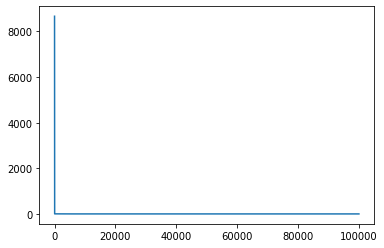

In [378]:
plt.plot(losses);

#### Use R2 score to evaluate LR equation output

In [379]:
SSres = sum((y-outputs)**2)
SStot = sum((y-np.mean(outputs))**2)
R2 = 1 - (SSres / SStot)
print(R2)

[0.98902969]


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [384]:
from sklearn.linear_model import LinearRegression

In [390]:
model = LinearRegression()

#### Train the model (fit the model to the training data)

In [391]:
x = my_data[:,0:-1]
y = my_data[:,-1:] 
model.fit(x,y)

LinearRegression()

#### Predict y values using the trained model

In [392]:
outputs = model.predict(x)
outputs

array([[3.44824549],
       [6.08745623],
       [4.83730388],
       [6.92089146],
       [8.240497  ],
       [6.22636227],
       [5.67073878],
       [5.74019163],
       [5.60128593],
       [4.97620959],
       [4.69839784],
       [4.49003928],
       [5.46238022]])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

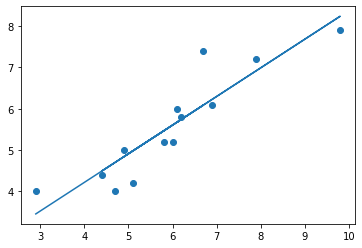

In [393]:
plt.scatter(x, y);
plt.plot(x, outputs);

#### Use R2 score to evaluate model output

In [394]:
R2 = model.score(x,y)
R2

0.8213156778363777

### Repeat for Mulivariate

In [396]:
model = LinearRegression()
x = mv_data[:,0:-1]
y = mv_data[:,-1:] 
model.fit(x,y)
outputs = model.predict(x)
outputs

array([[152.60720439],
       [185.08011472],
       [181.78158547],
       [199.74522647],
       [139.1747207 ],
       [103.69391793],
       [150.2632274 ],
       [112.82069728],
       [174.55948394],
       [164.49442094],
       [143.42337551],
       [142.23416416],
       [186.54285759],
       [152.40794527],
       [151.24409108],
       [189.12496613],
       [143.50219218],
       [181.89389361],
       [177.29838914],
       [158.34934019],
       [176.57742415],
       [174.66365778],
       [167.68889392],
       [150.63279846],
       [191.1954116 ]])

In [397]:
R2 = model.score(x,y)
R2

0.98966157894484